In [1]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random

In [4]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_path = './../tmp_simulation/tmp_data/one_hole_data.csv'
four_holes_path = './../tmp_simulation/tmp_data/four_holes_data.csv'
nine_holes_path = './../tmp_simulation/tmp_data/nine_holes_data.csv'
sixteen_holes_path = './../tmp_simulation/tmp_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../tmp_simulation/tmp_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_data = []
size_y_data = []
position_x_data = []
position_y_data = []

one_one_one = []
one_two_two = []
one_three_three = []
one_four_four = []
one_five_five = []
two_one_two = []
two_two_three = []
two_three_four = []
two_four_five = []
two_five_one = []
three_one_three = []
three_two_four = []
three_three_five = []
three_four_one = []
three_five_two = []
four_one_four = []
four_two_five = []
four_three_one = []
four_four_two = []
four_five_three = []
five_one_five = []
five_two_one = []
five_three_two = []
five_four_three = []
five_five_four = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### データ分類
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 0 < position[1] and position[1] < 10):
        one_one_one.append(data_array)
    if (10<position[0] and position[0]<20 and 10 < position[1] and position[1] < 20):
        one_two_two.append(data_array)
    if (20<position[0] and position[0]<30 and 20 < position[1] and position[1] < 30):
        one_three_three.append(data_array)
    if (30<position[0] and position[0]<40 and 30 < position[1] and position[1] < 40):
        one_four_four.append(data_array)
    if (40<position[0] and position[0]<50 and 40 < position[1] and position[1] < 50):
        one_five_five.append(data_array)
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 10 < position[1] and position[1] < 20):
        two_one_two.append(data_array)
    if (10<position[0] and position[0]<20 and 20 < position[1] and position[1] < 30):
        two_two_three.append(data_array)
    if (20<position[0] and position[0]<30 and 30 < position[1] and position[1] < 40):
        two_three_four.append(data_array)
    if (30<position[0] and position[0]<40 and 40 < position[1] and position[1] < 50):
        two_four_five.append(data_array)
    if (40<position[0] and position[0]<50 and 0 < position[1] and position[1] < 10):
        two_five_one.append(data_array)
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 20 < position[1] and position[1] < 30):
        three_one_three.append(data_array)
    if (10<position[0] and position[0]<20 and 30 < position[1] and position[1] < 40):
        three_two_four.append(data_array)
    if (20<position[0] and position[0]<30 and 40 < position[1] and position[1] < 50):
        three_three_five.append(data_array)
    if (30<position[0] and position[0]<40 and 0 < position[1] and position[1] < 10):
        three_four_one.append(data_array)
    if (40<position[0] and position[0]<50 and 10 < position[1] and position[1] < 20):
        three_five_two.append(data_array)
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 30 < position[1] and position[1] < 40):
        four_one_four.append(data_array)
    if (10<position[0] and position[0]<20 and 40 < position[1] and position[1] < 50):
        four_two_five.append(data_array)
    if (20<position[0] and position[0]<30 and 0 < position[1] and position[1] < 10):
        four_three_one.append(data_array)
    if (30<position[0] and position[0]<40 and 10 < position[1] and position[1] < 20):
        four_four_two.append(data_array)
    if (40<position[0] and position[0]<50 and 20 < position[1] and position[1] < 30):
        four_five_three.append(data_array)
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 40 < position[1] and position[1] < 50):
        five_one_five.append(data_array)
    if (10<position[0] and position[0]<20 and 0 < position[1] and position[1] < 10):
        five_two_one.append(data_array)
    if (20<position[0] and position[0]<30 and 10 < position[1] and position[1] < 20):
        five_three_two.append(data_array)
    if (30<position[0] and position[0]<40 and 20 < position[1] and position[1] < 30):
        five_four_three.append(data_array)
    if (40<position[0] and position[0]<50 and 30 < position[1] and position[1] < 40):
        five_five_four.append(data_array)

### 利用データの決定
#### one_one_oneについて
index = []
for i in range(len(one_one_one)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = one_one_one[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### one_two_twoについて
index = []
for i in range(len(one_two_two)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = one_two_two[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### one_three_threeについて
index = []
for i in range(len(one_three_three)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = one_three_three[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### one_four_fourについて
index = []
for i in range(len(one_four_four)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = one_four_four[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### one_five_fiveについて
index = []
for i in range(len(one_five_five)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = one_five_five[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### two_one_twoについて
index = []
for i in range(len(two_one_two)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = two_one_two[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### two_two_threeについて
index = []
for i in range(len(two_two_three)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = two_two_three[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### two_three_fourについて
index = []
for i in range(len(two_three_four)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = two_three_four[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### two_four_fiveについて
index = []
for i in range(len(two_four_five)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = two_four_five[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### two_five_oneについて
index = []
for i in range(len(two_five_one)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = two_five_one[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### three_one_threeについて
index = []
for i in range(len(three_one_three)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = three_one_three[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### three_two_fourについて
index = []
for i in range(len(three_two_four)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = three_two_four[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### three_three_fiveについて
index = []
for i in range(len(three_three_five)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = three_three_five[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### three_four_oneについて
index = []
for i in range(len(three_four_one)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = three_four_one[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### three_five_twoについて
index = []
for i in range(len(three_five_two)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = three_five_two[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### four_one_fourについて
index = []
for i in range(len(four_one_four)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = four_one_four[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### four_two_fiveについて
index = []
for i in range(len(four_two_five)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = four_two_five[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### four_three_oneについて
index = []
for i in range(len(four_three_one)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = four_three_one[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### four_four_twoについて
index = []
for i in range(len(four_four_two)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = four_four_two[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### four_five_threeについて
index = []
for i in range(len(four_five_three)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = four_five_three[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### five_one_fiveについて
index = []
for i in range(len(five_one_five)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = five_one_five[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### five_two_oneについて
index = []
for i in range(len(five_two_one)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = five_two_one[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### five_three_twoについて
index = []
for i in range(len(five_three_two)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = five_three_two[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### five_four_threeについて
index = []
for i in range(len(five_four_three)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = five_four_three[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])
#### five_five_fourについて
index = []
for i in range(len(five_five_four)):
    index.append(i)
data_count = 10
used_index = random.sample(index, data_count)
for i in used_index:
    data_array = five_five_four[i]
    size_x_data.append(data_array[3:-1])
    size_y_data.append(data_array[2])
    position_x_data.append(data_array[3:-1])
    position_y_data.append(data_array[0:2])

### 各配列をnp.array型にして各要素を型変換
no_hole_data = np.array(no_hole_data, dtype=float)
size_x_data = np.array(size_x_data, dtype=float)
size_y_data = np.array(size_y_data, dtype=int)
position_x_data = np.array(position_x_data, dtype=float)
position_y_data = np.array(position_y_data, dtype=float)

### データの加工
size_x_data = (size_x_data-no_hole_data)
position_x_data = (position_x_data-no_hole_data)
position_y_data = position_y_data/50
# print(size_y_data.shape)
# print(size_x_data.shape)
# print(size_y_data)
# print(size_x_data)
# print(position_y_data.shape)

### train用とtest用に分割(4:1)
size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


### reshape
size_x_train = size_x_train.reshape(200, 50, 1)
size_x_test = size_x_test.reshape(50, 50, 1)
position_x_train = position_x_train.reshape(200, 50, 1)
position_x_test = position_x_test.reshape(50, 50, 1)

(250,)
(250, 50)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]
[[ 2.544622  2.527179  2.525716 ... -3.468703 -3.537634 -3.560022]
 [ 2.596778  2.575398  2.54955  ... -3.468861 -3.537801 -3.560191]
 [ 2.526811  2.505628  2.480777 ... -3.469778 -3.538721 -3.561112]
 ...
 [ 2.87762   2.855962  2.828942 ... -2.418517 -2.47986  -2.499726]
 [ 2.953286  2.931593  2.904415 ... -2.447815 -2.510378 -2.530652]
 [ 2.894394  2.872734  2.845702 ... -2.35593  -2.416645 -2.4363  ]]
(250, 2)


In [5]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(1, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

In [6]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history = size_model.fit(size_x_train, size_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test, size_y_test))

Epoch 1/1000
2/2 [==============================] - 0s 102ms/step - loss: 10.1351 - accuracy: 0.0000e+00 - val_loss: 6.8322 - val_accuracy: 0.1800
Epoch 2/1000
2/2 [==============================] - 0s 26ms/step - loss: 6.8509 - accuracy: 0.2050 - val_loss: 4.5594 - val_accuracy: 0.1800
Epoch 3/1000
2/2 [==============================] - 0s 19ms/step - loss: 4.6020 - accuracy: 0.2050 - val_loss: 3.1764 - val_accuracy: 0.1800
Epoch 4/1000
2/2 [==============================] - 0s 23ms/step - loss: 3.1388 - accuracy: 0.2050 - val_loss: 2.5961 - val_accuracy: 0.1800
Epoch 5/1000
2/2 [==============================] - 0s 46ms/step - loss: 2.5180 - accuracy: 0.2050 - val_loss: 2.6247 - val_accuracy: 0.1800
Epoch 6/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.5154 - accuracy: 0.2050 - val_loss: 2.9770 - val_accuracy: 0.1800
Epoch 7/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.7660 - accuracy: 0.2050 - val_loss: 3.3262 - val_accuracy: 0.1800
Epoch 8

Epoch 116/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6909 - accuracy: 0.2050 - val_loss: 1.6515 - val_accuracy: 0.1800
Epoch 117/1000
2/2 [==============================] - 0s 14ms/step - loss: 1.6863 - accuracy: 0.2050 - val_loss: 1.6430 - val_accuracy: 0.1800
Epoch 118/1000
2/2 [==============================] - 0s 14ms/step - loss: 1.6821 - accuracy: 0.2050 - val_loss: 1.6372 - val_accuracy: 0.1800
Epoch 119/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.6766 - accuracy: 0.2050 - val_loss: 1.6357 - val_accuracy: 0.1800
Epoch 120/1000
2/2 [==============================] - 0s 14ms/step - loss: 1.6705 - accuracy: 0.2050 - val_loss: 1.6377 - val_accuracy: 0.1800
Epoch 121/1000
2/2 [==============================] - 0s 15ms/step - loss: 1.6695 - accuracy: 0.2050 - val_loss: 1.6399 - val_accuracy: 0.1800
Epoch 122/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.6642 - accuracy: 0.2050 - val_loss: 1.6281 - val_accuracy: 0.1800

2/2 [==============================] - 0s 13ms/step - loss: 1.1043 - accuracy: 0.2050 - val_loss: 1.0487 - val_accuracy: 0.1800
Epoch 231/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.0956 - accuracy: 0.2050 - val_loss: 1.0238 - val_accuracy: 0.1800
Epoch 232/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.0886 - accuracy: 0.2050 - val_loss: 1.0081 - val_accuracy: 0.1800
Epoch 233/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.0866 - accuracy: 0.2050 - val_loss: 1.0039 - val_accuracy: 0.1800
Epoch 234/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.0807 - accuracy: 0.2050 - val_loss: 1.0055 - val_accuracy: 0.1800
Epoch 235/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.0781 - accuracy: 0.2050 - val_loss: 1.0098 - val_accuracy: 0.1800
Epoch 236/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.0721 - accuracy: 0.2050 - val_loss: 1.0007 - val_accuracy: 0.1800
Epoch 237/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.6006 - accuracy: 0.2050 - val_loss: 0.6386 - val_accuracy: 0.1800
Epoch 345/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.5997 - accuracy: 0.2050 - val_loss: 0.6465 - val_accuracy: 0.1800
Epoch 346/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.6008 - accuracy: 0.2050 - val_loss: 0.6335 - val_accuracy: 0.1800
Epoch 347/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.5937 - accuracy: 0.2050 - val_loss: 0.6169 - val_accuracy: 0.1800
Epoch 348/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.5898 - accuracy: 0.2050 - val_loss: 0.6116 - val_accuracy: 0.1800
Epoch 349/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.5879 - accuracy: 0.2050 - val_loss: 0.6085 - val_accuracy: 0.1800
Epoch 350/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.5857 - accuracy: 0.2050 - val_loss: 0.6088 - val_accuracy: 0.1800
Epoch 351/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.3594 - accuracy: 0.2050 - val_loss: 0.4944 - val_accuracy: 0.1800
Epoch 459/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.3557 - accuracy: 0.2050 - val_loss: 0.4968 - val_accuracy: 0.1800
Epoch 460/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3544 - accuracy: 0.2050 - val_loss: 0.5027 - val_accuracy: 0.1800
Epoch 461/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3548 - accuracy: 0.2050 - val_loss: 0.5028 - val_accuracy: 0.1800
Epoch 462/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3547 - accuracy: 0.2050 - val_loss: 0.4941 - val_accuracy: 0.1800
Epoch 463/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3530 - accuracy: 0.2050 - val_loss: 0.4882 - val_accuracy: 0.1800
Epoch 464/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3533 - accuracy: 0.2050 - val_loss: 0.4846 - val_accuracy: 0.1800
Epoch 465/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.2663 - accuracy: 0.2050 - val_loss: 0.4553 - val_accuracy: 0.1800
Epoch 573/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2654 - accuracy: 0.2050 - val_loss: 0.4463 - val_accuracy: 0.1800
Epoch 574/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2648 - accuracy: 0.2050 - val_loss: 0.4464 - val_accuracy: 0.1800
Epoch 575/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.2640 - accuracy: 0.2050 - val_loss: 0.4469 - val_accuracy: 0.1800
Epoch 576/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2656 - accuracy: 0.2050 - val_loss: 0.4481 - val_accuracy: 0.1800
Epoch 577/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2642 - accuracy: 0.2050 - val_loss: 0.4546 - val_accuracy: 0.1800
Epoch 578/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2672 - accuracy: 0.2050 - val_loss: 0.4415 - val_accuracy: 0.1800
Epoch 579/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.2281 - accuracy: 0.2050 - val_loss: 0.4132 - val_accuracy: 0.1800
Epoch 687/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2260 - accuracy: 0.2050 - val_loss: 0.4188 - val_accuracy: 0.1800
Epoch 688/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2240 - accuracy: 0.2050 - val_loss: 0.4115 - val_accuracy: 0.1800
Epoch 689/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2234 - accuracy: 0.2050 - val_loss: 0.4108 - val_accuracy: 0.1800
Epoch 690/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.2231 - accuracy: 0.2050 - val_loss: 0.4139 - val_accuracy: 0.1800
Epoch 691/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2227 - accuracy: 0.2050 - val_loss: 0.4133 - val_accuracy: 0.1800
Epoch 692/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2226 - accuracy: 0.2050 - val_loss: 0.4103 - val_accuracy: 0.1800
Epoch 693/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.2005 - accuracy: 0.2050 - val_loss: 0.3958 - val_accuracy: 0.1800
Epoch 801/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.2070 - accuracy: 0.2050 - val_loss: 0.3987 - val_accuracy: 0.1800
Epoch 802/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2004 - accuracy: 0.2050 - val_loss: 0.4042 - val_accuracy: 0.1800
Epoch 803/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1997 - accuracy: 0.2050 - val_loss: 0.3931 - val_accuracy: 0.1800
Epoch 804/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2042 - accuracy: 0.2050 - val_loss: 0.3931 - val_accuracy: 0.1800
Epoch 805/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1993 - accuracy: 0.2050 - val_loss: 0.4111 - val_accuracy: 0.1800
Epoch 806/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2042 - accuracy: 0.2050 - val_loss: 0.4008 - val_accuracy: 0.1800
Epoch 807/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.1811 - accuracy: 0.2050 - val_loss: 0.3763 - val_accuracy: 0.1800
Epoch 915/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1824 - accuracy: 0.2050 - val_loss: 0.3829 - val_accuracy: 0.1800
Epoch 916/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1827 - accuracy: 0.2050 - val_loss: 0.3868 - val_accuracy: 0.1800
Epoch 917/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1806 - accuracy: 0.2050 - val_loss: 0.3748 - val_accuracy: 0.1800
Epoch 918/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.1827 - accuracy: 0.2050 - val_loss: 0.3742 - val_accuracy: 0.1800
Epoch 919/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1857 - accuracy: 0.2050 - val_loss: 0.3781 - val_accuracy: 0.1800
Epoch 920/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1800 - accuracy: 0.2050 - val_loss: 0.3754 - val_accuracy: 0.1800
Epoch 921/1000

In [7]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(size_x_test, size_y_test, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

2/2 [==============================] - 0s 1ms/step - loss: 0.3711 - accuracy: 0.1800
Test loss: 0.3710993826389313
Test accuracy: 0.18000000715255737


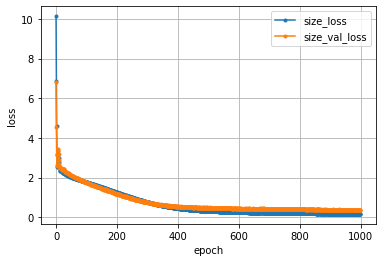

In [8]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(2, activation='linear'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])

In [10]:
# 学習(位置)
epochs = 3000
batch_size = 128
position_history = position_model.fit(position_x_train, position_y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test, position_y_test))

Epoch 1/3000
2/2 [==============================] - 0s 50ms/step - loss: 1.5344 - accuracy: 0.4950 - val_loss: 0.6438 - val_accuracy: 0.5600
Epoch 2/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.6335 - accuracy: 0.4950 - val_loss: 0.2062 - val_accuracy: 0.5600
Epoch 3/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.2207 - accuracy: 0.4950 - val_loss: 0.1401 - val_accuracy: 0.5600
Epoch 4/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.1481 - accuracy: 0.4800 - val_loss: 0.2257 - val_accuracy: 0.5600
Epoch 5/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.2011 - accuracy: 0.4950 - val_loss: 0.3049 - val_accuracy: 0.4600
Epoch 6/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.2550 - accuracy: 0.5350 - val_loss: 0.3198 - val_accuracy: 0.4600
Epoch 7/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.2592 - accuracy: 0.5250 - val_loss: 0.2790 - val_accuracy: 0.4600
Epoch 8/3000


Epoch 59/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0653 - accuracy: 0.5000 - val_loss: 0.0686 - val_accuracy: 0.6600
Epoch 60/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0652 - accuracy: 0.5300 - val_loss: 0.0679 - val_accuracy: 0.7200
Epoch 61/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0651 - accuracy: 0.5950 - val_loss: 0.0680 - val_accuracy: 0.7200
Epoch 62/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0650 - accuracy: 0.5900 - val_loss: 0.0681 - val_accuracy: 0.7200
Epoch 63/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0647 - accuracy: 0.5950 - val_loss: 0.0682 - val_accuracy: 0.7000
Epoch 64/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0647 - accuracy: 0.5550 - val_loss: 0.0684 - val_accuracy: 0.6600
Epoch 65/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0644 - accuracy: 0.5900 - val_loss: 0.0686 - val_accuracy: 0.7200
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 0.0528 - accuracy: 0.6400 - val_loss: 0.0561 - val_accuracy: 0.7200
Epoch 174/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0527 - accuracy: 0.6550 - val_loss: 0.0563 - val_accuracy: 0.7400
Epoch 175/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0526 - accuracy: 0.6500 - val_loss: 0.0560 - val_accuracy: 0.7400
Epoch 176/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0525 - accuracy: 0.6450 - val_loss: 0.0558 - val_accuracy: 0.7400
Epoch 177/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0524 - accuracy: 0.6450 - val_loss: 0.0553 - val_accuracy: 0.7400
Epoch 178/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0524 - accuracy: 0.6450 - val_loss: 0.0555 - val_accuracy: 0.7400
Epoch 179/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0523 - accuracy: 0.6500 - val_loss: 0.0557 - val_accuracy: 0.7400
Epoch 180/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0451 - accuracy: 0.7200 - val_loss: 0.0525 - val_accuracy: 0.7800
Epoch 288/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0454 - accuracy: 0.7150 - val_loss: 0.0523 - val_accuracy: 0.8000
Epoch 289/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0448 - accuracy: 0.7200 - val_loss: 0.0516 - val_accuracy: 0.8200
Epoch 290/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0452 - accuracy: 0.7950 - val_loss: 0.0516 - val_accuracy: 0.8000
Epoch 291/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0453 - accuracy: 0.7200 - val_loss: 0.0521 - val_accuracy: 0.8000
Epoch 292/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0450 - accuracy: 0.7150 - val_loss: 0.0511 - val_accuracy: 0.8000
Epoch 293/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0447 - accuracy: 0.7350 - val_loss: 0.0519 - val_accuracy: 0.8200
Epoch 294/3000

2/2 [==============================] - 0s 20ms/step - loss: 0.0412 - accuracy: 0.8250 - val_loss: 0.0490 - val_accuracy: 0.8200
Epoch 402/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0409 - accuracy: 0.8150 - val_loss: 0.0507 - val_accuracy: 0.8200
Epoch 403/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0410 - accuracy: 0.7550 - val_loss: 0.0515 - val_accuracy: 0.8200
Epoch 404/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0408 - accuracy: 0.7800 - val_loss: 0.0503 - val_accuracy: 0.7800
Epoch 405/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0414 - accuracy: 0.8350 - val_loss: 0.0496 - val_accuracy: 0.8200
Epoch 406/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0409 - accuracy: 0.7800 - val_loss: 0.0509 - val_accuracy: 0.8000
Epoch 407/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0413 - accuracy: 0.7200 - val_loss: 0.0494 - val_accuracy: 0.8200
Epoch 408/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - accuracy: 0.7700 - val_loss: 0.0477 - val_accuracy: 0.8200
Epoch 516/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0382 - accuracy: 0.8100 - val_loss: 0.0479 - val_accuracy: 0.7800
Epoch 517/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.8600 - val_loss: 0.0483 - val_accuracy: 0.8000
Epoch 518/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.7950 - val_loss: 0.0475 - val_accuracy: 0.8200
Epoch 519/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0387 - accuracy: 0.7850 - val_loss: 0.0479 - val_accuracy: 0.8200
Epoch 520/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0384 - accuracy: 0.8150 - val_loss: 0.0501 - val_accuracy: 0.8400
Epoch 521/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0383 - accuracy: 0.8450 - val_loss: 0.0484 - val_accuracy: 0.8400
Epoch 522/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - accuracy: 0.8050 - val_loss: 0.0468 - val_accuracy: 0.8000
Epoch 573/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8400 - val_loss: 0.0476 - val_accuracy: 0.8000
Epoch 574/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0377 - accuracy: 0.8650 - val_loss: 0.0474 - val_accuracy: 0.7800
Epoch 575/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8350 - val_loss: 0.0472 - val_accuracy: 0.8000
Epoch 576/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0375 - accuracy: 0.8250 - val_loss: 0.0469 - val_accuracy: 0.8000
Epoch 577/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0374 - accuracy: 0.8250 - val_loss: 0.0472 - val_accuracy: 0.8000
Epoch 578/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0374 - accuracy: 0.8300 - val_loss: 0.0482 - val_accuracy: 0.8000
Epoch 579/3000

2/2 [==============================] - 0s 68ms/step - loss: 0.0371 - accuracy: 0.8550 - val_loss: 0.0454 - val_accuracy: 0.8200
Epoch 687/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.7900 - val_loss: 0.0473 - val_accuracy: 0.8200
Epoch 688/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8100 - val_loss: 0.0480 - val_accuracy: 0.8000
Epoch 689/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8350 - val_loss: 0.0477 - val_accuracy: 0.8000
Epoch 690/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8550 - val_loss: 0.0470 - val_accuracy: 0.8000
Epoch 691/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8650 - val_loss: 0.0463 - val_accuracy: 0.8400
Epoch 692/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8600 - val_loss: 0.0472 - val_accuracy: 0.8200
Epoch 693/3000

2/2 [==============================] - 0s 19ms/step - loss: 0.0358 - accuracy: 0.8250 - val_loss: 0.0473 - val_accuracy: 0.7800
Epoch 801/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0361 - accuracy: 0.8650 - val_loss: 0.0480 - val_accuracy: 0.8200
Epoch 802/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0364 - accuracy: 0.8100 - val_loss: 0.0461 - val_accuracy: 0.8200
Epoch 803/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0360 - accuracy: 0.8100 - val_loss: 0.0463 - val_accuracy: 0.8000
Epoch 804/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.8650 - val_loss: 0.0455 - val_accuracy: 0.8000
Epoch 805/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0360 - accuracy: 0.8550 - val_loss: 0.0471 - val_accuracy: 0.8000
Epoch 806/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.7600 - val_loss: 0.0479 - val_accuracy: 0.8200
Epoch 807/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8650 - val_loss: 0.0465 - val_accuracy: 0.8200
Epoch 915/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8450 - val_loss: 0.0454 - val_accuracy: 0.8200
Epoch 916/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.7950 - val_loss: 0.0462 - val_accuracy: 0.8000
Epoch 917/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - accuracy: 0.8650 - val_loss: 0.0457 - val_accuracy: 0.8400
Epoch 918/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8550 - val_loss: 0.0459 - val_accuracy: 0.8200
Epoch 919/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.7950 - val_loss: 0.0452 - val_accuracy: 0.8000
Epoch 920/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.8350 - val_loss: 0.0480 - val_accuracy: 0.8000
Epoch 921/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8800 - val_loss: 0.0465 - val_accuracy: 0.8200
Epoch 1029/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8150 - val_loss: 0.0448 - val_accuracy: 0.8200
Epoch 1030/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8600 - val_loss: 0.0458 - val_accuracy: 0.8000
Epoch 1031/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8950 - val_loss: 0.0462 - val_accuracy: 0.8000
Epoch 1032/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8050 - val_loss: 0.0454 - val_accuracy: 0.8200
Epoch 1033/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0350 - accuracy: 0.8400 - val_loss: 0.0456 - val_accuracy: 0.8200
Epoch 1034/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - accuracy: 0.8400 - val_loss: 0.0455 - val_accuracy: 0.8200
Epoch 10

2/2 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.8850 - val_loss: 0.0467 - val_accuracy: 0.7800
Epoch 1086/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8200 - val_loss: 0.0471 - val_accuracy: 0.8200
Epoch 1087/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.7800 - val_loss: 0.0470 - val_accuracy: 0.8000
Epoch 1088/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8700 - val_loss: 0.0457 - val_accuracy: 0.7800
Epoch 1089/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8600 - val_loss: 0.0456 - val_accuracy: 0.8200
Epoch 1090/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0354 - accuracy: 0.7800 - val_loss: 0.0461 - val_accuracy: 0.8400
Epoch 1091/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8750 - val_loss: 0.0471 - val_accuracy: 0.7800
Epoch 10

Epoch 1142/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.8800 - val_loss: 0.0476 - val_accuracy: 0.7800
Epoch 1143/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8450 - val_loss: 0.0449 - val_accuracy: 0.8200
Epoch 1144/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0350 - accuracy: 0.7950 - val_loss: 0.0450 - val_accuracy: 0.8200
Epoch 1145/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8550 - val_loss: 0.0451 - val_accuracy: 0.8400
Epoch 1146/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0348 - accuracy: 0.8450 - val_loss: 0.0461 - val_accuracy: 0.8000
Epoch 1147/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - accuracy: 0.8250 - val_loss: 0.0461 - val_accuracy: 0.8000
Epoch 1148/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0350 - accuracy: 0.8650 - val_loss: 0.0457 - val_accuracy:

Epoch 1199/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0353 - accuracy: 0.8650 - val_loss: 0.0452 - val_accuracy: 0.8400
Epoch 1200/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.7450 - val_loss: 0.0450 - val_accuracy: 0.8000
Epoch 1201/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8150 - val_loss: 0.0469 - val_accuracy: 0.7800
Epoch 1202/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8700 - val_loss: 0.0457 - val_accuracy: 0.8200
Epoch 1203/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.7200 - val_loss: 0.0447 - val_accuracy: 0.8200
Epoch 1204/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8500 - val_loss: 0.0466 - val_accuracy: 0.7800
Epoch 1205/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0364 - accuracy: 0.8400 - val_loss: 0.0478 - val_accuracy:

Epoch 1256/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0368 - accuracy: 0.8250 - val_loss: 0.0440 - val_accuracy: 0.8200
Epoch 1257/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8350 - val_loss: 0.0511 - val_accuracy: 0.8000
Epoch 1258/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8700 - val_loss: 0.0448 - val_accuracy: 0.8400
Epoch 1259/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0356 - accuracy: 0.8200 - val_loss: 0.0437 - val_accuracy: 0.8200
Epoch 1260/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0345 - accuracy: 0.8100 - val_loss: 0.0492 - val_accuracy: 0.8000
Epoch 1261/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8650 - val_loss: 0.0461 - val_accuracy: 0.8200
Epoch 1262/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0345 - accuracy: 0.8300 - val_loss: 0.0439 - val_accuracy:

Epoch 1313/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0347 - accuracy: 0.9050 - val_loss: 0.0458 - val_accuracy: 0.8000
Epoch 1314/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0345 - accuracy: 0.8550 - val_loss: 0.0458 - val_accuracy: 0.8200
Epoch 1315/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.7800 - val_loss: 0.0459 - val_accuracy: 0.8000
Epoch 1316/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8650 - val_loss: 0.0465 - val_accuracy: 0.7800
Epoch 1317/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0351 - accuracy: 0.8550 - val_loss: 0.0459 - val_accuracy: 0.8200
Epoch 1318/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.7800 - val_loss: 0.0460 - val_accuracy: 0.8200
Epoch 1319/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0343 - accuracy: 0.8500 - val_loss: 0.0451 - val_accuracy:

Epoch 1370/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0345 - accuracy: 0.8550 - val_loss: 0.0479 - val_accuracy: 0.8000
Epoch 1371/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0349 - accuracy: 0.8450 - val_loss: 0.0439 - val_accuracy: 0.8200
Epoch 1372/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0347 - accuracy: 0.8300 - val_loss: 0.0437 - val_accuracy: 0.8200
Epoch 1373/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.8250 - val_loss: 0.0468 - val_accuracy: 0.8200
Epoch 1374/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8300 - val_loss: 0.0462 - val_accuracy: 0.8000
Epoch 1375/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0345 - accuracy: 0.8650 - val_loss: 0.0448 - val_accuracy: 0.8000
Epoch 1376/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0346 - accuracy: 0.8850 - val_loss: 0.0443 - val_accuracy:

Epoch 1427/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.8700 - val_loss: 0.0463 - val_accuracy: 0.7800
Epoch 1428/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - accuracy: 0.8650 - val_loss: 0.0443 - val_accuracy: 0.8200
Epoch 1429/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.7600 - val_loss: 0.0455 - val_accuracy: 0.8400
Epoch 1430/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8900 - val_loss: 0.0473 - val_accuracy: 0.7800
Epoch 1431/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8650 - val_loss: 0.0433 - val_accuracy: 0.8400
Epoch 1432/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0351 - accuracy: 0.7850 - val_loss: 0.0438 - val_accuracy: 0.8000
Epoch 1433/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0345 - accuracy: 0.8400 - val_loss: 0.0474 - val_accuracy:

Epoch 1484/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0345 - accuracy: 0.7900 - val_loss: 0.0442 - val_accuracy: 0.8400
Epoch 1485/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8950 - val_loss: 0.0447 - val_accuracy: 0.8000
Epoch 1486/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 0.8750 - val_loss: 0.0454 - val_accuracy: 0.8000
Epoch 1487/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0352 - accuracy: 0.8200 - val_loss: 0.0451 - val_accuracy: 0.8200
Epoch 1488/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0346 - accuracy: 0.8400 - val_loss: 0.0453 - val_accuracy: 0.8200
Epoch 1489/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0349 - accuracy: 0.8350 - val_loss: 0.0437 - val_accuracy: 0.8000
Epoch 1490/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0348 - accuracy: 0.8100 - val_loss: 0.0454 - val_accuracy:

Epoch 1541/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.7450 - val_loss: 0.0438 - val_accuracy: 0.8200
Epoch 1542/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8200 - val_loss: 0.0500 - val_accuracy: 0.7800
Epoch 1543/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8600 - val_loss: 0.0433 - val_accuracy: 0.8000
Epoch 1544/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0351 - accuracy: 0.7900 - val_loss: 0.0431 - val_accuracy: 0.8200
Epoch 1545/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.7950 - val_loss: 0.0484 - val_accuracy: 0.8000
Epoch 1546/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8700 - val_loss: 0.0457 - val_accuracy: 0.8200
Epoch 1547/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.8350 - val_loss: 0.0433 - val_accuracy:

Epoch 1598/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0349 - accuracy: 0.8200 - val_loss: 0.0446 - val_accuracy: 0.8200
Epoch 1599/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 0.8450 - val_loss: 0.0438 - val_accuracy: 0.8200
Epoch 1600/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0344 - accuracy: 0.8300 - val_loss: 0.0449 - val_accuracy: 0.8200
Epoch 1601/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0341 - accuracy: 0.8200 - val_loss: 0.0473 - val_accuracy: 0.8600
Epoch 1602/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 0.8900 - val_loss: 0.0443 - val_accuracy: 0.8000
Epoch 1603/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0344 - accuracy: 0.8800 - val_loss: 0.0431 - val_accuracy: 0.8200
Epoch 1604/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0347 - accuracy: 0.7900 - val_loss: 0.0457 - val_accuracy:

Epoch 1655/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0359 - accuracy: 0.7900 - val_loss: 0.0478 - val_accuracy: 0.7800
Epoch 1656/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8550 - val_loss: 0.0441 - val_accuracy: 0.8200
Epoch 1657/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0373 - accuracy: 0.7100 - val_loss: 0.0473 - val_accuracy: 0.8200
Epoch 1658/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0350 - accuracy: 0.8000 - val_loss: 0.0487 - val_accuracy: 0.7800
Epoch 1659/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0367 - accuracy: 0.8550 - val_loss: 0.0446 - val_accuracy: 0.8400
Epoch 1660/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.7550 - val_loss: 0.0463 - val_accuracy: 0.8400
Epoch 1661/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0353 - accuracy: 0.8250 - val_loss: 0.0481 - val_accuracy:

Epoch 1712/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0349 - accuracy: 0.8350 - val_loss: 0.0431 - val_accuracy: 0.8200
Epoch 1713/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.8300 - val_loss: 0.0462 - val_accuracy: 0.8400
Epoch 1714/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.8750 - val_loss: 0.0477 - val_accuracy: 0.8400
Epoch 1715/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.8750 - val_loss: 0.0435 - val_accuracy: 0.8400
Epoch 1716/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.8300 - val_loss: 0.0433 - val_accuracy: 0.8000
Epoch 1717/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 0.8100 - val_loss: 0.0461 - val_accuracy: 0.8200
Epoch 1718/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 0.8650 - val_loss: 0.0457 - val_accuracy:

Epoch 1769/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0345 - accuracy: 0.8350 - val_loss: 0.0435 - val_accuracy: 0.8200
Epoch 1770/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8500 - val_loss: 0.0458 - val_accuracy: 0.8200
Epoch 1771/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0341 - accuracy: 0.8500 - val_loss: 0.0446 - val_accuracy: 0.8200
Epoch 1772/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.8350 - val_loss: 0.0436 - val_accuracy: 0.8200
Epoch 1773/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8500 - val_loss: 0.0457 - val_accuracy: 0.8200
Epoch 1774/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.8550 - val_loss: 0.0456 - val_accuracy: 0.8200
Epoch 1775/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0339 - accuracy: 0.8550 - val_loss: 0.0432 - val_accuracy:

Epoch 1826/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0340 - accuracy: 0.8250 - val_loss: 0.0473 - val_accuracy: 0.8600
Epoch 1827/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.8700 - val_loss: 0.0441 - val_accuracy: 0.8000
Epoch 1828/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.8800 - val_loss: 0.0436 - val_accuracy: 0.8200
Epoch 1829/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0341 - accuracy: 0.8300 - val_loss: 0.0444 - val_accuracy: 0.8200
Epoch 1830/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.8150 - val_loss: 0.0455 - val_accuracy: 0.8000
Epoch 1831/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.8900 - val_loss: 0.0430 - val_accuracy: 0.8200
Epoch 1832/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.7950 - val_loss: 0.0450 - val_accuracy:

Epoch 1883/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0344 - accuracy: 0.8650 - val_loss: 0.0436 - val_accuracy: 0.8600
Epoch 1884/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.8300 - val_loss: 0.0453 - val_accuracy: 0.8400
Epoch 1885/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.8000 - val_loss: 0.0451 - val_accuracy: 0.8000
Epoch 1886/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0340 - accuracy: 0.8750 - val_loss: 0.0439 - val_accuracy: 0.8400
Epoch 1887/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 0.8700 - val_loss: 0.0440 - val_accuracy: 0.8000
Epoch 1888/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0337 - accuracy: 0.8150 - val_loss: 0.0434 - val_accuracy: 0.8400
Epoch 1889/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 0.8450 - val_loss: 0.0444 - val_accuracy:

Epoch 1940/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0338 - accuracy: 0.8300 - val_loss: 0.0465 - val_accuracy: 0.7800
Epoch 1941/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - accuracy: 0.8650 - val_loss: 0.0447 - val_accuracy: 0.8200
Epoch 1942/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0347 - accuracy: 0.7700 - val_loss: 0.0429 - val_accuracy: 0.8200
Epoch 1943/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0344 - accuracy: 0.8150 - val_loss: 0.0457 - val_accuracy: 0.7800
Epoch 1944/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.8750 - val_loss: 0.0454 - val_accuracy: 0.8400
Epoch 1945/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.7700 - val_loss: 0.0430 - val_accuracy: 0.8200
Epoch 1946/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0346 - accuracy: 0.8500 - val_loss: 0.0438 - val_accuracy:

Epoch 1997/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0337 - accuracy: 0.8100 - val_loss: 0.0442 - val_accuracy: 0.8200
Epoch 1998/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.8700 - val_loss: 0.0448 - val_accuracy: 0.8400
Epoch 1999/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0335 - accuracy: 0.8650 - val_loss: 0.0430 - val_accuracy: 0.8000
Epoch 2000/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8300 - val_loss: 0.0433 - val_accuracy: 0.8200
Epoch 2001/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0337 - accuracy: 0.8600 - val_loss: 0.0448 - val_accuracy: 0.8200
Epoch 2002/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.8550 - val_loss: 0.0445 - val_accuracy: 0.8200
Epoch 2003/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0335 - accuracy: 0.8300 - val_loss: 0.0430 - val_accuracy:

Epoch 2054/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8700 - val_loss: 0.0433 - val_accuracy: 0.8200
Epoch 2055/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0332 - accuracy: 0.8250 - val_loss: 0.0514 - val_accuracy: 0.8200
Epoch 2056/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0365 - accuracy: 0.8100 - val_loss: 0.0447 - val_accuracy: 0.7800
Epoch 2057/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8650 - val_loss: 0.0425 - val_accuracy: 0.8200
Epoch 2058/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.7550 - val_loss: 0.0473 - val_accuracy: 0.8200
Epoch 2059/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8450 - val_loss: 0.0470 - val_accuracy: 0.7800
Epoch 2060/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8650 - val_loss: 0.0448 - val_accuracy:

2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.8150 - val_loss: 0.0467 - val_accuracy: 0.7800
Epoch 2168/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8700 - val_loss: 0.0424 - val_accuracy: 0.8200
Epoch 2169/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0345 - accuracy: 0.7700 - val_loss: 0.0426 - val_accuracy: 0.8200
Epoch 2170/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0336 - accuracy: 0.8400 - val_loss: 0.0475 - val_accuracy: 0.7800
Epoch 2171/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0344 - accuracy: 0.8650 - val_loss: 0.0439 - val_accuracy: 0.8200
Epoch 2172/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0335 - accuracy: 0.8100 - val_loss: 0.0424 - val_accuracy: 0.8200
Epoch 2173/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 0.8100 - val_loss: 0.0440 - val_accuracy: 0.8000
Epoch 21

Epoch 2281/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0336 - accuracy: 0.7950 - val_loss: 0.0432 - val_accuracy: 0.8400
Epoch 2282/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0337 - accuracy: 0.8500 - val_loss: 0.0454 - val_accuracy: 0.8200
Epoch 2283/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0340 - accuracy: 0.7950 - val_loss: 0.0432 - val_accuracy: 0.8200
Epoch 2284/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0335 - accuracy: 0.8400 - val_loss: 0.0437 - val_accuracy: 0.8000
Epoch 2285/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0341 - accuracy: 0.8600 - val_loss: 0.0439 - val_accuracy: 0.8200
Epoch 2286/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0335 - accuracy: 0.7850 - val_loss: 0.0440 - val_accuracy: 0.8600
Epoch 2287/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.8750 - val_loss: 0.0452 - val_accuracy:

Epoch 2338/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0335 - accuracy: 0.8750 - val_loss: 0.0456 - val_accuracy: 0.8200
Epoch 2339/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 0.8200 - val_loss: 0.0438 - val_accuracy: 0.8200
Epoch 2340/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0337 - accuracy: 0.8600 - val_loss: 0.0435 - val_accuracy: 0.8000
Epoch 2341/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0342 - accuracy: 0.8800 - val_loss: 0.0442 - val_accuracy: 0.8200
Epoch 2342/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0338 - accuracy: 0.7800 - val_loss: 0.0433 - val_accuracy: 0.8400
Epoch 2343/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0332 - accuracy: 0.8650 - val_loss: 0.0451 - val_accuracy: 0.8000
Epoch 2344/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0335 - accuracy: 0.8650 - val_loss: 0.0443 - val_accuracy:

Epoch 2395/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0334 - accuracy: 0.8800 - val_loss: 0.0450 - val_accuracy: 0.8600
Epoch 2396/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.8550 - val_loss: 0.0435 - val_accuracy: 0.8200
Epoch 2397/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0330 - accuracy: 0.8500 - val_loss: 0.0453 - val_accuracy: 0.8400
Epoch 2398/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0334 - accuracy: 0.8400 - val_loss: 0.0445 - val_accuracy: 0.8200
Epoch 2399/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0334 - accuracy: 0.8050 - val_loss: 0.0435 - val_accuracy: 0.8200
Epoch 2400/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0332 - accuracy: 0.8400 - val_loss: 0.0444 - val_accuracy: 0.8000
Epoch 2401/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0337 - accuracy: 0.8700 - val_loss: 0.0424 - val_accuracy:

Epoch 2452/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0334 - accuracy: 0.8350 - val_loss: 0.0433 - val_accuracy: 0.8000
Epoch 2453/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0331 - accuracy: 0.8000 - val_loss: 0.0432 - val_accuracy: 0.8400
Epoch 2454/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0334 - accuracy: 0.8550 - val_loss: 0.0439 - val_accuracy: 0.8400
Epoch 2455/3000
2/2 [==============================] - 0s 66ms/step - loss: 0.0335 - accuracy: 0.8200 - val_loss: 0.0447 - val_accuracy: 0.8000
Epoch 2456/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0331 - accuracy: 0.8400 - val_loss: 0.0460 - val_accuracy: 0.8000
Epoch 2457/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0337 - accuracy: 0.8700 - val_loss: 0.0438 - val_accuracy: 0.8200
Epoch 2458/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.8050 - val_loss: 0.0446 - val_accuracy:

2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.7900 - val_loss: 0.0426 - val_accuracy: 0.8200
Epoch 2566/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0331 - accuracy: 0.7900 - val_loss: 0.0500 - val_accuracy: 0.8000
Epoch 2567/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8650 - val_loss: 0.0433 - val_accuracy: 0.8200
Epoch 2568/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 0.8100 - val_loss: 0.0431 - val_accuracy: 0.8000
Epoch 2569/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0343 - accuracy: 0.7700 - val_loss: 0.0484 - val_accuracy: 0.7800
Epoch 2570/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 0.8650 - val_loss: 0.0449 - val_accuracy: 0.8000
Epoch 2571/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0330 - accuracy: 0.8500 - val_loss: 0.0428 - val_accuracy: 0.8200
Epoch 25

2/2 [==============================] - 0s 11ms/step - loss: 0.0334 - accuracy: 0.8300 - val_loss: 0.0429 - val_accuracy: 0.8400
Epoch 2623/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0332 - accuracy: 0.8450 - val_loss: 0.0459 - val_accuracy: 0.8200
Epoch 2624/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0331 - accuracy: 0.8800 - val_loss: 0.0433 - val_accuracy: 0.8000
Epoch 2625/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0330 - accuracy: 0.8100 - val_loss: 0.0428 - val_accuracy: 0.8200
Epoch 2626/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0331 - accuracy: 0.7850 - val_loss: 0.0454 - val_accuracy: 0.8600
Epoch 2627/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0335 - accuracy: 0.8650 - val_loss: 0.0448 - val_accuracy: 0.8000
Epoch 2628/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0338 - accuracy: 0.8550 - val_loss: 0.0430 - val_accuracy: 0.8200
Epoch 26

2/2 [==============================] - 0s 13ms/step - loss: 0.0327 - accuracy: 0.8300 - val_loss: 0.0437 - val_accuracy: 0.8200
Epoch 2680/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0332 - accuracy: 0.8100 - val_loss: 0.0450 - val_accuracy: 0.8400
Epoch 2681/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0331 - accuracy: 0.8750 - val_loss: 0.0460 - val_accuracy: 0.8600
Epoch 2682/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0330 - accuracy: 0.8700 - val_loss: 0.0427 - val_accuracy: 0.8200
Epoch 2683/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0332 - accuracy: 0.7900 - val_loss: 0.0435 - val_accuracy: 0.8400
Epoch 2684/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0331 - accuracy: 0.8550 - val_loss: 0.0458 - val_accuracy: 0.8400
Epoch 2685/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0330 - accuracy: 0.8500 - val_loss: 0.0431 - val_accuracy: 0.8200
Epoch 26

2/2 [==============================] - 0s 13ms/step - loss: 0.0334 - accuracy: 0.8450 - val_loss: 0.0442 - val_accuracy: 0.8000
Epoch 2737/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.9050 - val_loss: 0.0431 - val_accuracy: 0.8200
Epoch 2738/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 0.7500 - val_loss: 0.0449 - val_accuracy: 0.8400
Epoch 2739/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.8450 - val_loss: 0.0472 - val_accuracy: 0.7800
Epoch 2740/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0332 - accuracy: 0.8850 - val_loss: 0.0438 - val_accuracy: 0.8000
Epoch 2741/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.7350 - val_loss: 0.0437 - val_accuracy: 0.8400
Epoch 2742/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0333 - accuracy: 0.8250 - val_loss: 0.0496 - val_accuracy: 0.7800
Epoch 27

2/2 [==============================] - 0s 13ms/step - loss: 0.0335 - accuracy: 0.8450 - val_loss: 0.0451 - val_accuracy: 0.8000
Epoch 2794/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0329 - accuracy: 0.8850 - val_loss: 0.0448 - val_accuracy: 0.8200
Epoch 2795/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0328 - accuracy: 0.8100 - val_loss: 0.0432 - val_accuracy: 0.8200
Epoch 2796/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0330 - accuracy: 0.8150 - val_loss: 0.0438 - val_accuracy: 0.8200
Epoch 2797/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0337 - accuracy: 0.8750 - val_loss: 0.0450 - val_accuracy: 0.8400
Epoch 2798/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0325 - accuracy: 0.8450 - val_loss: 0.0426 - val_accuracy: 0.8400
Epoch 2799/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0335 - accuracy: 0.8350 - val_loss: 0.0433 - val_accuracy: 0.8200
Epoch 28

2/2 [==============================] - 0s 12ms/step - loss: 0.0330 - accuracy: 0.8150 - val_loss: 0.0456 - val_accuracy: 0.8600
Epoch 2851/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0331 - accuracy: 0.8700 - val_loss: 0.0457 - val_accuracy: 0.8200
Epoch 2852/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0330 - accuracy: 0.8400 - val_loss: 0.0432 - val_accuracy: 0.8400
Epoch 2853/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0332 - accuracy: 0.8050 - val_loss: 0.0432 - val_accuracy: 0.8400
Epoch 2854/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0329 - accuracy: 0.8450 - val_loss: 0.0465 - val_accuracy: 0.8400
Epoch 2855/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0335 - accuracy: 0.8450 - val_loss: 0.0444 - val_accuracy: 0.8200
Epoch 2856/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0326 - accuracy: 0.8100 - val_loss: 0.0429 - val_accuracy: 0.8400
Epoch 28

2/2 [==============================] - 0s 11ms/step - loss: 0.0323 - accuracy: 0.8450 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 2908/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8600 - val_loss: 0.0441 - val_accuracy: 0.8400
Epoch 2909/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0326 - accuracy: 0.8350 - val_loss: 0.0425 - val_accuracy: 0.8200
Epoch 2910/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8400 - val_loss: 0.0449 - val_accuracy: 0.8200
Epoch 2911/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0334 - accuracy: 0.8150 - val_loss: 0.0450 - val_accuracy: 0.8400
Epoch 2912/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0329 - accuracy: 0.8500 - val_loss: 0.0430 - val_accuracy: 0.8400
Epoch 2913/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0332 - accuracy: 0.8300 - val_loss: 0.0456 - val_accuracy: 0.8200
Epoch 29

Epoch 2964/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0333 - accuracy: 0.8850 - val_loss: 0.0464 - val_accuracy: 0.8000
Epoch 2965/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0327 - accuracy: 0.8700 - val_loss: 0.0442 - val_accuracy: 0.8200
Epoch 2966/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0337 - accuracy: 0.7750 - val_loss: 0.0432 - val_accuracy: 0.8200
Epoch 2967/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0327 - accuracy: 0.8450 - val_loss: 0.0466 - val_accuracy: 0.8600
Epoch 2968/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0331 - accuracy: 0.8650 - val_loss: 0.0455 - val_accuracy: 0.8200
Epoch 2969/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0331 - accuracy: 0.8050 - val_loss: 0.0438 - val_accuracy: 0.8200
Epoch 2970/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0326 - accuracy: 0.8700 - val_loss: 0.0448 - val_accuracy:

In [11]:
# モデルの評価(位置)
position_score =position_model.evaluate(position_x_test, position_y_test, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

2/2 [==============================] - 0s 810us/step - loss: 0.0428 - accuracy: 0.8200
Test loss: 0.042844705283641815
Test accuracy: 0.8199999928474426


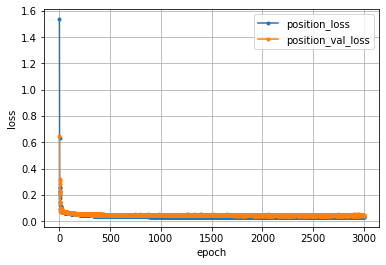

In [12]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [1]:
# データ数250で繰り返し行いlossの大きさと安定性を確認する

In [17]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random

In [18]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_path = './../tmp_simulation/tmp_data/one_hole_data.csv'
four_holes_path = './../tmp_simulation/tmp_data/four_holes_data.csv'
nine_holes_path = './../tmp_simulation/tmp_data/nine_holes_data.csv'
sixteen_holes_path = './../tmp_simulation/tmp_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../tmp_simulation/tmp_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_train_array= []
size_x_test_array = []
size_y_train_array = []
size_y_test_array = []
position_x_train_array= []
position_x_test_array = []
position_y_train_array = []
position_y_test_array = []

one_one_one = []
one_two_two = []
one_three_three = []
one_four_four = []
one_five_five = []
two_one_two = []
two_two_three = []
two_three_four = []
two_four_five = []
two_five_one = []
three_one_three = []
three_two_four = []
three_three_five = []
three_four_one = []
three_five_two = []
four_one_four = []
four_two_five = []
four_three_one = []
four_four_two = []
four_five_three = []
five_one_five = []
five_two_one = []
five_three_two = []
five_four_three = []
five_five_four = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### データ分類
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 0 < position[1] and position[1] < 10):
        one_one_one.append(data_array)
    if (10<position[0] and position[0]<20 and 10 < position[1] and position[1] < 20):
        one_two_two.append(data_array)
    if (20<position[0] and position[0]<30 and 20 < position[1] and position[1] < 30):
        one_three_three.append(data_array)
    if (30<position[0] and position[0]<40 and 30 < position[1] and position[1] < 40):
        one_four_four.append(data_array)
    if (40<position[0] and position[0]<50 and 40 < position[1] and position[1] < 50):
        one_five_five.append(data_array)
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 10 < position[1] and position[1] < 20):
        two_one_two.append(data_array)
    if (10<position[0] and position[0]<20 and 20 < position[1] and position[1] < 30):
        two_two_three.append(data_array)
    if (20<position[0] and position[0]<30 and 30 < position[1] and position[1] < 40):
        two_three_four.append(data_array)
    if (30<position[0] and position[0]<40 and 40 < position[1] and position[1] < 50):
        two_four_five.append(data_array)
    if (40<position[0] and position[0]<50 and 0 < position[1] and position[1] < 10):
        two_five_one.append(data_array)
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 20 < position[1] and position[1] < 30):
        three_one_three.append(data_array)
    if (10<position[0] and position[0]<20 and 30 < position[1] and position[1] < 40):
        three_two_four.append(data_array)
    if (20<position[0] and position[0]<30 and 40 < position[1] and position[1] < 50):
        three_three_five.append(data_array)
    if (30<position[0] and position[0]<40 and 0 < position[1] and position[1] < 10):
        three_four_one.append(data_array)
    if (40<position[0] and position[0]<50 and 10 < position[1] and position[1] < 20):
        three_five_two.append(data_array)
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 30 < position[1] and position[1] < 40):
        four_one_four.append(data_array)
    if (10<position[0] and position[0]<20 and 40 < position[1] and position[1] < 50):
        four_two_five.append(data_array)
    if (20<position[0] and position[0]<30 and 0 < position[1] and position[1] < 10):
        four_three_one.append(data_array)
    if (30<position[0] and position[0]<40 and 10 < position[1] and position[1] < 20):
        four_four_two.append(data_array)
    if (40<position[0] and position[0]<50 and 20 < position[1] and position[1] < 30):
        four_five_three.append(data_array)
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 40 < position[1] and position[1] < 50):
        five_one_five.append(data_array)
    if (10<position[0] and position[0]<20 and 0 < position[1] and position[1] < 10):
        five_two_one.append(data_array)
    if (20<position[0] and position[0]<30 and 10 < position[1] and position[1] < 20):
        five_three_two.append(data_array)
    if (30<position[0] and position[0]<40 and 20 < position[1] and position[1] < 30):
        five_four_three.append(data_array)
    if (40<position[0] and position[0]<50 and 30 < position[1] and position[1] < 40):
        five_five_four.append(data_array)

### 利用データの決定
for j in range(10):
    size_x_data = []
    size_y_data = []
    position_x_data = []
    position_y_data = []
    #### one_one_oneについて
    index = []
    for i in range(len(one_one_one)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = one_one_one[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### one_two_twoについて
    index = []
    for i in range(len(one_two_two)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = one_two_two[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### one_three_threeについて
    index = []
    for i in range(len(one_three_three)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = one_three_three[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### one_four_fourについて
    index = []
    for i in range(len(one_four_four)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = one_four_four[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### one_five_fiveについて
    index = []
    for i in range(len(one_five_five)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = one_five_five[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### two_one_twoについて
    index = []
    for i in range(len(two_one_two)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = two_one_two[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### two_two_threeについて
    index = []
    for i in range(len(two_two_three)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = two_two_three[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### two_three_fourについて
    index = []
    for i in range(len(two_three_four)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = two_three_four[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### two_four_fiveについて
    index = []
    for i in range(len(two_four_five)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = two_four_five[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### two_five_oneについて
    index = []
    for i in range(len(two_five_one)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = two_five_one[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### three_one_threeについて
    index = []
    for i in range(len(three_one_three)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = three_one_three[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### three_two_fourについて
    index = []
    for i in range(len(three_two_four)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = three_two_four[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### three_three_fiveについて
    index = []
    for i in range(len(three_three_five)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = three_three_five[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### three_four_oneについて
    index = []
    for i in range(len(three_four_one)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = three_four_one[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### three_five_twoについて
    index = []
    for i in range(len(three_five_two)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = three_five_two[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### four_one_fourについて
    index = []
    for i in range(len(four_one_four)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = four_one_four[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### four_two_fiveについて
    index = []
    for i in range(len(four_two_five)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = four_two_five[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### four_three_oneについて
    index = []
    for i in range(len(four_three_one)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = four_three_one[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### four_four_twoについて
    index = []
    for i in range(len(four_four_two)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = four_four_two[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### four_five_threeについて
    index = []
    for i in range(len(four_five_three)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = four_five_three[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### five_one_fiveについて
    index = []
    for i in range(len(five_one_five)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = five_one_five[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### five_two_oneについて
    index = []
    for i in range(len(five_two_one)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = five_two_one[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### five_three_twoについて
    index = []
    for i in range(len(five_three_two)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = five_three_two[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### five_four_threeについて
    index = []
    for i in range(len(five_four_three)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = five_four_three[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### five_five_fourについて
    index = []
    for i in range(len(five_five_four)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = five_five_four[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])

    ### 各配列をnp.array型にして各要素を型変換
    no_hole_data = np.array(no_hole_data, dtype=float)
    size_x_data = np.array(size_x_data, dtype=float)
    size_y_data = np.array(size_y_data, dtype=int)
    position_x_data = np.array(position_x_data, dtype=float)
    position_y_data = np.array(position_y_data, dtype=float)

    ### データの加工
    size_x_data = (size_x_data-no_hole_data)
    position_x_data = (position_x_data-no_hole_data)
    position_y_data = position_y_data/50
    # print(size_y_data.shape)
    # print(size_x_data.shape)
    # print(size_y_data)
    # print(size_x_data)
    # print(position_y_data.shape)

    ### train用とtest用に分割(4:1)
    size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
    position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


    ### reshape
    size_x_train = size_x_train.reshape(200, 50, 1)
    size_x_test = size_x_test.reshape(50, 50, 1)
    position_x_train = position_x_train.reshape(200, 50, 1)
    position_x_test = position_x_test.reshape(50, 50, 1)
    
    size_x_train_array.append(size_x_train)
    size_x_test_array.append(size_x_test)
    size_y_train_array.append(size_y_train)
    size_y_test_array.append(size_y_test)
    position_x_train_array.append(position_x_train)
    position_x_test_array.append(position_x_test)
    position_y_train_array.append(position_y_train)
    position_y_test_array.append(position_y_test)

In [19]:
## CNN(大きさ)

### model配列作成
size_model_array = []
for i in range(len(size_x_train_array)):
    ### modelの作成
    size_model = Sequential()
    ### 畳み込み層
    size_model.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
    ### プーリング層
    size_model.add(MaxPooling1D(2, padding='same'))
    ### Flatten層
    size_model.add(Flatten())
    ### 全結合層
    size_model.add(Dense(1, activation='linear'))
    ### optimizer
    adam = keras.optimizers.Adam()
    ###modelのコンパイル
    size_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    ###配列にappend
    size_model_array.append(size_model)

In [20]:
# 学習(大きさ)
epochs = 1000
batch_size = 128
size_history_array = []
for i in range(len(size_model_array)):
    size_history = size_model_array[i].fit(size_x_train_array[i], size_y_train_array[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(size_x_test_array[i], size_y_test_array[i]))
    size_history_array.append(size_history)

Epoch 1/1000
2/2 [==============================] - 0s 52ms/step - loss: 7.9077 - accuracy: 0.0850 - val_loss: 6.9420 - val_accuracy: 0.1600
Epoch 2/1000
2/2 [==============================] - 0s 28ms/step - loss: 5.6903 - accuracy: 0.2100 - val_loss: 4.9379 - val_accuracy: 0.1600
Epoch 3/1000
2/2 [==============================] - 0s 25ms/step - loss: 4.0679 - accuracy: 0.2100 - val_loss: 3.5226 - val_accuracy: 0.1600
Epoch 4/1000
2/2 [==============================] - 0s 37ms/step - loss: 3.0720 - accuracy: 0.2100 - val_loss: 2.6629 - val_accuracy: 0.1600
Epoch 5/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.5106 - accuracy: 0.2100 - val_loss: 2.2794 - val_accuracy: 0.1600
Epoch 6/1000
2/2 [==============================] - 0s 31ms/step - loss: 2.4687 - accuracy: 0.2100 - val_loss: 2.2222 - val_accuracy: 0.1600
Epoch 7/1000
2/2 [==============================] - 0s 30ms/step - loss: 2.5669 - accuracy: 0.2100 - val_loss: 2.3035 - val_accuracy: 0.1600
Epoch 8/1000


Epoch 59/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.0168 - accuracy: 0.2100 - val_loss: 2.1476 - val_accuracy: 0.1600
Epoch 60/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.0115 - accuracy: 0.2100 - val_loss: 2.1565 - val_accuracy: 0.1600
Epoch 61/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.0076 - accuracy: 0.2100 - val_loss: 2.1617 - val_accuracy: 0.1600
Epoch 62/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.0067 - accuracy: 0.2100 - val_loss: 2.1641 - val_accuracy: 0.1600
Epoch 63/1000
2/2 [==============================] - 0s 17ms/step - loss: 2.0003 - accuracy: 0.2100 - val_loss: 2.1514 - val_accuracy: 0.1600
Epoch 64/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.9969 - accuracy: 0.2100 - val_loss: 2.1383 - val_accuracy: 0.1600
Epoch 65/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9920 - accuracy: 0.2100 - val_loss: 2.1317 - val_accuracy: 0.1600
Epoch 

2/2 [==============================] - 0s 20ms/step - loss: 1.5541 - accuracy: 0.2100 - val_loss: 1.5803 - val_accuracy: 0.1600
Epoch 174/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.5473 - accuracy: 0.2100 - val_loss: 1.5943 - val_accuracy: 0.1600
Epoch 175/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.5344 - accuracy: 0.2100 - val_loss: 1.6257 - val_accuracy: 0.1600
Epoch 176/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.5275 - accuracy: 0.2100 - val_loss: 1.6549 - val_accuracy: 0.1600
Epoch 177/1000
2/2 [==============================] - 0s 25ms/step - loss: 1.5286 - accuracy: 0.2100 - val_loss: 1.6798 - val_accuracy: 0.1600
Epoch 178/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.5320 - accuracy: 0.2100 - val_loss: 1.6687 - val_accuracy: 0.1600
Epoch 179/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.5256 - accuracy: 0.2100 - val_loss: 1.6311 - val_accuracy: 0.1600
Epoch 180/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.9667 - accuracy: 0.2100 - val_loss: 0.9431 - val_accuracy: 0.1600
Epoch 288/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.9627 - accuracy: 0.2100 - val_loss: 0.9461 - val_accuracy: 0.1600
Epoch 289/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.9614 - accuracy: 0.2100 - val_loss: 0.9310 - val_accuracy: 0.1600
Epoch 290/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9535 - accuracy: 0.2100 - val_loss: 0.9238 - val_accuracy: 0.1600
Epoch 291/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.9487 - accuracy: 0.2100 - val_loss: 0.9032 - val_accuracy: 0.1600
Epoch 292/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.9429 - accuracy: 0.2100 - val_loss: 0.8974 - val_accuracy: 0.1600
Epoch 293/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.9378 - accuracy: 0.2100 - val_loss: 0.8904 - val_accuracy: 0.1600
Epoch 294/1000

2/2 [==============================] - 0s 16ms/step - loss: 0.5255 - accuracy: 0.2100 - val_loss: 0.3944 - val_accuracy: 0.1600
Epoch 402/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.5148 - accuracy: 0.2100 - val_loss: 0.3891 - val_accuracy: 0.1600
Epoch 403/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.5128 - accuracy: 0.2100 - val_loss: 0.3894 - val_accuracy: 0.1600
Epoch 404/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.5095 - accuracy: 0.2100 - val_loss: 0.3874 - val_accuracy: 0.1600
Epoch 405/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5069 - accuracy: 0.2100 - val_loss: 0.3822 - val_accuracy: 0.1600
Epoch 406/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5041 - accuracy: 0.2100 - val_loss: 0.3828 - val_accuracy: 0.1600
Epoch 407/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.5046 - accuracy: 0.2100 - val_loss: 0.3830 - val_accuracy: 0.1600
Epoch 408/1000

2/2 [==============================] - 0s 17ms/step - loss: 0.3168 - accuracy: 0.2100 - val_loss: 0.1861 - val_accuracy: 0.1600
Epoch 516/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.3166 - accuracy: 0.2100 - val_loss: 0.1880 - val_accuracy: 0.1600
Epoch 517/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.3201 - accuracy: 0.2100 - val_loss: 0.1919 - val_accuracy: 0.1600
Epoch 518/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.3136 - accuracy: 0.2100 - val_loss: 0.1829 - val_accuracy: 0.1600
Epoch 519/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.3176 - accuracy: 0.2100 - val_loss: 0.1819 - val_accuracy: 0.1600
Epoch 520/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.3114 - accuracy: 0.2100 - val_loss: 0.1922 - val_accuracy: 0.1600
Epoch 521/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.3210 - accuracy: 0.2100 - val_loss: 0.1934 - val_accuracy: 0.1600
Epoch 522/1000

2/2 [==============================] - 0s 32ms/step - loss: 0.2444 - accuracy: 0.2100 - val_loss: 0.1355 - val_accuracy: 0.1600
Epoch 630/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2431 - accuracy: 0.2100 - val_loss: 0.1364 - val_accuracy: 0.1600
Epoch 631/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2438 - accuracy: 0.2100 - val_loss: 0.1360 - val_accuracy: 0.1600
Epoch 632/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2425 - accuracy: 0.2100 - val_loss: 0.1348 - val_accuracy: 0.1600
Epoch 633/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2439 - accuracy: 0.2100 - val_loss: 0.1350 - val_accuracy: 0.1600
Epoch 634/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.2446 - accuracy: 0.2100 - val_loss: 0.1356 - val_accuracy: 0.1600
Epoch 635/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2426 - accuracy: 0.2100 - val_loss: 0.1360 - val_accuracy: 0.1600
Epoch 636/1000

2/2 [==============================] - 0s 16ms/step - loss: 0.2301 - accuracy: 0.2100 - val_loss: 0.1296 - val_accuracy: 0.1600
Epoch 687/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2259 - accuracy: 0.2100 - val_loss: 0.1344 - val_accuracy: 0.1600
Epoch 688/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2296 - accuracy: 0.2100 - val_loss: 0.1318 - val_accuracy: 0.1600
Epoch 689/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.2286 - accuracy: 0.2100 - val_loss: 0.1307 - val_accuracy: 0.1600
Epoch 690/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2300 - accuracy: 0.2100 - val_loss: 0.1312 - val_accuracy: 0.1600
Epoch 691/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2326 - accuracy: 0.2100 - val_loss: 0.1415 - val_accuracy: 0.1600
Epoch 692/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2312 - accuracy: 0.2100 - val_loss: 0.1302 - val_accuracy: 0.1600
Epoch 693/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.2077 - accuracy: 0.2100 - val_loss: 0.1279 - val_accuracy: 0.1600
Epoch 801/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2104 - accuracy: 0.2100 - val_loss: 0.1282 - val_accuracy: 0.1600
Epoch 802/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.2050 - accuracy: 0.2100 - val_loss: 0.1270 - val_accuracy: 0.1600
Epoch 803/1000
2/2 [==============================] - 0s 148ms/step - loss: 0.2082 - accuracy: 0.2100 - val_loss: 0.1273 - val_accuracy: 0.1600
Epoch 804/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2067 - accuracy: 0.2100 - val_loss: 0.1271 - val_accuracy: 0.1600
Epoch 805/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2065 - accuracy: 0.2100 - val_loss: 0.1271 - val_accuracy: 0.1600
Epoch 806/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2059 - accuracy: 0.2100 - val_loss: 0.1297 - val_accuracy: 0.1600
Epoch 807/100

2/2 [==============================] - 0s 19ms/step - loss: 0.2016 - accuracy: 0.2100 - val_loss: 0.1298 - val_accuracy: 0.1600
Epoch 858/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.2009 - accuracy: 0.2100 - val_loss: 0.1303 - val_accuracy: 0.1600
Epoch 859/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2047 - accuracy: 0.2100 - val_loss: 0.1329 - val_accuracy: 0.1600
Epoch 860/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.2014 - accuracy: 0.2100 - val_loss: 0.1290 - val_accuracy: 0.1600
Epoch 861/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2026 - accuracy: 0.2100 - val_loss: 0.1267 - val_accuracy: 0.1600
Epoch 862/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1981 - accuracy: 0.2100 - val_loss: 0.1332 - val_accuracy: 0.1600
Epoch 863/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2009 - accuracy: 0.2100 - val_loss: 0.1280 - val_accuracy: 0.1600
Epoch 864/1000

2/2 [==============================] - 0s 22ms/step - loss: 0.1877 - accuracy: 0.2100 - val_loss: 0.1343 - val_accuracy: 0.1600
Epoch 972/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.1911 - accuracy: 0.2100 - val_loss: 0.1278 - val_accuracy: 0.1600
Epoch 973/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1903 - accuracy: 0.2100 - val_loss: 0.1272 - val_accuracy: 0.1600
Epoch 974/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.1915 - accuracy: 0.2100 - val_loss: 0.1290 - val_accuracy: 0.1600
Epoch 975/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1908 - accuracy: 0.2100 - val_loss: 0.1268 - val_accuracy: 0.1600
Epoch 976/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1895 - accuracy: 0.2100 - val_loss: 0.1272 - val_accuracy: 0.1600
Epoch 977/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1868 - accuracy: 0.2100 - val_loss: 0.1266 - val_accuracy: 0.1600
Epoch 978/1000

Epoch 86/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9539 - accuracy: 0.2050 - val_loss: 1.7952 - val_accuracy: 0.1800
Epoch 87/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9476 - accuracy: 0.2050 - val_loss: 1.7974 - val_accuracy: 0.1800
Epoch 88/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.9472 - accuracy: 0.2050 - val_loss: 1.7971 - val_accuracy: 0.1800
Epoch 89/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9410 - accuracy: 0.2050 - val_loss: 1.7824 - val_accuracy: 0.1800
Epoch 90/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9313 - accuracy: 0.2050 - val_loss: 1.7732 - val_accuracy: 0.1800
Epoch 91/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9252 - accuracy: 0.2050 - val_loss: 1.7624 - val_accuracy: 0.1800
Epoch 92/1000
2/2 [==============================] - 0s 28ms/step - loss: 1.9196 - accuracy: 0.2050 - val_loss: 1.7509 - val_accuracy: 0.1800
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 1.4105 - accuracy: 0.2050 - val_loss: 1.1959 - val_accuracy: 0.1800
Epoch 201/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.4061 - accuracy: 0.2050 - val_loss: 1.1848 - val_accuracy: 0.1800
Epoch 202/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3994 - accuracy: 0.2050 - val_loss: 1.1802 - val_accuracy: 0.1800
Epoch 203/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.3948 - accuracy: 0.2050 - val_loss: 1.1754 - val_accuracy: 0.1800
Epoch 204/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3908 - accuracy: 0.2050 - val_loss: 1.1728 - val_accuracy: 0.1800
Epoch 205/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3859 - accuracy: 0.2050 - val_loss: 1.1742 - val_accuracy: 0.1800
Epoch 206/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3822 - accuracy: 0.2050 - val_loss: 1.1753 - val_accuracy: 0.1800
Epoch 207/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.9149 - accuracy: 0.2050 - val_loss: 0.7430 - val_accuracy: 0.1800
Epoch 315/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.9132 - accuracy: 0.2050 - val_loss: 0.7363 - val_accuracy: 0.1800
Epoch 316/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.9132 - accuracy: 0.2050 - val_loss: 0.7382 - val_accuracy: 0.1800
Epoch 317/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.9011 - accuracy: 0.2050 - val_loss: 0.7503 - val_accuracy: 0.1800
Epoch 318/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.8998 - accuracy: 0.2050 - val_loss: 0.7715 - val_accuracy: 0.1800
Epoch 319/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.9004 - accuracy: 0.2050 - val_loss: 0.7576 - val_accuracy: 0.1800
Epoch 320/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.8942 - accuracy: 0.2050 - val_loss: 0.7360 - val_accuracy: 0.1800
Epoch 321/1000

2/2 [==============================] - 0s 19ms/step - loss: 0.5030 - accuracy: 0.2050 - val_loss: 0.4349 - val_accuracy: 0.1800
Epoch 429/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.4984 - accuracy: 0.2050 - val_loss: 0.4332 - val_accuracy: 0.1800
Epoch 430/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4955 - accuracy: 0.2050 - val_loss: 0.4317 - val_accuracy: 0.1800
Epoch 431/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.4928 - accuracy: 0.2050 - val_loss: 0.4318 - val_accuracy: 0.1800
Epoch 432/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.4901 - accuracy: 0.2050 - val_loss: 0.4322 - val_accuracy: 0.1800
Epoch 433/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.4876 - accuracy: 0.2050 - val_loss: 0.4293 - val_accuracy: 0.1800
Epoch 434/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.4843 - accuracy: 0.2050 - val_loss: 0.4274 - val_accuracy: 0.1800
Epoch 435/1000

2/2 [==============================] - 0s 17ms/step - loss: 0.2936 - accuracy: 0.2050 - val_loss: 0.3040 - val_accuracy: 0.1800
Epoch 543/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2925 - accuracy: 0.2050 - val_loss: 0.3004 - val_accuracy: 0.1800
Epoch 544/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.2915 - accuracy: 0.2050 - val_loss: 0.2972 - val_accuracy: 0.1800
Epoch 545/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2889 - accuracy: 0.2050 - val_loss: 0.2984 - val_accuracy: 0.1800
Epoch 546/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2903 - accuracy: 0.2050 - val_loss: 0.2939 - val_accuracy: 0.1800
Epoch 547/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2871 - accuracy: 0.2050 - val_loss: 0.2919 - val_accuracy: 0.1800
Epoch 548/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2915 - accuracy: 0.2050 - val_loss: 0.2907 - val_accuracy: 0.1800
Epoch 549/1000

2/2 [==============================] - 0s 104ms/step - loss: 0.2169 - accuracy: 0.2050 - val_loss: 0.2554 - val_accuracy: 0.1800
Epoch 657/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.2158 - accuracy: 0.2050 - val_loss: 0.2556 - val_accuracy: 0.1800
Epoch 658/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.2163 - accuracy: 0.2050 - val_loss: 0.2558 - val_accuracy: 0.1800
Epoch 659/1000
2/2 [==============================] - 0s 133ms/step - loss: 0.2140 - accuracy: 0.2050 - val_loss: 0.2598 - val_accuracy: 0.1800
Epoch 660/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.2152 - accuracy: 0.2050 - val_loss: 0.2572 - val_accuracy: 0.1800
Epoch 661/1000
2/2 [==============================] - 0s 100ms/step - loss: 0.2135 - accuracy: 0.2050 - val_loss: 0.2575 - val_accuracy: 0.1800
Epoch 662/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.2154 - accuracy: 0.2050 - val_loss: 0.2595 - val_accuracy: 0.1800
Epoch 663/1

2/2 [==============================] - 0s 14ms/step - loss: 0.1848 - accuracy: 0.2050 - val_loss: 0.2605 - val_accuracy: 0.1800
Epoch 771/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1896 - accuracy: 0.2050 - val_loss: 0.2648 - val_accuracy: 0.1800
Epoch 772/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1888 - accuracy: 0.2050 - val_loss: 0.2490 - val_accuracy: 0.1800
Epoch 773/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1904 - accuracy: 0.2050 - val_loss: 0.2487 - val_accuracy: 0.1800
Epoch 774/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1895 - accuracy: 0.2050 - val_loss: 0.2610 - val_accuracy: 0.1800
Epoch 775/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.1871 - accuracy: 0.2050 - val_loss: 0.2489 - val_accuracy: 0.1800
Epoch 776/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.1839 - accuracy: 0.2050 - val_loss: 0.2458 - val_accuracy: 0.1800
Epoch 777/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.1724 - accuracy: 0.2050 - val_loss: 0.2323 - val_accuracy: 0.1800
Epoch 885/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1820 - accuracy: 0.2050 - val_loss: 0.2326 - val_accuracy: 0.1800
Epoch 886/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1749 - accuracy: 0.2050 - val_loss: 0.2584 - val_accuracy: 0.1800
Epoch 887/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1789 - accuracy: 0.2050 - val_loss: 0.2404 - val_accuracy: 0.1800
Epoch 888/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1727 - accuracy: 0.2050 - val_loss: 0.2342 - val_accuracy: 0.1800
Epoch 889/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1774 - accuracy: 0.2050 - val_loss: 0.2374 - val_accuracy: 0.1800
Epoch 890/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.1697 - accuracy: 0.2050 - val_loss: 0.2427 - val_accuracy: 0.1800
Epoch 891/1000

Epoch 998/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1658 - accuracy: 0.2050 - val_loss: 0.2276 - val_accuracy: 0.1800
Epoch 999/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1635 - accuracy: 0.2050 - val_loss: 0.2387 - val_accuracy: 0.1800
Epoch 1000/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1632 - accuracy: 0.2050 - val_loss: 0.2295 - val_accuracy: 0.1800
Epoch 1/1000
2/2 [==============================] - 0s 44ms/step - loss: 9.2050 - accuracy: 0.0500 - val_loss: 7.1410 - val_accuracy: 0.2400
Epoch 2/1000
2/2 [==============================] - 0s 12ms/step - loss: 6.3215 - accuracy: 0.1900 - val_loss: 4.9699 - val_accuracy: 0.2400
Epoch 3/1000
2/2 [==============================] - 0s 12ms/step - loss: 4.2975 - accuracy: 0.1900 - val_loss: 3.5558 - val_accuracy: 0.2400
Epoch 4/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.9983 - accuracy: 0.1900 - val_loss: 2.8579 - val_accuracy: 0.2400
Epoch 

Epoch 56/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9609 - accuracy: 0.1900 - val_loss: 2.3177 - val_accuracy: 0.2400
Epoch 57/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.9563 - accuracy: 0.1900 - val_loss: 2.3161 - val_accuracy: 0.2400
Epoch 58/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9522 - accuracy: 0.1900 - val_loss: 2.3154 - val_accuracy: 0.2400
Epoch 59/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.9495 - accuracy: 0.1900 - val_loss: 2.3149 - val_accuracy: 0.2400
Epoch 60/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.9466 - accuracy: 0.1900 - val_loss: 2.3130 - val_accuracy: 0.2400
Epoch 61/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9412 - accuracy: 0.1900 - val_loss: 2.3112 - val_accuracy: 0.2400
Epoch 62/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.9354 - accuracy: 0.1900 - val_loss: 2.3096 - val_accuracy: 0.2400
Epoch 

2/2 [==============================] - 0s 17ms/step - loss: 1.5324 - accuracy: 0.1900 - val_loss: 1.9639 - val_accuracy: 0.2400
Epoch 171/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.5308 - accuracy: 0.1900 - val_loss: 1.9584 - val_accuracy: 0.2400
Epoch 172/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.5332 - accuracy: 0.1900 - val_loss: 1.9512 - val_accuracy: 0.2400
Epoch 173/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.5239 - accuracy: 0.1900 - val_loss: 1.9433 - val_accuracy: 0.2400
Epoch 174/1000
2/2 [==============================] - 0s 14ms/step - loss: 1.5208 - accuracy: 0.1900 - val_loss: 1.9399 - val_accuracy: 0.2400
Epoch 175/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.5122 - accuracy: 0.1900 - val_loss: 1.9289 - val_accuracy: 0.2400
Epoch 176/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.5037 - accuracy: 0.1900 - val_loss: 1.9217 - val_accuracy: 0.2400
Epoch 177/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.9306 - accuracy: 0.1900 - val_loss: 1.2790 - val_accuracy: 0.2400
Epoch 285/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.9265 - accuracy: 0.1900 - val_loss: 1.2772 - val_accuracy: 0.2400
Epoch 286/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.9197 - accuracy: 0.1900 - val_loss: 1.2745 - val_accuracy: 0.2400
Epoch 287/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.9174 - accuracy: 0.1900 - val_loss: 1.2683 - val_accuracy: 0.2400
Epoch 288/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.9066 - accuracy: 0.1900 - val_loss: 1.2638 - val_accuracy: 0.2400
Epoch 289/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.9027 - accuracy: 0.1900 - val_loss: 1.2662 - val_accuracy: 0.2400
Epoch 290/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.9058 - accuracy: 0.1900 - val_loss: 1.2622 - val_accuracy: 0.2400
Epoch 291/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.4311 - accuracy: 0.1900 - val_loss: 0.6537 - val_accuracy: 0.2400
Epoch 399/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.4346 - accuracy: 0.1900 - val_loss: 0.6493 - val_accuracy: 0.2400
Epoch 400/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.4329 - accuracy: 0.1900 - val_loss: 0.6320 - val_accuracy: 0.2400
Epoch 401/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4241 - accuracy: 0.1900 - val_loss: 0.6457 - val_accuracy: 0.2400
Epoch 402/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4378 - accuracy: 0.1900 - val_loss: 0.6382 - val_accuracy: 0.2400
Epoch 403/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4188 - accuracy: 0.1900 - val_loss: 0.6473 - val_accuracy: 0.2400
Epoch 404/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4199 - accuracy: 0.1900 - val_loss: 0.6517 - val_accuracy: 0.2400
Epoch 405/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.2700 - accuracy: 0.1900 - val_loss: 0.5005 - val_accuracy: 0.2400
Epoch 513/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2702 - accuracy: 0.1900 - val_loss: 0.4981 - val_accuracy: 0.2400
Epoch 514/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2688 - accuracy: 0.1900 - val_loss: 0.4947 - val_accuracy: 0.2400
Epoch 515/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2691 - accuracy: 0.1900 - val_loss: 0.4893 - val_accuracy: 0.2400
Epoch 516/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2677 - accuracy: 0.1900 - val_loss: 0.4874 - val_accuracy: 0.2400
Epoch 517/1000
2/2 [==============================] - ETA: 0s - loss: 0.2787 - accuracy: 0.18 - 0s 16ms/step - loss: 0.2688 - accuracy: 0.1900 - val_loss: 0.4940 - val_accuracy: 0.2400
Epoch 518/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2695 - accuracy: 0.1900 - val_loss: 0.

2/2 [==============================] - 0s 14ms/step - loss: 0.2438 - accuracy: 0.1900 - val_loss: 0.4719 - val_accuracy: 0.2400
Epoch 570/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2422 - accuracy: 0.1900 - val_loss: 0.4773 - val_accuracy: 0.2400
Epoch 571/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2440 - accuracy: 0.1900 - val_loss: 0.4814 - val_accuracy: 0.2400
Epoch 572/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2437 - accuracy: 0.1900 - val_loss: 0.4817 - val_accuracy: 0.2400
Epoch 573/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2409 - accuracy: 0.1900 - val_loss: 0.4844 - val_accuracy: 0.2400
Epoch 574/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2432 - accuracy: 0.1900 - val_loss: 0.4841 - val_accuracy: 0.2400
Epoch 575/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2415 - accuracy: 0.1900 - val_loss: 0.4871 - val_accuracy: 0.2400
Epoch 576/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.2116 - accuracy: 0.1900 - val_loss: 0.5524 - val_accuracy: 0.2400
Epoch 684/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2125 - accuracy: 0.1900 - val_loss: 0.5567 - val_accuracy: 0.2400
Epoch 685/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2116 - accuracy: 0.1900 - val_loss: 0.5536 - val_accuracy: 0.2400
Epoch 686/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2145 - accuracy: 0.1900 - val_loss: 0.5403 - val_accuracy: 0.2400
Epoch 687/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2107 - accuracy: 0.1900 - val_loss: 0.5355 - val_accuracy: 0.2400
Epoch 688/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2155 - accuracy: 0.1900 - val_loss: 0.5206 - val_accuracy: 0.2400
Epoch 689/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2134 - accuracy: 0.1900 - val_loss: 0.5210 - val_accuracy: 0.2400
Epoch 690/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.2005 - accuracy: 0.1900 - val_loss: 0.5730 - val_accuracy: 0.2400
Epoch 798/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1960 - accuracy: 0.1900 - val_loss: 0.5812 - val_accuracy: 0.2400
Epoch 799/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1938 - accuracy: 0.1900 - val_loss: 0.5821 - val_accuracy: 0.2400
Epoch 800/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1930 - accuracy: 0.1900 - val_loss: 0.5779 - val_accuracy: 0.2400
Epoch 801/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1921 - accuracy: 0.1900 - val_loss: 0.5757 - val_accuracy: 0.2400
Epoch 802/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1929 - accuracy: 0.1900 - val_loss: 0.5773 - val_accuracy: 0.2400
Epoch 803/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1912 - accuracy: 0.1900 - val_loss: 0.5787 - val_accuracy: 0.2400
Epoch 804/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.1809 - accuracy: 0.1900 - val_loss: 0.5868 - val_accuracy: 0.2400
Epoch 912/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1831 - accuracy: 0.1900 - val_loss: 0.5862 - val_accuracy: 0.2400
Epoch 913/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1871 - accuracy: 0.1900 - val_loss: 0.5879 - val_accuracy: 0.2400
Epoch 914/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1836 - accuracy: 0.1900 - val_loss: 0.5843 - val_accuracy: 0.2400
Epoch 915/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1801 - accuracy: 0.1900 - val_loss: 0.5853 - val_accuracy: 0.2400
Epoch 916/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1813 - accuracy: 0.1900 - val_loss: 0.5853 - val_accuracy: 0.2400
Epoch 917/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1836 - accuracy: 0.1900 - val_loss: 0.5895 - val_accuracy: 0.2400
Epoch 918/1000

2/2 [==============================] - 0s 12ms/step - loss: 2.3637 - accuracy: 0.2000 - val_loss: 2.0735 - val_accuracy: 0.2000
Epoch 26/1000
2/2 [==============================] - 0s 18ms/step - loss: 2.3658 - accuracy: 0.2000 - val_loss: 2.0692 - val_accuracy: 0.2000
Epoch 27/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.3563 - accuracy: 0.2000 - val_loss: 2.0561 - val_accuracy: 0.2000
Epoch 28/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.3396 - accuracy: 0.2000 - val_loss: 2.0415 - val_accuracy: 0.2000
Epoch 29/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.3219 - accuracy: 0.2000 - val_loss: 2.0309 - val_accuracy: 0.2000
Epoch 30/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.3071 - accuracy: 0.2000 - val_loss: 2.0269 - val_accuracy: 0.2000
Epoch 31/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.3082 - accuracy: 0.2000 - val_loss: 2.0280 - val_accuracy: 0.2000
Epoch 32/1000
2/2 [=

Epoch 83/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.0131 - accuracy: 0.2000 - val_loss: 1.7521 - val_accuracy: 0.2000
Epoch 84/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.0092 - accuracy: 0.2000 - val_loss: 1.7485 - val_accuracy: 0.2000
Epoch 85/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.0028 - accuracy: 0.2000 - val_loss: 1.7452 - val_accuracy: 0.2000
Epoch 86/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9984 - accuracy: 0.2000 - val_loss: 1.7418 - val_accuracy: 0.2000
Epoch 87/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9930 - accuracy: 0.2000 - val_loss: 1.7381 - val_accuracy: 0.2000
Epoch 88/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.9882 - accuracy: 0.2000 - val_loss: 1.7343 - val_accuracy: 0.2000
Epoch 89/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9833 - accuracy: 0.2000 - val_loss: 1.7308 - val_accuracy: 0.2000
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 1.5021 - accuracy: 0.2000 - val_loss: 1.3641 - val_accuracy: 0.2000
Epoch 198/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.4977 - accuracy: 0.2000 - val_loss: 1.3589 - val_accuracy: 0.2000
Epoch 199/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.4927 - accuracy: 0.2000 - val_loss: 1.3539 - val_accuracy: 0.2000
Epoch 200/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.4869 - accuracy: 0.2000 - val_loss: 1.3486 - val_accuracy: 0.2000
Epoch 201/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.4812 - accuracy: 0.2000 - val_loss: 1.3443 - val_accuracy: 0.2000
Epoch 202/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.4772 - accuracy: 0.2000 - val_loss: 1.3422 - val_accuracy: 0.2000
Epoch 203/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.4716 - accuracy: 0.2000 - val_loss: 1.3371 - val_accuracy: 0.2000
Epoch 204/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.8028 - accuracy: 0.2000 - val_loss: 0.6575 - val_accuracy: 0.2000
Epoch 312/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7981 - accuracy: 0.2000 - val_loss: 0.6503 - val_accuracy: 0.2000
Epoch 313/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7943 - accuracy: 0.2000 - val_loss: 0.6455 - val_accuracy: 0.2000
Epoch 314/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7848 - accuracy: 0.2000 - val_loss: 0.6390 - val_accuracy: 0.2000
Epoch 315/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7791 - accuracy: 0.2000 - val_loss: 0.6324 - val_accuracy: 0.2000
Epoch 316/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7801 - accuracy: 0.2000 - val_loss: 0.6290 - val_accuracy: 0.2000
Epoch 317/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.7709 - accuracy: 0.2000 - val_loss: 0.6357 - val_accuracy: 0.2000
Epoch 318/1000

2/2 [==============================] - 0s 16ms/step - loss: 0.3839 - accuracy: 0.2000 - val_loss: 0.2940 - val_accuracy: 0.2000
Epoch 426/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.3805 - accuracy: 0.2000 - val_loss: 0.2968 - val_accuracy: 0.2000
Epoch 427/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.3771 - accuracy: 0.2000 - val_loss: 0.3020 - val_accuracy: 0.2000
Epoch 428/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3788 - accuracy: 0.2000 - val_loss: 0.3015 - val_accuracy: 0.2000
Epoch 429/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.3785 - accuracy: 0.2000 - val_loss: 0.3034 - val_accuracy: 0.2000
Epoch 430/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.3745 - accuracy: 0.2000 - val_loss: 0.2904 - val_accuracy: 0.2000
Epoch 431/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3730 - accuracy: 0.2000 - val_loss: 0.2931 - val_accuracy: 0.2000
Epoch 432/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.2863 - accuracy: 0.2000 - val_loss: 0.2904 - val_accuracy: 0.2000
Epoch 540/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2835 - accuracy: 0.2000 - val_loss: 0.2882 - val_accuracy: 0.2000
Epoch 541/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2809 - accuracy: 0.2000 - val_loss: 0.2775 - val_accuracy: 0.2000
Epoch 542/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2840 - accuracy: 0.2000 - val_loss: 0.2785 - val_accuracy: 0.2000
Epoch 543/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2848 - accuracy: 0.2000 - val_loss: 0.2910 - val_accuracy: 0.2000
Epoch 544/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2811 - accuracy: 0.2000 - val_loss: 0.2802 - val_accuracy: 0.2000
Epoch 545/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2819 - accuracy: 0.2000 - val_loss: 0.2755 - val_accuracy: 0.2000
Epoch 546/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.2488 - accuracy: 0.2000 - val_loss: 0.2998 - val_accuracy: 0.2000
Epoch 654/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2557 - accuracy: 0.2000 - val_loss: 0.2858 - val_accuracy: 0.2000
Epoch 655/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2512 - accuracy: 0.2000 - val_loss: 0.2705 - val_accuracy: 0.2000
Epoch 656/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2526 - accuracy: 0.2000 - val_loss: 0.2803 - val_accuracy: 0.2000
Epoch 657/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2487 - accuracy: 0.2000 - val_loss: 0.3007 - val_accuracy: 0.2000
Epoch 658/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2547 - accuracy: 0.2000 - val_loss: 0.2776 - val_accuracy: 0.2000
Epoch 659/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2478 - accuracy: 0.2000 - val_loss: 0.2661 - val_accuracy: 0.2000
Epoch 660/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.2392 - accuracy: 0.2000 - val_loss: 0.2512 - val_accuracy: 0.2000
Epoch 768/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2390 - accuracy: 0.2000 - val_loss: 0.2486 - val_accuracy: 0.2000
Epoch 769/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2352 - accuracy: 0.2000 - val_loss: 0.2825 - val_accuracy: 0.2000
Epoch 770/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2387 - accuracy: 0.2000 - val_loss: 0.2779 - val_accuracy: 0.2000
Epoch 771/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2366 - accuracy: 0.2000 - val_loss: 0.2499 - val_accuracy: 0.2000
Epoch 772/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2348 - accuracy: 0.2000 - val_loss: 0.2579 - val_accuracy: 0.2000
Epoch 773/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2295 - accuracy: 0.2000 - val_loss: 0.2817 - val_accuracy: 0.2000
Epoch 774/1000

2/2 [==============================] - 0s 17ms/step - loss: 0.2140 - accuracy: 0.2000 - val_loss: 0.2350 - val_accuracy: 0.2000
Epoch 882/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2262 - accuracy: 0.2000 - val_loss: 0.2398 - val_accuracy: 0.2000
Epoch 883/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2119 - accuracy: 0.2000 - val_loss: 0.2859 - val_accuracy: 0.2000
Epoch 884/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2299 - accuracy: 0.2000 - val_loss: 0.2451 - val_accuracy: 0.2000
Epoch 885/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2211 - accuracy: 0.2000 - val_loss: 0.2345 - val_accuracy: 0.2000
Epoch 886/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2184 - accuracy: 0.2000 - val_loss: 0.2579 - val_accuracy: 0.2000
Epoch 887/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2185 - accuracy: 0.2000 - val_loss: 0.2650 - val_accuracy: 0.2000
Epoch 888/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.2010 - accuracy: 0.2000 - val_loss: 0.2219 - val_accuracy: 0.2000
Epoch 996/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1998 - accuracy: 0.2000 - val_loss: 0.2147 - val_accuracy: 0.2000
Epoch 997/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.2035 - accuracy: 0.2000 - val_loss: 0.2163 - val_accuracy: 0.2000
Epoch 998/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1986 - accuracy: 0.2000 - val_loss: 0.2385 - val_accuracy: 0.2000
Epoch 999/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2048 - accuracy: 0.2000 - val_loss: 0.2281 - val_accuracy: 0.2000
Epoch 1000/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2005 - accuracy: 0.2000 - val_loss: 0.2135 - val_accuracy: 0.2000
Epoch 1/1000
2/2 [==============================] - 0s 42ms/step - loss: 6.0061 - accuracy: 0.1850 - val_loss: 4.1675 - val_accuracy: 0.2600
Epoch 2/1000
2/

Epoch 53/1000
2/2 [==============================] - 0s 31ms/step - loss: 1.9091 - accuracy: 0.1850 - val_loss: 2.1229 - val_accuracy: 0.2600
Epoch 54/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.9053 - accuracy: 0.1850 - val_loss: 2.1153 - val_accuracy: 0.2600
Epoch 55/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.9004 - accuracy: 0.1850 - val_loss: 2.1078 - val_accuracy: 0.2600
Epoch 56/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.8962 - accuracy: 0.1850 - val_loss: 2.1021 - val_accuracy: 0.2600
Epoch 57/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.8921 - accuracy: 0.1850 - val_loss: 2.0961 - val_accuracy: 0.2600
Epoch 58/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.8868 - accuracy: 0.1850 - val_loss: 2.0914 - val_accuracy: 0.2600
Epoch 59/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.8827 - accuracy: 0.1850 - val_loss: 2.0883 - val_accuracy: 0.2600
Epoch 

2/2 [==============================] - 0s 14ms/step - loss: 1.4091 - accuracy: 0.1850 - val_loss: 1.5537 - val_accuracy: 0.2600
Epoch 168/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.3976 - accuracy: 0.1850 - val_loss: 1.5498 - val_accuracy: 0.2600
Epoch 169/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3921 - accuracy: 0.1850 - val_loss: 1.5440 - val_accuracy: 0.2600
Epoch 170/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3868 - accuracy: 0.1850 - val_loss: 1.5395 - val_accuracy: 0.2600
Epoch 171/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.3855 - accuracy: 0.1850 - val_loss: 1.5333 - val_accuracy: 0.2600
Epoch 172/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.3769 - accuracy: 0.1850 - val_loss: 1.5301 - val_accuracy: 0.2600
Epoch 173/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3717 - accuracy: 0.1850 - val_loss: 1.5235 - val_accuracy: 0.2600
Epoch 174/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.8245 - accuracy: 0.1850 - val_loss: 0.9037 - val_accuracy: 0.2600
Epoch 282/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.8220 - accuracy: 0.1850 - val_loss: 0.8986 - val_accuracy: 0.2600
Epoch 283/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.8190 - accuracy: 0.1850 - val_loss: 0.8929 - val_accuracy: 0.2600
Epoch 284/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.8123 - accuracy: 0.1850 - val_loss: 0.8915 - val_accuracy: 0.2600
Epoch 285/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.8106 - accuracy: 0.1850 - val_loss: 0.8870 - val_accuracy: 0.2600
Epoch 286/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.8051 - accuracy: 0.1850 - val_loss: 0.8815 - val_accuracy: 0.2600
Epoch 287/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7990 - accuracy: 0.1850 - val_loss: 0.8706 - val_accuracy: 0.2600
Epoch 288/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.4438 - accuracy: 0.1850 - val_loss: 0.4379 - val_accuracy: 0.2600
Epoch 396/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.4377 - accuracy: 0.1850 - val_loss: 0.4333 - val_accuracy: 0.2600
Epoch 397/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.4343 - accuracy: 0.1850 - val_loss: 0.4300 - val_accuracy: 0.2600
Epoch 398/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4325 - accuracy: 0.1850 - val_loss: 0.4272 - val_accuracy: 0.2600
Epoch 399/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.4313 - accuracy: 0.1850 - val_loss: 0.4244 - val_accuracy: 0.2600
Epoch 400/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4338 - accuracy: 0.1850 - val_loss: 0.4233 - val_accuracy: 0.2600
Epoch 401/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.4249 - accuracy: 0.1850 - val_loss: 0.4196 - val_accuracy: 0.2600
Epoch 402/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.2781 - accuracy: 0.1850 - val_loss: 0.2579 - val_accuracy: 0.2600
Epoch 510/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2779 - accuracy: 0.1850 - val_loss: 0.2588 - val_accuracy: 0.2600
Epoch 511/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2767 - accuracy: 0.1850 - val_loss: 0.2557 - val_accuracy: 0.2600
Epoch 512/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2772 - accuracy: 0.1850 - val_loss: 0.2554 - val_accuracy: 0.2600
Epoch 513/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2782 - accuracy: 0.1850 - val_loss: 0.2565 - val_accuracy: 0.2600
Epoch 514/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2748 - accuracy: 0.1850 - val_loss: 0.2545 - val_accuracy: 0.2600
Epoch 515/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2732 - accuracy: 0.1850 - val_loss: 0.2534 - val_accuracy: 0.2600
Epoch 516/1000

2/2 [==============================] - 0s 16ms/step - loss: 0.2415 - accuracy: 0.1850 - val_loss: 0.2258 - val_accuracy: 0.2600
Epoch 567/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2397 - accuracy: 0.1850 - val_loss: 0.2276 - val_accuracy: 0.2600
Epoch 568/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2405 - accuracy: 0.1850 - val_loss: 0.2265 - val_accuracy: 0.2600
Epoch 569/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2397 - accuracy: 0.1850 - val_loss: 0.2253 - val_accuracy: 0.2600
Epoch 570/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2389 - accuracy: 0.1850 - val_loss: 0.2240 - val_accuracy: 0.2600
Epoch 571/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2386 - accuracy: 0.1850 - val_loss: 0.2261 - val_accuracy: 0.2600
Epoch 572/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2380 - accuracy: 0.1850 - val_loss: 0.2291 - val_accuracy: 0.2600
Epoch 573/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.2007 - accuracy: 0.1850 - val_loss: 0.2045 - val_accuracy: 0.2600
Epoch 681/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.2013 - accuracy: 0.1850 - val_loss: 0.2040 - val_accuracy: 0.2600
Epoch 682/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1986 - accuracy: 0.1850 - val_loss: 0.2101 - val_accuracy: 0.2600
Epoch 683/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2025 - accuracy: 0.1850 - val_loss: 0.2065 - val_accuracy: 0.2600
Epoch 684/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1996 - accuracy: 0.1850 - val_loss: 0.2050 - val_accuracy: 0.2600
Epoch 685/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2012 - accuracy: 0.1850 - val_loss: 0.2056 - val_accuracy: 0.2600
Epoch 686/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1986 - accuracy: 0.1850 - val_loss: 0.2109 - val_accuracy: 0.2600
Epoch 687/1000

2/2 [==============================] - 0s 17ms/step - loss: 0.1863 - accuracy: 0.1850 - val_loss: 0.2011 - val_accuracy: 0.2600
Epoch 795/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1786 - accuracy: 0.1850 - val_loss: 0.2066 - val_accuracy: 0.2600
Epoch 796/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.1803 - accuracy: 0.1850 - val_loss: 0.1949 - val_accuracy: 0.2600
Epoch 797/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1771 - accuracy: 0.1850 - val_loss: 0.1953 - val_accuracy: 0.2600
Epoch 798/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1749 - accuracy: 0.1850 - val_loss: 0.2019 - val_accuracy: 0.2600
Epoch 799/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1767 - accuracy: 0.1850 - val_loss: 0.1969 - val_accuracy: 0.2600
Epoch 800/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1750 - accuracy: 0.1850 - val_loss: 0.1948 - val_accuracy: 0.2600
Epoch 801/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.1591 - accuracy: 0.1850 - val_loss: 0.1916 - val_accuracy: 0.2600
Epoch 909/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1650 - accuracy: 0.1850 - val_loss: 0.1925 - val_accuracy: 0.2600
Epoch 910/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1604 - accuracy: 0.1850 - val_loss: 0.1968 - val_accuracy: 0.2600
Epoch 911/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1599 - accuracy: 0.1850 - val_loss: 0.1905 - val_accuracy: 0.2600
Epoch 912/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1617 - accuracy: 0.1850 - val_loss: 0.1905 - val_accuracy: 0.2600
Epoch 913/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1587 - accuracy: 0.1850 - val_loss: 0.2021 - val_accuracy: 0.2600
Epoch 914/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1654 - accuracy: 0.1850 - val_loss: 0.1931 - val_accuracy: 0.2600
Epoch 915/1000

2/2 [==============================] - 0s 12ms/step - loss: 2.1773 - accuracy: 0.2000 - val_loss: 2.4653 - val_accuracy: 0.2000
Epoch 23/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.1583 - accuracy: 0.2000 - val_loss: 2.4596 - val_accuracy: 0.2000
Epoch 24/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.1317 - accuracy: 0.2000 - val_loss: 2.4582 - val_accuracy: 0.2000
Epoch 25/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.1128 - accuracy: 0.2000 - val_loss: 2.4655 - val_accuracy: 0.2000
Epoch 26/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0974 - accuracy: 0.2000 - val_loss: 2.4736 - val_accuracy: 0.2000
Epoch 27/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0856 - accuracy: 0.2000 - val_loss: 2.4784 - val_accuracy: 0.2000
Epoch 28/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.0752 - accuracy: 0.2000 - val_loss: 2.4747 - val_accuracy: 0.2000
Epoch 29/1000
2/2 [=

Epoch 80/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.6293 - accuracy: 0.2000 - val_loss: 2.5017 - val_accuracy: 0.2000
Epoch 81/1000
2/2 [==============================] - 0s 27ms/step - loss: 1.6232 - accuracy: 0.2000 - val_loss: 2.5024 - val_accuracy: 0.2000
Epoch 82/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.6181 - accuracy: 0.2000 - val_loss: 2.5060 - val_accuracy: 0.2000
Epoch 83/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.6122 - accuracy: 0.2000 - val_loss: 2.5173 - val_accuracy: 0.2000
Epoch 84/1000
2/2 [==============================] - 0s 24ms/step - loss: 1.6066 - accuracy: 0.2000 - val_loss: 2.5265 - val_accuracy: 0.2000
Epoch 85/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.6026 - accuracy: 0.2000 - val_loss: 2.5341 - val_accuracy: 0.2000
Epoch 86/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5980 - accuracy: 0.2000 - val_loss: 2.5343 - val_accuracy: 0.2000
Epoch 

2/2 [==============================] - 0s 15ms/step - loss: 1.0766 - accuracy: 0.2000 - val_loss: 1.6686 - val_accuracy: 0.2000
Epoch 195/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.0765 - accuracy: 0.2000 - val_loss: 1.6679 - val_accuracy: 0.2000
Epoch 196/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.0611 - accuracy: 0.2000 - val_loss: 1.6921 - val_accuracy: 0.2000
Epoch 197/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.0639 - accuracy: 0.2000 - val_loss: 1.7128 - val_accuracy: 0.2000
Epoch 198/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.0661 - accuracy: 0.2000 - val_loss: 1.6810 - val_accuracy: 0.2000
Epoch 199/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.0489 - accuracy: 0.2000 - val_loss: 1.6674 - val_accuracy: 0.2000
Epoch 200/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.0435 - accuracy: 0.2000 - val_loss: 1.6532 - val_accuracy: 0.2000
Epoch 201/1000

2/2 [==============================] - 0s 15ms/step - loss: 0.5804 - accuracy: 0.2000 - val_loss: 0.7150 - val_accuracy: 0.2000
Epoch 309/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.5795 - accuracy: 0.2000 - val_loss: 0.7347 - val_accuracy: 0.2000
Epoch 310/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.5704 - accuracy: 0.2000 - val_loss: 0.7108 - val_accuracy: 0.2000
Epoch 311/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.5721 - accuracy: 0.2000 - val_loss: 0.6999 - val_accuracy: 0.2000
Epoch 312/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.5632 - accuracy: 0.2000 - val_loss: 0.7116 - val_accuracy: 0.2000
Epoch 313/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.5585 - accuracy: 0.2000 - val_loss: 0.7066 - val_accuracy: 0.2000
Epoch 314/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.5540 - accuracy: 0.2000 - val_loss: 0.6923 - val_accuracy: 0.2000
Epoch 315/1000

2/2 [==============================] - 0s 24ms/step - loss: 0.3598 - accuracy: 0.2000 - val_loss: 0.3819 - val_accuracy: 0.2000
Epoch 423/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.3539 - accuracy: 0.2000 - val_loss: 0.3627 - val_accuracy: 0.2000
Epoch 424/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.3535 - accuracy: 0.2000 - val_loss: 0.3611 - val_accuracy: 0.2000
Epoch 425/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.3519 - accuracy: 0.2000 - val_loss: 0.3701 - val_accuracy: 0.2000
Epoch 426/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.3470 - accuracy: 0.2000 - val_loss: 0.3610 - val_accuracy: 0.2000
Epoch 427/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.3422 - accuracy: 0.2000 - val_loss: 0.3566 - val_accuracy: 0.2000
Epoch 428/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.3448 - accuracy: 0.2000 - val_loss: 0.3554 - val_accuracy: 0.2000
Epoch 429/1000

2/2 [==============================] - 0s 17ms/step - loss: 0.2647 - accuracy: 0.2000 - val_loss: 0.2811 - val_accuracy: 0.2000
Epoch 537/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.2671 - accuracy: 0.2000 - val_loss: 0.2795 - val_accuracy: 0.2000
Epoch 538/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2622 - accuracy: 0.2000 - val_loss: 0.2852 - val_accuracy: 0.2000
Epoch 539/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.2638 - accuracy: 0.2000 - val_loss: 0.2727 - val_accuracy: 0.2000
Epoch 540/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2598 - accuracy: 0.2000 - val_loss: 0.2781 - val_accuracy: 0.2000
Epoch 541/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.2673 - accuracy: 0.2000 - val_loss: 0.2725 - val_accuracy: 0.2000
Epoch 542/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.2576 - accuracy: 0.2000 - val_loss: 0.2814 - val_accuracy: 0.2000
Epoch 543/1000

2/2 [==============================] - 0s 20ms/step - loss: 0.2192 - accuracy: 0.2000 - val_loss: 0.2355 - val_accuracy: 0.2000
Epoch 651/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.2166 - accuracy: 0.2000 - val_loss: 0.2399 - val_accuracy: 0.2000
Epoch 652/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.2196 - accuracy: 0.2000 - val_loss: 0.2360 - val_accuracy: 0.2000
Epoch 653/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2159 - accuracy: 0.2000 - val_loss: 0.2380 - val_accuracy: 0.2000
Epoch 654/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.2193 - accuracy: 0.2000 - val_loss: 0.2382 - val_accuracy: 0.2000
Epoch 655/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.2178 - accuracy: 0.2000 - val_loss: 0.2441 - val_accuracy: 0.2000
Epoch 656/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.2169 - accuracy: 0.2000 - val_loss: 0.2377 - val_accuracy: 0.2000
Epoch 657/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.1938 - accuracy: 0.2000 - val_loss: 0.2205 - val_accuracy: 0.2000
Epoch 765/1000
2/2 [==============================] - 0s 29ms/step - loss: 0.1925 - accuracy: 0.2000 - val_loss: 0.2228 - val_accuracy: 0.2000
Epoch 766/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.1933 - accuracy: 0.2000 - val_loss: 0.2235 - val_accuracy: 0.2000
Epoch 767/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.1928 - accuracy: 0.2000 - val_loss: 0.2202 - val_accuracy: 0.2000
Epoch 768/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1951 - accuracy: 0.2000 - val_loss: 0.2203 - val_accuracy: 0.2000
Epoch 769/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1928 - accuracy: 0.2000 - val_loss: 0.2265 - val_accuracy: 0.2000
Epoch 770/1000
2/2 [==============================] - 0s 119ms/step - loss: 0.1923 - accuracy: 0.2000 - val_loss: 0.2210 - val_accuracy: 0.2000
Epoch 771/100

2/2 [==============================] - 0s 24ms/step - loss: 0.1799 - accuracy: 0.2000 - val_loss: 0.2194 - val_accuracy: 0.2000
Epoch 879/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1820 - accuracy: 0.2000 - val_loss: 0.2148 - val_accuracy: 0.2000
Epoch 880/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.1779 - accuracy: 0.2000 - val_loss: 0.2155 - val_accuracy: 0.2000
Epoch 881/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.1790 - accuracy: 0.2000 - val_loss: 0.2144 - val_accuracy: 0.2000
Epoch 882/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1798 - accuracy: 0.2000 - val_loss: 0.2139 - val_accuracy: 0.2000
Epoch 883/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1805 - accuracy: 0.2000 - val_loss: 0.2187 - val_accuracy: 0.2000
Epoch 884/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1784 - accuracy: 0.2000 - val_loss: 0.2145 - val_accuracy: 0.2000
Epoch 885/1000

2/2 [==============================] - 0s 20ms/step - loss: 0.1690 - accuracy: 0.2000 - val_loss: 0.2167 - val_accuracy: 0.2000
Epoch 993/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1687 - accuracy: 0.2000 - val_loss: 0.2135 - val_accuracy: 0.2000
Epoch 994/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1728 - accuracy: 0.2000 - val_loss: 0.2126 - val_accuracy: 0.2000
Epoch 995/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1711 - accuracy: 0.2000 - val_loss: 0.2219 - val_accuracy: 0.2000
Epoch 996/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1711 - accuracy: 0.2000 - val_loss: 0.2112 - val_accuracy: 0.2000
Epoch 997/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1712 - accuracy: 0.2000 - val_loss: 0.2101 - val_accuracy: 0.2000
Epoch 998/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.1680 - accuracy: 0.2000 - val_loss: 0.2194 - val_accuracy: 0.2000
Epoch 999/1000

Epoch 50/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.2611 - accuracy: 0.2000 - val_loss: 2.2091 - val_accuracy: 0.2000
Epoch 51/1000
2/2 [==============================] - 0s 13ms/step - loss: 2.2573 - accuracy: 0.2000 - val_loss: 2.1962 - val_accuracy: 0.2000
Epoch 52/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.2508 - accuracy: 0.2000 - val_loss: 2.1856 - val_accuracy: 0.2000
Epoch 53/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.2476 - accuracy: 0.2000 - val_loss: 2.1761 - val_accuracy: 0.2000
Epoch 54/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.2433 - accuracy: 0.2000 - val_loss: 2.1676 - val_accuracy: 0.2000
Epoch 55/1000
2/2 [==============================] - 0s 15ms/step - loss: 2.2386 - accuracy: 0.2000 - val_loss: 2.1598 - val_accuracy: 0.2000
Epoch 56/1000
2/2 [==============================] - 0s 14ms/step - loss: 2.2326 - accuracy: 0.2000 - val_loss: 2.1517 - val_accuracy: 0.2000
Epoch 

2/2 [==============================] - 0s 14ms/step - loss: 1.5316 - accuracy: 0.2000 - val_loss: 1.4112 - val_accuracy: 0.2000
Epoch 165/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.5262 - accuracy: 0.2000 - val_loss: 1.4091 - val_accuracy: 0.2000
Epoch 166/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.5161 - accuracy: 0.2000 - val_loss: 1.4086 - val_accuracy: 0.2000
Epoch 167/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.5080 - accuracy: 0.2000 - val_loss: 1.4099 - val_accuracy: 0.2000
Epoch 168/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.4999 - accuracy: 0.2000 - val_loss: 1.4124 - val_accuracy: 0.2000
Epoch 169/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.4917 - accuracy: 0.2000 - val_loss: 1.4152 - val_accuracy: 0.2000
Epoch 170/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.4843 - accuracy: 0.2000 - val_loss: 1.4190 - val_accuracy: 0.2000
Epoch 171/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.7618 - accuracy: 0.2000 - val_loss: 1.3357 - val_accuracy: 0.2000
Epoch 279/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7592 - accuracy: 0.2000 - val_loss: 1.3293 - val_accuracy: 0.2000
Epoch 280/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.7459 - accuracy: 0.2000 - val_loss: 1.3270 - val_accuracy: 0.2000
Epoch 281/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7424 - accuracy: 0.2000 - val_loss: 1.3245 - val_accuracy: 0.2000
Epoch 282/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.7367 - accuracy: 0.2000 - val_loss: 1.3249 - val_accuracy: 0.2000
Epoch 283/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.7381 - accuracy: 0.2000 - val_loss: 1.3209 - val_accuracy: 0.2000
Epoch 284/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.7305 - accuracy: 0.2000 - val_loss: 1.3185 - val_accuracy: 0.2000
Epoch 285/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.3787 - accuracy: 0.2000 - val_loss: 1.0418 - val_accuracy: 0.2000
Epoch 393/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.3789 - accuracy: 0.2000 - val_loss: 1.0348 - val_accuracy: 0.2000
Epoch 394/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3773 - accuracy: 0.2000 - val_loss: 1.0397 - val_accuracy: 0.2000
Epoch 395/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.3730 - accuracy: 0.2000 - val_loss: 1.0369 - val_accuracy: 0.2000
Epoch 396/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3706 - accuracy: 0.2000 - val_loss: 1.0321 - val_accuracy: 0.2000
Epoch 397/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3699 - accuracy: 0.2000 - val_loss: 1.0244 - val_accuracy: 0.2000
Epoch 398/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.3686 - accuracy: 0.2000 - val_loss: 1.0208 - val_accuracy: 0.2000
Epoch 399/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.2413 - accuracy: 0.2000 - val_loss: 0.8354 - val_accuracy: 0.2000
Epoch 507/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2397 - accuracy: 0.2000 - val_loss: 0.8356 - val_accuracy: 0.2000
Epoch 508/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2436 - accuracy: 0.2000 - val_loss: 0.8338 - val_accuracy: 0.2000
Epoch 509/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2391 - accuracy: 0.2000 - val_loss: 0.8357 - val_accuracy: 0.2000
Epoch 510/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2418 - accuracy: 0.2000 - val_loss: 0.8300 - val_accuracy: 0.2000
Epoch 511/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2418 - accuracy: 0.2000 - val_loss: 0.8302 - val_accuracy: 0.2000
Epoch 512/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2386 - accuracy: 0.2000 - val_loss: 0.8296 - val_accuracy: 0.2000
Epoch 513/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.1950 - accuracy: 0.2000 - val_loss: 0.7457 - val_accuracy: 0.2000
Epoch 621/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.1967 - accuracy: 0.2000 - val_loss: 0.7417 - val_accuracy: 0.2000
Epoch 622/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1918 - accuracy: 0.2000 - val_loss: 0.7497 - val_accuracy: 0.2000
Epoch 623/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1965 - accuracy: 0.2000 - val_loss: 0.7425 - val_accuracy: 0.2000
Epoch 624/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1918 - accuracy: 0.2000 - val_loss: 0.7466 - val_accuracy: 0.2000
Epoch 625/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1948 - accuracy: 0.2000 - val_loss: 0.7415 - val_accuracy: 0.2000
Epoch 626/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1900 - accuracy: 0.2000 - val_loss: 0.7472 - val_accuracy: 0.2000
Epoch 627/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.1836 - accuracy: 0.2000 - val_loss: 0.7222 - val_accuracy: 0.2000
Epoch 678/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1810 - accuracy: 0.2000 - val_loss: 0.7239 - val_accuracy: 0.2000
Epoch 679/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1833 - accuracy: 0.2000 - val_loss: 0.7263 - val_accuracy: 0.2000
Epoch 680/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1826 - accuracy: 0.2000 - val_loss: 0.7346 - val_accuracy: 0.2000
Epoch 681/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1824 - accuracy: 0.2000 - val_loss: 0.7320 - val_accuracy: 0.2000
Epoch 682/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1803 - accuracy: 0.2000 - val_loss: 0.7309 - val_accuracy: 0.2000
Epoch 683/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.1794 - accuracy: 0.2000 - val_loss: 0.7311 - val_accuracy: 0.2000
Epoch 684/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.1646 - accuracy: 0.2000 - val_loss: 0.7378 - val_accuracy: 0.2000
Epoch 792/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1639 - accuracy: 0.2000 - val_loss: 0.7364 - val_accuracy: 0.2000
Epoch 793/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1643 - accuracy: 0.2000 - val_loss: 0.7370 - val_accuracy: 0.2000
Epoch 794/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.1651 - accuracy: 0.2000 - val_loss: 0.7380 - val_accuracy: 0.2000
Epoch 795/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.1641 - accuracy: 0.2000 - val_loss: 0.7388 - val_accuracy: 0.2000
Epoch 796/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.1635 - accuracy: 0.2000 - val_loss: 0.7416 - val_accuracy: 0.2000
Epoch 797/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.1642 - accuracy: 0.2000 - val_loss: 0.7450 - val_accuracy: 0.2000
Epoch 798/1000

2/2 [==============================] - 0s 25ms/step - loss: 0.1523 - accuracy: 0.2000 - val_loss: 0.7572 - val_accuracy: 0.2000
Epoch 906/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1551 - accuracy: 0.2000 - val_loss: 0.7577 - val_accuracy: 0.2000
Epoch 907/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.1530 - accuracy: 0.2000 - val_loss: 0.7611 - val_accuracy: 0.2000
Epoch 908/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1537 - accuracy: 0.2000 - val_loss: 0.7644 - val_accuracy: 0.2000
Epoch 909/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.1524 - accuracy: 0.2000 - val_loss: 0.7648 - val_accuracy: 0.2000
Epoch 910/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.1560 - accuracy: 0.2000 - val_loss: 0.7642 - val_accuracy: 0.2000
Epoch 911/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.1515 - accuracy: 0.2000 - val_loss: 0.7712 - val_accuracy: 0.2000
Epoch 912/1000

2/2 [==============================] - 0s 26ms/step - loss: 2.2262 - accuracy: 0.1900 - val_loss: 2.0249 - val_accuracy: 0.2400
Epoch 20/1000
2/2 [==============================] - 0s 35ms/step - loss: 2.1745 - accuracy: 0.1900 - val_loss: 2.0502 - val_accuracy: 0.2400
Epoch 21/1000
2/2 [==============================] - 0s 22ms/step - loss: 2.1479 - accuracy: 0.1900 - val_loss: 2.0894 - val_accuracy: 0.2400
Epoch 22/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.1387 - accuracy: 0.1900 - val_loss: 2.1281 - val_accuracy: 0.2400
Epoch 23/1000
2/2 [==============================] - 0s 20ms/step - loss: 2.1314 - accuracy: 0.1900 - val_loss: 2.1478 - val_accuracy: 0.2400
Epoch 24/1000
2/2 [==============================] - 0s 21ms/step - loss: 2.1259 - accuracy: 0.1900 - val_loss: 2.1447 - val_accuracy: 0.2400
Epoch 25/1000
2/2 [==============================] - 0s 24ms/step - loss: 2.1155 - accuracy: 0.1900 - val_loss: 2.1232 - val_accuracy: 0.2400
Epoch 26/1000
2/2 [=

Epoch 77/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.6217 - accuracy: 0.1900 - val_loss: 1.6864 - val_accuracy: 0.2400
Epoch 78/1000
2/2 [==============================] - 0s 38ms/step - loss: 1.6150 - accuracy: 0.1900 - val_loss: 1.6726 - val_accuracy: 0.2400
Epoch 79/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.6107 - accuracy: 0.1900 - val_loss: 1.6598 - val_accuracy: 0.2400
Epoch 80/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.6059 - accuracy: 0.1900 - val_loss: 1.6541 - val_accuracy: 0.2400
Epoch 81/1000
2/2 [==============================] - 0s 33ms/step - loss: 1.6023 - accuracy: 0.1900 - val_loss: 1.6532 - val_accuracy: 0.2400
Epoch 82/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.5958 - accuracy: 0.1900 - val_loss: 1.6598 - val_accuracy: 0.2400
Epoch 83/1000
2/2 [==============================] - 0s 34ms/step - loss: 1.5900 - accuracy: 0.1900 - val_loss: 1.6715 - val_accuracy: 0.2400
Epoch 

2/2 [==============================] - 0s 20ms/step - loss: 1.1010 - accuracy: 0.1900 - val_loss: 1.3214 - val_accuracy: 0.2400
Epoch 192/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.0972 - accuracy: 0.1900 - val_loss: 1.3340 - val_accuracy: 0.2400
Epoch 193/1000
2/2 [==============================] - 0s 21ms/step - loss: 1.0946 - accuracy: 0.1900 - val_loss: 1.3229 - val_accuracy: 0.2400
Epoch 194/1000
2/2 [==============================] - 0s 20ms/step - loss: 1.0884 - accuracy: 0.1900 - val_loss: 1.3053 - val_accuracy: 0.2400
Epoch 195/1000
2/2 [==============================] - 0s 19ms/step - loss: 1.0817 - accuracy: 0.1900 - val_loss: 1.2966 - val_accuracy: 0.2400
Epoch 196/1000
2/2 [==============================] - 0s 18ms/step - loss: 1.0793 - accuracy: 0.1900 - val_loss: 1.2901 - val_accuracy: 0.2400
Epoch 197/1000
2/2 [==============================] - 0s 17ms/step - loss: 1.0750 - accuracy: 0.1900 - val_loss: 1.2962 - val_accuracy: 0.2400
Epoch 198/1000

2/2 [==============================] - 0s 17ms/step - loss: 0.6365 - accuracy: 0.1900 - val_loss: 0.9032 - val_accuracy: 0.2400
Epoch 306/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6316 - accuracy: 0.1900 - val_loss: 0.9096 - val_accuracy: 0.2400
Epoch 307/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.6280 - accuracy: 0.1900 - val_loss: 0.9087 - val_accuracy: 0.2400
Epoch 308/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6260 - accuracy: 0.1900 - val_loss: 0.8946 - val_accuracy: 0.2400
Epoch 309/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.6220 - accuracy: 0.1900 - val_loss: 0.8841 - val_accuracy: 0.2400
Epoch 310/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.6208 - accuracy: 0.1900 - val_loss: 0.8822 - val_accuracy: 0.2400
Epoch 311/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.6162 - accuracy: 0.1900 - val_loss: 0.8906 - val_accuracy: 0.2400
Epoch 312/1000

2/2 [==============================] - 0s 18ms/step - loss: 0.4174 - accuracy: 0.1900 - val_loss: 0.6278 - val_accuracy: 0.2400
Epoch 420/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.4075 - accuracy: 0.1900 - val_loss: 0.6184 - val_accuracy: 0.2400
Epoch 421/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4098 - accuracy: 0.1900 - val_loss: 0.6166 - val_accuracy: 0.2400
Epoch 422/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.4054 - accuracy: 0.1900 - val_loss: 0.6242 - val_accuracy: 0.2400
Epoch 423/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.4054 - accuracy: 0.1900 - val_loss: 0.6272 - val_accuracy: 0.2400
Epoch 424/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.4069 - accuracy: 0.1900 - val_loss: 0.6162 - val_accuracy: 0.2400
Epoch 425/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.4020 - accuracy: 0.1900 - val_loss: 0.6094 - val_accuracy: 0.2400
Epoch 426/1000

2/2 [==============================] - 0s 19ms/step - loss: 0.3049 - accuracy: 0.1900 - val_loss: 0.4768 - val_accuracy: 0.2400
Epoch 534/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.3217 - accuracy: 0.1900 - val_loss: 0.4747 - val_accuracy: 0.2400
Epoch 535/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.3018 - accuracy: 0.1900 - val_loss: 0.5094 - val_accuracy: 0.2400
Epoch 536/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.3269 - accuracy: 0.1900 - val_loss: 0.4838 - val_accuracy: 0.2400
Epoch 537/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.3062 - accuracy: 0.1900 - val_loss: 0.4790 - val_accuracy: 0.2400
Epoch 538/1000
2/2 [==============================] - 0s 32ms/step - loss: 0.3214 - accuracy: 0.1900 - val_loss: 0.4690 - val_accuracy: 0.2400
Epoch 539/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.3039 - accuracy: 0.1900 - val_loss: 0.4819 - val_accuracy: 0.2400
Epoch 540/1000

2/2 [==============================] - 0s 28ms/step - loss: 0.2527 - accuracy: 0.1900 - val_loss: 0.3948 - val_accuracy: 0.2400
Epoch 648/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.2564 - accuracy: 0.1900 - val_loss: 0.4009 - val_accuracy: 0.2400
Epoch 649/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.2527 - accuracy: 0.1900 - val_loss: 0.3928 - val_accuracy: 0.2400
Epoch 650/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.2514 - accuracy: 0.1900 - val_loss: 0.3960 - val_accuracy: 0.2400
Epoch 651/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2482 - accuracy: 0.1900 - val_loss: 0.4067 - val_accuracy: 0.2400
Epoch 652/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2522 - accuracy: 0.1900 - val_loss: 0.3934 - val_accuracy: 0.2400
Epoch 653/1000
2/2 [==============================] - 0s 21ms/step - loss: 0.2469 - accuracy: 0.1900 - val_loss: 0.3931 - val_accuracy: 0.2400
Epoch 654/1000

2/2 [==============================] - 0s 21ms/step - loss: 0.2172 - accuracy: 0.1900 - val_loss: 0.3381 - val_accuracy: 0.2400
Epoch 762/1000
2/2 [==============================] - 0s 20ms/step - loss: 0.2211 - accuracy: 0.1900 - val_loss: 0.3378 - val_accuracy: 0.2400
Epoch 763/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2195 - accuracy: 0.1900 - val_loss: 0.3373 - val_accuracy: 0.2400
Epoch 764/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2174 - accuracy: 0.1900 - val_loss: 0.3475 - val_accuracy: 0.2400
Epoch 765/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.2195 - accuracy: 0.1900 - val_loss: 0.3414 - val_accuracy: 0.2400
Epoch 766/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2164 - accuracy: 0.1900 - val_loss: 0.3387 - val_accuracy: 0.2400
Epoch 767/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2198 - accuracy: 0.1900 - val_loss: 0.3406 - val_accuracy: 0.2400
Epoch 768/1000

2/2 [==============================] - 0s 69ms/step - loss: 0.2032 - accuracy: 0.1900 - val_loss: 0.3047 - val_accuracy: 0.2400
Epoch 876/1000
2/2 [==============================] - 0s 33ms/step - loss: 0.1979 - accuracy: 0.1900 - val_loss: 0.3095 - val_accuracy: 0.2400
Epoch 877/1000
2/2 [==============================] - 0s 39ms/step - loss: 0.1988 - accuracy: 0.1900 - val_loss: 0.3025 - val_accuracy: 0.2400
Epoch 878/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1967 - accuracy: 0.1900 - val_loss: 0.3046 - val_accuracy: 0.2400
Epoch 879/1000
2/2 [==============================] - 0s 57ms/step - loss: 0.1963 - accuracy: 0.1900 - val_loss: 0.3081 - val_accuracy: 0.2400
Epoch 880/1000
2/2 [==============================] - 0s 31ms/step - loss: 0.1976 - accuracy: 0.1900 - val_loss: 0.3048 - val_accuracy: 0.2400
Epoch 881/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.1984 - accuracy: 0.1900 - val_loss: 0.3020 - val_accuracy: 0.2400
Epoch 882/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.1868 - accuracy: 0.1900 - val_loss: 0.2836 - val_accuracy: 0.2400
Epoch 990/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1893 - accuracy: 0.1900 - val_loss: 0.2788 - val_accuracy: 0.2400
Epoch 991/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1839 - accuracy: 0.1900 - val_loss: 0.2885 - val_accuracy: 0.2400
Epoch 992/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.1857 - accuracy: 0.1900 - val_loss: 0.2829 - val_accuracy: 0.2400
Epoch 993/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.1829 - accuracy: 0.1900 - val_loss: 0.2782 - val_accuracy: 0.2400
Epoch 994/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1828 - accuracy: 0.1900 - val_loss: 0.2787 - val_accuracy: 0.2400
Epoch 995/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.1822 - accuracy: 0.1900 - val_loss: 0.2816 - val_accuracy: 0.2400
Epoch 996/1000

Epoch 47/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.0601 - accuracy: 0.2050 - val_loss: 2.2009 - val_accuracy: 0.1800
Epoch 48/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.0556 - accuracy: 0.2050 - val_loss: 2.2008 - val_accuracy: 0.1800
Epoch 49/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.0460 - accuracy: 0.2050 - val_loss: 2.1928 - val_accuracy: 0.1800
Epoch 50/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.0379 - accuracy: 0.2050 - val_loss: 2.1840 - val_accuracy: 0.1800
Epoch 51/1000
2/2 [==============================] - 0s 16ms/step - loss: 2.0294 - accuracy: 0.2050 - val_loss: 2.1774 - val_accuracy: 0.1800
Epoch 52/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.0237 - accuracy: 0.2050 - val_loss: 2.1691 - val_accuracy: 0.1800
Epoch 53/1000
2/2 [==============================] - 0s 12ms/step - loss: 2.0146 - accuracy: 0.2050 - val_loss: 2.1647 - val_accuracy: 0.1800
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 1.3411 - accuracy: 0.2050 - val_loss: 1.6668 - val_accuracy: 0.1800
Epoch 162/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.3374 - accuracy: 0.2050 - val_loss: 1.6593 - val_accuracy: 0.1800
Epoch 163/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.3422 - accuracy: 0.2050 - val_loss: 1.6381 - val_accuracy: 0.1800
Epoch 164/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3253 - accuracy: 0.2050 - val_loss: 1.6472 - val_accuracy: 0.1800
Epoch 165/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3209 - accuracy: 0.2050 - val_loss: 1.6643 - val_accuracy: 0.1800
Epoch 166/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.3206 - accuracy: 0.2050 - val_loss: 1.6622 - val_accuracy: 0.1800
Epoch 167/1000
2/2 [==============================] - 0s 16ms/step - loss: 1.3130 - accuracy: 0.2050 - val_loss: 1.6637 - val_accuracy: 0.1800
Epoch 168/1000

Epoch 275/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.8728 - accuracy: 0.2050 - val_loss: 1.2732 - val_accuracy: 0.1800
Epoch 276/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.8664 - accuracy: 0.2050 - val_loss: 1.3021 - val_accuracy: 0.1800
Epoch 277/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.8684 - accuracy: 0.2050 - val_loss: 1.2948 - val_accuracy: 0.1800
Epoch 278/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.8646 - accuracy: 0.2050 - val_loss: 1.2639 - val_accuracy: 0.1800
Epoch 279/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.8572 - accuracy: 0.2050 - val_loss: 1.2470 - val_accuracy: 0.1800
Epoch 280/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.8517 - accuracy: 0.2050 - val_loss: 1.2478 - val_accuracy: 0.1800
Epoch 281/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.8475 - accuracy: 0.2050 - val_loss: 1.2469 - val_accuracy: 0.1800

2/2 [==============================] - 0s 12ms/step - loss: 0.5025 - accuracy: 0.2050 - val_loss: 0.8065 - val_accuracy: 0.1800
Epoch 390/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.5039 - accuracy: 0.2050 - val_loss: 0.8045 - val_accuracy: 0.1800
Epoch 391/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4984 - accuracy: 0.2050 - val_loss: 0.8279 - val_accuracy: 0.1800
Epoch 392/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4966 - accuracy: 0.2050 - val_loss: 0.8459 - val_accuracy: 0.1800
Epoch 393/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4993 - accuracy: 0.2050 - val_loss: 0.8173 - val_accuracy: 0.1800
Epoch 394/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.4960 - accuracy: 0.2050 - val_loss: 0.7874 - val_accuracy: 0.1800
Epoch 395/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.4934 - accuracy: 0.2050 - val_loss: 0.7975 - val_accuracy: 0.1800
Epoch 396/1000

2/2 [==============================] - 0s 15ms/step - loss: 0.3391 - accuracy: 0.2050 - val_loss: 0.5174 - val_accuracy: 0.1800
Epoch 504/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3339 - accuracy: 0.2050 - val_loss: 0.4877 - val_accuracy: 0.1800
Epoch 505/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3298 - accuracy: 0.2050 - val_loss: 0.4836 - val_accuracy: 0.1800
Epoch 506/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.3295 - accuracy: 0.2050 - val_loss: 0.4937 - val_accuracy: 0.1800
Epoch 507/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3269 - accuracy: 0.2050 - val_loss: 0.4964 - val_accuracy: 0.1800
Epoch 508/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.3275 - accuracy: 0.2050 - val_loss: 0.4845 - val_accuracy: 0.1800
Epoch 509/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.3252 - accuracy: 0.2050 - val_loss: 0.4813 - val_accuracy: 0.1800
Epoch 510/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.2726 - accuracy: 0.2050 - val_loss: 0.3302 - val_accuracy: 0.1800
Epoch 618/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2703 - accuracy: 0.2050 - val_loss: 0.3283 - val_accuracy: 0.1800
Epoch 619/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2763 - accuracy: 0.2050 - val_loss: 0.3266 - val_accuracy: 0.1800
Epoch 620/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2701 - accuracy: 0.2050 - val_loss: 0.3388 - val_accuracy: 0.1800
Epoch 621/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2761 - accuracy: 0.2050 - val_loss: 0.3398 - val_accuracy: 0.1800
Epoch 622/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2716 - accuracy: 0.2050 - val_loss: 0.3240 - val_accuracy: 0.1800
Epoch 623/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2774 - accuracy: 0.2050 - val_loss: 0.3227 - val_accuracy: 0.1800
Epoch 624/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.2434 - accuracy: 0.2050 - val_loss: 0.2445 - val_accuracy: 0.1800
Epoch 732/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2448 - accuracy: 0.2050 - val_loss: 0.2438 - val_accuracy: 0.1800
Epoch 733/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2472 - accuracy: 0.2050 - val_loss: 0.2448 - val_accuracy: 0.1800
Epoch 734/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2431 - accuracy: 0.2050 - val_loss: 0.2430 - val_accuracy: 0.1800
Epoch 735/1000
2/2 [==============================] - 0s 123ms/step - loss: 0.2436 - accuracy: 0.2050 - val_loss: 0.2427 - val_accuracy: 0.1800
Epoch 736/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2440 - accuracy: 0.2050 - val_loss: 0.2416 - val_accuracy: 0.1800
Epoch 737/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2422 - accuracy: 0.2050 - val_loss: 0.2451 - val_accuracy: 0.1800
Epoch 738/100

2/2 [==============================] - 0s 12ms/step - loss: 0.2308 - accuracy: 0.2050 - val_loss: 0.2134 - val_accuracy: 0.1800
Epoch 846/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2314 - accuracy: 0.2050 - val_loss: 0.2117 - val_accuracy: 0.1800
Epoch 847/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2308 - accuracy: 0.2050 - val_loss: 0.2074 - val_accuracy: 0.1800
Epoch 848/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2286 - accuracy: 0.2050 - val_loss: 0.2048 - val_accuracy: 0.1800
Epoch 849/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2265 - accuracy: 0.2050 - val_loss: 0.2092 - val_accuracy: 0.1800
Epoch 850/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2324 - accuracy: 0.2050 - val_loss: 0.2033 - val_accuracy: 0.1800
Epoch 851/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2254 - accuracy: 0.2050 - val_loss: 0.2038 - val_accuracy: 0.1800
Epoch 852/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.2177 - accuracy: 0.2050 - val_loss: 0.1918 - val_accuracy: 0.1800
Epoch 960/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2183 - accuracy: 0.2050 - val_loss: 0.1907 - val_accuracy: 0.1800
Epoch 961/1000
2/2 [==============================] - 0s 11ms/step - loss: 0.2130 - accuracy: 0.2050 - val_loss: 0.1935 - val_accuracy: 0.1800
Epoch 962/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2226 - accuracy: 0.2050 - val_loss: 0.1876 - val_accuracy: 0.1800
Epoch 963/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2098 - accuracy: 0.2050 - val_loss: 0.2042 - val_accuracy: 0.1800
Epoch 964/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2270 - accuracy: 0.2050 - val_loss: 0.1853 - val_accuracy: 0.1800
Epoch 965/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.2129 - accuracy: 0.2050 - val_loss: 0.1970 - val_accuracy: 0.1800
Epoch 966/1000

Epoch 74/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.8795 - accuracy: 0.2200 - val_loss: 1.6359 - val_accuracy: 0.1200
Epoch 75/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.8709 - accuracy: 0.2200 - val_loss: 1.6204 - val_accuracy: 0.1200
Epoch 76/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.8692 - accuracy: 0.2200 - val_loss: 1.6146 - val_accuracy: 0.1200
Epoch 77/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.8668 - accuracy: 0.2200 - val_loss: 1.6138 - val_accuracy: 0.1200
Epoch 78/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.8579 - accuracy: 0.2200 - val_loss: 1.6211 - val_accuracy: 0.1200
Epoch 79/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.8558 - accuracy: 0.2200 - val_loss: 1.6335 - val_accuracy: 0.1200
Epoch 80/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.8464 - accuracy: 0.2200 - val_loss: 1.6300 - val_accuracy: 0.1200
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 1.2442 - accuracy: 0.2200 - val_loss: 1.1367 - val_accuracy: 0.1200
Epoch 189/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.2405 - accuracy: 0.2200 - val_loss: 1.1006 - val_accuracy: 0.1200
Epoch 190/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.2269 - accuracy: 0.2200 - val_loss: 1.0977 - val_accuracy: 0.1200
Epoch 191/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.2207 - accuracy: 0.2200 - val_loss: 1.1049 - val_accuracy: 0.1200
Epoch 192/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.2157 - accuracy: 0.2200 - val_loss: 1.1101 - val_accuracy: 0.1200
Epoch 193/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.2116 - accuracy: 0.2200 - val_loss: 1.0976 - val_accuracy: 0.1200
Epoch 194/1000
2/2 [==============================] - 0s 12ms/step - loss: 1.2041 - accuracy: 0.2200 - val_loss: 1.0948 - val_accuracy: 0.1200
Epoch 195/1000

2/2 [==============================] - 0s 16ms/step - loss: 0.7282 - accuracy: 0.2200 - val_loss: 0.6560 - val_accuracy: 0.1200
Epoch 303/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7199 - accuracy: 0.2200 - val_loss: 0.6764 - val_accuracy: 0.1200
Epoch 304/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.7222 - accuracy: 0.2200 - val_loss: 0.6950 - val_accuracy: 0.1200
Epoch 305/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7212 - accuracy: 0.2200 - val_loss: 0.6530 - val_accuracy: 0.1200
Epoch 306/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7150 - accuracy: 0.2200 - val_loss: 0.6380 - val_accuracy: 0.1200
Epoch 307/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.7081 - accuracy: 0.2200 - val_loss: 0.6532 - val_accuracy: 0.1200
Epoch 308/1000
2/2 [==============================] - 0s 12ms/step - loss: 0.7020 - accuracy: 0.2200 - val_loss: 0.6724 - val_accuracy: 0.1200
Epoch 309/1000

2/2 [==============================] - 0s 19ms/step - loss: 0.4312 - accuracy: 0.2200 - val_loss: 0.3897 - val_accuracy: 0.1200
Epoch 417/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.4210 - accuracy: 0.2200 - val_loss: 0.3636 - val_accuracy: 0.1200
Epoch 418/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.4296 - accuracy: 0.2200 - val_loss: 0.3626 - val_accuracy: 0.1200
Epoch 419/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.4186 - accuracy: 0.2200 - val_loss: 0.3980 - val_accuracy: 0.1200
Epoch 420/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.4299 - accuracy: 0.2200 - val_loss: 0.3918 - val_accuracy: 0.1200
Epoch 421/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.4149 - accuracy: 0.2200 - val_loss: 0.3534 - val_accuracy: 0.1200
Epoch 422/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.4303 - accuracy: 0.2200 - val_loss: 0.3497 - val_accuracy: 0.1200
Epoch 423/1000

2/2 [==============================] - 0s 24ms/step - loss: 0.3504 - accuracy: 0.2200 - val_loss: 0.3042 - val_accuracy: 0.1200
Epoch 474/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.3478 - accuracy: 0.2200 - val_loss: 0.3131 - val_accuracy: 0.1200
Epoch 475/1000
2/2 [==============================] - 0s 93ms/step - loss: 0.3499 - accuracy: 0.2200 - val_loss: 0.3009 - val_accuracy: 0.1200
Epoch 476/1000
2/2 [==============================] - 0s 241ms/step - loss: 0.3523 - accuracy: 0.2200 - val_loss: 0.2919 - val_accuracy: 0.1200
Epoch 477/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.3433 - accuracy: 0.2200 - val_loss: 0.3060 - val_accuracy: 0.1200
Epoch 478/1000
2/2 [==============================] - 0s 34ms/step - loss: 0.3454 - accuracy: 0.2200 - val_loss: 0.3021 - val_accuracy: 0.1200
Epoch 479/1000
2/2 [==============================] - 0s 41ms/step - loss: 0.3438 - accuracy: 0.2200 - val_loss: 0.2902 - val_accuracy: 0.1200
Epoch 480/100

2/2 [==============================] - 0s 18ms/step - loss: 0.2752 - accuracy: 0.2200 - val_loss: 0.2168 - val_accuracy: 0.1200
Epoch 588/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.2752 - accuracy: 0.2200 - val_loss: 0.2140 - val_accuracy: 0.1200
Epoch 589/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2767 - accuracy: 0.2200 - val_loss: 0.2127 - val_accuracy: 0.1200
Epoch 590/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.2735 - accuracy: 0.2200 - val_loss: 0.2265 - val_accuracy: 0.1200
Epoch 591/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.2764 - accuracy: 0.2200 - val_loss: 0.2262 - val_accuracy: 0.1200
Epoch 592/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.2750 - accuracy: 0.2200 - val_loss: 0.2133 - val_accuracy: 0.1200
Epoch 593/1000
2/2 [==============================] - 0s 14ms/step - loss: 0.2751 - accuracy: 0.2200 - val_loss: 0.2139 - val_accuracy: 0.1200
Epoch 594/1000

2/2 [==============================] - 0s 15ms/step - loss: 0.2460 - accuracy: 0.2200 - val_loss: 0.1685 - val_accuracy: 0.1200
Epoch 702/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2402 - accuracy: 0.2200 - val_loss: 0.1896 - val_accuracy: 0.1200
Epoch 703/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2458 - accuracy: 0.2200 - val_loss: 0.1728 - val_accuracy: 0.1200
Epoch 704/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2413 - accuracy: 0.2200 - val_loss: 0.1697 - val_accuracy: 0.1200
Epoch 705/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2458 - accuracy: 0.2200 - val_loss: 0.1760 - val_accuracy: 0.1200
Epoch 706/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2385 - accuracy: 0.2200 - val_loss: 0.1773 - val_accuracy: 0.1200
Epoch 707/1000
2/2 [==============================] - 0s 18ms/step - loss: 0.2392 - accuracy: 0.2200 - val_loss: 0.1683 - val_accuracy: 0.1200
Epoch 708/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.2105 - accuracy: 0.2200 - val_loss: 0.1524 - val_accuracy: 0.1200
Epoch 816/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.2148 - accuracy: 0.2200 - val_loss: 0.1458 - val_accuracy: 0.1200
Epoch 817/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2119 - accuracy: 0.2200 - val_loss: 0.1423 - val_accuracy: 0.1200
Epoch 818/1000
2/2 [==============================] - 0s 16ms/step - loss: 0.2133 - accuracy: 0.2200 - val_loss: 0.1470 - val_accuracy: 0.1200
Epoch 819/1000
2/2 [==============================] - 0s 13ms/step - loss: 0.2107 - accuracy: 0.2200 - val_loss: 0.1515 - val_accuracy: 0.1200
Epoch 820/1000
2/2 [==============================] - 0s 17ms/step - loss: 0.2121 - accuracy: 0.2200 - val_loss: 0.1419 - val_accuracy: 0.1200
Epoch 821/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.2112 - accuracy: 0.2200 - val_loss: 0.1424 - val_accuracy: 0.1200
Epoch 822/1000

2/2 [==============================] - 0s 35ms/step - loss: 0.1882 - accuracy: 0.2200 - val_loss: 0.1268 - val_accuracy: 0.1200
Epoch 930/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.1880 - accuracy: 0.2200 - val_loss: 0.1261 - val_accuracy: 0.1200
Epoch 931/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1881 - accuracy: 0.2200 - val_loss: 0.1272 - val_accuracy: 0.1200
Epoch 932/1000
2/2 [==============================] - 0s 22ms/step - loss: 0.1887 - accuracy: 0.2200 - val_loss: 0.1272 - val_accuracy: 0.1200
Epoch 933/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.1869 - accuracy: 0.2200 - val_loss: 0.1242 - val_accuracy: 0.1200
Epoch 934/1000
2/2 [==============================] - 0s 19ms/step - loss: 0.1904 - accuracy: 0.2200 - val_loss: 0.1239 - val_accuracy: 0.1200
Epoch 935/1000
2/2 [==============================] - 0s 15ms/step - loss: 0.1884 - accuracy: 0.2200 - val_loss: 0.1315 - val_accuracy: 0.1200
Epoch 936/1000

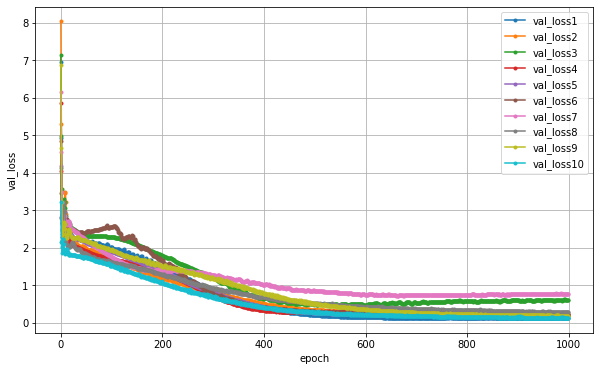

In [21]:
# 学習経過の可視化(大きさ)

val_loss_array = []
for i in range(len(size_history_array)):
    val_loss_array.append(size_history_array[i].history['val_loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(val_loss_array[i])
for i in range(len(val_loss_array)):
    plt.plot(range(nb_epoch), val_loss_array[i], marker='.', label='val_loss%d'%(i+1))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.show()

In [22]:
# モデルの評価(大きさ)
size_loss_array = []
for i in range(len(size_model_array)):
    size_score = size_model_array[i].evaluate(size_x_test_array[i], size_y_test_array[i], verbose=1)
    size_loss = size_score[0]
    size_loss_array.append(size_loss)

2/2 [==============================] - 0s 2ms/step - loss: 0.1215 - accuracy: 0.1200


In [24]:
stdev = np.std(np.array(size_loss_array))
mean = np.mean(np.array(size_loss_array))

print(stdev)
print(mean)


0.2049002038314328
0.2932517722249031


In [1]:
# データ数250で繰り返し行いlossの大きさと安定性を確認する

In [2]:
## 必要なライブラリのimport
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random

In [3]:
## データについて

### データファイルのpath
no_hole_path = './../tmp_simulation/tmp_data/no_hole_data.csv'
one_hole_path = './../tmp_simulation/tmp_data/one_hole_data.csv'
four_holes_path = './../tmp_simulation/tmp_data/four_holes_data.csv'
nine_holes_path = './../tmp_simulation/tmp_data/nine_holes_data.csv'
sixteen_holes_path = './../tmp_simulation/tmp_data/sixteen_holes_data.csv'
twentyfive_holes_path = './../tmp_simulation/tmp_data/twentyfive_holes_data.csv'

### 入力データと正解データ
no_hole_data = []
size_x_train_array= []
size_x_test_array = []
size_y_train_array = []
size_y_test_array = []
position_x_train_array= []
position_x_test_array = []
position_y_train_array = []
position_y_test_array = []

one_one_one = []
one_two_two = []
one_three_three = []
one_four_four = []
one_five_five = []
two_one_two = []
two_two_three = []
two_three_four = []
two_four_five = []
two_five_one = []
three_one_three = []
three_two_four = []
three_three_five = []
three_four_one = []
three_five_two = []
four_one_four = []
four_two_five = []
four_three_one = []
four_four_two = []
four_five_three = []
five_one_five = []
five_two_one = []
five_three_two = []
five_four_three = []
five_five_four = []

### ファイル読み込み

#### 欠陥がない場合の温度データ
with open(no_hole_path) as f:
    for line in f:
        no_hole_data = line.split(',')[:-1]

#### データ分類
with open(one_hole_path) as fs1:
  for line in fs1:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 0 < position[1] and position[1] < 10):
        one_one_one.append(data_array)
    if (10<position[0] and position[0]<20 and 10 < position[1] and position[1] < 20):
        one_two_two.append(data_array)
    if (20<position[0] and position[0]<30 and 20 < position[1] and position[1] < 30):
        one_three_three.append(data_array)
    if (30<position[0] and position[0]<40 and 30 < position[1] and position[1] < 40):
        one_four_four.append(data_array)
    if (40<position[0] and position[0]<50 and 40 < position[1] and position[1] < 50):
        one_five_five.append(data_array)
with open(four_holes_path) as fs2:
  for line in fs2:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 10 < position[1] and position[1] < 20):
        two_one_two.append(data_array)
    if (10<position[0] and position[0]<20 and 20 < position[1] and position[1] < 30):
        two_two_three.append(data_array)
    if (20<position[0] and position[0]<30 and 30 < position[1] and position[1] < 40):
        two_three_four.append(data_array)
    if (30<position[0] and position[0]<40 and 40 < position[1] and position[1] < 50):
        two_four_five.append(data_array)
    if (40<position[0] and position[0]<50 and 0 < position[1] and position[1] < 10):
        two_five_one.append(data_array)
with open(nine_holes_path) as fs3:
  for line in fs3:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 20 < position[1] and position[1] < 30):
        three_one_three.append(data_array)
    if (10<position[0] and position[0]<20 and 30 < position[1] and position[1] < 40):
        three_two_four.append(data_array)
    if (20<position[0] and position[0]<30 and 40 < position[1] and position[1] < 50):
        three_three_five.append(data_array)
    if (30<position[0] and position[0]<40 and 0 < position[1] and position[1] < 10):
        three_four_one.append(data_array)
    if (40<position[0] and position[0]<50 and 10 < position[1] and position[1] < 20):
        three_five_two.append(data_array)
with open(sixteen_holes_path) as fs4:
  for line in fs4:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 30 < position[1] and position[1] < 40):
        four_one_four.append(data_array)
    if (10<position[0] and position[0]<20 and 40 < position[1] and position[1] < 50):
        four_two_five.append(data_array)
    if (20<position[0] and position[0]<30 and 0 < position[1] and position[1] < 10):
        four_three_one.append(data_array)
    if (30<position[0] and position[0]<40 and 10 < position[1] and position[1] < 20):
        four_four_two.append(data_array)
    if (40<position[0] and position[0]<50 and 20 < position[1] and position[1] < 30):
        four_five_three.append(data_array)
with open(twentyfive_holes_path) as fs5:
  for line in fs5:
    data_array = line.split(',')
    position = np.array(data_array[0:2], dtype=float)
    if (0<position[0] and position[0]<10 and 40 < position[1] and position[1] < 50):
        five_one_five.append(data_array)
    if (10<position[0] and position[0]<20 and 0 < position[1] and position[1] < 10):
        five_two_one.append(data_array)
    if (20<position[0] and position[0]<30 and 10 < position[1] and position[1] < 20):
        five_three_two.append(data_array)
    if (30<position[0] and position[0]<40 and 20 < position[1] and position[1] < 30):
        five_four_three.append(data_array)
    if (40<position[0] and position[0]<50 and 30 < position[1] and position[1] < 40):
        five_five_four.append(data_array)

### 利用データの決定
for j in range(10):
    size_x_data = []
    size_y_data = []
    position_x_data = []
    position_y_data = []
    #### one_one_oneについて
    index = []
    for i in range(len(one_one_one)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = one_one_one[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### one_two_twoについて
    index = []
    for i in range(len(one_two_two)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = one_two_two[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### one_three_threeについて
    index = []
    for i in range(len(one_three_three)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = one_three_three[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### one_four_fourについて
    index = []
    for i in range(len(one_four_four)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = one_four_four[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### one_five_fiveについて
    index = []
    for i in range(len(one_five_five)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = one_five_five[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### two_one_twoについて
    index = []
    for i in range(len(two_one_two)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = two_one_two[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### two_two_threeについて
    index = []
    for i in range(len(two_two_three)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = two_two_three[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### two_three_fourについて
    index = []
    for i in range(len(two_three_four)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = two_three_four[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### two_four_fiveについて
    index = []
    for i in range(len(two_four_five)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = two_four_five[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### two_five_oneについて
    index = []
    for i in range(len(two_five_one)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = two_five_one[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### three_one_threeについて
    index = []
    for i in range(len(three_one_three)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = three_one_three[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### three_two_fourについて
    index = []
    for i in range(len(three_two_four)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = three_two_four[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### three_three_fiveについて
    index = []
    for i in range(len(three_three_five)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = three_three_five[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### three_four_oneについて
    index = []
    for i in range(len(three_four_one)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = three_four_one[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### three_five_twoについて
    index = []
    for i in range(len(three_five_two)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = three_five_two[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### four_one_fourについて
    index = []
    for i in range(len(four_one_four)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = four_one_four[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### four_two_fiveについて
    index = []
    for i in range(len(four_two_five)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = four_two_five[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### four_three_oneについて
    index = []
    for i in range(len(four_three_one)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = four_three_one[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### four_four_twoについて
    index = []
    for i in range(len(four_four_two)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = four_four_two[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### four_five_threeについて
    index = []
    for i in range(len(four_five_three)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = four_five_three[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### five_one_fiveについて
    index = []
    for i in range(len(five_one_five)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = five_one_five[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### five_two_oneについて
    index = []
    for i in range(len(five_two_one)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = five_two_one[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### five_three_twoについて
    index = []
    for i in range(len(five_three_two)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = five_three_two[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### five_four_threeについて
    index = []
    for i in range(len(five_four_three)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = five_four_three[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])
    #### five_five_fourについて
    index = []
    for i in range(len(five_five_four)):
        index.append(i)
    data_count = 10
    used_index = random.sample(index, data_count)
    for i in used_index:
        data_array = five_five_four[i]
        size_x_data.append(data_array[3:-1])
        size_y_data.append(data_array[2])
        position_x_data.append(data_array[3:-1])
        position_y_data.append(data_array[0:2])

    ### 各配列をnp.array型にして各要素を型変換
    no_hole_data = np.array(no_hole_data, dtype=float)
    size_x_data = np.array(size_x_data, dtype=float)
    size_y_data = np.array(size_y_data, dtype=int)
    position_x_data = np.array(position_x_data, dtype=float)
    position_y_data = np.array(position_y_data, dtype=float)

    ### データの加工
    size_x_data = (size_x_data-no_hole_data)
    position_x_data = (position_x_data-no_hole_data)
    position_y_data = position_y_data/50
    # print(size_y_data.shape)
    # print(size_x_data.shape)
    # print(size_y_data)
    # print(size_x_data)
    # print(position_y_data.shape)

    ### train用とtest用に分割(4:1)
    size_x_train, size_x_test, size_y_train, size_y_test = train_test_split(size_x_data, size_y_data, test_size=0.20)
    position_x_train, position_x_test, position_y_train, position_y_test = train_test_split(position_x_data, position_y_data, test_size=0.20)


    ### reshape
    size_x_train = size_x_train.reshape(200, 50, 1)
    size_x_test = size_x_test.reshape(50, 50, 1)
    position_x_train = position_x_train.reshape(200, 50, 1)
    position_x_test = position_x_test.reshape(50, 50, 1)
    
    size_x_train_array.append(size_x_train)
    size_x_test_array.append(size_x_test)
    size_y_train_array.append(size_y_train)
    size_y_test_array.append(size_y_test)
    position_x_train_array.append(position_x_train)
    position_x_test_array.append(position_x_test)
    position_y_train_array.append(position_y_train)
    position_y_test_array.append(position_y_test)

In [4]:
## CNN(位置)

### model配列作成
position_model_array = []
for i in range(len(position_x_train_array)):
    ### modelの作成
    position_model = Sequential()
    ### 畳み込み層
    position_model.add(Conv1D(32, 3, padding='same', activation='tanh', input_shape=(50, 1)))
    ### プーリング層
    position_model.add(MaxPooling1D(2, padding='same'))
    ### Flatten層
    position_model.add(Flatten())
    ### 全結合層
    position_model.add(Dense(2, activation='linear'))
    ### optimizer
    adam = keras.optimizers.Adam()
    ###modelのコンパイル
    position_model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    ###配列にappend
    position_model_array.append(position_model)

In [5]:
# 学習(位置)
epochs = 3000
batch_size = 128
position_history_array = []
for i in range(len(position_model_array)):
    position_history = position_model_array[i].fit(position_x_train_array[i], position_y_train_array[i], batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(position_x_test_array[i], position_y_test_array[i]))
    position_history_array.append(position_history)

Epoch 1/3000
2/2 [==============================] - 0s 100ms/step - loss: 0.2634 - accuracy: 0.4950 - val_loss: 0.1029 - val_accuracy: 0.5400
Epoch 2/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0930 - accuracy: 0.4550 - val_loss: 0.1271 - val_accuracy: 0.5600
Epoch 3/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.1273 - accuracy: 0.5100 - val_loss: 0.1385 - val_accuracy: 0.5600
Epoch 4/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.1269 - accuracy: 0.5000 - val_loss: 0.1141 - val_accuracy: 0.6000
Epoch 5/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0941 - accuracy: 0.5700 - val_loss: 0.0892 - val_accuracy: 0.4800
Epoch 6/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0716 - accuracy: 0.5450 - val_loss: 0.0966 - val_accuracy: 0.4600
Epoch 7/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0838 - accuracy: 0.5400 - val_loss: 0.1120 - val_accuracy: 0.4800
Epoch 8/3000

Epoch 59/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0609 - accuracy: 0.6500 - val_loss: 0.0751 - val_accuracy: 0.5600
Epoch 60/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0611 - accuracy: 0.5800 - val_loss: 0.0744 - val_accuracy: 0.5600
Epoch 61/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0607 - accuracy: 0.6050 - val_loss: 0.0738 - val_accuracy: 0.6600
Epoch 62/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0607 - accuracy: 0.6550 - val_loss: 0.0735 - val_accuracy: 0.7000
Epoch 63/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0609 - accuracy: 0.6350 - val_loss: 0.0740 - val_accuracy: 0.7000
Epoch 64/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0609 - accuracy: 0.6100 - val_loss: 0.0730 - val_accuracy: 0.7000
Epoch 65/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0605 - accuracy: 0.6150 - val_loss: 0.0733 - val_accuracy: 0.6800
Epoch 

2/2 [==============================] - 0s 15ms/step - loss: 0.0551 - accuracy: 0.6750 - val_loss: 0.0662 - val_accuracy: 0.6200
Epoch 117/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0550 - accuracy: 0.6500 - val_loss: 0.0644 - val_accuracy: 0.7600
Epoch 118/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0543 - accuracy: 0.6750 - val_loss: 0.0642 - val_accuracy: 0.8200
Epoch 119/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0544 - accuracy: 0.6700 - val_loss: 0.0645 - val_accuracy: 0.7600
Epoch 120/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0542 - accuracy: 0.7050 - val_loss: 0.0644 - val_accuracy: 0.8000
Epoch 121/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0545 - accuracy: 0.7150 - val_loss: 0.0648 - val_accuracy: 0.6400
Epoch 122/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0539 - accuracy: 0.6750 - val_loss: 0.0640 - val_accuracy: 0.8000
Epoch 123/3000

2/2 [==============================] - 0s 21ms/step - loss: 0.0487 - accuracy: 0.7400 - val_loss: 0.0573 - val_accuracy: 0.8400
Epoch 174/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0487 - accuracy: 0.7800 - val_loss: 0.0571 - val_accuracy: 0.8600
Epoch 175/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0485 - accuracy: 0.7600 - val_loss: 0.0566 - val_accuracy: 0.8600
Epoch 176/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0486 - accuracy: 0.7200 - val_loss: 0.0568 - val_accuracy: 0.8600
Epoch 177/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0484 - accuracy: 0.7700 - val_loss: 0.0576 - val_accuracy: 0.7800
Epoch 178/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0485 - accuracy: 0.7400 - val_loss: 0.0562 - val_accuracy: 0.8600
Epoch 179/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0482 - accuracy: 0.7450 - val_loss: 0.0562 - val_accuracy: 0.8400
Epoch 180/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0450 - accuracy: 0.7750 - val_loss: 0.0518 - val_accuracy: 0.8600
Epoch 231/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0455 - accuracy: 0.8000 - val_loss: 0.0540 - val_accuracy: 0.8400
Epoch 232/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0459 - accuracy: 0.7900 - val_loss: 0.0523 - val_accuracy: 0.8600
Epoch 233/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0445 - accuracy: 0.7850 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 234/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0442 - accuracy: 0.7750 - val_loss: 0.0532 - val_accuracy: 0.9000
Epoch 235/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0444 - accuracy: 0.8150 - val_loss: 0.0520 - val_accuracy: 0.8600
Epoch 236/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0446 - accuracy: 0.7950 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 237/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0414 - accuracy: 0.8200 - val_loss: 0.0487 - val_accuracy: 0.8600
Epoch 288/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0416 - accuracy: 0.7700 - val_loss: 0.0488 - val_accuracy: 0.9000
Epoch 289/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0418 - accuracy: 0.7900 - val_loss: 0.0504 - val_accuracy: 0.8400
Epoch 290/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0412 - accuracy: 0.8250 - val_loss: 0.0488 - val_accuracy: 0.8400
Epoch 291/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0414 - accuracy: 0.7550 - val_loss: 0.0489 - val_accuracy: 0.8800
Epoch 292/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0408 - accuracy: 0.8250 - val_loss: 0.0501 - val_accuracy: 0.8400
Epoch 293/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0411 - accuracy: 0.8250 - val_loss: 0.0484 - val_accuracy: 0.8600
Epoch 294/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0392 - accuracy: 0.7850 - val_loss: 0.0476 - val_accuracy: 0.8800
Epoch 345/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0387 - accuracy: 0.8350 - val_loss: 0.0488 - val_accuracy: 0.8600
Epoch 346/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0403 - accuracy: 0.7950 - val_loss: 0.0471 - val_accuracy: 0.8800
Epoch 347/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0389 - accuracy: 0.8200 - val_loss: 0.0493 - val_accuracy: 0.9000
Epoch 348/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0395 - accuracy: 0.8750 - val_loss: 0.0483 - val_accuracy: 0.8600
Epoch 349/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0399 - accuracy: 0.8200 - val_loss: 0.0467 - val_accuracy: 0.9000
Epoch 350/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0399 - accuracy: 0.8250 - val_loss: 0.0479 - val_accuracy: 0.9000
Epoch 351/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8400 - val_loss: 0.0460 - val_accuracy: 0.8800
Epoch 402/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.8200 - val_loss: 0.0467 - val_accuracy: 0.8800
Epoch 403/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8700 - val_loss: 0.0461 - val_accuracy: 0.9000
Epoch 404/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0372 - accuracy: 0.8200 - val_loss: 0.0464 - val_accuracy: 0.8800
Epoch 405/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0380 - accuracy: 0.8100 - val_loss: 0.0465 - val_accuracy: 0.8800
Epoch 406/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8500 - val_loss: 0.0461 - val_accuracy: 0.8800
Epoch 407/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.8150 - val_loss: 0.0460 - val_accuracy: 0.8600
Epoch 408/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8400 - val_loss: 0.0461 - val_accuracy: 0.8800
Epoch 459/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0369 - accuracy: 0.8550 - val_loss: 0.0459 - val_accuracy: 0.8600
Epoch 460/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8250 - val_loss: 0.0465 - val_accuracy: 0.8600
Epoch 461/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0369 - accuracy: 0.8450 - val_loss: 0.0463 - val_accuracy: 0.8800
Epoch 462/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8450 - val_loss: 0.0457 - val_accuracy: 0.9000
Epoch 463/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0368 - accuracy: 0.8350 - val_loss: 0.0464 - val_accuracy: 0.8800
Epoch 464/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0375 - accuracy: 0.8350 - val_loss: 0.0455 - val_accuracy: 0.8800
Epoch 465/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0389 - accuracy: 0.8050 - val_loss: 0.0460 - val_accuracy: 0.8800
Epoch 516/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0371 - accuracy: 0.8650 - val_loss: 0.0467 - val_accuracy: 0.8600
Epoch 517/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8550 - val_loss: 0.0462 - val_accuracy: 0.8400
Epoch 518/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0375 - accuracy: 0.7700 - val_loss: 0.0469 - val_accuracy: 0.8600
Epoch 519/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0371 - accuracy: 0.8450 - val_loss: 0.0467 - val_accuracy: 0.8600
Epoch 520/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0378 - accuracy: 0.8250 - val_loss: 0.0457 - val_accuracy: 0.8600
Epoch 521/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8200 - val_loss: 0.0494 - val_accuracy: 0.8600
Epoch 522/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0390 - accuracy: 0.7900 - val_loss: 0.0464 - val_accuracy: 0.8800
Epoch 573/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0371 - accuracy: 0.8550 - val_loss: 0.0498 - val_accuracy: 0.8800
Epoch 574/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0387 - accuracy: 0.8050 - val_loss: 0.0460 - val_accuracy: 0.8600
Epoch 575/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0374 - accuracy: 0.7850 - val_loss: 0.0470 - val_accuracy: 0.8800
Epoch 576/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.8600 - val_loss: 0.0469 - val_accuracy: 0.9000
Epoch 577/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0369 - accuracy: 0.8500 - val_loss: 0.0458 - val_accuracy: 0.8800
Epoch 578/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0365 - accuracy: 0.8600 - val_loss: 0.0461 - val_accuracy: 0.8800
Epoch 579/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8550 - val_loss: 0.0479 - val_accuracy: 0.8800
Epoch 630/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.8550 - val_loss: 0.0481 - val_accuracy: 0.9200
Epoch 631/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8150 - val_loss: 0.0456 - val_accuracy: 0.9000
Epoch 632/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0378 - accuracy: 0.8600 - val_loss: 0.0470 - val_accuracy: 0.8600
Epoch 633/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8550 - val_loss: 0.0470 - val_accuracy: 0.9200
Epoch 634/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8500 - val_loss: 0.0459 - val_accuracy: 0.9200
Epoch 635/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8700 - val_loss: 0.0476 - val_accuracy: 0.8600
Epoch 636/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8300 - val_loss: 0.0464 - val_accuracy: 0.8800
Epoch 687/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8550 - val_loss: 0.0457 - val_accuracy: 0.8800
Epoch 688/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0360 - accuracy: 0.8300 - val_loss: 0.0457 - val_accuracy: 0.9200
Epoch 689/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0356 - accuracy: 0.8450 - val_loss: 0.0470 - val_accuracy: 0.8600
Epoch 690/3000
2/2 [==============================] - 0s 28ms/step - loss: 0.0364 - accuracy: 0.8350 - val_loss: 0.0456 - val_accuracy: 0.9000
Epoch 691/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0357 - accuracy: 0.8450 - val_loss: 0.0457 - val_accuracy: 0.9000
Epoch 692/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0356 - accuracy: 0.8500 - val_loss: 0.0463 - val_accuracy: 0.8800
Epoch 693/3000

2/2 [==============================] - 0s 19ms/step - loss: 0.0365 - accuracy: 0.8850 - val_loss: 0.0461 - val_accuracy: 0.9000
Epoch 744/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0358 - accuracy: 0.8400 - val_loss: 0.0469 - val_accuracy: 0.9200
Epoch 745/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0365 - accuracy: 0.8450 - val_loss: 0.0462 - val_accuracy: 0.8800
Epoch 746/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0363 - accuracy: 0.8600 - val_loss: 0.0458 - val_accuracy: 0.9200
Epoch 747/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0367 - accuracy: 0.8350 - val_loss: 0.0463 - val_accuracy: 0.9000
Epoch 748/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0357 - accuracy: 0.8750 - val_loss: 0.0476 - val_accuracy: 0.8800
Epoch 749/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0368 - accuracy: 0.8600 - val_loss: 0.0458 - val_accuracy: 0.9200
Epoch 750/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8500 - val_loss: 0.0460 - val_accuracy: 0.8800
Epoch 801/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0365 - accuracy: 0.8300 - val_loss: 0.0470 - val_accuracy: 0.8800
Epoch 802/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.8600 - val_loss: 0.0479 - val_accuracy: 0.8800
Epoch 803/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8500 - val_loss: 0.0460 - val_accuracy: 0.9200
Epoch 804/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0354 - accuracy: 0.8500 - val_loss: 0.0459 - val_accuracy: 0.9200
Epoch 805/3000
2/2 [==============================] - ETA: 0s - loss: 0.0335 - accuracy: 0.85 - 0s 22ms/step - loss: 0.0356 - accuracy: 0.8450 - val_loss: 0.0461 - val_accuracy: 0.9200
Epoch 806/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0356 - accuracy: 0.8550 - val_loss: 0.

2/2 [==============================] - 0s 22ms/step - loss: 0.0357 - accuracy: 0.8550 - val_loss: 0.0474 - val_accuracy: 0.8600
Epoch 858/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0359 - accuracy: 0.8600 - val_loss: 0.0460 - val_accuracy: 0.8800
Epoch 859/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0357 - accuracy: 0.8150 - val_loss: 0.0467 - val_accuracy: 0.8800
Epoch 860/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0355 - accuracy: 0.8700 - val_loss: 0.0468 - val_accuracy: 0.8600
Epoch 861/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0359 - accuracy: 0.8800 - val_loss: 0.0464 - val_accuracy: 0.9000
Epoch 862/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0357 - accuracy: 0.8600 - val_loss: 0.0466 - val_accuracy: 0.9200
Epoch 863/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0355 - accuracy: 0.8400 - val_loss: 0.0467 - val_accuracy: 0.9000
Epoch 864/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0364 - accuracy: 0.7950 - val_loss: 0.0476 - val_accuracy: 0.8600
Epoch 915/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8500 - val_loss: 0.0479 - val_accuracy: 0.8400
Epoch 916/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8600 - val_loss: 0.0465 - val_accuracy: 0.8600
Epoch 917/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8150 - val_loss: 0.0473 - val_accuracy: 0.8600
Epoch 918/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0360 - accuracy: 0.8550 - val_loss: 0.0483 - val_accuracy: 0.8600
Epoch 919/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8750 - val_loss: 0.0466 - val_accuracy: 0.8800
Epoch 920/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0364 - accuracy: 0.8150 - val_loss: 0.0467 - val_accuracy: 0.8600
Epoch 921/3000

2/2 [==============================] - 0s 36ms/step - loss: 0.0357 - accuracy: 0.8550 - val_loss: 0.0476 - val_accuracy: 0.8600
Epoch 972/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0357 - accuracy: 0.8600 - val_loss: 0.0465 - val_accuracy: 0.8600
Epoch 973/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.8250 - val_loss: 0.0473 - val_accuracy: 0.8600
Epoch 974/3000
2/2 [==============================] - 0s 41ms/step - loss: 0.0354 - accuracy: 0.8650 - val_loss: 0.0471 - val_accuracy: 0.8600
Epoch 975/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0353 - accuracy: 0.8700 - val_loss: 0.0466 - val_accuracy: 0.9000
Epoch 976/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0358 - accuracy: 0.8250 - val_loss: 0.0471 - val_accuracy: 0.8600
Epoch 977/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0357 - accuracy: 0.8800 - val_loss: 0.0474 - val_accuracy: 0.8600
Epoch 978/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8550 - val_loss: 0.0467 - val_accuracy: 0.8600
Epoch 1029/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.8150 - val_loss: 0.0468 - val_accuracy: 0.8600
Epoch 1030/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8350 - val_loss: 0.0491 - val_accuracy: 0.8400
Epoch 1031/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8400 - val_loss: 0.0467 - val_accuracy: 0.8600
Epoch 1032/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0360 - accuracy: 0.8350 - val_loss: 0.0469 - val_accuracy: 0.9000
Epoch 1033/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0353 - accuracy: 0.8450 - val_loss: 0.0484 - val_accuracy: 0.9000
Epoch 1034/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0372 - accuracy: 0.8850 - val_loss: 0.0473 - val_accuracy: 0.8600
Epoch 10

Epoch 1085/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.8450 - val_loss: 0.0481 - val_accuracy: 0.8600
Epoch 1086/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.8550 - val_loss: 0.0475 - val_accuracy: 0.8800
Epoch 1087/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.8550 - val_loss: 0.0473 - val_accuracy: 0.9000
Epoch 1088/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8650 - val_loss: 0.0477 - val_accuracy: 0.8600
Epoch 1089/3000
2/2 [==============================] - 0s 40ms/step - loss: 0.0353 - accuracy: 0.8750 - val_loss: 0.0473 - val_accuracy: 0.9000
Epoch 1090/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0351 - accuracy: 0.8550 - val_loss: 0.0472 - val_accuracy: 0.9000
Epoch 1091/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.8450 - val_loss: 0.0475 - val_accuracy:

Epoch 1142/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8500 - val_loss: 0.0477 - val_accuracy: 0.9000
Epoch 1143/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.8300 - val_loss: 0.0476 - val_accuracy: 0.8600
Epoch 1144/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8150 - val_loss: 0.0489 - val_accuracy: 0.8400
Epoch 1145/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8550 - val_loss: 0.0484 - val_accuracy: 0.8600
Epoch 1146/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0356 - accuracy: 0.8600 - val_loss: 0.0481 - val_accuracy: 0.8600
Epoch 1147/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.8400 - val_loss: 0.0482 - val_accuracy: 0.8600
Epoch 1148/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.8700 - val_loss: 0.0483 - val_accuracy:

Epoch 1199/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8450 - val_loss: 0.0481 - val_accuracy: 0.8800
Epoch 1200/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0354 - accuracy: 0.8650 - val_loss: 0.0493 - val_accuracy: 0.9000
Epoch 1201/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8400 - val_loss: 0.0486 - val_accuracy: 0.8600
Epoch 1202/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8600 - val_loss: 0.0491 - val_accuracy: 0.8400
Epoch 1203/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0356 - accuracy: 0.8450 - val_loss: 0.0480 - val_accuracy: 0.9000
Epoch 1204/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8350 - val_loss: 0.0479 - val_accuracy: 0.8800
Epoch 1205/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.8650 - val_loss: 0.0500 - val_accuracy:

Epoch 1256/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8500 - val_loss: 0.0490 - val_accuracy: 0.8600
Epoch 1257/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8600 - val_loss: 0.0491 - val_accuracy: 0.8600
Epoch 1258/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8350 - val_loss: 0.0532 - val_accuracy: 0.8800
Epoch 1259/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0384 - accuracy: 0.8800 - val_loss: 0.0490 - val_accuracy: 0.8600
Epoch 1260/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.8200 - val_loss: 0.0497 - val_accuracy: 0.8600
Epoch 1261/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0362 - accuracy: 0.8850 - val_loss: 0.0530 - val_accuracy: 0.8800
Epoch 1262/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.8500 - val_loss: 0.0485 - val_accuracy:

Epoch 1313/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8550 - val_loss: 0.0489 - val_accuracy: 0.9000
Epoch 1314/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8300 - val_loss: 0.0494 - val_accuracy: 0.8600
Epoch 1315/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.8400 - val_loss: 0.0486 - val_accuracy: 0.8600
Epoch 1316/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.8450 - val_loss: 0.0491 - val_accuracy: 0.9000
Epoch 1317/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0354 - accuracy: 0.8450 - val_loss: 0.0497 - val_accuracy: 0.8600
Epoch 1318/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0352 - accuracy: 0.8650 - val_loss: 0.0494 - val_accuracy: 0.8800
Epoch 1319/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0354 - accuracy: 0.8400 - val_loss: 0.0485 - val_accuracy:

Epoch 1370/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0352 - accuracy: 0.8600 - val_loss: 0.0485 - val_accuracy: 0.8400
Epoch 1371/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0353 - accuracy: 0.8100 - val_loss: 0.0493 - val_accuracy: 0.8800
Epoch 1372/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0352 - accuracy: 0.8900 - val_loss: 0.0495 - val_accuracy: 0.8600
Epoch 1373/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.8700 - val_loss: 0.0485 - val_accuracy: 0.8600
Epoch 1374/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8150 - val_loss: 0.0494 - val_accuracy: 0.8600
Epoch 1375/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0368 - accuracy: 0.8550 - val_loss: 0.0496 - val_accuracy: 0.8600
Epoch 1376/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8700 - val_loss: 0.0492 - val_accuracy:

Epoch 1427/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0378 - accuracy: 0.8750 - val_loss: 0.0488 - val_accuracy: 0.8600
Epoch 1428/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0350 - accuracy: 0.8500 - val_loss: 0.0539 - val_accuracy: 0.8600
Epoch 1429/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0388 - accuracy: 0.8150 - val_loss: 0.0491 - val_accuracy: 0.8600
Epoch 1430/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0366 - accuracy: 0.8000 - val_loss: 0.0519 - val_accuracy: 0.8400
Epoch 1431/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0354 - accuracy: 0.8650 - val_loss: 0.0509 - val_accuracy: 0.8600
Epoch 1432/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0370 - accuracy: 0.8050 - val_loss: 0.0488 - val_accuracy: 0.8600
Epoch 1433/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0360 - accuracy: 0.8050 - val_loss: 0.0514 - val_accuracy:

2/2 [==============================] - 0s 15ms/step - loss: 0.0350 - accuracy: 0.8400 - val_loss: 0.0496 - val_accuracy: 0.8400
Epoch 1484/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0355 - accuracy: 0.8100 - val_loss: 0.0517 - val_accuracy: 0.8400
Epoch 1485/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8550 - val_loss: 0.0495 - val_accuracy: 0.8800
Epoch 1486/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.8450 - val_loss: 0.0491 - val_accuracy: 0.8400
Epoch 1487/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0352 - accuracy: 0.8000 - val_loss: 0.0518 - val_accuracy: 0.8400
Epoch 1488/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8550 - val_loss: 0.0494 - val_accuracy: 0.8800
Epoch 1489/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0351 - accuracy: 0.8500 - val_loss: 0.0491 - val_accuracy: 0.8600
Epoch 14

2/2 [==============================] - 0s 16ms/step - loss: 0.0353 - accuracy: 0.8600 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 1541/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0360 - accuracy: 0.8650 - val_loss: 0.0496 - val_accuracy: 0.8600
Epoch 1542/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0356 - accuracy: 0.8100 - val_loss: 0.0496 - val_accuracy: 0.9000
Epoch 1543/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.8400 - val_loss: 0.0516 - val_accuracy: 0.8400
Epoch 1544/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.8600 - val_loss: 0.0495 - val_accuracy: 0.8400
Epoch 1545/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0356 - accuracy: 0.7950 - val_loss: 0.0503 - val_accuracy: 0.8800
Epoch 1546/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0357 - accuracy: 0.8450 - val_loss: 0.0518 - val_accuracy: 0.8400
Epoch 15

2/2 [==============================] - 0s 16ms/step - loss: 0.0348 - accuracy: 0.8500 - val_loss: 0.0502 - val_accuracy: 0.8800
Epoch 1598/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0347 - accuracy: 0.8550 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 1599/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0347 - accuracy: 0.8650 - val_loss: 0.0504 - val_accuracy: 0.8600
Epoch 1600/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0349 - accuracy: 0.8800 - val_loss: 0.0502 - val_accuracy: 0.8600
Epoch 1601/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0347 - accuracy: 0.8700 - val_loss: 0.0503 - val_accuracy: 0.8800
Epoch 1602/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0347 - accuracy: 0.8700 - val_loss: 0.0505 - val_accuracy: 0.8600
Epoch 1603/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0349 - accuracy: 0.8700 - val_loss: 0.0502 - val_accuracy: 0.8600
Epoch 16

Epoch 1654/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0352 - accuracy: 0.8600 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 1655/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0351 - accuracy: 0.8600 - val_loss: 0.0509 - val_accuracy: 0.9000
Epoch 1656/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0362 - accuracy: 0.8300 - val_loss: 0.0503 - val_accuracy: 0.9000
Epoch 1657/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0358 - accuracy: 0.8250 - val_loss: 0.0526 - val_accuracy: 0.8400
Epoch 1658/3000
2/2 [==============================] - 0s 44ms/step - loss: 0.0362 - accuracy: 0.8550 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 1659/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0350 - accuracy: 0.8350 - val_loss: 0.0501 - val_accuracy: 0.8600
Epoch 1660/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0358 - accuracy: 0.8350 - val_loss: 0.0513 - val_accuracy:

Epoch 1711/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0350 - accuracy: 0.8250 - val_loss: 0.0524 - val_accuracy: 0.8400
Epoch 1712/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0352 - accuracy: 0.8500 - val_loss: 0.0523 - val_accuracy: 0.9000
Epoch 1713/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0360 - accuracy: 0.8750 - val_loss: 0.0505 - val_accuracy: 0.8400
Epoch 1714/3000
2/2 [==============================] - 0s 30ms/step - loss: 0.0349 - accuracy: 0.8150 - val_loss: 0.0537 - val_accuracy: 0.8400
Epoch 1715/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.8550 - val_loss: 0.0521 - val_accuracy: 0.8400
Epoch 1716/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0361 - accuracy: 0.8600 - val_loss: 0.0514 - val_accuracy: 0.8600
Epoch 1717/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0350 - accuracy: 0.8400 - val_loss: 0.0525 - val_accuracy:

Epoch 1768/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0346 - accuracy: 0.8650 - val_loss: 0.0512 - val_accuracy: 0.9000
Epoch 1769/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0353 - accuracy: 0.8650 - val_loss: 0.0509 - val_accuracy: 0.9000
Epoch 1770/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0345 - accuracy: 0.8400 - val_loss: 0.0520 - val_accuracy: 0.8800
Epoch 1771/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0349 - accuracy: 0.8500 - val_loss: 0.0517 - val_accuracy: 0.8600
Epoch 1772/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0354 - accuracy: 0.8600 - val_loss: 0.0513 - val_accuracy: 0.8600
Epoch 1773/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0349 - accuracy: 0.8550 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 1774/3000
2/2 [==============================] - 0s 33ms/step - loss: 0.0354 - accuracy: 0.8250 - val_loss: 0.0514 - val_accuracy:

Epoch 1825/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0350 - accuracy: 0.8150 - val_loss: 0.0514 - val_accuracy: 0.8800
Epoch 1826/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8300 - val_loss: 0.0529 - val_accuracy: 0.8400
Epoch 1827/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0347 - accuracy: 0.8550 - val_loss: 0.0519 - val_accuracy: 0.8600
Epoch 1828/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0355 - accuracy: 0.8150 - val_loss: 0.0514 - val_accuracy: 0.8800
Epoch 1829/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0365 - accuracy: 0.8700 - val_loss: 0.0523 - val_accuracy: 0.8600
Epoch 1830/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.8250 - val_loss: 0.0519 - val_accuracy: 0.8600
Epoch 1831/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - accuracy: 0.8350 - val_loss: 0.0525 - val_accuracy:

Epoch 1882/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0348 - accuracy: 0.8550 - val_loss: 0.0518 - val_accuracy: 0.8600
Epoch 1883/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0355 - accuracy: 0.8300 - val_loss: 0.0528 - val_accuracy: 0.8600
Epoch 1884/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0356 - accuracy: 0.8650 - val_loss: 0.0528 - val_accuracy: 0.8600
Epoch 1885/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.8650 - val_loss: 0.0526 - val_accuracy: 0.8600
Epoch 1886/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8500 - val_loss: 0.0543 - val_accuracy: 0.8400
Epoch 1887/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0365 - accuracy: 0.8550 - val_loss: 0.0522 - val_accuracy: 0.8600
Epoch 1888/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.7900 - val_loss: 0.0531 - val_accuracy:

Epoch 1939/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0348 - accuracy: 0.8300 - val_loss: 0.0545 - val_accuracy: 0.8400
Epoch 1940/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0360 - accuracy: 0.8600 - val_loss: 0.0520 - val_accuracy: 0.8800
Epoch 1941/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0346 - accuracy: 0.8450 - val_loss: 0.0540 - val_accuracy: 0.8600
Epoch 1942/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0357 - accuracy: 0.8350 - val_loss: 0.0529 - val_accuracy: 0.8600
Epoch 1943/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8600 - val_loss: 0.0530 - val_accuracy: 0.8600
Epoch 1944/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8650 - val_loss: 0.0534 - val_accuracy: 0.8800
Epoch 1945/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.8300 - val_loss: 0.0520 - val_accuracy:

Epoch 1996/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0349 - accuracy: 0.8700 - val_loss: 0.0529 - val_accuracy: 0.8600
Epoch 1997/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8300 - val_loss: 0.0540 - val_accuracy: 0.8600
Epoch 1998/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0347 - accuracy: 0.8600 - val_loss: 0.0522 - val_accuracy: 0.8600
Epoch 1999/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8250 - val_loss: 0.0525 - val_accuracy: 0.9000
Epoch 2000/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.8550 - val_loss: 0.0533 - val_accuracy: 0.8600
Epoch 2001/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0343 - accuracy: 0.8550 - val_loss: 0.0526 - val_accuracy: 0.8600
Epoch 2002/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0351 - accuracy: 0.8200 - val_loss: 0.0536 - val_accuracy:

Epoch 2053/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0343 - accuracy: 0.8350 - val_loss: 0.0539 - val_accuracy: 0.8600
Epoch 2054/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0344 - accuracy: 0.8700 - val_loss: 0.0534 - val_accuracy: 0.8600
Epoch 2055/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0344 - accuracy: 0.8750 - val_loss: 0.0530 - val_accuracy: 0.9000
Epoch 2056/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0343 - accuracy: 0.8400 - val_loss: 0.0535 - val_accuracy: 0.9000
Epoch 2057/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0348 - accuracy: 0.8250 - val_loss: 0.0537 - val_accuracy: 0.8600
Epoch 2058/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0346 - accuracy: 0.8700 - val_loss: 0.0535 - val_accuracy: 0.8800
Epoch 2059/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0346 - accuracy: 0.8900 - val_loss: 0.0527 - val_accuracy:

Epoch 2110/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0343 - accuracy: 0.8700 - val_loss: 0.0535 - val_accuracy: 0.8800
Epoch 2111/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 0.8550 - val_loss: 0.0540 - val_accuracy: 0.8800
Epoch 2112/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0344 - accuracy: 0.8500 - val_loss: 0.0533 - val_accuracy: 0.9000
Epoch 2113/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8450 - val_loss: 0.0541 - val_accuracy: 0.8600
Epoch 2114/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0344 - accuracy: 0.8900 - val_loss: 0.0540 - val_accuracy: 0.8600
Epoch 2115/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0345 - accuracy: 0.8800 - val_loss: 0.0532 - val_accuracy: 0.9000
Epoch 2116/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0346 - accuracy: 0.8500 - val_loss: 0.0532 - val_accuracy:

Epoch 2167/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0366 - accuracy: 0.8550 - val_loss: 0.0534 - val_accuracy: 0.8600
Epoch 2168/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8150 - val_loss: 0.0549 - val_accuracy: 0.8600
Epoch 2169/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0349 - accuracy: 0.8350 - val_loss: 0.0559 - val_accuracy: 0.8400
Epoch 2170/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0356 - accuracy: 0.8550 - val_loss: 0.0539 - val_accuracy: 0.8800
Epoch 2171/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0346 - accuracy: 0.8450 - val_loss: 0.0547 - val_accuracy: 0.8600
Epoch 2172/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0350 - accuracy: 0.8400 - val_loss: 0.0544 - val_accuracy: 0.8600
Epoch 2173/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0354 - accuracy: 0.8700 - val_loss: 0.0543 - val_accuracy:

Epoch 2224/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0352 - accuracy: 0.8050 - val_loss: 0.0537 - val_accuracy: 0.8600
Epoch 2225/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0343 - accuracy: 0.8150 - val_loss: 0.0575 - val_accuracy: 0.8400
Epoch 2226/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8550 - val_loss: 0.0541 - val_accuracy: 0.8600
Epoch 2227/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0349 - accuracy: 0.8100 - val_loss: 0.0538 - val_accuracy: 0.8600
Epoch 2228/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0343 - accuracy: 0.8150 - val_loss: 0.0565 - val_accuracy: 0.8400
Epoch 2229/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.8550 - val_loss: 0.0538 - val_accuracy: 0.8600
Epoch 2230/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0343 - accuracy: 0.8200 - val_loss: 0.0547 - val_accuracy:

Epoch 2281/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.7950 - val_loss: 0.0551 - val_accuracy: 0.8800
Epoch 2282/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0346 - accuracy: 0.8700 - val_loss: 0.0556 - val_accuracy: 0.8600
Epoch 2283/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0345 - accuracy: 0.8500 - val_loss: 0.0542 - val_accuracy: 0.8600
Epoch 2284/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.8150 - val_loss: 0.0553 - val_accuracy: 0.8800
Epoch 2285/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0354 - accuracy: 0.8650 - val_loss: 0.0548 - val_accuracy: 0.9000
Epoch 2286/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8450 - val_loss: 0.0548 - val_accuracy: 0.8600
Epoch 2287/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8300 - val_loss: 0.0551 - val_accuracy:

Epoch 2338/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0350 - accuracy: 0.8850 - val_loss: 0.0548 - val_accuracy: 0.9000
Epoch 2339/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0342 - accuracy: 0.8450 - val_loss: 0.0558 - val_accuracy: 0.8800
Epoch 2340/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0346 - accuracy: 0.8700 - val_loss: 0.0556 - val_accuracy: 0.8800
Epoch 2341/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0343 - accuracy: 0.8400 - val_loss: 0.0556 - val_accuracy: 0.8800
Epoch 2342/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0344 - accuracy: 0.8500 - val_loss: 0.0570 - val_accuracy: 0.8400
Epoch 2343/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0350 - accuracy: 0.8450 - val_loss: 0.0549 - val_accuracy: 0.8600
Epoch 2344/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0347 - accuracy: 0.8200 - val_loss: 0.0554 - val_accuracy:

Epoch 2395/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0341 - accuracy: 0.8700 - val_loss: 0.0558 - val_accuracy: 0.8600
Epoch 2396/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0340 - accuracy: 0.8800 - val_loss: 0.0551 - val_accuracy: 0.8600
Epoch 2397/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0343 - accuracy: 0.8250 - val_loss: 0.0564 - val_accuracy: 0.8600
Epoch 2398/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0342 - accuracy: 0.8600 - val_loss: 0.0562 - val_accuracy: 0.8600
Epoch 2399/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0339 - accuracy: 0.8800 - val_loss: 0.0549 - val_accuracy: 0.8600
Epoch 2400/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0346 - accuracy: 0.8250 - val_loss: 0.0553 - val_accuracy: 0.9000
Epoch 2401/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 0.8500 - val_loss: 0.0559 - val_accuracy:

Epoch 2452/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0356 - accuracy: 0.8500 - val_loss: 0.0568 - val_accuracy: 0.8600
Epoch 2453/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0354 - accuracy: 0.8600 - val_loss: 0.0565 - val_accuracy: 0.8600
Epoch 2454/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0355 - accuracy: 0.8250 - val_loss: 0.0564 - val_accuracy: 0.8600
Epoch 2455/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0346 - accuracy: 0.8600 - val_loss: 0.0582 - val_accuracy: 0.8400
Epoch 2456/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8550 - val_loss: 0.0561 - val_accuracy: 0.8600
Epoch 2457/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0347 - accuracy: 0.8100 - val_loss: 0.0553 - val_accuracy: 0.8600
Epoch 2458/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0343 - accuracy: 0.8500 - val_loss: 0.0580 - val_accuracy:

Epoch 2509/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0355 - accuracy: 0.8650 - val_loss: 0.0563 - val_accuracy: 0.8800
Epoch 2510/3000
2/2 [==============================] - 0s 65ms/step - loss: 0.0338 - accuracy: 0.8450 - val_loss: 0.0569 - val_accuracy: 0.8600
Epoch 2511/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0351 - accuracy: 0.8300 - val_loss: 0.0573 - val_accuracy: 0.8600
Epoch 2512/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.8600 - val_loss: 0.0563 - val_accuracy: 0.9000
Epoch 2513/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0341 - accuracy: 0.8050 - val_loss: 0.0568 - val_accuracy: 0.8800
Epoch 2514/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0350 - accuracy: 0.8450 - val_loss: 0.0587 - val_accuracy: 0.8400
Epoch 2515/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0351 - accuracy: 0.8850 - val_loss: 0.0559 - val_accuracy:

Epoch 2566/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0338 - accuracy: 0.8550 - val_loss: 0.0585 - val_accuracy: 0.8400
Epoch 2567/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0343 - accuracy: 0.8650 - val_loss: 0.0566 - val_accuracy: 0.8800
Epoch 2568/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0339 - accuracy: 0.8400 - val_loss: 0.0564 - val_accuracy: 0.8600
Epoch 2569/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0338 - accuracy: 0.8350 - val_loss: 0.0577 - val_accuracy: 0.8600
Epoch 2570/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0344 - accuracy: 0.8600 - val_loss: 0.0569 - val_accuracy: 0.8800
Epoch 2571/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0338 - accuracy: 0.8450 - val_loss: 0.0567 - val_accuracy: 0.8600
Epoch 2572/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0349 - accuracy: 0.8200 - val_loss: 0.0566 - val_accuracy:

Epoch 2623/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0339 - accuracy: 0.8550 - val_loss: 0.0573 - val_accuracy: 0.9000
Epoch 2624/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8450 - val_loss: 0.0581 - val_accuracy: 0.8600
Epoch 2625/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0345 - accuracy: 0.8600 - val_loss: 0.0578 - val_accuracy: 0.8800
Epoch 2626/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0350 - accuracy: 0.8400 - val_loss: 0.0567 - val_accuracy: 0.8600
Epoch 2627/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0341 - accuracy: 0.8300 - val_loss: 0.0590 - val_accuracy: 0.8600
Epoch 2628/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0346 - accuracy: 0.8550 - val_loss: 0.0571 - val_accuracy: 0.8800
Epoch 2629/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0341 - accuracy: 0.8150 - val_loss: 0.0567 - val_accuracy:

Epoch 2680/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0364 - accuracy: 0.8650 - val_loss: 0.0585 - val_accuracy: 0.8600
Epoch 2681/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0341 - accuracy: 0.8750 - val_loss: 0.0573 - val_accuracy: 0.8600
Epoch 2682/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0345 - accuracy: 0.8200 - val_loss: 0.0573 - val_accuracy: 0.8800
Epoch 2683/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0338 - accuracy: 0.8400 - val_loss: 0.0588 - val_accuracy: 0.8600
Epoch 2684/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0340 - accuracy: 0.8400 - val_loss: 0.0571 - val_accuracy: 0.8600
Epoch 2685/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8150 - val_loss: 0.0583 - val_accuracy: 0.8600
Epoch 2686/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0344 - accuracy: 0.8650 - val_loss: 0.0599 - val_accuracy:

Epoch 2737/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0347 - accuracy: 0.8300 - val_loss: 0.0614 - val_accuracy: 0.8400
Epoch 2738/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0354 - accuracy: 0.8450 - val_loss: 0.0585 - val_accuracy: 0.8600
Epoch 2739/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0341 - accuracy: 0.8650 - val_loss: 0.0582 - val_accuracy: 0.8400
Epoch 2740/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.8050 - val_loss: 0.0601 - val_accuracy: 0.8400
Epoch 2741/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8550 - val_loss: 0.0595 - val_accuracy: 0.8800
Epoch 2742/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8450 - val_loss: 0.0576 - val_accuracy: 0.8600
Epoch 2743/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.8400 - val_loss: 0.0608 - val_accuracy:

Epoch 2794/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8000 - val_loss: 0.0586 - val_accuracy: 0.8800
Epoch 2795/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0338 - accuracy: 0.8600 - val_loss: 0.0621 - val_accuracy: 0.8400
Epoch 2796/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0364 - accuracy: 0.8500 - val_loss: 0.0585 - val_accuracy: 0.9000
Epoch 2797/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0339 - accuracy: 0.8500 - val_loss: 0.0580 - val_accuracy: 0.8600
Epoch 2798/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0339 - accuracy: 0.8300 - val_loss: 0.0598 - val_accuracy: 0.8600
Epoch 2799/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0342 - accuracy: 0.8550 - val_loss: 0.0584 - val_accuracy: 0.9000
Epoch 2800/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.8300 - val_loss: 0.0583 - val_accuracy:

Epoch 2851/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0342 - accuracy: 0.8500 - val_loss: 0.0635 - val_accuracy: 0.8200
Epoch 2852/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.8250 - val_loss: 0.0584 - val_accuracy: 0.8400
Epoch 2853/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.7950 - val_loss: 0.0589 - val_accuracy: 0.9000
Epoch 2854/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0335 - accuracy: 0.8450 - val_loss: 0.0617 - val_accuracy: 0.8400
Epoch 2855/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0343 - accuracy: 0.8800 - val_loss: 0.0584 - val_accuracy: 0.8600
Epoch 2856/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0341 - accuracy: 0.8150 - val_loss: 0.0596 - val_accuracy: 0.8800
Epoch 2857/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0340 - accuracy: 0.8750 - val_loss: 0.0606 - val_accuracy:

Epoch 2908/3000
2/2 [==============================] - 0s 26ms/step - loss: 0.0340 - accuracy: 0.8500 - val_loss: 0.0600 - val_accuracy: 0.8800
Epoch 2909/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0338 - accuracy: 0.9000 - val_loss: 0.0594 - val_accuracy: 0.8600
Epoch 2910/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0340 - accuracy: 0.8300 - val_loss: 0.0608 - val_accuracy: 0.8600
Epoch 2911/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0341 - accuracy: 0.8600 - val_loss: 0.0603 - val_accuracy: 0.8600
Epoch 2912/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0340 - accuracy: 0.8650 - val_loss: 0.0597 - val_accuracy: 0.8800
Epoch 2913/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0341 - accuracy: 0.8450 - val_loss: 0.0593 - val_accuracy: 0.9000
Epoch 2914/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0332 - accuracy: 0.8650 - val_loss: 0.0613 - val_accuracy:

Epoch 2965/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0342 - accuracy: 0.8450 - val_loss: 0.0614 - val_accuracy: 0.8600
Epoch 2966/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0341 - accuracy: 0.8550 - val_loss: 0.0614 - val_accuracy: 0.9000
Epoch 2967/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.8350 - val_loss: 0.0596 - val_accuracy: 0.8600
Epoch 2968/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0343 - accuracy: 0.8150 - val_loss: 0.0615 - val_accuracy: 0.8600
Epoch 2969/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.8600 - val_loss: 0.0599 - val_accuracy: 0.8800
Epoch 2970/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0338 - accuracy: 0.8450 - val_loss: 0.0599 - val_accuracy: 0.8600
Epoch 2971/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0341 - accuracy: 0.8350 - val_loss: 0.0608 - val_accuracy:

2/2 [==============================] - 0s 14ms/step - loss: 0.0641 - accuracy: 0.6550 - val_loss: 0.0694 - val_accuracy: 0.5000
Epoch 23/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0637 - accuracy: 0.6100 - val_loss: 0.0683 - val_accuracy: 0.5000
Epoch 24/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0629 - accuracy: 0.6200 - val_loss: 0.0669 - val_accuracy: 0.6200
Epoch 25/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0627 - accuracy: 0.6400 - val_loss: 0.0660 - val_accuracy: 0.6000
Epoch 26/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0627 - accuracy: 0.6850 - val_loss: 0.0659 - val_accuracy: 0.6200
Epoch 27/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0623 - accuracy: 0.6650 - val_loss: 0.0666 - val_accuracy: 0.6200
Epoch 28/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0620 - accuracy: 0.6300 - val_loss: 0.0673 - val_accuracy: 0.5000
Epoch 29/3000
2/2 [=

Epoch 80/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0537 - accuracy: 0.7000 - val_loss: 0.0579 - val_accuracy: 0.7400
Epoch 81/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0536 - accuracy: 0.7050 - val_loss: 0.0576 - val_accuracy: 0.7600
Epoch 82/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0534 - accuracy: 0.7250 - val_loss: 0.0570 - val_accuracy: 0.7000
Epoch 83/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0536 - accuracy: 0.6950 - val_loss: 0.0567 - val_accuracy: 0.7000
Epoch 84/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0531 - accuracy: 0.6850 - val_loss: 0.0569 - val_accuracy: 0.7000
Epoch 85/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0535 - accuracy: 0.6750 - val_loss: 0.0560 - val_accuracy: 0.7400
Epoch 86/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0531 - accuracy: 0.6950 - val_loss: 0.0557 - val_accuracy: 0.8000
Epoch 

2/2 [==============================] - 0s 19ms/step - loss: 0.0488 - accuracy: 0.7400 - val_loss: 0.0506 - val_accuracy: 0.7000
Epoch 138/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0473 - accuracy: 0.7600 - val_loss: 0.0485 - val_accuracy: 0.8200
Epoch 139/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0480 - accuracy: 0.7600 - val_loss: 0.0501 - val_accuracy: 0.8200
Epoch 140/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0474 - accuracy: 0.7900 - val_loss: 0.0525 - val_accuracy: 0.7200
Epoch 141/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0477 - accuracy: 0.7500 - val_loss: 0.0489 - val_accuracy: 0.7600
Epoch 142/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0469 - accuracy: 0.7750 - val_loss: 0.0488 - val_accuracy: 0.8400
Epoch 143/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0470 - accuracy: 0.8150 - val_loss: 0.0503 - val_accuracy: 0.7800
Epoch 144/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0435 - accuracy: 0.7850 - val_loss: 0.0455 - val_accuracy: 0.7400
Epoch 195/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0435 - accuracy: 0.7750 - val_loss: 0.0448 - val_accuracy: 0.8400
Epoch 196/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0432 - accuracy: 0.8350 - val_loss: 0.0437 - val_accuracy: 0.7800
Epoch 197/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0430 - accuracy: 0.8050 - val_loss: 0.0461 - val_accuracy: 0.7400
Epoch 198/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0433 - accuracy: 0.7550 - val_loss: 0.0461 - val_accuracy: 0.8000
Epoch 199/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0434 - accuracy: 0.8250 - val_loss: 0.0438 - val_accuracy: 0.8000
Epoch 200/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0429 - accuracy: 0.8250 - val_loss: 0.0446 - val_accuracy: 0.7400
Epoch 201/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0416 - accuracy: 0.7850 - val_loss: 0.0439 - val_accuracy: 0.7400
Epoch 252/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0422 - accuracy: 0.8150 - val_loss: 0.0410 - val_accuracy: 0.8600
Epoch 253/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0415 - accuracy: 0.8300 - val_loss: 0.0427 - val_accuracy: 0.7400
Epoch 254/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0406 - accuracy: 0.7750 - val_loss: 0.0430 - val_accuracy: 0.9200
Epoch 255/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0412 - accuracy: 0.8550 - val_loss: 0.0413 - val_accuracy: 0.8000
Epoch 256/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0406 - accuracy: 0.8000 - val_loss: 0.0415 - val_accuracy: 0.7400
Epoch 257/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0412 - accuracy: 0.7850 - val_loss: 0.0423 - val_accuracy: 0.9200
Epoch 258/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0402 - accuracy: 0.8000 - val_loss: 0.0407 - val_accuracy: 0.7400
Epoch 309/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0406 - accuracy: 0.7850 - val_loss: 0.0415 - val_accuracy: 0.9200
Epoch 310/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0392 - accuracy: 0.8850 - val_loss: 0.0394 - val_accuracy: 0.7800
Epoch 311/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0409 - accuracy: 0.7900 - val_loss: 0.0414 - val_accuracy: 0.7400
Epoch 312/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0399 - accuracy: 0.8050 - val_loss: 0.0432 - val_accuracy: 0.9400
Epoch 313/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0401 - accuracy: 0.8550 - val_loss: 0.0392 - val_accuracy: 0.7400
Epoch 314/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0410 - accuracy: 0.7750 - val_loss: 0.0411 - val_accuracy: 0.7400
Epoch 315/3000

2/2 [==============================] - 0s 19ms/step - loss: 0.0390 - accuracy: 0.8650 - val_loss: 0.0392 - val_accuracy: 0.8000
Epoch 366/3000
2/2 [==============================] - 0s 34ms/step - loss: 0.0393 - accuracy: 0.8400 - val_loss: 0.0398 - val_accuracy: 0.8000
Epoch 367/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0386 - accuracy: 0.8400 - val_loss: 0.0383 - val_accuracy: 0.8000
Epoch 368/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0392 - accuracy: 0.8300 - val_loss: 0.0401 - val_accuracy: 0.8000
Epoch 369/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0390 - accuracy: 0.8450 - val_loss: 0.0399 - val_accuracy: 0.8000
Epoch 370/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0384 - accuracy: 0.8200 - val_loss: 0.0390 - val_accuracy: 0.7400
Epoch 371/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0388 - accuracy: 0.8000 - val_loss: 0.0394 - val_accuracy: 0.9200
Epoch 372/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0393 - accuracy: 0.8650 - val_loss: 0.0403 - val_accuracy: 0.7400
Epoch 423/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.7700 - val_loss: 0.0380 - val_accuracy: 0.9200
Epoch 424/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0394 - accuracy: 0.8650 - val_loss: 0.0395 - val_accuracy: 0.9400
Epoch 425/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0384 - accuracy: 0.8600 - val_loss: 0.0399 - val_accuracy: 0.7400
Epoch 426/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0400 - accuracy: 0.7650 - val_loss: 0.0381 - val_accuracy: 0.9200
Epoch 427/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0390 - accuracy: 0.8500 - val_loss: 0.0416 - val_accuracy: 0.9400
Epoch 428/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0393 - accuracy: 0.8000 - val_loss: 0.0411 - val_accuracy: 0.7400
Epoch 429/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0405 - accuracy: 0.8100 - val_loss: 0.0377 - val_accuracy: 0.7400
Epoch 480/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0403 - accuracy: 0.7850 - val_loss: 0.0395 - val_accuracy: 0.7000
Epoch 481/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0400 - accuracy: 0.8100 - val_loss: 0.0434 - val_accuracy: 0.8800
Epoch 482/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0402 - accuracy: 0.8250 - val_loss: 0.0384 - val_accuracy: 0.7400
Epoch 483/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0388 - accuracy: 0.7800 - val_loss: 0.0383 - val_accuracy: 0.7400
Epoch 484/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0388 - accuracy: 0.8050 - val_loss: 0.0412 - val_accuracy: 0.9200
Epoch 485/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0394 - accuracy: 0.8250 - val_loss: 0.0394 - val_accuracy: 0.7600
Epoch 486/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0390 - accuracy: 0.8600 - val_loss: 0.0375 - val_accuracy: 0.9200
Epoch 537/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0389 - accuracy: 0.8650 - val_loss: 0.0386 - val_accuracy: 0.7400
Epoch 538/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0381 - accuracy: 0.7700 - val_loss: 0.0423 - val_accuracy: 0.9400
Epoch 539/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0399 - accuracy: 0.8650 - val_loss: 0.0384 - val_accuracy: 0.9400
Epoch 540/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0378 - accuracy: 0.8450 - val_loss: 0.0391 - val_accuracy: 0.7400
Epoch 541/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0385 - accuracy: 0.7650 - val_loss: 0.0383 - val_accuracy: 0.9400
Epoch 542/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0383 - accuracy: 0.8600 - val_loss: 0.0396 - val_accuracy: 0.9000
Epoch 543/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8400 - val_loss: 0.0385 - val_accuracy: 0.7600
Epoch 594/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8050 - val_loss: 0.0385 - val_accuracy: 0.8600
Epoch 595/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0374 - accuracy: 0.8650 - val_loss: 0.0382 - val_accuracy: 0.9400
Epoch 596/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0375 - accuracy: 0.8350 - val_loss: 0.0372 - val_accuracy: 0.7800
Epoch 597/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0378 - accuracy: 0.8150 - val_loss: 0.0382 - val_accuracy: 0.7600
Epoch 598/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8150 - val_loss: 0.0404 - val_accuracy: 0.9400
Epoch 599/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0382 - accuracy: 0.8300 - val_loss: 0.0379 - val_accuracy: 0.9400
Epoch 600/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.8350 - val_loss: 0.0433 - val_accuracy: 0.8400
Epoch 651/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0394 - accuracy: 0.8400 - val_loss: 0.0374 - val_accuracy: 0.7600
Epoch 652/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0415 - accuracy: 0.8150 - val_loss: 0.0373 - val_accuracy: 0.9600
Epoch 653/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8750 - val_loss: 0.0495 - val_accuracy: 0.7800
Epoch 654/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0424 - accuracy: 0.8300 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 655/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0391 - accuracy: 0.8550 - val_loss: 0.0372 - val_accuracy: 0.9200
Epoch 656/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0390 - accuracy: 0.8800 - val_loss: 0.0429 - val_accuracy: 0.8400
Epoch 657/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.8550 - val_loss: 0.0384 - val_accuracy: 0.7400
Epoch 708/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8050 - val_loss: 0.0374 - val_accuracy: 0.9400
Epoch 709/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0386 - accuracy: 0.8350 - val_loss: 0.0391 - val_accuracy: 0.8400
Epoch 710/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.8300 - val_loss: 0.0372 - val_accuracy: 0.7800
Epoch 711/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.8250 - val_loss: 0.0375 - val_accuracy: 0.9400
Epoch 712/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0378 - accuracy: 0.8150 - val_loss: 0.0386 - val_accuracy: 0.7800
Epoch 713/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8200 - val_loss: 0.0380 - val_accuracy: 0.9400
Epoch 714/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8700 - val_loss: 0.0368 - val_accuracy: 0.8000
Epoch 765/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8300 - val_loss: 0.0384 - val_accuracy: 0.8000
Epoch 766/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.8550 - val_loss: 0.0375 - val_accuracy: 0.9400
Epoch 767/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0373 - accuracy: 0.8400 - val_loss: 0.0368 - val_accuracy: 0.8000
Epoch 768/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0376 - accuracy: 0.8250 - val_loss: 0.0390 - val_accuracy: 0.7800
Epoch 769/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0373 - accuracy: 0.8200 - val_loss: 0.0392 - val_accuracy: 0.9400
Epoch 770/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0374 - accuracy: 0.8400 - val_loss: 0.0368 - val_accuracy: 0.8400
Epoch 771/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.8700 - val_loss: 0.0429 - val_accuracy: 0.9400
Epoch 822/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0384 - accuracy: 0.8750 - val_loss: 0.0370 - val_accuracy: 0.9400
Epoch 823/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0388 - accuracy: 0.8500 - val_loss: 0.0369 - val_accuracy: 0.7800
Epoch 824/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8250 - val_loss: 0.0414 - val_accuracy: 0.9400
Epoch 825/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8500 - val_loss: 0.0369 - val_accuracy: 0.9200
Epoch 826/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8600 - val_loss: 0.0379 - val_accuracy: 0.7400
Epoch 827/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.7950 - val_loss: 0.0399 - val_accuracy: 0.9400
Epoch 828/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.8550 - val_loss: 0.0372 - val_accuracy: 0.7800
Epoch 879/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8200 - val_loss: 0.0394 - val_accuracy: 0.9400
Epoch 880/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0378 - accuracy: 0.8550 - val_loss: 0.0374 - val_accuracy: 0.9200
Epoch 881/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8400 - val_loss: 0.0380 - val_accuracy: 0.7400
Epoch 882/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.7950 - val_loss: 0.0384 - val_accuracy: 0.9400
Epoch 883/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8300 - val_loss: 0.0377 - val_accuracy: 0.9200
Epoch 884/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8650 - val_loss: 0.0383 - val_accuracy: 0.7400
Epoch 885/3000

2/2 [==============================] - 0s 23ms/step - loss: 0.0366 - accuracy: 0.8700 - val_loss: 0.0388 - val_accuracy: 0.8400
Epoch 936/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0373 - accuracy: 0.8400 - val_loss: 0.0377 - val_accuracy: 0.8800
Epoch 937/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0367 - accuracy: 0.8750 - val_loss: 0.0376 - val_accuracy: 0.9400
Epoch 938/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0371 - accuracy: 0.8850 - val_loss: 0.0375 - val_accuracy: 0.8000
Epoch 939/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0377 - accuracy: 0.8350 - val_loss: 0.0376 - val_accuracy: 0.8000
Epoch 940/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0366 - accuracy: 0.8300 - val_loss: 0.0370 - val_accuracy: 0.9400
Epoch 941/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0384 - accuracy: 0.8800 - val_loss: 0.0377 - val_accuracy: 0.8600
Epoch 942/3000

2/2 [==============================] - 0s 20ms/step - loss: 0.0369 - accuracy: 0.8400 - val_loss: 0.0366 - val_accuracy: 0.8000
Epoch 993/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0373 - accuracy: 0.8200 - val_loss: 0.0387 - val_accuracy: 0.7600
Epoch 994/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0378 - accuracy: 0.8150 - val_loss: 0.0389 - val_accuracy: 0.9400
Epoch 995/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0371 - accuracy: 0.8300 - val_loss: 0.0366 - val_accuracy: 0.8400
Epoch 996/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0382 - val_accuracy: 0.7800
Epoch 997/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0373 - accuracy: 0.8200 - val_loss: 0.0388 - val_accuracy: 0.9400
Epoch 998/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0372 - accuracy: 0.8300 - val_loss: 0.0371 - val_accuracy: 0.9400
Epoch 999/3000

Epoch 1049/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0381 - accuracy: 0.8700 - val_loss: 0.0416 - val_accuracy: 0.8200
Epoch 1050/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.8600 - val_loss: 0.0371 - val_accuracy: 0.8800
Epoch 1051/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0387 - accuracy: 0.8700 - val_loss: 0.0375 - val_accuracy: 0.7800
Epoch 1052/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0370 - accuracy: 0.8200 - val_loss: 0.0403 - val_accuracy: 0.9200
Epoch 1053/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0383 - accuracy: 0.8600 - val_loss: 0.0366 - val_accuracy: 0.8800
Epoch 1054/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0377 - accuracy: 0.8400 - val_loss: 0.0377 - val_accuracy: 0.7400
Epoch 1055/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0381 - accuracy: 0.8050 - val_loss: 0.0394 - val_accuracy:

Epoch 1106/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8750 - val_loss: 0.0415 - val_accuracy: 0.9200
Epoch 1107/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8350 - val_loss: 0.0367 - val_accuracy: 0.9200
Epoch 1108/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8850 - val_loss: 0.0366 - val_accuracy: 0.9000
Epoch 1109/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0379 - accuracy: 0.8500 - val_loss: 0.0392 - val_accuracy: 0.8400
Epoch 1110/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8650 - val_loss: 0.0371 - val_accuracy: 0.8800
Epoch 1111/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.8500 - val_loss: 0.0375 - val_accuracy: 0.7800
Epoch 1112/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8000 - val_loss: 0.0371 - val_accuracy:

Epoch 1163/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 0.8550 - val_loss: 0.0398 - val_accuracy: 0.9200
Epoch 1164/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0391 - accuracy: 0.8750 - val_loss: 0.0378 - val_accuracy: 0.8600
Epoch 1165/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8700 - val_loss: 0.0374 - val_accuracy: 0.8600
Epoch 1166/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0387 - accuracy: 0.8700 - val_loss: 0.0404 - val_accuracy: 0.8200
Epoch 1167/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0390 - accuracy: 0.8350 - val_loss: 0.0380 - val_accuracy: 0.9400
Epoch 1168/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8300 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 1169/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - accuracy: 0.8200 - val_loss: 0.0396 - val_accuracy:

Epoch 1220/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8700 - val_loss: 0.0383 - val_accuracy: 0.9600
Epoch 1221/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8900 - val_loss: 0.0373 - val_accuracy: 0.7800
Epoch 1222/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8050 - val_loss: 0.0365 - val_accuracy: 0.8200
Epoch 1223/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8100 - val_loss: 0.0392 - val_accuracy: 0.9200
Epoch 1224/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.8750 - val_loss: 0.0382 - val_accuracy: 0.7400
Epoch 1225/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8050 - val_loss: 0.0365 - val_accuracy: 0.8800
Epoch 1226/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.8250 - val_loss: 0.0391 - val_accuracy:

Epoch 1277/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0374 - accuracy: 0.8200 - val_loss: 0.0367 - val_accuracy: 0.9600
Epoch 1278/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0394 - val_accuracy: 0.8000
Epoch 1279/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0374 - accuracy: 0.8300 - val_loss: 0.0375 - val_accuracy: 0.7400
Epoch 1280/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0365 - accuracy: 0.8050 - val_loss: 0.0374 - val_accuracy: 0.9400
Epoch 1281/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0378 - accuracy: 0.8400 - val_loss: 0.0389 - val_accuracy: 0.7800
Epoch 1282/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8250 - val_loss: 0.0380 - val_accuracy: 0.7800
Epoch 1283/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0368 - accuracy: 0.8350 - val_loss: 0.0369 - val_accuracy:

Epoch 1334/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0376 - accuracy: 0.8050 - val_loss: 0.0402 - val_accuracy: 0.7800
Epoch 1335/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0373 - accuracy: 0.7950 - val_loss: 0.0382 - val_accuracy: 0.9400
Epoch 1336/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0377 - accuracy: 0.8550 - val_loss: 0.0375 - val_accuracy: 0.7400
Epoch 1337/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0380 - accuracy: 0.7750 - val_loss: 0.0378 - val_accuracy: 0.8800
Epoch 1338/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0367 - accuracy: 0.8450 - val_loss: 0.0381 - val_accuracy: 0.9400
Epoch 1339/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0378 - accuracy: 0.8250 - val_loss: 0.0385 - val_accuracy: 0.7400
Epoch 1340/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0374 - accuracy: 0.7700 - val_loss: 0.0371 - val_accuracy:

Epoch 1391/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0365 - accuracy: 0.8800 - val_loss: 0.0372 - val_accuracy: 0.7800
Epoch 1392/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.8200 - val_loss: 0.0363 - val_accuracy: 0.8400
Epoch 1393/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8600 - val_loss: 0.0369 - val_accuracy: 0.9000
Epoch 1394/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8550 - val_loss: 0.0385 - val_accuracy: 0.7800
Epoch 1395/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0368 - accuracy: 0.8300 - val_loss: 0.0364 - val_accuracy: 0.9200
Epoch 1396/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.8500 - val_loss: 0.0377 - val_accuracy: 0.8000
Epoch 1397/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8100 - val_loss: 0.0374 - val_accuracy:

Epoch 1448/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.8650 - val_loss: 0.0374 - val_accuracy: 0.7600
Epoch 1449/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.8050 - val_loss: 0.0378 - val_accuracy: 0.9600
Epoch 1450/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0363 - val_accuracy: 0.8600
Epoch 1451/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8450 - val_loss: 0.0392 - val_accuracy: 0.7400
Epoch 1452/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0379 - accuracy: 0.7800 - val_loss: 0.0376 - val_accuracy: 0.9400
Epoch 1453/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8600 - val_loss: 0.0363 - val_accuracy: 0.8000
Epoch 1454/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.8350 - val_loss: 0.0372 - val_accuracy:

Epoch 1505/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8500 - val_loss: 0.0372 - val_accuracy: 0.9400
Epoch 1506/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8900 - val_loss: 0.0371 - val_accuracy: 0.7800
Epoch 1507/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0365 - accuracy: 0.8200 - val_loss: 0.0395 - val_accuracy: 0.8200
Epoch 1508/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0371 - accuracy: 0.8450 - val_loss: 0.0363 - val_accuracy: 0.9200
Epoch 1509/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0365 - accuracy: 0.8800 - val_loss: 0.0372 - val_accuracy: 0.7400
Epoch 1510/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0372 - accuracy: 0.7750 - val_loss: 0.0382 - val_accuracy: 0.9400
Epoch 1511/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.8300 - val_loss: 0.0379 - val_accuracy:

Epoch 1562/3000
2/2 [==============================] - 0s 25ms/step - loss: 0.0372 - accuracy: 0.8250 - val_loss: 0.0366 - val_accuracy: 0.7600
Epoch 1563/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0372 - accuracy: 0.7950 - val_loss: 0.0363 - val_accuracy: 0.7800
Epoch 1564/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0362 - accuracy: 0.8600 - val_loss: 0.0403 - val_accuracy: 0.9400
Epoch 1565/3000
2/2 [==============================] - 0s 27ms/step - loss: 0.0376 - accuracy: 0.8450 - val_loss: 0.0366 - val_accuracy: 0.8000
Epoch 1566/3000
2/2 [==============================] - 0s 25ms/step - loss: 0.0369 - accuracy: 0.8250 - val_loss: 0.0363 - val_accuracy: 0.7800
Epoch 1567/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0371 - accuracy: 0.8400 - val_loss: 0.0394 - val_accuracy: 0.9400
Epoch 1568/3000
2/2 [==============================] - 0s 26ms/step - loss: 0.0370 - accuracy: 0.8400 - val_loss: 0.0372 - val_accuracy:

2/2 [==============================] - 0s 19ms/step - loss: 0.0366 - accuracy: 0.8850 - val_loss: 0.0370 - val_accuracy: 0.8200
Epoch 1619/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8550 - val_loss: 0.0362 - val_accuracy: 0.8000
Epoch 1620/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0365 - accuracy: 0.8300 - val_loss: 0.0376 - val_accuracy: 0.8000
Epoch 1621/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0364 - accuracy: 0.8650 - val_loss: 0.0374 - val_accuracy: 0.9200
Epoch 1622/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8800 - val_loss: 0.0362 - val_accuracy: 0.8400
Epoch 1623/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0365 - accuracy: 0.8600 - val_loss: 0.0372 - val_accuracy: 0.8000
Epoch 1624/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0364 - accuracy: 0.8450 - val_loss: 0.0362 - val_accuracy: 0.8800
Epoch 16

2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8300 - val_loss: 0.0361 - val_accuracy: 0.8200
Epoch 1676/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8250 - val_loss: 0.0400 - val_accuracy: 0.7400
Epoch 1677/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.7900 - val_loss: 0.0378 - val_accuracy: 0.9400
Epoch 1678/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.8200 - val_loss: 0.0364 - val_accuracy: 0.9200
Epoch 1679/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0391 - accuracy: 0.8200 - val_loss: 0.0402 - val_accuracy: 0.7400
Epoch 1680/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8100 - val_loss: 0.0432 - val_accuracy: 0.8800
Epoch 1681/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0391 - accuracy: 0.8200 - val_loss: 0.0361 - val_accuracy: 0.8000
Epoch 16

2/2 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.8550 - val_loss: 0.0371 - val_accuracy: 0.9400
Epoch 1733/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8650 - val_loss: 0.0368 - val_accuracy: 0.7400
Epoch 1734/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.7800 - val_loss: 0.0397 - val_accuracy: 0.8600
Epoch 1735/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.8750 - val_loss: 0.0374 - val_accuracy: 0.9400
Epoch 1736/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8450 - val_loss: 0.0379 - val_accuracy: 0.7400
Epoch 1737/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.7750 - val_loss: 0.0361 - val_accuracy: 0.8000
Epoch 1738/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0364 - accuracy: 0.8450 - val_loss: 0.0374 - val_accuracy: 0.9400
Epoch 17

2/2 [==============================] - 0s 16ms/step - loss: 0.0380 - accuracy: 0.8100 - val_loss: 0.0372 - val_accuracy: 0.8000
Epoch 1790/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0372 - accuracy: 0.8600 - val_loss: 0.0391 - val_accuracy: 0.9400
Epoch 1791/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0369 - accuracy: 0.8350 - val_loss: 0.0363 - val_accuracy: 0.7600
Epoch 1792/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.8100 - val_loss: 0.0371 - val_accuracy: 0.8000
Epoch 1793/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0362 - accuracy: 0.8350 - val_loss: 0.0394 - val_accuracy: 0.9400
Epoch 1794/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0377 - accuracy: 0.8650 - val_loss: 0.0365 - val_accuracy: 0.8000
Epoch 1795/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8200 - val_loss: 0.0370 - val_accuracy: 0.8000
Epoch 17

2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8300 - val_loss: 0.0369 - val_accuracy: 0.9400
Epoch 1847/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8700 - val_loss: 0.0371 - val_accuracy: 0.7400
Epoch 1848/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0370 - accuracy: 0.7850 - val_loss: 0.0367 - val_accuracy: 0.9400
Epoch 1849/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8450 - val_loss: 0.0375 - val_accuracy: 0.9400
Epoch 1850/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8700 - val_loss: 0.0394 - val_accuracy: 0.7400
Epoch 1851/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.7800 - val_loss: 0.0361 - val_accuracy: 0.8200
Epoch 1852/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0387 - accuracy: 0.8750 - val_loss: 0.0373 - val_accuracy: 0.9200
Epoch 18

2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8550 - val_loss: 0.0361 - val_accuracy: 0.8400
Epoch 1904/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8700 - val_loss: 0.0360 - val_accuracy: 0.8600
Epoch 1905/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8650 - val_loss: 0.0378 - val_accuracy: 0.8000
Epoch 1906/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8550 - val_loss: 0.0382 - val_accuracy: 0.9200
Epoch 1907/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8750 - val_loss: 0.0362 - val_accuracy: 0.9200
Epoch 1908/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8600 - val_loss: 0.0364 - val_accuracy: 0.9200
Epoch 1909/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0365 - accuracy: 0.8800 - val_loss: 0.0380 - val_accuracy: 0.8600
Epoch 19

2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8850 - val_loss: 0.0382 - val_accuracy: 0.9400
Epoch 1961/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8500 - val_loss: 0.0369 - val_accuracy: 0.8200
Epoch 1962/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.8300 - val_loss: 0.0367 - val_accuracy: 0.8000
Epoch 1963/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8400 - val_loss: 0.0399 - val_accuracy: 0.9400
Epoch 1964/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8700 - val_loss: 0.0362 - val_accuracy: 0.8600
Epoch 1965/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8400 - val_loss: 0.0360 - val_accuracy: 0.8000
Epoch 1966/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0361 - accuracy: 0.8550 - val_loss: 0.0366 - val_accuracy: 0.9200
Epoch 19

2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8700 - val_loss: 0.0358 - val_accuracy: 0.8200
Epoch 2018/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8450 - val_loss: 0.0377 - val_accuracy: 0.8000
Epoch 2019/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8350 - val_loss: 0.0367 - val_accuracy: 0.9600
Epoch 2020/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.9050 - val_loss: 0.0361 - val_accuracy: 0.7800
Epoch 2021/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8000 - val_loss: 0.0370 - val_accuracy: 0.8000
Epoch 2022/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8800 - val_loss: 0.0382 - val_accuracy: 0.9400
Epoch 2023/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.8600 - val_loss: 0.0365 - val_accuracy: 0.7600
Epoch 20

2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8150 - val_loss: 0.0367 - val_accuracy: 0.9400
Epoch 2075/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8350 - val_loss: 0.0364 - val_accuracy: 0.9200
Epoch 2076/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8700 - val_loss: 0.0384 - val_accuracy: 0.7600
Epoch 2077/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8150 - val_loss: 0.0365 - val_accuracy: 0.9400
Epoch 2078/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8500 - val_loss: 0.0374 - val_accuracy: 0.9200
Epoch 2079/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8800 - val_loss: 0.0379 - val_accuracy: 0.7800
Epoch 2080/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0370 - accuracy: 0.8250 - val_loss: 0.0359 - val_accuracy: 0.9200
Epoch 20

Epoch 2131/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.8150 - val_loss: 0.0365 - val_accuracy: 0.7600
Epoch 2132/3000
2/2 [==============================] - 0s 50ms/step - loss: 0.0361 - accuracy: 0.8050 - val_loss: 0.0369 - val_accuracy: 0.9200
Epoch 2133/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8350 - val_loss: 0.0368 - val_accuracy: 0.9400
Epoch 2134/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8400 - val_loss: 0.0363 - val_accuracy: 0.7600
Epoch 2135/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0362 - accuracy: 0.8250 - val_loss: 0.0379 - val_accuracy: 0.9400
Epoch 2136/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0364 - accuracy: 0.8750 - val_loss: 0.0376 - val_accuracy: 0.9200
Epoch 2137/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0357 - accuracy: 0.8700 - val_loss: 0.0357 - val_accuracy:

Epoch 2188/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8300 - val_loss: 0.0362 - val_accuracy: 0.9200
Epoch 2189/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8900 - val_loss: 0.0377 - val_accuracy: 0.8000
Epoch 2190/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0365 - accuracy: 0.8150 - val_loss: 0.0381 - val_accuracy: 0.8000
Epoch 2191/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0368 - accuracy: 0.8250 - val_loss: 0.0366 - val_accuracy: 0.9400
Epoch 2192/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0361 - accuracy: 0.8700 - val_loss: 0.0359 - val_accuracy: 0.7800
Epoch 2193/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8250 - val_loss: 0.0367 - val_accuracy: 0.9200
Epoch 2194/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0362 - accuracy: 0.8500 - val_loss: 0.0375 - val_accuracy:

Epoch 2245/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8350 - val_loss: 0.0361 - val_accuracy: 0.9200
Epoch 2246/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8750 - val_loss: 0.0382 - val_accuracy: 0.7800
Epoch 2247/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8250 - val_loss: 0.0358 - val_accuracy: 0.9200
Epoch 2248/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8850 - val_loss: 0.0358 - val_accuracy: 0.9200
Epoch 2249/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8500 - val_loss: 0.0389 - val_accuracy: 0.8000
Epoch 2250/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.8400 - val_loss: 0.0361 - val_accuracy: 0.9200
Epoch 2251/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0360 - accuracy: 0.8800 - val_loss: 0.0356 - val_accuracy:

Epoch 2302/3000
2/2 [==============================] - 0s 36ms/step - loss: 0.0360 - accuracy: 0.8650 - val_loss: 0.0359 - val_accuracy: 0.7800
Epoch 2303/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0360 - accuracy: 0.8500 - val_loss: 0.0362 - val_accuracy: 0.9200
Epoch 2304/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0358 - accuracy: 0.8700 - val_loss: 0.0367 - val_accuracy: 0.8600
Epoch 2305/3000
2/2 [==============================] - 0s 33ms/step - loss: 0.0357 - accuracy: 0.8650 - val_loss: 0.0357 - val_accuracy: 0.8800
Epoch 2306/3000
2/2 [==============================] - 0s 25ms/step - loss: 0.0360 - accuracy: 0.8600 - val_loss: 0.0357 - val_accuracy: 0.8600
Epoch 2307/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0361 - accuracy: 0.8400 - val_loss: 0.0366 - val_accuracy: 0.8600
Epoch 2308/3000
2/2 [==============================] - 0s 37ms/step - loss: 0.0357 - accuracy: 0.8750 - val_loss: 0.0364 - val_accuracy:

2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8450 - val_loss: 0.0361 - val_accuracy: 0.7400
Epoch 2359/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.7800 - val_loss: 0.0377 - val_accuracy: 0.8000
Epoch 2360/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.8350 - val_loss: 0.0386 - val_accuracy: 0.9400
Epoch 2361/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8650 - val_loss: 0.0358 - val_accuracy: 0.7800
Epoch 2362/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.7950 - val_loss: 0.0388 - val_accuracy: 0.8000
Epoch 2363/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.8300 - val_loss: 0.0372 - val_accuracy: 0.9400
Epoch 2364/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8500 - val_loss: 0.0367 - val_accuracy: 0.7400
Epoch 23

Epoch 2415/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0381 - accuracy: 0.8450 - val_loss: 0.0383 - val_accuracy: 0.7400
Epoch 2416/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0372 - accuracy: 0.7950 - val_loss: 0.0393 - val_accuracy: 0.9400
Epoch 2417/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0382 - accuracy: 0.8250 - val_loss: 0.0356 - val_accuracy: 0.9200
Epoch 2418/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0358 - accuracy: 0.8650 - val_loss: 0.0391 - val_accuracy: 0.7400
Epoch 2419/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0368 - accuracy: 0.8000 - val_loss: 0.0373 - val_accuracy: 0.9400
Epoch 2420/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0368 - accuracy: 0.8300 - val_loss: 0.0361 - val_accuracy: 0.8000
Epoch 2421/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.8150 - val_loss: 0.0380 - val_accuracy:

Epoch 2472/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8100 - val_loss: 0.0362 - val_accuracy: 0.9400
Epoch 2473/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8400 - val_loss: 0.0369 - val_accuracy: 0.8400
Epoch 2474/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.8400 - val_loss: 0.0362 - val_accuracy: 0.7400
Epoch 2475/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8200 - val_loss: 0.0369 - val_accuracy: 0.9400
Epoch 2476/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8350 - val_loss: 0.0365 - val_accuracy: 0.9200
Epoch 2477/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8250 - val_loss: 0.0360 - val_accuracy: 0.7400
Epoch 2478/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.8150 - val_loss: 0.0365 - val_accuracy:

Epoch 2529/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8300 - val_loss: 0.0373 - val_accuracy: 0.9200
Epoch 2530/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8800 - val_loss: 0.0362 - val_accuracy: 0.9200
Epoch 2531/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8650 - val_loss: 0.0373 - val_accuracy: 0.7600
Epoch 2532/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8150 - val_loss: 0.0369 - val_accuracy: 0.9400
Epoch 2533/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8300 - val_loss: 0.0364 - val_accuracy: 0.9600
Epoch 2534/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.9000 - val_loss: 0.0375 - val_accuracy: 0.7600
Epoch 2535/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8100 - val_loss: 0.0365 - val_accuracy:

Epoch 2586/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8750 - val_loss: 0.0354 - val_accuracy: 0.8000
Epoch 2587/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8200 - val_loss: 0.0369 - val_accuracy: 0.8000
Epoch 2588/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8300 - val_loss: 0.0360 - val_accuracy: 0.9400
Epoch 2589/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8450 - val_loss: 0.0355 - val_accuracy: 0.8000
Epoch 2590/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8300 - val_loss: 0.0388 - val_accuracy: 0.8600
Epoch 2591/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.8800 - val_loss: 0.0383 - val_accuracy: 0.9400
Epoch 2592/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8700 - val_loss: 0.0359 - val_accuracy:

Epoch 2643/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8600 - val_loss: 0.0360 - val_accuracy: 0.9200
Epoch 2644/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0355 - accuracy: 0.8750 - val_loss: 0.0369 - val_accuracy: 0.8000
Epoch 2645/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.8400 - val_loss: 0.0359 - val_accuracy: 0.9200
Epoch 2646/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.8850 - val_loss: 0.0355 - val_accuracy: 0.9200
Epoch 2647/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8500 - val_loss: 0.0374 - val_accuracy: 0.8400
Epoch 2648/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0357 - accuracy: 0.8650 - val_loss: 0.0363 - val_accuracy: 0.9600
Epoch 2649/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0356 - accuracy: 0.8850 - val_loss: 0.0355 - val_accuracy:

Epoch 2700/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8450 - val_loss: 0.0356 - val_accuracy: 0.8600
Epoch 2701/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8500 - val_loss: 0.0372 - val_accuracy: 0.7800
Epoch 2702/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8200 - val_loss: 0.0358 - val_accuracy: 0.9400
Epoch 2703/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0364 - accuracy: 0.8400 - val_loss: 0.0367 - val_accuracy: 0.8400
Epoch 2704/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.8550 - val_loss: 0.0374 - val_accuracy: 0.7800
Epoch 2705/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0363 - accuracy: 0.8300 - val_loss: 0.0358 - val_accuracy: 0.9400
Epoch 2706/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8550 - val_loss: 0.0367 - val_accuracy:

Epoch 2757/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8300 - val_loss: 0.0353 - val_accuracy: 0.8600
Epoch 2758/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8700 - val_loss: 0.0368 - val_accuracy: 0.9200
Epoch 2759/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0368 - accuracy: 0.8800 - val_loss: 0.0362 - val_accuracy: 0.8800
Epoch 2760/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8700 - val_loss: 0.0354 - val_accuracy: 0.8000
Epoch 2761/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8300 - val_loss: 0.0384 - val_accuracy: 0.8400
Epoch 2762/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0369 - accuracy: 0.8350 - val_loss: 0.0371 - val_accuracy: 0.9600
Epoch 2763/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0357 - accuracy: 0.8700 - val_loss: 0.0356 - val_accuracy:

Epoch 2814/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0373 - accuracy: 0.8250 - val_loss: 0.0357 - val_accuracy: 0.7400
Epoch 2815/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0379 - accuracy: 0.7800 - val_loss: 0.0372 - val_accuracy: 0.7800
Epoch 2816/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8100 - val_loss: 0.0398 - val_accuracy: 0.9200
Epoch 2817/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0384 - accuracy: 0.7950 - val_loss: 0.0382 - val_accuracy: 0.7400
Epoch 2818/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0370 - accuracy: 0.8000 - val_loss: 0.0361 - val_accuracy: 0.9200
Epoch 2819/3000
2/2 [==============================] - 0s 40ms/step - loss: 0.0363 - accuracy: 0.8550 - val_loss: 0.0363 - val_accuracy: 0.9200
Epoch 2820/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0354 - accuracy: 0.8550 - val_loss: 0.0358 - val_accuracy:

Epoch 2871/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0368 - accuracy: 0.8550 - val_loss: 0.0377 - val_accuracy: 0.9400
Epoch 2872/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8350 - val_loss: 0.0390 - val_accuracy: 0.7200
Epoch 2873/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0387 - accuracy: 0.7700 - val_loss: 0.0357 - val_accuracy: 0.8000
Epoch 2874/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0353 - accuracy: 0.8500 - val_loss: 0.0399 - val_accuracy: 0.8800
Epoch 2875/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0383 - accuracy: 0.8200 - val_loss: 0.0382 - val_accuracy: 0.7400
Epoch 2876/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0371 - accuracy: 0.7800 - val_loss: 0.0354 - val_accuracy: 0.8000
Epoch 2877/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0367 - accuracy: 0.8400 - val_loss: 0.0377 - val_accuracy:

Epoch 2928/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0361 - accuracy: 0.8550 - val_loss: 0.0354 - val_accuracy: 0.8000
Epoch 2929/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0354 - accuracy: 0.8400 - val_loss: 0.0370 - val_accuracy: 0.8000
Epoch 2930/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0358 - accuracy: 0.8550 - val_loss: 0.0363 - val_accuracy: 0.9400
Epoch 2931/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0355 - accuracy: 0.8700 - val_loss: 0.0352 - val_accuracy: 0.8400
Epoch 2932/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0365 - accuracy: 0.8500 - val_loss: 0.0357 - val_accuracy: 0.7800
Epoch 2933/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.8300 - val_loss: 0.0370 - val_accuracy: 0.9600
Epoch 2934/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8800 - val_loss: 0.0359 - val_accuracy:

Epoch 2985/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0355 - accuracy: 0.8450 - val_loss: 0.0353 - val_accuracy: 0.9200
Epoch 2986/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0356 - accuracy: 0.8700 - val_loss: 0.0369 - val_accuracy: 0.8000
Epoch 2987/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8350 - val_loss: 0.0356 - val_accuracy: 0.8800
Epoch 2988/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8600 - val_loss: 0.0352 - val_accuracy: 0.8600
Epoch 2989/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8550 - val_loss: 0.0375 - val_accuracy: 0.7800
Epoch 2990/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8450 - val_loss: 0.0384 - val_accuracy: 0.9400
Epoch 2991/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.8900 - val_loss: 0.0352 - val_accuracy:

2/2 [==============================] - 0s 14ms/step - loss: 0.0615 - accuracy: 0.7150 - val_loss: 0.0742 - val_accuracy: 0.5400
Epoch 43/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0628 - accuracy: 0.6150 - val_loss: 0.0720 - val_accuracy: 0.6000
Epoch 44/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0624 - accuracy: 0.6550 - val_loss: 0.0708 - val_accuracy: 0.6200
Epoch 45/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0619 - accuracy: 0.7250 - val_loss: 0.0713 - val_accuracy: 0.5800
Epoch 46/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0617 - accuracy: 0.6300 - val_loss: 0.0730 - val_accuracy: 0.5600
Epoch 47/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0614 - accuracy: 0.6200 - val_loss: 0.0701 - val_accuracy: 0.6000
Epoch 48/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0611 - accuracy: 0.7200 - val_loss: 0.0696 - val_accuracy: 0.6200
Epoch 49/3000
2/2 [=

Epoch 100/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0521 - accuracy: 0.7150 - val_loss: 0.0620 - val_accuracy: 0.6800
Epoch 101/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0521 - accuracy: 0.7750 - val_loss: 0.0604 - val_accuracy: 0.7000
Epoch 102/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0524 - accuracy: 0.7550 - val_loss: 0.0595 - val_accuracy: 0.7000
Epoch 103/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0519 - accuracy: 0.7350 - val_loss: 0.0622 - val_accuracy: 0.6200
Epoch 104/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0518 - accuracy: 0.6600 - val_loss: 0.0603 - val_accuracy: 0.6600
Epoch 105/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0515 - accuracy: 0.7700 - val_loss: 0.0599 - val_accuracy: 0.6800
Epoch 106/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0511 - accuracy: 0.7550 - val_loss: 0.0606 - val_accuracy: 0.6400

2/2 [==============================] - 0s 16ms/step - loss: 0.0454 - accuracy: 0.8000 - val_loss: 0.0559 - val_accuracy: 0.7200
Epoch 158/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0462 - accuracy: 0.7900 - val_loss: 0.0550 - val_accuracy: 0.7200
Epoch 159/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0451 - accuracy: 0.8050 - val_loss: 0.0579 - val_accuracy: 0.7400
Epoch 160/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0454 - accuracy: 0.8600 - val_loss: 0.0546 - val_accuracy: 0.7200
Epoch 161/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0455 - accuracy: 0.7850 - val_loss: 0.0548 - val_accuracy: 0.7000
Epoch 162/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0454 - accuracy: 0.7900 - val_loss: 0.0581 - val_accuracy: 0.7200
Epoch 163/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0452 - accuracy: 0.8050 - val_loss: 0.0554 - val_accuracy: 0.7600
Epoch 164/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0419 - accuracy: 0.8050 - val_loss: 0.0545 - val_accuracy: 0.8200
Epoch 215/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0416 - accuracy: 0.8350 - val_loss: 0.0532 - val_accuracy: 0.7400
Epoch 216/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0415 - accuracy: 0.7950 - val_loss: 0.0543 - val_accuracy: 0.7400
Epoch 217/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0416 - accuracy: 0.8100 - val_loss: 0.0536 - val_accuracy: 0.7800
Epoch 218/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0415 - accuracy: 0.8350 - val_loss: 0.0527 - val_accuracy: 0.7800
Epoch 219/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0415 - accuracy: 0.8350 - val_loss: 0.0533 - val_accuracy: 0.7600
Epoch 220/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0413 - accuracy: 0.8200 - val_loss: 0.0518 - val_accuracy: 0.7400
Epoch 221/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0394 - accuracy: 0.8650 - val_loss: 0.0526 - val_accuracy: 0.8200
Epoch 272/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0398 - accuracy: 0.8750 - val_loss: 0.0527 - val_accuracy: 0.7600
Epoch 273/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0396 - accuracy: 0.8200 - val_loss: 0.0539 - val_accuracy: 0.7600
Epoch 274/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0406 - accuracy: 0.8550 - val_loss: 0.0521 - val_accuracy: 0.8200
Epoch 275/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.8350 - val_loss: 0.0517 - val_accuracy: 0.7600
Epoch 276/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.8250 - val_loss: 0.0516 - val_accuracy: 0.7400
Epoch 277/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0399 - accuracy: 0.8050 - val_loss: 0.0532 - val_accuracy: 0.8000
Epoch 278/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0382 - accuracy: 0.8600 - val_loss: 0.0513 - val_accuracy: 0.7800
Epoch 329/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0384 - accuracy: 0.8350 - val_loss: 0.0518 - val_accuracy: 0.7800
Epoch 330/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.8750 - val_loss: 0.0536 - val_accuracy: 0.8200
Epoch 331/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.8750 - val_loss: 0.0511 - val_accuracy: 0.7800
Epoch 332/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0396 - accuracy: 0.8150 - val_loss: 0.0528 - val_accuracy: 0.8600
Epoch 333/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0412 - accuracy: 0.8600 - val_loss: 0.0532 - val_accuracy: 0.7800
Epoch 334/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0385 - accuracy: 0.8600 - val_loss: 0.0518 - val_accuracy: 0.7600
Epoch 335/3000

2/2 [==============================] - 0s 49ms/step - loss: 0.0379 - accuracy: 0.8500 - val_loss: 0.0546 - val_accuracy: 0.7600
Epoch 386/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0387 - accuracy: 0.8150 - val_loss: 0.0533 - val_accuracy: 0.8200
Epoch 387/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0391 - accuracy: 0.8800 - val_loss: 0.0525 - val_accuracy: 0.8200
Epoch 388/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8550 - val_loss: 0.0550 - val_accuracy: 0.7600
Epoch 389/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0394 - accuracy: 0.8000 - val_loss: 0.0525 - val_accuracy: 0.8200
Epoch 390/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0408 - accuracy: 0.8700 - val_loss: 0.0526 - val_accuracy: 0.8000
Epoch 391/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0392 - accuracy: 0.8600 - val_loss: 0.0569 - val_accuracy: 0.7600
Epoch 392/3000

2/2 [==============================] - 0s 20ms/step - loss: 0.0377 - accuracy: 0.8900 - val_loss: 0.0526 - val_accuracy: 0.7800
Epoch 443/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8600 - val_loss: 0.0535 - val_accuracy: 0.7800
Epoch 444/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0380 - accuracy: 0.8300 - val_loss: 0.0522 - val_accuracy: 0.7800
Epoch 445/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.8450 - val_loss: 0.0520 - val_accuracy: 0.7800
Epoch 446/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.8450 - val_loss: 0.0543 - val_accuracy: 0.7800
Epoch 447/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8550 - val_loss: 0.0516 - val_accuracy: 0.7800
Epoch 448/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.8650 - val_loss: 0.0528 - val_accuracy: 0.8000
Epoch 449/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.8350 - val_loss: 0.0532 - val_accuracy: 0.7800
Epoch 500/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.8950 - val_loss: 0.0591 - val_accuracy: 0.8400
Epoch 501/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0402 - accuracy: 0.8650 - val_loss: 0.0529 - val_accuracy: 0.7600
Epoch 502/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 0.8000 - val_loss: 0.0539 - val_accuracy: 0.8400
Epoch 503/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0394 - accuracy: 0.8400 - val_loss: 0.0555 - val_accuracy: 0.8600
Epoch 504/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8600 - val_loss: 0.0556 - val_accuracy: 0.6800
Epoch 505/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0399 - accuracy: 0.7750 - val_loss: 0.0547 - val_accuracy: 0.8400
Epoch 506/3000

2/2 [==============================] - 0s 21ms/step - loss: 0.0376 - accuracy: 0.8650 - val_loss: 0.0545 - val_accuracy: 0.8400
Epoch 557/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0372 - accuracy: 0.8700 - val_loss: 0.0545 - val_accuracy: 0.7800
Epoch 558/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 0.8200 - val_loss: 0.0524 - val_accuracy: 0.7800
Epoch 559/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0367 - accuracy: 0.8500 - val_loss: 0.0543 - val_accuracy: 0.8400
Epoch 560/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8550 - val_loss: 0.0518 - val_accuracy: 0.7800
Epoch 561/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.8350 - val_loss: 0.0531 - val_accuracy: 0.7800
Epoch 562/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8550 - val_loss: 0.0542 - val_accuracy: 0.8400
Epoch 563/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8300 - val_loss: 0.0525 - val_accuracy: 0.7800
Epoch 614/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0366 - accuracy: 0.8750 - val_loss: 0.0522 - val_accuracy: 0.8400
Epoch 615/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8750 - val_loss: 0.0520 - val_accuracy: 0.7800
Epoch 616/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8450 - val_loss: 0.0531 - val_accuracy: 0.7800
Epoch 617/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8150 - val_loss: 0.0525 - val_accuracy: 0.8400
Epoch 618/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8550 - val_loss: 0.0525 - val_accuracy: 0.8400
Epoch 619/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0383 - accuracy: 0.8500 - val_loss: 0.0528 - val_accuracy: 0.7400
Epoch 620/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8700 - val_loss: 0.0536 - val_accuracy: 0.7800
Epoch 671/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0368 - accuracy: 0.8300 - val_loss: 0.0514 - val_accuracy: 0.7600
Epoch 672/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0378 - accuracy: 0.8300 - val_loss: 0.0544 - val_accuracy: 0.8600
Epoch 673/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8550 - val_loss: 0.0538 - val_accuracy: 0.8400
Epoch 674/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.8900 - val_loss: 0.0518 - val_accuracy: 0.7600
Epoch 675/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.8150 - val_loss: 0.0520 - val_accuracy: 0.7800
Epoch 676/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8600 - val_loss: 0.0538 - val_accuracy: 0.8600
Epoch 677/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.8400 - val_loss: 0.0528 - val_accuracy: 0.8800
Epoch 728/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0379 - accuracy: 0.8300 - val_loss: 0.0510 - val_accuracy: 0.7800
Epoch 729/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8500 - val_loss: 0.0562 - val_accuracy: 0.8600
Epoch 730/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8850 - val_loss: 0.0512 - val_accuracy: 0.7600
Epoch 731/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8000 - val_loss: 0.0517 - val_accuracy: 0.7800
Epoch 732/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8550 - val_loss: 0.0553 - val_accuracy: 0.8600
Epoch 733/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8800 - val_loss: 0.0507 - val_accuracy: 0.7800
Epoch 734/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8450 - val_loss: 0.0507 - val_accuracy: 0.7800
Epoch 785/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8350 - val_loss: 0.0522 - val_accuracy: 0.8000
Epoch 786/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8800 - val_loss: 0.0519 - val_accuracy: 0.8000
Epoch 787/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.8650 - val_loss: 0.0515 - val_accuracy: 0.7800
Epoch 788/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8650 - val_loss: 0.0519 - val_accuracy: 0.8000
Epoch 789/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8800 - val_loss: 0.0512 - val_accuracy: 0.8000
Epoch 790/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8800 - val_loss: 0.0523 - val_accuracy: 0.7800
Epoch 791/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8700 - val_loss: 0.0511 - val_accuracy: 0.7800
Epoch 842/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0364 - accuracy: 0.8300 - val_loss: 0.0519 - val_accuracy: 0.8400
Epoch 843/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8900 - val_loss: 0.0516 - val_accuracy: 0.8400
Epoch 844/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8850 - val_loss: 0.0508 - val_accuracy: 0.7800
Epoch 845/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8350 - val_loss: 0.0516 - val_accuracy: 0.8400
Epoch 846/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8750 - val_loss: 0.0521 - val_accuracy: 0.8400
Epoch 847/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8700 - val_loss: 0.0503 - val_accuracy: 0.7800
Epoch 848/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0398 - accuracy: 0.8900 - val_loss: 0.0504 - val_accuracy: 0.7800
Epoch 899/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0377 - accuracy: 0.8500 - val_loss: 0.0512 - val_accuracy: 0.8000
Epoch 900/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8650 - val_loss: 0.0514 - val_accuracy: 0.7800
Epoch 901/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8650 - val_loss: 0.0495 - val_accuracy: 0.7800
Epoch 902/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8550 - val_loss: 0.0515 - val_accuracy: 0.8600
Epoch 903/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.8600 - val_loss: 0.0500 - val_accuracy: 0.7800
Epoch 904/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8800 - val_loss: 0.0507 - val_accuracy: 0.7800
Epoch 905/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0394 - accuracy: 0.8550 - val_loss: 0.0550 - val_accuracy: 0.8600
Epoch 956/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.8850 - val_loss: 0.0506 - val_accuracy: 0.7800
Epoch 957/3000
2/2 [==============================] - 0s 69ms/step - loss: 0.0368 - accuracy: 0.8300 - val_loss: 0.0500 - val_accuracy: 0.7800
Epoch 958/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8250 - val_loss: 0.0562 - val_accuracy: 0.8600
Epoch 959/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - accuracy: 0.8550 - val_loss: 0.0503 - val_accuracy: 0.7600
Epoch 960/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8150 - val_loss: 0.0496 - val_accuracy: 0.8000
Epoch 961/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8750 - val_loss: 0.0545 - val_accuracy: 0.8600
Epoch 962/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8850 - val_loss: 0.0532 - val_accuracy: 0.7800
Epoch 1013/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8300 - val_loss: 0.0505 - val_accuracy: 0.7800
Epoch 1014/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8600 - val_loss: 0.0510 - val_accuracy: 0.8800
Epoch 1015/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8900 - val_loss: 0.0514 - val_accuracy: 0.7800
Epoch 1016/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8450 - val_loss: 0.0504 - val_accuracy: 0.7800
Epoch 1017/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.8600 - val_loss: 0.0501 - val_accuracy: 0.8400
Epoch 1018/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8850 - val_loss: 0.0507 - val_accuracy: 0.7800
Epoch 10

2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8400 - val_loss: 0.0521 - val_accuracy: 0.8600
Epoch 1070/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.8750 - val_loss: 0.0491 - val_accuracy: 0.7800
Epoch 1071/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0365 - accuracy: 0.8150 - val_loss: 0.0487 - val_accuracy: 0.7800
Epoch 1072/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8250 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 1073/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8600 - val_loss: 0.0489 - val_accuracy: 0.7800
Epoch 1074/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8350 - val_loss: 0.0501 - val_accuracy: 0.8400
Epoch 1075/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8800 - val_loss: 0.0527 - val_accuracy: 0.8000
Epoch 10

2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8350 - val_loss: 0.0492 - val_accuracy: 0.8000
Epoch 1127/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8600 - val_loss: 0.0493 - val_accuracy: 0.8000
Epoch 1128/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0362 - accuracy: 0.8950 - val_loss: 0.0493 - val_accuracy: 0.7800
Epoch 1129/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8650 - val_loss: 0.0485 - val_accuracy: 0.7800
Epoch 1130/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.8600 - val_loss: 0.0520 - val_accuracy: 0.7800
Epoch 1131/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8600 - val_loss: 0.0483 - val_accuracy: 0.7800
Epoch 1132/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8450 - val_loss: 0.0492 - val_accuracy: 0.8400
Epoch 11

2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8050 - val_loss: 0.0480 - val_accuracy: 0.7800
Epoch 1184/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8750 - val_loss: 0.0507 - val_accuracy: 0.8600
Epoch 1185/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0379 - accuracy: 0.8800 - val_loss: 0.0482 - val_accuracy: 0.7800
Epoch 1186/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0365 - accuracy: 0.8300 - val_loss: 0.0484 - val_accuracy: 0.8000
Epoch 1187/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.8600 - val_loss: 0.0502 - val_accuracy: 0.8200
Epoch 1188/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8900 - val_loss: 0.0483 - val_accuracy: 0.7800
Epoch 1189/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8300 - val_loss: 0.0482 - val_accuracy: 0.7800
Epoch 11

2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8700 - val_loss: 0.0477 - val_accuracy: 0.7800
Epoch 1241/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8200 - val_loss: 0.0482 - val_accuracy: 0.7800
Epoch 1242/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0362 - accuracy: 0.8750 - val_loss: 0.0504 - val_accuracy: 0.8000
Epoch 1243/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8800 - val_loss: 0.0482 - val_accuracy: 0.7800
Epoch 1244/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8300 - val_loss: 0.0493 - val_accuracy: 0.8400
Epoch 1245/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0370 - accuracy: 0.8700 - val_loss: 0.0518 - val_accuracy: 0.8800
Epoch 1246/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.8550 - val_loss: 0.0483 - val_accuracy: 0.7600
Epoch 12

2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8600 - val_loss: 0.0487 - val_accuracy: 0.7000
Epoch 1298/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0387 - accuracy: 0.7750 - val_loss: 0.0501 - val_accuracy: 0.8600
Epoch 1299/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8400 - val_loss: 0.0483 - val_accuracy: 0.8400
Epoch 1300/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8700 - val_loss: 0.0483 - val_accuracy: 0.7600
Epoch 1301/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.7950 - val_loss: 0.0530 - val_accuracy: 0.8600
Epoch 1302/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8800 - val_loss: 0.0484 - val_accuracy: 0.7800
Epoch 1303/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0386 - accuracy: 0.8350 - val_loss: 0.0484 - val_accuracy: 0.7800
Epoch 13

2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.8500 - val_loss: 0.0470 - val_accuracy: 0.7800
Epoch 1355/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8250 - val_loss: 0.0472 - val_accuracy: 0.7800
Epoch 1356/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8500 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 1357/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8950 - val_loss: 0.0475 - val_accuracy: 0.7800
Epoch 1358/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8300 - val_loss: 0.0474 - val_accuracy: 0.7800
Epoch 1359/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8900 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 1360/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8750 - val_loss: 0.0473 - val_accuracy: 0.7800
Epoch 13

2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.9000 - val_loss: 0.0471 - val_accuracy: 0.8000
Epoch 1412/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0358 - accuracy: 0.8700 - val_loss: 0.0480 - val_accuracy: 0.7800
Epoch 1413/3000
2/2 [==============================] - 0s 25ms/step - loss: 0.0372 - accuracy: 0.8300 - val_loss: 0.0478 - val_accuracy: 0.7800
Epoch 1414/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8600 - val_loss: 0.0477 - val_accuracy: 0.8400
Epoch 1415/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8900 - val_loss: 0.0510 - val_accuracy: 0.7800
Epoch 1416/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.8200 - val_loss: 0.0472 - val_accuracy: 0.7800
Epoch 1417/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.8600 - val_loss: 0.0492 - val_accuracy: 0.8600
Epoch 14

2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8650 - val_loss: 0.0482 - val_accuracy: 0.8000
Epoch 1469/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8550 - val_loss: 0.0465 - val_accuracy: 0.7800
Epoch 1470/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0360 - accuracy: 0.8500 - val_loss: 0.0505 - val_accuracy: 0.8600
Epoch 1471/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8650 - val_loss: 0.0482 - val_accuracy: 0.7800
Epoch 1472/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.8350 - val_loss: 0.0473 - val_accuracy: 0.7800
Epoch 1473/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0355 - accuracy: 0.8500 - val_loss: 0.0478 - val_accuracy: 0.8800
Epoch 1474/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.9100 - val_loss: 0.0468 - val_accuracy: 0.7800
Epoch 14

2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8850 - val_loss: 0.0493 - val_accuracy: 0.8600
Epoch 1526/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8750 - val_loss: 0.0486 - val_accuracy: 0.7400
Epoch 1527/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.7800 - val_loss: 0.0474 - val_accuracy: 0.8400
Epoch 1528/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8400 - val_loss: 0.0485 - val_accuracy: 0.8600
Epoch 1529/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8550 - val_loss: 0.0487 - val_accuracy: 0.7400
Epoch 1530/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0371 - accuracy: 0.7950 - val_loss: 0.0482 - val_accuracy: 0.8600
Epoch 1531/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8950 - val_loss: 0.0471 - val_accuracy: 0.8400
Epoch 15

2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8500 - val_loss: 0.0467 - val_accuracy: 0.7800
Epoch 1583/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0356 - accuracy: 0.8750 - val_loss: 0.0492 - val_accuracy: 0.8400
Epoch 1584/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8700 - val_loss: 0.0463 - val_accuracy: 0.7800
Epoch 1585/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8750 - val_loss: 0.0482 - val_accuracy: 0.8600
Epoch 1586/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0363 - accuracy: 0.8850 - val_loss: 0.0476 - val_accuracy: 0.7800
Epoch 1587/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8300 - val_loss: 0.0467 - val_accuracy: 0.8400
Epoch 1588/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8650 - val_loss: 0.0493 - val_accuracy: 0.8600
Epoch 15

2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8700 - val_loss: 0.0495 - val_accuracy: 0.8000
Epoch 1640/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8800 - val_loss: 0.0459 - val_accuracy: 0.7800
Epoch 1641/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0391 - accuracy: 0.8400 - val_loss: 0.0468 - val_accuracy: 0.8400
Epoch 1642/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8800 - val_loss: 0.0536 - val_accuracy: 0.8000
Epoch 1643/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 0.8650 - val_loss: 0.0462 - val_accuracy: 0.7800
Epoch 1644/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.8450 - val_loss: 0.0492 - val_accuracy: 0.8600
Epoch 1645/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8550 - val_loss: 0.0503 - val_accuracy: 0.7800
Epoch 16

2/2 [==============================] - 0s 11ms/step - loss: 0.0356 - accuracy: 0.8700 - val_loss: 0.0468 - val_accuracy: 0.8800
Epoch 1697/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8750 - val_loss: 0.0455 - val_accuracy: 0.7800
Epoch 1698/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0355 - accuracy: 0.8350 - val_loss: 0.0467 - val_accuracy: 0.7800
Epoch 1699/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8400 - val_loss: 0.0468 - val_accuracy: 0.8400
Epoch 1700/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8800 - val_loss: 0.0463 - val_accuracy: 0.8000
Epoch 1701/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8650 - val_loss: 0.0467 - val_accuracy: 0.7800
Epoch 1702/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0355 - accuracy: 0.8350 - val_loss: 0.0463 - val_accuracy: 0.8400
Epoch 17

2/2 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.8300 - val_loss: 0.0473 - val_accuracy: 0.7800
Epoch 1754/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0359 - accuracy: 0.8550 - val_loss: 0.0463 - val_accuracy: 0.8400
Epoch 1755/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0356 - accuracy: 0.8350 - val_loss: 0.0454 - val_accuracy: 0.7800
Epoch 1756/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8450 - val_loss: 0.0464 - val_accuracy: 0.8400
Epoch 1757/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0351 - accuracy: 0.8850 - val_loss: 0.0468 - val_accuracy: 0.8000
Epoch 1758/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8750 - val_loss: 0.0461 - val_accuracy: 0.8000
Epoch 1759/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - accuracy: 0.8850 - val_loss: 0.0459 - val_accuracy: 0.8000
Epoch 17

2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8350 - val_loss: 0.0466 - val_accuracy: 0.7800
Epoch 1811/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8850 - val_loss: 0.0463 - val_accuracy: 0.8000
Epoch 1812/3000
2/2 [==============================] - 0s 34ms/step - loss: 0.0352 - accuracy: 0.8600 - val_loss: 0.0454 - val_accuracy: 0.7800
Epoch 1813/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0360 - accuracy: 0.8850 - val_loss: 0.0463 - val_accuracy: 0.7800
Epoch 1814/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0352 - accuracy: 0.8450 - val_loss: 0.0457 - val_accuracy: 0.7800
Epoch 1815/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8250 - val_loss: 0.0460 - val_accuracy: 0.8400
Epoch 1816/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8700 - val_loss: 0.0460 - val_accuracy: 0.7800
Epoch 18

2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8850 - val_loss: 0.0459 - val_accuracy: 0.8200
Epoch 1868/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0349 - accuracy: 0.8850 - val_loss: 0.0454 - val_accuracy: 0.8000
Epoch 1869/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0351 - accuracy: 0.8850 - val_loss: 0.0462 - val_accuracy: 0.8000
Epoch 1870/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8850 - val_loss: 0.0455 - val_accuracy: 0.7800
Epoch 1871/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8400 - val_loss: 0.0453 - val_accuracy: 0.8000
Epoch 1872/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8800 - val_loss: 0.0481 - val_accuracy: 0.8200
Epoch 1873/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8700 - val_loss: 0.0452 - val_accuracy: 0.7800
Epoch 18

2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8500 - val_loss: 0.0453 - val_accuracy: 0.8200
Epoch 1925/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8800 - val_loss: 0.0470 - val_accuracy: 0.8400
Epoch 1926/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8800 - val_loss: 0.0464 - val_accuracy: 0.7800
Epoch 1927/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0353 - accuracy: 0.8400 - val_loss: 0.0448 - val_accuracy: 0.7800
Epoch 1928/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8500 - val_loss: 0.0464 - val_accuracy: 0.8400
Epoch 1929/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8750 - val_loss: 0.0452 - val_accuracy: 0.7800
Epoch 1930/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8300 - val_loss: 0.0453 - val_accuracy: 0.8000
Epoch 19

Epoch 1981/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8850 - val_loss: 0.0461 - val_accuracy: 0.7800
Epoch 1982/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.8300 - val_loss: 0.0450 - val_accuracy: 0.7800
Epoch 1983/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.9050 - val_loss: 0.0471 - val_accuracy: 0.8600
Epoch 1984/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0359 - accuracy: 0.8500 - val_loss: 0.0452 - val_accuracy: 0.7600
Epoch 1985/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.7950 - val_loss: 0.0449 - val_accuracy: 0.8000
Epoch 1986/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8550 - val_loss: 0.0489 - val_accuracy: 0.8600
Epoch 1987/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8050 - val_loss: 0.0462 - val_accuracy:

Epoch 2038/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0371 - accuracy: 0.8800 - val_loss: 0.0451 - val_accuracy: 0.7800
Epoch 2039/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0351 - accuracy: 0.8350 - val_loss: 0.0458 - val_accuracy: 0.7800
Epoch 2040/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0376 - accuracy: 0.8850 - val_loss: 0.0463 - val_accuracy: 0.8400
Epoch 2041/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0354 - accuracy: 0.8900 - val_loss: 0.0451 - val_accuracy: 0.7800
Epoch 2042/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8500 - val_loss: 0.0453 - val_accuracy: 0.8400
Epoch 2043/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8950 - val_loss: 0.0447 - val_accuracy: 0.7800
Epoch 2044/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8400 - val_loss: 0.0462 - val_accuracy:

2/2 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.8600 - val_loss: 0.0461 - val_accuracy: 0.8200
Epoch 2095/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.8900 - val_loss: 0.0448 - val_accuracy: 0.7800
Epoch 2096/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0346 - accuracy: 0.8400 - val_loss: 0.0445 - val_accuracy: 0.7800
Epoch 2097/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8800 - val_loss: 0.0467 - val_accuracy: 0.8400
Epoch 2098/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0353 - accuracy: 0.8850 - val_loss: 0.0457 - val_accuracy: 0.7800
Epoch 2099/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8350 - val_loss: 0.0443 - val_accuracy: 0.7800
Epoch 2100/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.8450 - val_loss: 0.0470 - val_accuracy: 0.8800
Epoch 21

2/2 [==============================] - 0s 19ms/step - loss: 0.0363 - accuracy: 0.8550 - val_loss: 0.0457 - val_accuracy: 0.7800
Epoch 2152/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8450 - val_loss: 0.0463 - val_accuracy: 0.8600
Epoch 2153/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0357 - accuracy: 0.8700 - val_loss: 0.0446 - val_accuracy: 0.7800
Epoch 2154/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.8550 - val_loss: 0.0464 - val_accuracy: 0.7800
Epoch 2155/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0354 - accuracy: 0.8450 - val_loss: 0.0462 - val_accuracy: 0.8800
Epoch 2156/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.8700 - val_loss: 0.0447 - val_accuracy: 0.7800
Epoch 2157/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0354 - accuracy: 0.8650 - val_loss: 0.0449 - val_accuracy: 0.7800
Epoch 21

2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8750 - val_loss: 0.0452 - val_accuracy: 0.7800
Epoch 2209/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.8650 - val_loss: 0.0447 - val_accuracy: 0.7800
Epoch 2210/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8350 - val_loss: 0.0468 - val_accuracy: 0.8600
Epoch 2211/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8600 - val_loss: 0.0441 - val_accuracy: 0.7800
Epoch 2212/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0351 - accuracy: 0.8450 - val_loss: 0.0440 - val_accuracy: 0.7800
Epoch 2213/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8700 - val_loss: 0.0463 - val_accuracy: 0.8800
Epoch 2214/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8900 - val_loss: 0.0441 - val_accuracy: 0.7800
Epoch 22

2/2 [==============================] - 0s 16ms/step - loss: 0.0348 - accuracy: 0.8550 - val_loss: 0.0450 - val_accuracy: 0.7800
Epoch 2266/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.8700 - val_loss: 0.0440 - val_accuracy: 0.7800
Epoch 2267/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8550 - val_loss: 0.0449 - val_accuracy: 0.7800
Epoch 2268/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8600 - val_loss: 0.0449 - val_accuracy: 0.7800
Epoch 2269/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0347 - accuracy: 0.8650 - val_loss: 0.0448 - val_accuracy: 0.8400
Epoch 2270/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8900 - val_loss: 0.0442 - val_accuracy: 0.7800
Epoch 2271/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 0.8650 - val_loss: 0.0441 - val_accuracy: 0.7800
Epoch 22

2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8900 - val_loss: 0.0439 - val_accuracy: 0.7800
Epoch 2323/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.8600 - val_loss: 0.0445 - val_accuracy: 0.7800
Epoch 2324/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0350 - accuracy: 0.8450 - val_loss: 0.0442 - val_accuracy: 0.8000
Epoch 2325/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8850 - val_loss: 0.0445 - val_accuracy: 0.8400
Epoch 2326/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0348 - accuracy: 0.8900 - val_loss: 0.0449 - val_accuracy: 0.7800
Epoch 2327/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8400 - val_loss: 0.0440 - val_accuracy: 0.7800
Epoch 2328/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0343 - accuracy: 0.8850 - val_loss: 0.0461 - val_accuracy: 0.8800
Epoch 23

Epoch 2379/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.9000 - val_loss: 0.0456 - val_accuracy: 0.8800
Epoch 2380/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8800 - val_loss: 0.0473 - val_accuracy: 0.7600
Epoch 2381/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8150 - val_loss: 0.0443 - val_accuracy: 0.7800
Epoch 2382/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0346 - accuracy: 0.8700 - val_loss: 0.0453 - val_accuracy: 0.8800
Epoch 2383/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8750 - val_loss: 0.0452 - val_accuracy: 0.7800
Epoch 2384/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0354 - accuracy: 0.8250 - val_loss: 0.0447 - val_accuracy: 0.7800
Epoch 2385/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.8750 - val_loss: 0.0451 - val_accuracy:

Epoch 2436/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0352 - accuracy: 0.8500 - val_loss: 0.0441 - val_accuracy: 0.7800
Epoch 2437/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8650 - val_loss: 0.0448 - val_accuracy: 0.8800
Epoch 2438/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8700 - val_loss: 0.0448 - val_accuracy: 0.7800
Epoch 2439/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - accuracy: 0.8700 - val_loss: 0.0440 - val_accuracy: 0.7800
Epoch 2440/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8500 - val_loss: 0.0456 - val_accuracy: 0.8800
Epoch 2441/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0347 - accuracy: 0.9000 - val_loss: 0.0438 - val_accuracy: 0.7800
Epoch 2442/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8300 - val_loss: 0.0442 - val_accuracy:

Epoch 2493/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8600 - val_loss: 0.0455 - val_accuracy: 0.8600
Epoch 2494/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8500 - val_loss: 0.0484 - val_accuracy: 0.7800
Epoch 2495/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8200 - val_loss: 0.0439 - val_accuracy: 0.7800
Epoch 2496/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8450 - val_loss: 0.0468 - val_accuracy: 0.8600
Epoch 2497/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.8800 - val_loss: 0.0466 - val_accuracy: 0.7800
Epoch 2498/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8150 - val_loss: 0.0440 - val_accuracy: 0.7800
Epoch 2499/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8550 - val_loss: 0.0457 - val_accuracy:

Epoch 2550/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.8500 - val_loss: 0.0439 - val_accuracy: 0.8400
Epoch 2551/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8900 - val_loss: 0.0434 - val_accuracy: 0.7800
Epoch 2552/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.8450 - val_loss: 0.0441 - val_accuracy: 0.7800
Epoch 2553/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.8500 - val_loss: 0.0437 - val_accuracy: 0.8200
Epoch 2554/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0344 - accuracy: 0.8850 - val_loss: 0.0438 - val_accuracy: 0.7800
Epoch 2555/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0340 - accuracy: 0.8550 - val_loss: 0.0436 - val_accuracy: 0.7800
Epoch 2556/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 0.8500 - val_loss: 0.0440 - val_accuracy:

Epoch 2607/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0341 - accuracy: 0.8650 - val_loss: 0.0450 - val_accuracy: 0.8800
Epoch 2608/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8950 - val_loss: 0.0451 - val_accuracy: 0.7800
Epoch 2609/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8550 - val_loss: 0.0439 - val_accuracy: 0.7800
Epoch 2610/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.8600 - val_loss: 0.0439 - val_accuracy: 0.7800
Epoch 2611/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.8750 - val_loss: 0.0474 - val_accuracy: 0.7800
Epoch 2612/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0369 - accuracy: 0.8900 - val_loss: 0.0445 - val_accuracy: 0.7800
Epoch 2613/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.8350 - val_loss: 0.0445 - val_accuracy:

Epoch 2664/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0338 - accuracy: 0.8950 - val_loss: 0.0450 - val_accuracy: 0.7800
Epoch 2665/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8400 - val_loss: 0.0437 - val_accuracy: 0.7800
Epoch 2666/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8650 - val_loss: 0.0440 - val_accuracy: 0.8400
Epoch 2667/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8750 - val_loss: 0.0433 - val_accuracy: 0.7800
Epoch 2668/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8300 - val_loss: 0.0453 - val_accuracy: 0.7800
Epoch 2669/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0349 - accuracy: 0.8900 - val_loss: 0.0441 - val_accuracy: 0.8400
Epoch 2670/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0342 - accuracy: 0.8550 - val_loss: 0.0433 - val_accuracy:

2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8800 - val_loss: 0.0433 - val_accuracy: 0.8000
Epoch 2721/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0344 - accuracy: 0.8750 - val_loss: 0.0433 - val_accuracy: 0.7800
Epoch 2722/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.8650 - val_loss: 0.0439 - val_accuracy: 0.7800
Epoch 2723/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8700 - val_loss: 0.0449 - val_accuracy: 0.7800
Epoch 2724/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.8700 - val_loss: 0.0432 - val_accuracy: 0.7800
Epoch 2725/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0341 - accuracy: 0.8650 - val_loss: 0.0437 - val_accuracy: 0.8400
Epoch 2726/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0340 - accuracy: 0.8900 - val_loss: 0.0449 - val_accuracy: 0.8400
Epoch 27

2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8250 - val_loss: 0.0436 - val_accuracy: 0.7800
Epoch 2778/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0346 - accuracy: 0.8550 - val_loss: 0.0468 - val_accuracy: 0.8600
Epoch 2779/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8250 - val_loss: 0.0437 - val_accuracy: 0.7800
Epoch 2780/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8150 - val_loss: 0.0436 - val_accuracy: 0.7800
Epoch 2781/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0353 - accuracy: 0.8300 - val_loss: 0.0468 - val_accuracy: 0.8600
Epoch 2782/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0353 - accuracy: 0.8450 - val_loss: 0.0441 - val_accuracy: 0.7600
Epoch 2783/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0357 - accuracy: 0.8100 - val_loss: 0.0435 - val_accuracy: 0.7800
Epoch 27

2/2 [==============================] - 0s 14ms/step - loss: 0.0340 - accuracy: 0.8350 - val_loss: 0.0430 - val_accuracy: 0.7800
Epoch 2835/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 0.8650 - val_loss: 0.0451 - val_accuracy: 0.8400
Epoch 2836/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - accuracy: 0.8900 - val_loss: 0.0435 - val_accuracy: 0.7800
Epoch 2837/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.8400 - val_loss: 0.0439 - val_accuracy: 0.8200
Epoch 2838/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0349 - accuracy: 0.8950 - val_loss: 0.0448 - val_accuracy: 0.8800
Epoch 2839/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8650 - val_loss: 0.0438 - val_accuracy: 0.7800
Epoch 2840/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.8400 - val_loss: 0.0438 - val_accuracy: 0.8400
Epoch 28

2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8400 - val_loss: 0.0443 - val_accuracy: 0.7800
Epoch 2892/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.8350 - val_loss: 0.0432 - val_accuracy: 0.7800
Epoch 2893/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0337 - accuracy: 0.8700 - val_loss: 0.0446 - val_accuracy: 0.8600
Epoch 2894/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0343 - accuracy: 0.9000 - val_loss: 0.0433 - val_accuracy: 0.7800
Epoch 2895/3000
2/2 [==============================] - 0s 47ms/step - loss: 0.0341 - accuracy: 0.8350 - val_loss: 0.0432 - val_accuracy: 0.7800
Epoch 2896/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0339 - accuracy: 0.8700 - val_loss: 0.0438 - val_accuracy: 0.8400
Epoch 2897/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0340 - accuracy: 0.8600 - val_loss: 0.0429 - val_accuracy: 0.7800
Epoch 28

2/2 [==============================] - 0s 13ms/step - loss: 0.0343 - accuracy: 0.8550 - val_loss: 0.0450 - val_accuracy: 0.8200
Epoch 2949/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.8600 - val_loss: 0.0429 - val_accuracy: 0.7800
Epoch 2950/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 0.8700 - val_loss: 0.0433 - val_accuracy: 0.8000
Epoch 2951/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0337 - accuracy: 0.8700 - val_loss: 0.0447 - val_accuracy: 0.7800
Epoch 2952/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 0.8400 - val_loss: 0.0435 - val_accuracy: 0.8400
Epoch 2953/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8700 - val_loss: 0.0434 - val_accuracy: 0.8400
Epoch 2954/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0333 - accuracy: 0.8550 - val_loss: 0.0461 - val_accuracy: 0.7800
Epoch 29

2/2 [==============================] - 0s 14ms/step - loss: 0.0843 - accuracy: 0.5600 - val_loss: 0.0800 - val_accuracy: 0.5800
Epoch 6/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0933 - accuracy: 0.5600 - val_loss: 0.0787 - val_accuracy: 0.5800
Epoch 7/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0867 - accuracy: 0.5600 - val_loss: 0.0754 - val_accuracy: 0.5800
Epoch 8/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0792 - accuracy: 0.5600 - val_loss: 0.0874 - val_accuracy: 0.4600
Epoch 9/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0831 - accuracy: 0.3450 - val_loss: 0.0921 - val_accuracy: 0.4600
Epoch 10/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0838 - accuracy: 0.4550 - val_loss: 0.0839 - val_accuracy: 0.4600
Epoch 11/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0787 - accuracy: 0.4450 - val_loss: 0.0745 - val_accuracy: 0.5000
Epoch 12/3000
2/2 [=====

Epoch 63/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0615 - accuracy: 0.6650 - val_loss: 0.0584 - val_accuracy: 0.7600
Epoch 64/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0606 - accuracy: 0.6650 - val_loss: 0.0570 - val_accuracy: 0.7000
Epoch 65/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0614 - accuracy: 0.6300 - val_loss: 0.0571 - val_accuracy: 0.7400
Epoch 66/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0600 - accuracy: 0.6400 - val_loss: 0.0581 - val_accuracy: 0.7600
Epoch 67/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0597 - accuracy: 0.6600 - val_loss: 0.0587 - val_accuracy: 0.7200
Epoch 68/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0599 - accuracy: 0.6250 - val_loss: 0.0575 - val_accuracy: 0.7400
Epoch 69/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0596 - accuracy: 0.6450 - val_loss: 0.0566 - val_accuracy: 0.7800
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 0.0518 - accuracy: 0.7150 - val_loss: 0.0482 - val_accuracy: 0.8600
Epoch 121/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0504 - accuracy: 0.8050 - val_loss: 0.0481 - val_accuracy: 0.7000
Epoch 122/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0519 - accuracy: 0.7300 - val_loss: 0.0474 - val_accuracy: 0.7800
Epoch 123/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0506 - accuracy: 0.7650 - val_loss: 0.0498 - val_accuracy: 0.8200
Epoch 124/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0513 - accuracy: 0.7550 - val_loss: 0.0481 - val_accuracy: 0.8200
Epoch 125/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0503 - accuracy: 0.7800 - val_loss: 0.0468 - val_accuracy: 0.8200
Epoch 126/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0505 - accuracy: 0.7350 - val_loss: 0.0473 - val_accuracy: 0.8600
Epoch 127/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0457 - accuracy: 0.8600 - val_loss: 0.0421 - val_accuracy: 0.8200
Epoch 178/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0455 - accuracy: 0.7750 - val_loss: 0.0432 - val_accuracy: 0.8400
Epoch 179/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0453 - accuracy: 0.7700 - val_loss: 0.0413 - val_accuracy: 0.8600
Epoch 180/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0451 - accuracy: 0.7650 - val_loss: 0.0413 - val_accuracy: 0.8600
Epoch 181/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0456 - accuracy: 0.8100 - val_loss: 0.0428 - val_accuracy: 0.8600
Epoch 182/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0464 - accuracy: 0.8300 - val_loss: 0.0434 - val_accuracy: 0.8800
Epoch 183/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0449 - accuracy: 0.8100 - val_loss: 0.0410 - val_accuracy: 0.8600
Epoch 184/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0426 - accuracy: 0.8350 - val_loss: 0.0404 - val_accuracy: 0.8000
Epoch 235/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0433 - accuracy: 0.7700 - val_loss: 0.0404 - val_accuracy: 0.8800
Epoch 236/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0431 - accuracy: 0.8700 - val_loss: 0.0381 - val_accuracy: 0.8400
Epoch 237/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0429 - accuracy: 0.7900 - val_loss: 0.0402 - val_accuracy: 0.8400
Epoch 238/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0447 - accuracy: 0.8300 - val_loss: 0.0396 - val_accuracy: 0.8400
Epoch 239/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0430 - accuracy: 0.7950 - val_loss: 0.0386 - val_accuracy: 0.8200
Epoch 240/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0437 - accuracy: 0.7750 - val_loss: 0.0408 - val_accuracy: 0.8400
Epoch 241/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0414 - accuracy: 0.7450 - val_loss: 0.0384 - val_accuracy: 0.8600
Epoch 292/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0427 - accuracy: 0.8150 - val_loss: 0.0378 - val_accuracy: 0.8200
Epoch 293/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0420 - accuracy: 0.8300 - val_loss: 0.0367 - val_accuracy: 0.8000
Epoch 294/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0419 - accuracy: 0.7400 - val_loss: 0.0391 - val_accuracy: 0.8200
Epoch 295/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0417 - accuracy: 0.8550 - val_loss: 0.0384 - val_accuracy: 0.8800
Epoch 296/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0406 - accuracy: 0.8100 - val_loss: 0.0366 - val_accuracy: 0.7800
Epoch 297/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0417 - accuracy: 0.7450 - val_loss: 0.0366 - val_accuracy: 0.8400
Epoch 298/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0418 - accuracy: 0.8650 - val_loss: 0.0363 - val_accuracy: 0.7800
Epoch 349/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0416 - accuracy: 0.7400 - val_loss: 0.0373 - val_accuracy: 0.8400
Epoch 350/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0400 - accuracy: 0.8200 - val_loss: 0.0372 - val_accuracy: 0.8000
Epoch 351/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0416 - accuracy: 0.8050 - val_loss: 0.0371 - val_accuracy: 0.8000
Epoch 352/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0418 - accuracy: 0.7200 - val_loss: 0.0384 - val_accuracy: 0.8400
Epoch 353/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0425 - accuracy: 0.8450 - val_loss: 0.0370 - val_accuracy: 0.8000
Epoch 354/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0408 - accuracy: 0.8200 - val_loss: 0.0374 - val_accuracy: 0.8200
Epoch 355/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0407 - accuracy: 0.7950 - val_loss: 0.0377 - val_accuracy: 0.8800
Epoch 406/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0398 - accuracy: 0.7950 - val_loss: 0.0352 - val_accuracy: 0.9200
Epoch 407/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.8550 - val_loss: 0.0350 - val_accuracy: 0.8800
Epoch 408/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0396 - accuracy: 0.7850 - val_loss: 0.0365 - val_accuracy: 0.8800
Epoch 409/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0397 - accuracy: 0.8600 - val_loss: 0.0350 - val_accuracy: 0.8800
Epoch 410/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0395 - accuracy: 0.8100 - val_loss: 0.0361 - val_accuracy: 0.8800
Epoch 411/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0395 - accuracy: 0.8000 - val_loss: 0.0367 - val_accuracy: 0.9200
Epoch 412/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - accuracy: 0.8300 - val_loss: 0.0357 - val_accuracy: 0.8800
Epoch 463/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - accuracy: 0.8000 - val_loss: 0.0351 - val_accuracy: 0.8800
Epoch 464/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0386 - accuracy: 0.8150 - val_loss: 0.0348 - val_accuracy: 0.9000
Epoch 465/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - accuracy: 0.7950 - val_loss: 0.0353 - val_accuracy: 0.9200
Epoch 466/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0388 - accuracy: 0.8150 - val_loss: 0.0356 - val_accuracy: 0.9000
Epoch 467/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - accuracy: 0.8300 - val_loss: 0.0345 - val_accuracy: 0.8800
Epoch 468/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0395 - accuracy: 0.7750 - val_loss: 0.0347 - val_accuracy: 0.8800
Epoch 469/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0389 - accuracy: 0.8750 - val_loss: 0.0356 - val_accuracy: 0.8800
Epoch 520/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 0.7950 - val_loss: 0.0363 - val_accuracy: 0.9200
Epoch 521/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8300 - val_loss: 0.0349 - val_accuracy: 0.9000
Epoch 522/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0403 - accuracy: 0.8650 - val_loss: 0.0348 - val_accuracy: 0.8800
Epoch 523/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0400 - accuracy: 0.7800 - val_loss: 0.0384 - val_accuracy: 0.9200
Epoch 524/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0401 - accuracy: 0.8050 - val_loss: 0.0350 - val_accuracy: 0.8600
Epoch 525/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0390 - accuracy: 0.8800 - val_loss: 0.0353 - val_accuracy: 0.9200
Epoch 526/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0394 - accuracy: 0.8200 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 577/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - accuracy: 0.8100 - val_loss: 0.0350 - val_accuracy: 0.8800
Epoch 578/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0380 - accuracy: 0.8200 - val_loss: 0.0346 - val_accuracy: 0.8800
Epoch 579/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - accuracy: 0.8400 - val_loss: 0.0349 - val_accuracy: 0.9000
Epoch 580/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - accuracy: 0.7700 - val_loss: 0.0355 - val_accuracy: 0.9000
Epoch 581/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8450 - val_loss: 0.0352 - val_accuracy: 0.8600
Epoch 582/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - accuracy: 0.8550 - val_loss: 0.0363 - val_accuracy: 0.8800
Epoch 583/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0382 - accuracy: 0.8150 - val_loss: 0.0352 - val_accuracy: 0.8800
Epoch 634/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.7900 - val_loss: 0.0351 - val_accuracy: 0.9000
Epoch 635/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8350 - val_loss: 0.0358 - val_accuracy: 0.9200
Epoch 636/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8100 - val_loss: 0.0351 - val_accuracy: 0.9000
Epoch 637/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.8150 - val_loss: 0.0364 - val_accuracy: 0.9000
Epoch 638/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 0.8400 - val_loss: 0.0355 - val_accuracy: 0.9200
Epoch 639/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0380 - accuracy: 0.8750 - val_loss: 0.0348 - val_accuracy: 0.8800
Epoch 640/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0384 - accuracy: 0.8300 - val_loss: 0.0351 - val_accuracy: 0.9000
Epoch 691/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0379 - accuracy: 0.7900 - val_loss: 0.0350 - val_accuracy: 0.8800
Epoch 692/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0380 - accuracy: 0.8550 - val_loss: 0.0362 - val_accuracy: 0.9000
Epoch 693/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0384 - accuracy: 0.8600 - val_loss: 0.0352 - val_accuracy: 0.9000
Epoch 694/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0380 - accuracy: 0.7800 - val_loss: 0.0351 - val_accuracy: 0.8800
Epoch 695/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0393 - accuracy: 0.8400 - val_loss: 0.0365 - val_accuracy: 0.8800
Epoch 696/3000
2/2 [==============================] - 0s 30ms/step - loss: 0.0380 - accuracy: 0.8250 - val_loss: 0.0372 - val_accuracy: 0.9000
Epoch 697/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0387 - accuracy: 0.7700 - val_loss: 0.0379 - val_accuracy: 0.9200
Epoch 748/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0394 - accuracy: 0.8750 - val_loss: 0.0373 - val_accuracy: 0.8600
Epoch 749/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0380 - accuracy: 0.8550 - val_loss: 0.0361 - val_accuracy: 0.8400
Epoch 750/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0395 - accuracy: 0.7600 - val_loss: 0.0358 - val_accuracy: 0.9000
Epoch 751/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0376 - accuracy: 0.8600 - val_loss: 0.0393 - val_accuracy: 0.8800
Epoch 752/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0392 - accuracy: 0.8600 - val_loss: 0.0351 - val_accuracy: 0.9000
Epoch 753/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0390 - accuracy: 0.8200 - val_loss: 0.0353 - val_accuracy: 0.9000
Epoch 754/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0381 - accuracy: 0.8050 - val_loss: 0.0358 - val_accuracy: 0.8800
Epoch 805/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0381 - accuracy: 0.8150 - val_loss: 0.0362 - val_accuracy: 0.8600
Epoch 806/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8600 - val_loss: 0.0380 - val_accuracy: 0.8800
Epoch 807/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0382 - accuracy: 0.7950 - val_loss: 0.0357 - val_accuracy: 0.8800
Epoch 808/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0377 - accuracy: 0.8150 - val_loss: 0.0362 - val_accuracy: 0.8800
Epoch 809/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0375 - accuracy: 0.8200 - val_loss: 0.0372 - val_accuracy: 0.8800
Epoch 810/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.8500 - val_loss: 0.0354 - val_accuracy: 0.8800
Epoch 811/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8350 - val_loss: 0.0363 - val_accuracy: 0.9000
Epoch 862/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.8500 - val_loss: 0.0369 - val_accuracy: 0.8800
Epoch 863/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0377 - accuracy: 0.7800 - val_loss: 0.0386 - val_accuracy: 0.8800
Epoch 864/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0384 - accuracy: 0.8500 - val_loss: 0.0371 - val_accuracy: 0.8800
Epoch 865/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0378 - accuracy: 0.8100 - val_loss: 0.0358 - val_accuracy: 0.9000
Epoch 866/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0383 - accuracy: 0.8150 - val_loss: 0.0370 - val_accuracy: 0.8800
Epoch 867/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0388 - accuracy: 0.8750 - val_loss: 0.0386 - val_accuracy: 0.9000
Epoch 868/3000

2/2 [==============================] - 0s 18ms/step - loss: 0.0376 - accuracy: 0.8100 - val_loss: 0.0367 - val_accuracy: 0.8800
Epoch 919/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0373 - accuracy: 0.8600 - val_loss: 0.0361 - val_accuracy: 0.8800
Epoch 920/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0375 - accuracy: 0.8150 - val_loss: 0.0375 - val_accuracy: 0.8800
Epoch 921/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.7750 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 922/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0375 - accuracy: 0.8500 - val_loss: 0.0367 - val_accuracy: 0.9000
Epoch 923/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0374 - accuracy: 0.8050 - val_loss: 0.0365 - val_accuracy: 0.8800
Epoch 924/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0373 - accuracy: 0.8250 - val_loss: 0.0366 - val_accuracy: 0.9000
Epoch 925/3000

2/2 [==============================] - 0s 20ms/step - loss: 0.0375 - accuracy: 0.8050 - val_loss: 0.0377 - val_accuracy: 0.9000
Epoch 976/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.8300 - val_loss: 0.0365 - val_accuracy: 0.9200
Epoch 977/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.8500 - val_loss: 0.0372 - val_accuracy: 0.8800
Epoch 978/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.7750 - val_loss: 0.0374 - val_accuracy: 0.8600
Epoch 979/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8800 - val_loss: 0.0376 - val_accuracy: 0.8800
Epoch 980/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0378 - accuracy: 0.8200 - val_loss: 0.0381 - val_accuracy: 0.8600
Epoch 981/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0377 - accuracy: 0.8050 - val_loss: 0.0373 - val_accuracy: 0.8800
Epoch 982/3000

2/2 [==============================] - 0s 19ms/step - loss: 0.0379 - accuracy: 0.7700 - val_loss: 0.0365 - val_accuracy: 0.8800
Epoch 1033/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0381 - accuracy: 0.8500 - val_loss: 0.0389 - val_accuracy: 0.9200
Epoch 1034/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.8550 - val_loss: 0.0389 - val_accuracy: 0.8600
Epoch 1035/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0376 - accuracy: 0.7750 - val_loss: 0.0365 - val_accuracy: 0.9000
Epoch 1036/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0381 - accuracy: 0.8350 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 1037/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0380 - accuracy: 0.8300 - val_loss: 0.0393 - val_accuracy: 0.9200
Epoch 1038/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8300 - val_loss: 0.0365 - val_accuracy: 0.8800
Epoch 10

2/2 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.8750 - val_loss: 0.0370 - val_accuracy: 0.8800
Epoch 1090/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0369 - accuracy: 0.8200 - val_loss: 0.0384 - val_accuracy: 0.8400
Epoch 1091/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0380 - accuracy: 0.7850 - val_loss: 0.0377 - val_accuracy: 0.8600
Epoch 1092/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0388 - accuracy: 0.8800 - val_loss: 0.0374 - val_accuracy: 0.9000
Epoch 1093/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8050 - val_loss: 0.0396 - val_accuracy: 0.8800
Epoch 1094/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0377 - accuracy: 0.8200 - val_loss: 0.0374 - val_accuracy: 0.8600
Epoch 1095/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0380 - accuracy: 0.8750 - val_loss: 0.0393 - val_accuracy: 0.8400
Epoch 10

2/2 [==============================] - 0s 16ms/step - loss: 0.0389 - accuracy: 0.8150 - val_loss: 0.0380 - val_accuracy: 0.8800
Epoch 1147/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8250 - val_loss: 0.0368 - val_accuracy: 0.8800
Epoch 1148/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8150 - val_loss: 0.0384 - val_accuracy: 0.9000
Epoch 1149/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8100 - val_loss: 0.0382 - val_accuracy: 0.8800
Epoch 1150/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8400 - val_loss: 0.0378 - val_accuracy: 0.9200
Epoch 1151/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.8100 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 1152/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8450 - val_loss: 0.0372 - val_accuracy: 0.8800
Epoch 11

2/2 [==============================] - 0s 12ms/step - loss: 0.0390 - accuracy: 0.8400 - val_loss: 0.0381 - val_accuracy: 0.9200
Epoch 1204/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8750 - val_loss: 0.0374 - val_accuracy: 0.8600
Epoch 1205/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0392 - accuracy: 0.7650 - val_loss: 0.0391 - val_accuracy: 0.8800
Epoch 1206/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8550 - val_loss: 0.0393 - val_accuracy: 0.8600
Epoch 1207/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8450 - val_loss: 0.0389 - val_accuracy: 0.8400
Epoch 1208/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 0.7550 - val_loss: 0.0369 - val_accuracy: 0.9000
Epoch 1209/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8350 - val_loss: 0.0397 - val_accuracy: 0.9000
Epoch 12

2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.7900 - val_loss: 0.0393 - val_accuracy: 0.8800
Epoch 1261/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8450 - val_loss: 0.0401 - val_accuracy: 0.9000
Epoch 1262/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8600 - val_loss: 0.0373 - val_accuracy: 0.9000
Epoch 1263/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8150 - val_loss: 0.0373 - val_accuracy: 0.9000
Epoch 1264/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8200 - val_loss: 0.0422 - val_accuracy: 0.9200
Epoch 1265/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0384 - accuracy: 0.8750 - val_loss: 0.0377 - val_accuracy: 0.8800
Epoch 1266/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8150 - val_loss: 0.0376 - val_accuracy: 0.8800
Epoch 12

2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8650 - val_loss: 0.0375 - val_accuracy: 0.8800
Epoch 1318/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.7850 - val_loss: 0.0384 - val_accuracy: 0.9000
Epoch 1319/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8350 - val_loss: 0.0398 - val_accuracy: 0.8600
Epoch 1320/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8850 - val_loss: 0.0380 - val_accuracy: 0.8600
Epoch 1321/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.7650 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 1322/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8450 - val_loss: 0.0390 - val_accuracy: 0.8600
Epoch 1323/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.8550 - val_loss: 0.0389 - val_accuracy: 0.9000
Epoch 13

2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.7800 - val_loss: 0.0378 - val_accuracy: 0.9400
Epoch 1375/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8900 - val_loss: 0.0381 - val_accuracy: 0.8800
Epoch 1376/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8000 - val_loss: 0.0384 - val_accuracy: 0.8800
Epoch 1377/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8200 - val_loss: 0.0378 - val_accuracy: 0.9200
Epoch 1378/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8650 - val_loss: 0.0381 - val_accuracy: 0.8800
Epoch 1379/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8050 - val_loss: 0.0391 - val_accuracy: 0.8800
Epoch 1380/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8150 - val_loss: 0.0383 - val_accuracy: 0.9200
Epoch 13

2/2 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.8000 - val_loss: 0.0399 - val_accuracy: 0.8600
Epoch 1432/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.7950 - val_loss: 0.0393 - val_accuracy: 0.8600
Epoch 1433/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8750 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 1434/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.7950 - val_loss: 0.0399 - val_accuracy: 0.8600
Epoch 1435/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.7850 - val_loss: 0.0398 - val_accuracy: 0.8600
Epoch 1436/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8750 - val_loss: 0.0375 - val_accuracy: 0.8800
Epoch 1437/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0382 - accuracy: 0.7750 - val_loss: 0.0389 - val_accuracy: 0.8600
Epoch 14

2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8000 - val_loss: 0.0376 - val_accuracy: 0.8800
Epoch 1489/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.8450 - val_loss: 0.0409 - val_accuracy: 0.9000
Epoch 1490/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8050 - val_loss: 0.0378 - val_accuracy: 0.8800
Epoch 1491/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.8050 - val_loss: 0.0377 - val_accuracy: 0.8800
Epoch 1492/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8350 - val_loss: 0.0393 - val_accuracy: 0.8800
Epoch 1493/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8200 - val_loss: 0.0384 - val_accuracy: 0.9000
Epoch 1494/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8100 - val_loss: 0.0389 - val_accuracy: 0.8800
Epoch 14

2/2 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.8150 - val_loss: 0.0395 - val_accuracy: 0.8800
Epoch 1546/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0365 - accuracy: 0.8150 - val_loss: 0.0379 - val_accuracy: 0.8800
Epoch 1547/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8450 - val_loss: 0.0380 - val_accuracy: 0.8800
Epoch 1548/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.7850 - val_loss: 0.0399 - val_accuracy: 0.8800
Epoch 1549/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8500 - val_loss: 0.0378 - val_accuracy: 0.9200
Epoch 1550/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.8650 - val_loss: 0.0398 - val_accuracy: 0.8600
Epoch 1551/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.7750 - val_loss: 0.0389 - val_accuracy: 0.8800
Epoch 15

2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8200 - val_loss: 0.0380 - val_accuracy: 0.8800
Epoch 1603/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - accuracy: 0.8250 - val_loss: 0.0393 - val_accuracy: 0.8800
Epoch 1604/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.7850 - val_loss: 0.0431 - val_accuracy: 0.8800
Epoch 1605/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8800 - val_loss: 0.0380 - val_accuracy: 0.9200
Epoch 1606/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8350 - val_loss: 0.0389 - val_accuracy: 0.8800
Epoch 1607/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.7850 - val_loss: 0.0395 - val_accuracy: 0.8800
Epoch 1608/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8400 - val_loss: 0.0378 - val_accuracy: 0.9200
Epoch 16

2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8250 - val_loss: 0.0393 - val_accuracy: 0.8600
Epoch 1660/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.7800 - val_loss: 0.0386 - val_accuracy: 0.8800
Epoch 1661/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8900 - val_loss: 0.0380 - val_accuracy: 0.9200
Epoch 1662/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8650 - val_loss: 0.0395 - val_accuracy: 0.8800
Epoch 1663/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.7900 - val_loss: 0.0378 - val_accuracy: 0.9200
Epoch 1664/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8550 - val_loss: 0.0377 - val_accuracy: 0.9000
Epoch 1665/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8000 - val_loss: 0.0390 - val_accuracy: 0.8800
Epoch 16

2/2 [==============================] - 0s 18ms/step - loss: 0.0361 - accuracy: 0.7950 - val_loss: 0.0401 - val_accuracy: 0.8800
Epoch 1717/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8650 - val_loss: 0.0393 - val_accuracy: 0.8800
Epoch 1718/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0364 - accuracy: 0.8350 - val_loss: 0.0389 - val_accuracy: 0.8800
Epoch 1719/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.7750 - val_loss: 0.0380 - val_accuracy: 0.9000
Epoch 1720/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8150 - val_loss: 0.0379 - val_accuracy: 0.8800
Epoch 1721/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.7850 - val_loss: 0.0379 - val_accuracy: 0.9000
Epoch 1722/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8300 - val_loss: 0.0395 - val_accuracy: 0.8800
Epoch 17

2/2 [==============================] - 0s 17ms/step - loss: 0.0362 - accuracy: 0.8550 - val_loss: 0.0381 - val_accuracy: 0.8800
Epoch 1774/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8100 - val_loss: 0.0400 - val_accuracy: 0.8800
Epoch 1775/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8000 - val_loss: 0.0381 - val_accuracy: 0.8800
Epoch 1776/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8300 - val_loss: 0.0377 - val_accuracy: 0.9000
Epoch 1777/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8050 - val_loss: 0.0391 - val_accuracy: 0.8800
Epoch 1778/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8150 - val_loss: 0.0383 - val_accuracy: 0.9200
Epoch 1779/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8850 - val_loss: 0.0383 - val_accuracy: 0.8800
Epoch 17

2/2 [==============================] - 0s 20ms/step - loss: 0.0366 - accuracy: 0.8750 - val_loss: 0.0378 - val_accuracy: 0.8800
Epoch 1831/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.7900 - val_loss: 0.0385 - val_accuracy: 0.8800
Epoch 1832/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8250 - val_loss: 0.0410 - val_accuracy: 0.8600
Epoch 1833/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0386 - val_accuracy: 0.8800
Epoch 1834/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.7950 - val_loss: 0.0383 - val_accuracy: 0.8800
Epoch 1835/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.7850 - val_loss: 0.0399 - val_accuracy: 0.8600
Epoch 1836/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0390 - val_accuracy: 0.9000
Epoch 18

2/2 [==============================] - 0s 16ms/step - loss: 0.0360 - accuracy: 0.8150 - val_loss: 0.0378 - val_accuracy: 0.8800
Epoch 1888/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.7950 - val_loss: 0.0390 - val_accuracy: 0.8800
Epoch 1889/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8050 - val_loss: 0.0400 - val_accuracy: 0.8800
Epoch 1890/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.7950 - val_loss: 0.0383 - val_accuracy: 0.8800
Epoch 1891/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8100 - val_loss: 0.0378 - val_accuracy: 0.8800
Epoch 1892/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8200 - val_loss: 0.0398 - val_accuracy: 0.9000
Epoch 1893/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.8250 - val_loss: 0.0377 - val_accuracy: 0.8600
Epoch 18

2/2 [==============================] - 0s 17ms/step - loss: 0.0368 - accuracy: 0.8150 - val_loss: 0.0379 - val_accuracy: 0.8800
Epoch 1945/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8050 - val_loss: 0.0423 - val_accuracy: 0.9000
Epoch 1946/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0386 - accuracy: 0.8300 - val_loss: 0.0378 - val_accuracy: 0.9000
Epoch 1947/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.8200 - val_loss: 0.0395 - val_accuracy: 0.8600
Epoch 1948/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0387 - accuracy: 0.7850 - val_loss: 0.0411 - val_accuracy: 0.9000
Epoch 1949/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.8300 - val_loss: 0.0413 - val_accuracy: 0.9200
Epoch 1950/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8850 - val_loss: 0.0385 - val_accuracy: 0.8800
Epoch 19

2/2 [==============================] - 0s 18ms/step - loss: 0.0362 - accuracy: 0.8100 - val_loss: 0.0413 - val_accuracy: 0.8800
Epoch 2002/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0370 - accuracy: 0.8100 - val_loss: 0.0376 - val_accuracy: 0.8800
Epoch 2003/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.8500 - val_loss: 0.0393 - val_accuracy: 0.8800
Epoch 2004/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8150 - val_loss: 0.0387 - val_accuracy: 0.9000
Epoch 2005/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8100 - val_loss: 0.0375 - val_accuracy: 0.9000
Epoch 2006/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8000 - val_loss: 0.0406 - val_accuracy: 0.8800
Epoch 2007/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8100 - val_loss: 0.0381 - val_accuracy: 0.8800
Epoch 20

2/2 [==============================] - 0s 18ms/step - loss: 0.0360 - accuracy: 0.8600 - val_loss: 0.0420 - val_accuracy: 0.8600
Epoch 2059/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8150 - val_loss: 0.0385 - val_accuracy: 0.8800
Epoch 2060/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8100 - val_loss: 0.0387 - val_accuracy: 0.9000
Epoch 2061/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.8100 - val_loss: 0.0410 - val_accuracy: 0.8800
Epoch 2062/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8100 - val_loss: 0.0405 - val_accuracy: 0.8800
Epoch 2063/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8600 - val_loss: 0.0375 - val_accuracy: 0.9000
Epoch 2064/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0369 - accuracy: 0.8150 - val_loss: 0.0389 - val_accuracy: 0.8800
Epoch 20

2/2 [==============================] - 0s 18ms/step - loss: 0.0356 - accuracy: 0.8150 - val_loss: 0.0385 - val_accuracy: 0.8800
Epoch 2116/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8200 - val_loss: 0.0380 - val_accuracy: 0.8800
Epoch 2117/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8450 - val_loss: 0.0377 - val_accuracy: 0.9000
Epoch 2118/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8100 - val_loss: 0.0377 - val_accuracy: 0.9000
Epoch 2119/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8200 - val_loss: 0.0374 - val_accuracy: 0.9000
Epoch 2120/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8200 - val_loss: 0.0380 - val_accuracy: 0.8800
Epoch 2121/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8100 - val_loss: 0.0384 - val_accuracy: 0.8800
Epoch 21

2/2 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.8450 - val_loss: 0.0382 - val_accuracy: 0.8800
Epoch 2173/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.8450 - val_loss: 0.0421 - val_accuracy: 0.8200
Epoch 2174/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.7650 - val_loss: 0.0375 - val_accuracy: 0.8800
Epoch 2175/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8700 - val_loss: 0.0375 - val_accuracy: 0.9000
Epoch 2176/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8650 - val_loss: 0.0425 - val_accuracy: 0.8400
Epoch 2177/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.7850 - val_loss: 0.0373 - val_accuracy: 0.8600
Epoch 2178/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8550 - val_loss: 0.0373 - val_accuracy: 0.9000
Epoch 21

2/2 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.8000 - val_loss: 0.0406 - val_accuracy: 0.8800
Epoch 2230/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8200 - val_loss: 0.0375 - val_accuracy: 0.9000
Epoch 2231/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8650 - val_loss: 0.0375 - val_accuracy: 0.9000
Epoch 2232/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8050 - val_loss: 0.0400 - val_accuracy: 0.8800
Epoch 2233/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8100 - val_loss: 0.0383 - val_accuracy: 0.8800
Epoch 2234/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8600 - val_loss: 0.0377 - val_accuracy: 0.8800
Epoch 2235/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.7950 - val_loss: 0.0392 - val_accuracy: 0.8800
Epoch 22

2/2 [==============================] - 0s 16ms/step - loss: 0.0366 - accuracy: 0.7800 - val_loss: 0.0385 - val_accuracy: 0.9000
Epoch 2287/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.9000 - val_loss: 0.0386 - val_accuracy: 0.8800
Epoch 2288/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8550 - val_loss: 0.0399 - val_accuracy: 0.8400
Epoch 2289/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8000 - val_loss: 0.0389 - val_accuracy: 0.8800
Epoch 2290/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0359 - accuracy: 0.8500 - val_loss: 0.0403 - val_accuracy: 0.9000
Epoch 2291/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8700 - val_loss: 0.0385 - val_accuracy: 0.8800
Epoch 2292/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8000 - val_loss: 0.0375 - val_accuracy: 0.9000
Epoch 22

2/2 [==============================] - 0s 15ms/step - loss: 0.0369 - accuracy: 0.8800 - val_loss: 0.0389 - val_accuracy: 0.8600
Epoch 2344/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8400 - val_loss: 0.0380 - val_accuracy: 0.8800
Epoch 2345/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.7800 - val_loss: 0.0390 - val_accuracy: 0.8800
Epoch 2346/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8300 - val_loss: 0.0396 - val_accuracy: 0.8800
Epoch 2347/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8250 - val_loss: 0.0383 - val_accuracy: 0.8800
Epoch 2348/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.7800 - val_loss: 0.0373 - val_accuracy: 0.9000
Epoch 2349/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8150 - val_loss: 0.0405 - val_accuracy: 0.8800
Epoch 23

2/2 [==============================] - 0s 15ms/step - loss: 0.0354 - accuracy: 0.8000 - val_loss: 0.0393 - val_accuracy: 0.8600
Epoch 2401/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8600 - val_loss: 0.0382 - val_accuracy: 0.8800
Epoch 2402/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8050 - val_loss: 0.0380 - val_accuracy: 0.8800
Epoch 2403/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0366 - accuracy: 0.8100 - val_loss: 0.0384 - val_accuracy: 0.9000
Epoch 2404/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8550 - val_loss: 0.0397 - val_accuracy: 0.8800
Epoch 2405/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.7950 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 2406/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8300 - val_loss: 0.0377 - val_accuracy: 0.9000
Epoch 24

2/2 [==============================] - 0s 18ms/step - loss: 0.0366 - accuracy: 0.8050 - val_loss: 0.0391 - val_accuracy: 0.8600
Epoch 2458/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.7800 - val_loss: 0.0397 - val_accuracy: 0.9000
Epoch 2459/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8750 - val_loss: 0.0387 - val_accuracy: 0.8800
Epoch 2460/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8000 - val_loss: 0.0398 - val_accuracy: 0.8600
Epoch 2461/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.8050 - val_loss: 0.0386 - val_accuracy: 0.8600
Epoch 2462/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0366 - accuracy: 0.8700 - val_loss: 0.0381 - val_accuracy: 0.8800
Epoch 2463/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.8050 - val_loss: 0.0377 - val_accuracy: 0.8800
Epoch 24

2/2 [==============================] - 0s 20ms/step - loss: 0.0375 - accuracy: 0.8700 - val_loss: 0.0397 - val_accuracy: 0.8800
Epoch 2515/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.7850 - val_loss: 0.0381 - val_accuracy: 0.8800
Epoch 2516/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8050 - val_loss: 0.0401 - val_accuracy: 0.8600
Epoch 2517/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.8750 - val_loss: 0.0409 - val_accuracy: 0.8800
Epoch 2518/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.7900 - val_loss: 0.0381 - val_accuracy: 0.8800
Epoch 2519/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0378 - accuracy: 0.8000 - val_loss: 0.0376 - val_accuracy: 0.9000
Epoch 2520/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8150 - val_loss: 0.0414 - val_accuracy: 0.9000
Epoch 25

Epoch 2571/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0365 - accuracy: 0.7850 - val_loss: 0.0380 - val_accuracy: 0.9000
Epoch 2572/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8250 - val_loss: 0.0395 - val_accuracy: 0.9200
Epoch 2573/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8400 - val_loss: 0.0380 - val_accuracy: 0.8800
Epoch 2574/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.7950 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 2575/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8300 - val_loss: 0.0409 - val_accuracy: 0.8600
Epoch 2576/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.8300 - val_loss: 0.0416 - val_accuracy: 0.8800
Epoch 2577/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.8150 - val_loss: 0.0374 - val_accuracy:

Epoch 2628/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0360 - accuracy: 0.8400 - val_loss: 0.0386 - val_accuracy: 0.8600
Epoch 2629/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.7950 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 2630/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8200 - val_loss: 0.0399 - val_accuracy: 0.8600
Epoch 2631/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8250 - val_loss: 0.0380 - val_accuracy: 0.9000
Epoch 2632/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8150 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 2633/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8150 - val_loss: 0.0380 - val_accuracy: 0.8800
Epoch 2634/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8150 - val_loss: 0.0388 - val_accuracy:

Epoch 2685/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8550 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 2686/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0363 - accuracy: 0.8050 - val_loss: 0.0388 - val_accuracy: 0.8800
Epoch 2687/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8250 - val_loss: 0.0389 - val_accuracy: 0.9000
Epoch 2688/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8550 - val_loss: 0.0376 - val_accuracy: 0.8800
Epoch 2689/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8050 - val_loss: 0.0382 - val_accuracy: 0.8800
Epoch 2690/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8050 - val_loss: 0.0387 - val_accuracy: 0.8800
Epoch 2691/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.8250 - val_loss: 0.0373 - val_accuracy:

Epoch 2742/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8500 - val_loss: 0.0379 - val_accuracy: 0.8800
Epoch 2743/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0371 - accuracy: 0.7850 - val_loss: 0.0379 - val_accuracy: 0.8800
Epoch 2744/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8300 - val_loss: 0.0420 - val_accuracy: 0.9200
Epoch 2745/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8850 - val_loss: 0.0371 - val_accuracy: 0.8800
Epoch 2746/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8050 - val_loss: 0.0375 - val_accuracy: 0.8800
Epoch 2747/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.7950 - val_loss: 0.0401 - val_accuracy: 0.8600
Epoch 2748/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8550 - val_loss: 0.0405 - val_accuracy:

Epoch 2799/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8200 - val_loss: 0.0376 - val_accuracy: 0.9000
Epoch 2800/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0351 - accuracy: 0.8100 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 2801/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8150 - val_loss: 0.0386 - val_accuracy: 0.8800
Epoch 2802/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8100 - val_loss: 0.0393 - val_accuracy: 0.8800
Epoch 2803/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8250 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 2804/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8150 - val_loss: 0.0376 - val_accuracy: 0.8800
Epoch 2805/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8100 - val_loss: 0.0384 - val_accuracy:

Epoch 2856/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8100 - val_loss: 0.0389 - val_accuracy: 0.9000
Epoch 2857/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0354 - accuracy: 0.8100 - val_loss: 0.0376 - val_accuracy: 0.8600
Epoch 2858/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8200 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 2859/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.8100 - val_loss: 0.0379 - val_accuracy: 0.9000
Epoch 2860/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8200 - val_loss: 0.0425 - val_accuracy: 0.8800
Epoch 2861/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8550 - val_loss: 0.0370 - val_accuracy: 0.8800
Epoch 2862/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8050 - val_loss: 0.0379 - val_accuracy:

Epoch 2913/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8350 - val_loss: 0.0402 - val_accuracy: 0.8800
Epoch 2914/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0357 - accuracy: 0.8100 - val_loss: 0.0369 - val_accuracy: 0.8800
Epoch 2915/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8350 - val_loss: 0.0370 - val_accuracy: 0.9000
Epoch 2916/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8150 - val_loss: 0.0415 - val_accuracy: 0.8800
Epoch 2917/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8200 - val_loss: 0.0374 - val_accuracy: 0.9200
Epoch 2918/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8500 - val_loss: 0.0375 - val_accuracy: 0.8800
Epoch 2919/3000
2/2 [==============================] - 0s 25ms/step - loss: 0.0363 - accuracy: 0.7900 - val_loss: 0.0407 - val_accuracy:

Epoch 2970/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0353 - accuracy: 0.8150 - val_loss: 0.0393 - val_accuracy: 0.8800
Epoch 2971/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.8050 - val_loss: 0.0370 - val_accuracy: 0.9000
Epoch 2972/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8150 - val_loss: 0.0385 - val_accuracy: 0.8800
Epoch 2973/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.7950 - val_loss: 0.0386 - val_accuracy: 0.8800
Epoch 2974/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8400 - val_loss: 0.0375 - val_accuracy: 0.9000
Epoch 2975/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8550 - val_loss: 0.0393 - val_accuracy: 0.8400
Epoch 2976/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.7850 - val_loss: 0.0377 - val_accuracy:

2/2 [==============================] - 0s 12ms/step - loss: 0.0683 - accuracy: 0.6400 - val_loss: 0.0652 - val_accuracy: 0.6200
Epoch 28/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0679 - accuracy: 0.6400 - val_loss: 0.0647 - val_accuracy: 0.5800
Epoch 29/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0673 - accuracy: 0.6150 - val_loss: 0.0646 - val_accuracy: 0.6200
Epoch 30/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0673 - accuracy: 0.6000 - val_loss: 0.0649 - val_accuracy: 0.5800
Epoch 31/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0666 - accuracy: 0.6500 - val_loss: 0.0644 - val_accuracy: 0.5800
Epoch 32/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0664 - accuracy: 0.5900 - val_loss: 0.0642 - val_accuracy: 0.5400
Epoch 33/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0661 - accuracy: 0.6000 - val_loss: 0.0640 - val_accuracy: 0.6200
Epoch 34/3000
2/2 [=

Epoch 85/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0544 - accuracy: 0.7550 - val_loss: 0.0580 - val_accuracy: 0.6600
Epoch 86/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0532 - accuracy: 0.7050 - val_loss: 0.0578 - val_accuracy: 0.5600
Epoch 87/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0546 - accuracy: 0.6750 - val_loss: 0.0578 - val_accuracy: 0.6800
Epoch 88/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0535 - accuracy: 0.7300 - val_loss: 0.0608 - val_accuracy: 0.6200
Epoch 89/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0541 - accuracy: 0.7250 - val_loss: 0.0568 - val_accuracy: 0.6800
Epoch 90/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0537 - accuracy: 0.7000 - val_loss: 0.0572 - val_accuracy: 0.5600
Epoch 91/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0533 - accuracy: 0.7000 - val_loss: 0.0592 - val_accuracy: 0.6800
Epoch 

2/2 [==============================] - 0s 12ms/step - loss: 0.0468 - accuracy: 0.7400 - val_loss: 0.0524 - val_accuracy: 0.6600
Epoch 143/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0465 - accuracy: 0.7450 - val_loss: 0.0528 - val_accuracy: 0.7000
Epoch 144/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0466 - accuracy: 0.7550 - val_loss: 0.0529 - val_accuracy: 0.6800
Epoch 145/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0465 - accuracy: 0.7500 - val_loss: 0.0531 - val_accuracy: 0.6600
Epoch 146/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0465 - accuracy: 0.7550 - val_loss: 0.0517 - val_accuracy: 0.6800
Epoch 147/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0464 - accuracy: 0.7550 - val_loss: 0.0517 - val_accuracy: 0.6800
Epoch 148/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0464 - accuracy: 0.7650 - val_loss: 0.0527 - val_accuracy: 0.7000
Epoch 149/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0433 - accuracy: 0.7800 - val_loss: 0.0486 - val_accuracy: 0.7000
Epoch 200/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0434 - accuracy: 0.8100 - val_loss: 0.0475 - val_accuracy: 0.7200
Epoch 201/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0432 - accuracy: 0.7800 - val_loss: 0.0481 - val_accuracy: 0.7000
Epoch 202/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0429 - accuracy: 0.7750 - val_loss: 0.0501 - val_accuracy: 0.7200
Epoch 203/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0432 - accuracy: 0.7850 - val_loss: 0.0473 - val_accuracy: 0.7200
Epoch 204/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0429 - accuracy: 0.7900 - val_loss: 0.0474 - val_accuracy: 0.7200
Epoch 205/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0438 - accuracy: 0.7900 - val_loss: 0.0484 - val_accuracy: 0.7200
Epoch 206/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0418 - accuracy: 0.8000 - val_loss: 0.0472 - val_accuracy: 0.7600
Epoch 257/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0420 - accuracy: 0.8600 - val_loss: 0.0467 - val_accuracy: 0.7400
Epoch 258/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0418 - accuracy: 0.7650 - val_loss: 0.0446 - val_accuracy: 0.7800
Epoch 259/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0408 - accuracy: 0.8200 - val_loss: 0.0456 - val_accuracy: 0.7800
Epoch 260/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0407 - accuracy: 0.8300 - val_loss: 0.0456 - val_accuracy: 0.7400
Epoch 261/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0412 - accuracy: 0.7550 - val_loss: 0.0457 - val_accuracy: 0.7400
Epoch 262/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0406 - accuracy: 0.7800 - val_loss: 0.0456 - val_accuracy: 0.8000
Epoch 263/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0416 - accuracy: 0.7900 - val_loss: 0.0433 - val_accuracy: 0.8000
Epoch 314/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0408 - accuracy: 0.8200 - val_loss: 0.0444 - val_accuracy: 0.8000
Epoch 315/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0417 - accuracy: 0.8150 - val_loss: 0.0464 - val_accuracy: 0.7800
Epoch 316/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0414 - accuracy: 0.7550 - val_loss: 0.0457 - val_accuracy: 0.7400
Epoch 317/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0402 - accuracy: 0.7800 - val_loss: 0.0436 - val_accuracy: 0.8000
Epoch 318/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0422 - accuracy: 0.8950 - val_loss: 0.0434 - val_accuracy: 0.8000
Epoch 319/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0394 - accuracy: 0.7750 - val_loss: 0.0502 - val_accuracy: 0.7400
Epoch 320/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.8900 - val_loss: 0.0437 - val_accuracy: 0.7400
Epoch 371/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0395 - accuracy: 0.7650 - val_loss: 0.0434 - val_accuracy: 0.7400
Epoch 372/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0398 - accuracy: 0.8250 - val_loss: 0.0431 - val_accuracy: 0.8400
Epoch 373/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0393 - accuracy: 0.8650 - val_loss: 0.0432 - val_accuracy: 0.7400
Epoch 374/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0394 - accuracy: 0.7800 - val_loss: 0.0433 - val_accuracy: 0.7400
Epoch 375/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 0.7850 - val_loss: 0.0426 - val_accuracy: 0.7800
Epoch 376/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0391 - accuracy: 0.8250 - val_loss: 0.0434 - val_accuracy: 0.8400
Epoch 377/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 0.7950 - val_loss: 0.0424 - val_accuracy: 0.8000
Epoch 428/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0385 - accuracy: 0.8200 - val_loss: 0.0425 - val_accuracy: 0.8000
Epoch 429/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0387 - accuracy: 0.8000 - val_loss: 0.0436 - val_accuracy: 0.8000
Epoch 430/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 0.7900 - val_loss: 0.0433 - val_accuracy: 0.7600
Epoch 431/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8200 - val_loss: 0.0424 - val_accuracy: 0.8000
Epoch 432/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 0.8300 - val_loss: 0.0426 - val_accuracy: 0.7800
Epoch 433/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0380 - accuracy: 0.7850 - val_loss: 0.0441 - val_accuracy: 0.7400
Epoch 434/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0380 - accuracy: 0.7850 - val_loss: 0.0426 - val_accuracy: 0.7400
Epoch 485/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0383 - accuracy: 0.8050 - val_loss: 0.0424 - val_accuracy: 0.8400
Epoch 486/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0381 - accuracy: 0.8350 - val_loss: 0.0425 - val_accuracy: 0.7400
Epoch 487/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0383 - accuracy: 0.7750 - val_loss: 0.0422 - val_accuracy: 0.7800
Epoch 488/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8750 - val_loss: 0.0429 - val_accuracy: 0.8400
Epoch 489/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.8650 - val_loss: 0.0428 - val_accuracy: 0.7400
Epoch 490/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0387 - accuracy: 0.7750 - val_loss: 0.0422 - val_accuracy: 0.7800
Epoch 491/3000

2/2 [==============================] - 0s 22ms/step - loss: 0.0380 - accuracy: 0.8350 - val_loss: 0.0443 - val_accuracy: 0.7800
Epoch 542/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0385 - accuracy: 0.7900 - val_loss: 0.0425 - val_accuracy: 0.7400
Epoch 543/3000
2/2 [==============================] - 0s 27ms/step - loss: 0.0379 - accuracy: 0.7950 - val_loss: 0.0426 - val_accuracy: 0.7800
Epoch 544/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8250 - val_loss: 0.0434 - val_accuracy: 0.7800
Epoch 545/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.7850 - val_loss: 0.0424 - val_accuracy: 0.7600
Epoch 546/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8050 - val_loss: 0.0427 - val_accuracy: 0.8600
Epoch 547/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0388 - accuracy: 0.9300 - val_loss: 0.0425 - val_accuracy: 0.7600
Epoch 548/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - accuracy: 0.8750 - val_loss: 0.0428 - val_accuracy: 0.7400
Epoch 599/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.7800 - val_loss: 0.0425 - val_accuracy: 0.7400
Epoch 600/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.8050 - val_loss: 0.0423 - val_accuracy: 0.8200
Epoch 601/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0372 - accuracy: 0.8600 - val_loss: 0.0425 - val_accuracy: 0.7400
Epoch 602/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.7700 - val_loss: 0.0422 - val_accuracy: 0.7800
Epoch 603/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.8450 - val_loss: 0.0427 - val_accuracy: 0.8600
Epoch 604/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8900 - val_loss: 0.0431 - val_accuracy: 0.7400
Epoch 605/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8350 - val_loss: 0.0424 - val_accuracy: 0.8400
Epoch 656/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8150 - val_loss: 0.0423 - val_accuracy: 0.7400
Epoch 657/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.7800 - val_loss: 0.0422 - val_accuracy: 0.8200
Epoch 658/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0371 - accuracy: 0.8550 - val_loss: 0.0418 - val_accuracy: 0.8400
Epoch 659/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.8150 - val_loss: 0.0420 - val_accuracy: 0.7800
Epoch 660/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8100 - val_loss: 0.0423 - val_accuracy: 0.8400
Epoch 661/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8450 - val_loss: 0.0422 - val_accuracy: 0.8000
Epoch 662/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8850 - val_loss: 0.0416 - val_accuracy: 0.8200
Epoch 713/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.8300 - val_loss: 0.0430 - val_accuracy: 0.7400
Epoch 714/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.7850 - val_loss: 0.0424 - val_accuracy: 0.8000
Epoch 715/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0369 - accuracy: 0.7950 - val_loss: 0.0417 - val_accuracy: 0.8400
Epoch 716/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.9000 - val_loss: 0.0417 - val_accuracy: 0.8400
Epoch 717/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8400 - val_loss: 0.0433 - val_accuracy: 0.7400
Epoch 718/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.7950 - val_loss: 0.0418 - val_accuracy: 0.7800
Epoch 719/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8100 - val_loss: 0.0416 - val_accuracy: 0.8000
Epoch 770/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8100 - val_loss: 0.0419 - val_accuracy: 0.8000
Epoch 771/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8050 - val_loss: 0.0426 - val_accuracy: 0.8000
Epoch 772/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0372 - accuracy: 0.8050 - val_loss: 0.0414 - val_accuracy: 0.8000
Epoch 773/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.8400 - val_loss: 0.0419 - val_accuracy: 0.8000
Epoch 774/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8150 - val_loss: 0.0421 - val_accuracy: 0.7600
Epoch 775/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.7950 - val_loss: 0.0414 - val_accuracy: 0.8000
Epoch 776/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8000 - val_loss: 0.0417 - val_accuracy: 0.8400
Epoch 827/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.9050 - val_loss: 0.0416 - val_accuracy: 0.8000
Epoch 828/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8100 - val_loss: 0.0435 - val_accuracy: 0.7400
Epoch 829/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.7900 - val_loss: 0.0415 - val_accuracy: 0.8200
Epoch 830/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8750 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 831/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8300 - val_loss: 0.0421 - val_accuracy: 0.7400
Epoch 832/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.7900 - val_loss: 0.0414 - val_accuracy: 0.8600
Epoch 833/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.7900 - val_loss: 0.0415 - val_accuracy: 0.7800
Epoch 884/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8100 - val_loss: 0.0425 - val_accuracy: 0.8400
Epoch 885/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8450 - val_loss: 0.0415 - val_accuracy: 0.7800
Epoch 886/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.7900 - val_loss: 0.0417 - val_accuracy: 0.7800
Epoch 887/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8450 - val_loss: 0.0436 - val_accuracy: 0.8600
Epoch 888/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.8950 - val_loss: 0.0422 - val_accuracy: 0.7200
Epoch 889/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.7800 - val_loss: 0.0414 - val_accuracy: 0.8400
Epoch 890/3000

2/2 [==============================] - 0s 11ms/step - loss: 0.0371 - accuracy: 0.8200 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 941/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8250 - val_loss: 0.0414 - val_accuracy: 0.7800
Epoch 942/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8150 - val_loss: 0.0414 - val_accuracy: 0.7800
Epoch 943/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0364 - accuracy: 0.8050 - val_loss: 0.0417 - val_accuracy: 0.7800
Epoch 944/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8250 - val_loss: 0.0413 - val_accuracy: 0.7800
Epoch 945/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8100 - val_loss: 0.0414 - val_accuracy: 0.7800
Epoch 946/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8250 - val_loss: 0.0435 - val_accuracy: 0.7800
Epoch 947/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0378 - accuracy: 0.9050 - val_loss: 0.0420 - val_accuracy: 0.8400
Epoch 998/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8450 - val_loss: 0.0433 - val_accuracy: 0.7200
Epoch 999/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0384 - accuracy: 0.7750 - val_loss: 0.0416 - val_accuracy: 0.8400
Epoch 1000/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0371 - accuracy: 0.8800 - val_loss: 0.0416 - val_accuracy: 0.8400
Epoch 1001/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8300 - val_loss: 0.0415 - val_accuracy: 0.7600
Epoch 1002/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.7900 - val_loss: 0.0428 - val_accuracy: 0.7800
Epoch 1003/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8350 - val_loss: 0.0418 - val_accuracy: 0.8400
Epoch 1004

2/2 [==============================] - 0s 13ms/step - loss: 0.0393 - accuracy: 0.9050 - val_loss: 0.0431 - val_accuracy: 0.7200
Epoch 1055/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.7850 - val_loss: 0.0433 - val_accuracy: 0.7800
Epoch 1056/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.8400 - val_loss: 0.0421 - val_accuracy: 0.8600
Epoch 1057/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0368 - accuracy: 0.9200 - val_loss: 0.0436 - val_accuracy: 0.7200
Epoch 1058/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.7450 - val_loss: 0.0415 - val_accuracy: 0.7200
Epoch 1059/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8450 - val_loss: 0.0431 - val_accuracy: 0.7800
Epoch 1060/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0383 - accuracy: 0.8850 - val_loss: 0.0416 - val_accuracy: 0.7200
Epoch 10

2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.8250 - val_loss: 0.0414 - val_accuracy: 0.8400
Epoch 1112/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8650 - val_loss: 0.0412 - val_accuracy: 0.7800
Epoch 1113/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8250 - val_loss: 0.0421 - val_accuracy: 0.7800
Epoch 1114/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.7900 - val_loss: 0.0413 - val_accuracy: 0.8200
Epoch 1115/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0361 - accuracy: 0.8500 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 1116/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8850 - val_loss: 0.0415 - val_accuracy: 0.7600
Epoch 1117/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0363 - accuracy: 0.7800 - val_loss: 0.0411 - val_accuracy: 0.7800
Epoch 11

2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8150 - val_loss: 0.0421 - val_accuracy: 0.7800
Epoch 1169/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8000 - val_loss: 0.0412 - val_accuracy: 0.8400
Epoch 1170/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8850 - val_loss: 0.0414 - val_accuracy: 0.8400
Epoch 1171/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0364 - accuracy: 0.8100 - val_loss: 0.0424 - val_accuracy: 0.7800
Epoch 1172/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8100 - val_loss: 0.0419 - val_accuracy: 0.8400
Epoch 1173/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.8450 - val_loss: 0.0418 - val_accuracy: 0.7800
Epoch 1174/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8250 - val_loss: 0.0425 - val_accuracy: 0.7800
Epoch 11

2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.7950 - val_loss: 0.0438 - val_accuracy: 0.7200
Epoch 1226/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.7850 - val_loss: 0.0420 - val_accuracy: 0.8600
Epoch 1227/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.9100 - val_loss: 0.0412 - val_accuracy: 0.8400
Epoch 1228/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.8300 - val_loss: 0.0425 - val_accuracy: 0.7200
Epoch 1229/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.7750 - val_loss: 0.0423 - val_accuracy: 0.8400
Epoch 1230/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.8550 - val_loss: 0.0420 - val_accuracy: 0.8400
Epoch 1231/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8350 - val_loss: 0.0421 - val_accuracy: 0.7200
Epoch 12

2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8250 - val_loss: 0.0414 - val_accuracy: 0.7600
Epoch 1283/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.7950 - val_loss: 0.0418 - val_accuracy: 0.7800
Epoch 1284/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0360 - accuracy: 0.8300 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 1285/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0361 - accuracy: 0.8550 - val_loss: 0.0416 - val_accuracy: 0.7200
Epoch 1286/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.7750 - val_loss: 0.0414 - val_accuracy: 0.7600
Epoch 1287/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8300 - val_loss: 0.0427 - val_accuracy: 0.8000
Epoch 1288/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8700 - val_loss: 0.0415 - val_accuracy: 0.7200
Epoch 12

2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.9000 - val_loss: 0.0411 - val_accuracy: 0.8400
Epoch 1340/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8350 - val_loss: 0.0417 - val_accuracy: 0.7600
Epoch 1341/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8000 - val_loss: 0.0417 - val_accuracy: 0.8400
Epoch 1342/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0357 - accuracy: 0.8450 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 1343/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8300 - val_loss: 0.0412 - val_accuracy: 0.7800
Epoch 1344/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8100 - val_loss: 0.0417 - val_accuracy: 0.8400
Epoch 1345/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8400 - val_loss: 0.0413 - val_accuracy: 0.7800
Epoch 13

2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8250 - val_loss: 0.0419 - val_accuracy: 0.7200
Epoch 1397/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.7950 - val_loss: 0.0413 - val_accuracy: 0.8200
Epoch 1398/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8350 - val_loss: 0.0411 - val_accuracy: 0.8200
Epoch 1399/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0358 - accuracy: 0.8300 - val_loss: 0.0412 - val_accuracy: 0.7800
Epoch 1400/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8200 - val_loss: 0.0423 - val_accuracy: 0.8400
Epoch 1401/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8400 - val_loss: 0.0411 - val_accuracy: 0.8200
Epoch 1402/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8300 - val_loss: 0.0411 - val_accuracy: 0.8200
Epoch 14

2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8150 - val_loss: 0.0415 - val_accuracy: 0.7600
Epoch 1454/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8100 - val_loss: 0.0421 - val_accuracy: 0.8200
Epoch 1455/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8300 - val_loss: 0.0412 - val_accuracy: 0.7800
Epoch 1456/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.8300 - val_loss: 0.0411 - val_accuracy: 0.8400
Epoch 1457/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0357 - accuracy: 0.8500 - val_loss: 0.0428 - val_accuracy: 0.7800
Epoch 1458/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.8050 - val_loss: 0.0414 - val_accuracy: 0.7600
Epoch 1459/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8150 - val_loss: 0.0415 - val_accuracy: 0.8800
Epoch 14

2/2 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.8300 - val_loss: 0.0414 - val_accuracy: 0.8800
Epoch 1511/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.9150 - val_loss: 0.0414 - val_accuracy: 0.7800
Epoch 1512/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.7950 - val_loss: 0.0414 - val_accuracy: 0.7800
Epoch 1513/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0362 - accuracy: 0.8650 - val_loss: 0.0414 - val_accuracy: 0.8800
Epoch 1514/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.9100 - val_loss: 0.0415 - val_accuracy: 0.7800
Epoch 1515/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8000 - val_loss: 0.0435 - val_accuracy: 0.8400
Epoch 1516/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8950 - val_loss: 0.0410 - val_accuracy: 0.8400
Epoch 15

2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8050 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 1568/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8500 - val_loss: 0.0411 - val_accuracy: 0.8600
Epoch 1569/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8400 - val_loss: 0.0419 - val_accuracy: 0.7600
Epoch 1570/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8000 - val_loss: 0.0412 - val_accuracy: 0.7800
Epoch 1571/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0353 - accuracy: 0.8300 - val_loss: 0.0416 - val_accuracy: 0.8400
Epoch 1572/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.8800 - val_loss: 0.0418 - val_accuracy: 0.7800
Epoch 1573/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.7950 - val_loss: 0.0416 - val_accuracy: 0.7800
Epoch 15

2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - accuracy: 0.8050 - val_loss: 0.0414 - val_accuracy: 0.7800
Epoch 1625/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.8400 - val_loss: 0.0411 - val_accuracy: 0.8200
Epoch 1626/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.8250 - val_loss: 0.0416 - val_accuracy: 0.7800
Epoch 1627/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.8050 - val_loss: 0.0411 - val_accuracy: 0.8000
Epoch 1628/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0353 - accuracy: 0.8450 - val_loss: 0.0411 - val_accuracy: 0.8200
Epoch 1629/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8250 - val_loss: 0.0413 - val_accuracy: 0.7800
Epoch 1630/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8100 - val_loss: 0.0423 - val_accuracy: 0.8000
Epoch 16

2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.8450 - val_loss: 0.0423 - val_accuracy: 0.7200
Epoch 1682/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.7950 - val_loss: 0.0412 - val_accuracy: 0.8400
Epoch 1683/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8700 - val_loss: 0.0422 - val_accuracy: 0.8200
Epoch 1684/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.8150 - val_loss: 0.0416 - val_accuracy: 0.7600
Epoch 1685/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0356 - accuracy: 0.8050 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 1686/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0356 - accuracy: 0.8900 - val_loss: 0.0416 - val_accuracy: 0.7800
Epoch 1687/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0350 - accuracy: 0.8250 - val_loss: 0.0416 - val_accuracy: 0.7800
Epoch 16

2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8250 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 1739/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8550 - val_loss: 0.0414 - val_accuracy: 0.7800
Epoch 1740/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8050 - val_loss: 0.0412 - val_accuracy: 0.7800
Epoch 1741/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8450 - val_loss: 0.0416 - val_accuracy: 0.8400
Epoch 1742/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.8550 - val_loss: 0.0416 - val_accuracy: 0.7600
Epoch 1743/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8000 - val_loss: 0.0413 - val_accuracy: 0.7800
Epoch 1744/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8350 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 17

2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8950 - val_loss: 0.0434 - val_accuracy: 0.7200
Epoch 1796/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.7750 - val_loss: 0.0414 - val_accuracy: 0.7800
Epoch 1797/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0350 - accuracy: 0.8400 - val_loss: 0.0428 - val_accuracy: 0.8000
Epoch 1798/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0364 - accuracy: 0.9200 - val_loss: 0.0420 - val_accuracy: 0.7200
Epoch 1799/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0362 - accuracy: 0.7800 - val_loss: 0.0420 - val_accuracy: 0.7600
Epoch 1800/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8350 - val_loss: 0.0426 - val_accuracy: 0.8000
Epoch 1801/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.9100 - val_loss: 0.0413 - val_accuracy: 0.7800
Epoch 18

2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.7800 - val_loss: 0.0413 - val_accuracy: 0.8000
Epoch 1853/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8600 - val_loss: 0.0421 - val_accuracy: 0.8800
Epoch 1854/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - accuracy: 0.9050 - val_loss: 0.0422 - val_accuracy: 0.7200
Epoch 1855/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.7950 - val_loss: 0.0420 - val_accuracy: 0.7800
Epoch 1856/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0355 - accuracy: 0.8100 - val_loss: 0.0414 - val_accuracy: 0.8400
Epoch 1857/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.9100 - val_loss: 0.0412 - val_accuracy: 0.8400
Epoch 1858/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0351 - accuracy: 0.8400 - val_loss: 0.0438 - val_accuracy: 0.7600
Epoch 18

2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8300 - val_loss: 0.0424 - val_accuracy: 0.7800
Epoch 1910/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.8350 - val_loss: 0.0428 - val_accuracy: 0.7800
Epoch 1911/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8050 - val_loss: 0.0422 - val_accuracy: 0.7800
Epoch 1912/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8150 - val_loss: 0.0414 - val_accuracy: 0.8400
Epoch 1913/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0351 - accuracy: 0.9000 - val_loss: 0.0429 - val_accuracy: 0.7800
Epoch 1914/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.7950 - val_loss: 0.0419 - val_accuracy: 0.7600
Epoch 1915/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8300 - val_loss: 0.0427 - val_accuracy: 0.8400
Epoch 19

2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8750 - val_loss: 0.0419 - val_accuracy: 0.8400
Epoch 1967/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0352 - accuracy: 0.8500 - val_loss: 0.0418 - val_accuracy: 0.7600
Epoch 1968/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8050 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 1969/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0357 - accuracy: 0.8600 - val_loss: 0.0422 - val_accuracy: 0.8400
Epoch 1970/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0350 - accuracy: 0.8200 - val_loss: 0.0417 - val_accuracy: 0.7800
Epoch 1971/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.8150 - val_loss: 0.0414 - val_accuracy: 0.8400
Epoch 1972/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0351 - accuracy: 0.9100 - val_loss: 0.0422 - val_accuracy: 0.8000
Epoch 19

2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8100 - val_loss: 0.0414 - val_accuracy: 0.8600
Epoch 2024/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.8400 - val_loss: 0.0445 - val_accuracy: 0.7800
Epoch 2025/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0365 - accuracy: 0.8150 - val_loss: 0.0414 - val_accuracy: 0.7800
Epoch 2026/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8300 - val_loss: 0.0417 - val_accuracy: 0.8800
Epoch 2027/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0354 - accuracy: 0.9300 - val_loss: 0.0434 - val_accuracy: 0.7800
Epoch 2028/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8050 - val_loss: 0.0428 - val_accuracy: 0.7200
Epoch 2029/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.7950 - val_loss: 0.0418 - val_accuracy: 0.8800
Epoch 20

2/2 [==============================] - 0s 16ms/step - loss: 0.0347 - accuracy: 0.8300 - val_loss: 0.0412 - val_accuracy: 0.7800
Epoch 2081/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0346 - accuracy: 0.8200 - val_loss: 0.0419 - val_accuracy: 0.7800
Epoch 2082/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.8300 - val_loss: 0.0415 - val_accuracy: 0.8600
Epoch 2083/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8400 - val_loss: 0.0415 - val_accuracy: 0.8600
Epoch 2084/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0350 - accuracy: 0.8400 - val_loss: 0.0424 - val_accuracy: 0.7800
Epoch 2085/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8200 - val_loss: 0.0430 - val_accuracy: 0.7600
Epoch 2086/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.7950 - val_loss: 0.0418 - val_accuracy: 0.8600
Epoch 20

2/2 [==============================] - 0s 11ms/step - loss: 0.0355 - accuracy: 0.8100 - val_loss: 0.0426 - val_accuracy: 0.8600
Epoch 2138/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8350 - val_loss: 0.0419 - val_accuracy: 0.8400
Epoch 2139/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0353 - accuracy: 0.8450 - val_loss: 0.0414 - val_accuracy: 0.7800
Epoch 2140/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.8300 - val_loss: 0.0423 - val_accuracy: 0.7800
Epoch 2141/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.8050 - val_loss: 0.0413 - val_accuracy: 0.7800
Epoch 2142/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8700 - val_loss: 0.0413 - val_accuracy: 0.8400
Epoch 2143/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 0.8500 - val_loss: 0.0430 - val_accuracy: 0.7800
Epoch 21

2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.8000 - val_loss: 0.0414 - val_accuracy: 0.8200
Epoch 2195/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8500 - val_loss: 0.0416 - val_accuracy: 0.8400
Epoch 2196/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.9100 - val_loss: 0.0426 - val_accuracy: 0.7600
Epoch 2197/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.7900 - val_loss: 0.0420 - val_accuracy: 0.7600
Epoch 2198/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0353 - accuracy: 0.8150 - val_loss: 0.0423 - val_accuracy: 0.8400
Epoch 2199/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.9250 - val_loss: 0.0426 - val_accuracy: 0.7800
Epoch 2200/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8000 - val_loss: 0.0425 - val_accuracy: 0.7200
Epoch 22

2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.8000 - val_loss: 0.0414 - val_accuracy: 0.8600
Epoch 2252/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8600 - val_loss: 0.0420 - val_accuracy: 0.8000
Epoch 2253/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0343 - accuracy: 0.8250 - val_loss: 0.0425 - val_accuracy: 0.7600
Epoch 2254/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.7950 - val_loss: 0.0415 - val_accuracy: 0.8600
Epoch 2255/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0350 - accuracy: 0.9200 - val_loss: 0.0421 - val_accuracy: 0.8600
Epoch 2256/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8800 - val_loss: 0.0425 - val_accuracy: 0.7200
Epoch 2257/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.7900 - val_loss: 0.0416 - val_accuracy: 0.8400
Epoch 22

2/2 [==============================] - 0s 15ms/step - loss: 0.0347 - accuracy: 0.8100 - val_loss: 0.0419 - val_accuracy: 0.7800
Epoch 2309/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8250 - val_loss: 0.0417 - val_accuracy: 0.8400
Epoch 2310/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8650 - val_loss: 0.0420 - val_accuracy: 0.8000
Epoch 2311/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.8250 - val_loss: 0.0417 - val_accuracy: 0.7800
Epoch 2312/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0341 - accuracy: 0.8300 - val_loss: 0.0427 - val_accuracy: 0.8000
Epoch 2313/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0363 - accuracy: 0.8300 - val_loss: 0.0415 - val_accuracy: 0.8000
Epoch 2314/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.8300 - val_loss: 0.0423 - val_accuracy: 0.8200
Epoch 23

2/2 [==============================] - 0s 13ms/step - loss: 0.0343 - accuracy: 0.8400 - val_loss: 0.0425 - val_accuracy: 0.7800
Epoch 2366/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.8150 - val_loss: 0.0418 - val_accuracy: 0.7800
Epoch 2367/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0344 - accuracy: 0.8150 - val_loss: 0.0416 - val_accuracy: 0.8200
Epoch 2368/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0342 - accuracy: 0.8350 - val_loss: 0.0418 - val_accuracy: 0.7800
Epoch 2369/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0344 - accuracy: 0.8050 - val_loss: 0.0419 - val_accuracy: 0.7800
Epoch 2370/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0343 - accuracy: 0.8350 - val_loss: 0.0418 - val_accuracy: 0.8400
Epoch 2371/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0344 - accuracy: 0.8500 - val_loss: 0.0418 - val_accuracy: 0.7800
Epoch 23

2/2 [==============================] - 0s 21ms/step - loss: 0.0345 - accuracy: 0.8100 - val_loss: 0.0419 - val_accuracy: 0.7800
Epoch 2423/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0345 - accuracy: 0.8250 - val_loss: 0.0423 - val_accuracy: 0.8400
Epoch 2424/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0352 - accuracy: 0.8700 - val_loss: 0.0423 - val_accuracy: 0.7800
Epoch 2425/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0341 - accuracy: 0.8100 - val_loss: 0.0427 - val_accuracy: 0.7800
Epoch 2426/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0353 - accuracy: 0.8300 - val_loss: 0.0422 - val_accuracy: 0.8400
Epoch 2427/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8450 - val_loss: 0.0424 - val_accuracy: 0.7800
Epoch 2428/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0341 - accuracy: 0.8100 - val_loss: 0.0422 - val_accuracy: 0.8000
Epoch 24

2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.7700 - val_loss: 0.0424 - val_accuracy: 0.7600
Epoch 2480/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.8350 - val_loss: 0.0438 - val_accuracy: 0.8000
Epoch 2481/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8600 - val_loss: 0.0435 - val_accuracy: 0.7200
Epoch 2482/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.7900 - val_loss: 0.0419 - val_accuracy: 0.7800
Epoch 2483/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0344 - accuracy: 0.8400 - val_loss: 0.0421 - val_accuracy: 0.8400
Epoch 2484/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0349 - accuracy: 0.8750 - val_loss: 0.0420 - val_accuracy: 0.7800
Epoch 2485/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0343 - accuracy: 0.8150 - val_loss: 0.0420 - val_accuracy: 0.8200
Epoch 24

2/2 [==============================] - 0s 14ms/step - loss: 0.0342 - accuracy: 0.8300 - val_loss: 0.0422 - val_accuracy: 0.7800
Epoch 2537/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 0.8200 - val_loss: 0.0434 - val_accuracy: 0.8200
Epoch 2538/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8350 - val_loss: 0.0423 - val_accuracy: 0.8000
Epoch 2539/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8250 - val_loss: 0.0421 - val_accuracy: 0.7800
Epoch 2540/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8250 - val_loss: 0.0426 - val_accuracy: 0.8400
Epoch 2541/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0342 - accuracy: 0.8300 - val_loss: 0.0420 - val_accuracy: 0.7800
Epoch 2542/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.8250 - val_loss: 0.0419 - val_accuracy: 0.8400
Epoch 25

2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.8250 - val_loss: 0.0421 - val_accuracy: 0.7800
Epoch 2594/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8250 - val_loss: 0.0427 - val_accuracy: 0.8000
Epoch 2595/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0342 - accuracy: 0.8300 - val_loss: 0.0422 - val_accuracy: 0.7800
Epoch 2596/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.8100 - val_loss: 0.0421 - val_accuracy: 0.7800
Epoch 2597/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0341 - accuracy: 0.8250 - val_loss: 0.0428 - val_accuracy: 0.8400
Epoch 2598/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0343 - accuracy: 0.8600 - val_loss: 0.0420 - val_accuracy: 0.7800
Epoch 2599/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 0.8250 - val_loss: 0.0421 - val_accuracy: 0.7800
Epoch 26

2/2 [==============================] - 0s 12ms/step - loss: 0.0348 - accuracy: 0.8200 - val_loss: 0.0421 - val_accuracy: 0.8200
Epoch 2651/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0344 - accuracy: 0.8450 - val_loss: 0.0434 - val_accuracy: 0.8000
Epoch 2652/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.8200 - val_loss: 0.0427 - val_accuracy: 0.7800
Epoch 2653/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.8050 - val_loss: 0.0421 - val_accuracy: 0.8400
Epoch 2654/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8850 - val_loss: 0.0433 - val_accuracy: 0.8000
Epoch 2655/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0343 - accuracy: 0.8100 - val_loss: 0.0437 - val_accuracy: 0.7200
Epoch 2656/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.7950 - val_loss: 0.0429 - val_accuracy: 0.8800
Epoch 26

2/2 [==============================] - 0s 14ms/step - loss: 0.0346 - accuracy: 0.8300 - val_loss: 0.0423 - val_accuracy: 0.7800
Epoch 2708/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8250 - val_loss: 0.0426 - val_accuracy: 0.7800
Epoch 2709/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0341 - accuracy: 0.8200 - val_loss: 0.0435 - val_accuracy: 0.8200
Epoch 2710/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8450 - val_loss: 0.0427 - val_accuracy: 0.7800
Epoch 2711/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8150 - val_loss: 0.0425 - val_accuracy: 0.7800
Epoch 2712/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0337 - accuracy: 0.8200 - val_loss: 0.0431 - val_accuracy: 0.8400
Epoch 2713/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0345 - accuracy: 0.8950 - val_loss: 0.0423 - val_accuracy: 0.7800
Epoch 27

Epoch 2764/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0343 - accuracy: 0.8600 - val_loss: 0.0427 - val_accuracy: 0.7800
Epoch 2765/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8100 - val_loss: 0.0424 - val_accuracy: 0.8000
Epoch 2766/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0338 - accuracy: 0.8500 - val_loss: 0.0442 - val_accuracy: 0.8400
Epoch 2767/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0346 - accuracy: 0.8450 - val_loss: 0.0431 - val_accuracy: 0.7600
Epoch 2768/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8050 - val_loss: 0.0423 - val_accuracy: 0.8400
Epoch 2769/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0342 - accuracy: 0.8900 - val_loss: 0.0434 - val_accuracy: 0.8200
Epoch 2770/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8200 - val_loss: 0.0436 - val_accuracy:

Epoch 2821/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.8600 - val_loss: 0.0430 - val_accuracy: 0.8400
Epoch 2822/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 0.8550 - val_loss: 0.0429 - val_accuracy: 0.7800
Epoch 2823/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8150 - val_loss: 0.0436 - val_accuracy: 0.8400
Epoch 2824/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.8650 - val_loss: 0.0427 - val_accuracy: 0.7800
Epoch 2825/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0337 - accuracy: 0.8150 - val_loss: 0.0434 - val_accuracy: 0.7800
Epoch 2826/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.8300 - val_loss: 0.0427 - val_accuracy: 0.8400
Epoch 2827/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8550 - val_loss: 0.0433 - val_accuracy:

Epoch 2878/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0336 - accuracy: 0.8200 - val_loss: 0.0427 - val_accuracy: 0.8200
Epoch 2879/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0337 - accuracy: 0.8350 - val_loss: 0.0427 - val_accuracy: 0.7800
Epoch 2880/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0339 - accuracy: 0.8150 - val_loss: 0.0428 - val_accuracy: 0.8000
Epoch 2881/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.8200 - val_loss: 0.0426 - val_accuracy: 0.8200
Epoch 2882/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0340 - accuracy: 0.8250 - val_loss: 0.0426 - val_accuracy: 0.8400
Epoch 2883/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0338 - accuracy: 0.8400 - val_loss: 0.0434 - val_accuracy: 0.8200
Epoch 2884/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8400 - val_loss: 0.0429 - val_accuracy:

Epoch 2935/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0335 - accuracy: 0.8200 - val_loss: 0.0430 - val_accuracy: 0.7800
Epoch 2936/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.8300 - val_loss: 0.0428 - val_accuracy: 0.7800
Epoch 2937/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0335 - accuracy: 0.8200 - val_loss: 0.0430 - val_accuracy: 0.8000
Epoch 2938/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0343 - accuracy: 0.8600 - val_loss: 0.0428 - val_accuracy: 0.8400
Epoch 2939/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0346 - accuracy: 0.8500 - val_loss: 0.0435 - val_accuracy: 0.7800
Epoch 2940/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0345 - accuracy: 0.8150 - val_loss: 0.0428 - val_accuracy: 0.8400
Epoch 2941/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.8500 - val_loss: 0.0434 - val_accuracy:

Epoch 2992/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8100 - val_loss: 0.0452 - val_accuracy: 0.7800
Epoch 2993/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.8100 - val_loss: 0.0433 - val_accuracy: 0.8000
Epoch 2994/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0344 - accuracy: 0.8400 - val_loss: 0.0428 - val_accuracy: 0.8200
Epoch 2995/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0336 - accuracy: 0.8350 - val_loss: 0.0441 - val_accuracy: 0.7800
Epoch 2996/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0341 - accuracy: 0.8050 - val_loss: 0.0426 - val_accuracy: 0.8000
Epoch 2997/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0340 - accuracy: 0.8650 - val_loss: 0.0428 - val_accuracy: 0.8400
Epoch 2998/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0344 - accuracy: 0.8800 - val_loss: 0.0435 - val_accuracy:

2/2 [==============================] - 0s 12ms/step - loss: 0.0646 - accuracy: 0.6800 - val_loss: 0.0767 - val_accuracy: 0.4000
Epoch 50/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0645 - accuracy: 0.6900 - val_loss: 0.0765 - val_accuracy: 0.4000
Epoch 51/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0643 - accuracy: 0.6750 - val_loss: 0.0761 - val_accuracy: 0.4200
Epoch 52/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0641 - accuracy: 0.6600 - val_loss: 0.0760 - val_accuracy: 0.4000
Epoch 53/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0642 - accuracy: 0.6450 - val_loss: 0.0759 - val_accuracy: 0.3800
Epoch 54/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0639 - accuracy: 0.6350 - val_loss: 0.0760 - val_accuracy: 0.3800
Epoch 55/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0639 - accuracy: 0.6450 - val_loss: 0.0765 - val_accuracy: 0.3800
Epoch 56/3000
2/2 [=

Epoch 107/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0569 - accuracy: 0.7050 - val_loss: 0.0714 - val_accuracy: 0.4000
Epoch 108/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0566 - accuracy: 0.7400 - val_loss: 0.0705 - val_accuracy: 0.4600
Epoch 109/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0565 - accuracy: 0.6900 - val_loss: 0.0698 - val_accuracy: 0.4200
Epoch 110/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0565 - accuracy: 0.6700 - val_loss: 0.0698 - val_accuracy: 0.4200
Epoch 111/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0561 - accuracy: 0.6750 - val_loss: 0.0703 - val_accuracy: 0.4400
Epoch 112/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0560 - accuracy: 0.7050 - val_loss: 0.0710 - val_accuracy: 0.4800
Epoch 113/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0562 - accuracy: 0.7400 - val_loss: 0.0714 - val_accuracy: 0.5200

2/2 [==============================] - 0s 12ms/step - loss: 0.0504 - accuracy: 0.7350 - val_loss: 0.0665 - val_accuracy: 0.4800
Epoch 165/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0503 - accuracy: 0.7300 - val_loss: 0.0665 - val_accuracy: 0.5000
Epoch 166/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0504 - accuracy: 0.7300 - val_loss: 0.0665 - val_accuracy: 0.5000
Epoch 167/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0501 - accuracy: 0.7300 - val_loss: 0.0663 - val_accuracy: 0.4800
Epoch 168/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0500 - accuracy: 0.7300 - val_loss: 0.0664 - val_accuracy: 0.4800
Epoch 169/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0500 - accuracy: 0.7400 - val_loss: 0.0666 - val_accuracy: 0.4800
Epoch 170/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0500 - accuracy: 0.7500 - val_loss: 0.0668 - val_accuracy: 0.4800
Epoch 171/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0462 - accuracy: 0.7900 - val_loss: 0.0689 - val_accuracy: 0.5600
Epoch 222/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0460 - accuracy: 0.7900 - val_loss: 0.0687 - val_accuracy: 0.5800
Epoch 223/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0463 - accuracy: 0.7800 - val_loss: 0.0687 - val_accuracy: 0.5800
Epoch 224/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0464 - accuracy: 0.7900 - val_loss: 0.0696 - val_accuracy: 0.5800
Epoch 225/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0464 - accuracy: 0.7850 - val_loss: 0.0687 - val_accuracy: 0.5800
Epoch 226/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0463 - accuracy: 0.7800 - val_loss: 0.0689 - val_accuracy: 0.5800
Epoch 227/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0456 - accuracy: 0.7800 - val_loss: 0.0702 - val_accuracy: 0.5600
Epoch 228/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0443 - accuracy: 0.8150 - val_loss: 0.0752 - val_accuracy: 0.6400
Epoch 279/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0435 - accuracy: 0.8100 - val_loss: 0.0771 - val_accuracy: 0.6600
Epoch 280/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0440 - accuracy: 0.7950 - val_loss: 0.0762 - val_accuracy: 0.6200
Epoch 281/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0429 - accuracy: 0.8050 - val_loss: 0.0771 - val_accuracy: 0.6600
Epoch 282/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0437 - accuracy: 0.8050 - val_loss: 0.0778 - val_accuracy: 0.6800
Epoch 283/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0432 - accuracy: 0.8200 - val_loss: 0.0796 - val_accuracy: 0.6200
Epoch 284/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0439 - accuracy: 0.7750 - val_loss: 0.0786 - val_accuracy: 0.6400
Epoch 285/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0428 - accuracy: 0.8700 - val_loss: 0.0867 - val_accuracy: 0.6600
Epoch 336/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0434 - accuracy: 0.8050 - val_loss: 0.0862 - val_accuracy: 0.6600
Epoch 337/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0419 - accuracy: 0.8200 - val_loss: 0.0862 - val_accuracy: 0.8000
Epoch 338/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0419 - accuracy: 0.8450 - val_loss: 0.0864 - val_accuracy: 0.7000
Epoch 339/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0413 - accuracy: 0.8350 - val_loss: 0.0850 - val_accuracy: 0.7000
Epoch 340/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0420 - accuracy: 0.8400 - val_loss: 0.0853 - val_accuracy: 0.7000
Epoch 341/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0408 - accuracy: 0.8350 - val_loss: 0.0880 - val_accuracy: 0.7000
Epoch 342/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0414 - accuracy: 0.7700 - val_loss: 0.0896 - val_accuracy: 0.9000
Epoch 393/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0408 - accuracy: 0.8700 - val_loss: 0.0911 - val_accuracy: 0.8800
Epoch 394/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0407 - accuracy: 0.8650 - val_loss: 0.0936 - val_accuracy: 0.6400
Epoch 395/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0409 - accuracy: 0.8000 - val_loss: 0.0920 - val_accuracy: 0.8600
Epoch 396/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0406 - accuracy: 0.8850 - val_loss: 0.0923 - val_accuracy: 0.8800
Epoch 397/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0411 - accuracy: 0.8600 - val_loss: 0.0923 - val_accuracy: 0.6600
Epoch 398/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0405 - accuracy: 0.8250 - val_loss: 0.0907 - val_accuracy: 0.8600
Epoch 399/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0400 - accuracy: 0.8400 - val_loss: 0.0991 - val_accuracy: 0.7200
Epoch 450/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0396 - accuracy: 0.8650 - val_loss: 0.0974 - val_accuracy: 0.7200
Epoch 451/3000
2/2 [==============================] - 0s 30ms/step - loss: 0.0401 - accuracy: 0.8450 - val_loss: 0.0961 - val_accuracy: 0.7200
Epoch 452/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0395 - accuracy: 0.8400 - val_loss: 0.0967 - val_accuracy: 0.9200
Epoch 453/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0412 - accuracy: 0.9050 - val_loss: 0.0940 - val_accuracy: 0.9200
Epoch 454/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0402 - accuracy: 0.8700 - val_loss: 0.0931 - val_accuracy: 0.7200
Epoch 455/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0394 - accuracy: 0.8600 - val_loss: 0.0929 - val_accuracy: 0.9200
Epoch 456/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0394 - accuracy: 0.8600 - val_loss: 0.0979 - val_accuracy: 0.9200
Epoch 507/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0394 - accuracy: 0.8800 - val_loss: 0.0982 - val_accuracy: 0.8000
Epoch 508/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0392 - accuracy: 0.8650 - val_loss: 0.0997 - val_accuracy: 0.6800
Epoch 509/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0393 - accuracy: 0.8350 - val_loss: 0.0984 - val_accuracy: 0.8000
Epoch 510/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0393 - accuracy: 0.8600 - val_loss: 0.0978 - val_accuracy: 0.9200
Epoch 511/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0392 - accuracy: 0.8600 - val_loss: 0.0988 - val_accuracy: 0.6800
Epoch 512/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0395 - accuracy: 0.8400 - val_loss: 0.0972 - val_accuracy: 0.7200
Epoch 513/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0394 - accuracy: 0.8100 - val_loss: 0.0984 - val_accuracy: 0.7200
Epoch 564/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0393 - accuracy: 0.8600 - val_loss: 0.0985 - val_accuracy: 0.9000
Epoch 565/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0393 - accuracy: 0.9000 - val_loss: 0.0998 - val_accuracy: 0.8400
Epoch 566/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - accuracy: 0.8650 - val_loss: 0.1024 - val_accuracy: 0.6600
Epoch 567/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0390 - accuracy: 0.8250 - val_loss: 0.1019 - val_accuracy: 0.7400
Epoch 568/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0389 - accuracy: 0.8600 - val_loss: 0.1021 - val_accuracy: 0.9200
Epoch 569/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0394 - accuracy: 0.8850 - val_loss: 0.1018 - val_accuracy: 0.7200
Epoch 570/3000

2/2 [==============================] - 0s 18ms/step - loss: 0.0387 - accuracy: 0.8650 - val_loss: 0.0984 - val_accuracy: 0.9000
Epoch 621/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0394 - accuracy: 0.8650 - val_loss: 0.0991 - val_accuracy: 0.6600
Epoch 622/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.8200 - val_loss: 0.0963 - val_accuracy: 0.7600
Epoch 623/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0391 - accuracy: 0.8600 - val_loss: 0.0951 - val_accuracy: 0.7400
Epoch 624/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0390 - accuracy: 0.8600 - val_loss: 0.0975 - val_accuracy: 0.6600
Epoch 625/3000
2/2 [==============================] - 0s 26ms/step - loss: 0.0398 - accuracy: 0.8150 - val_loss: 0.0971 - val_accuracy: 0.9200
Epoch 626/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0393 - accuracy: 0.8200 - val_loss: 0.0979 - val_accuracy: 0.6800
Epoch 627/3000

2/2 [==============================] - 0s 59ms/step - loss: 0.0384 - accuracy: 0.8350 - val_loss: 0.1043 - val_accuracy: 0.9000
Epoch 678/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0406 - accuracy: 0.8650 - val_loss: 0.1009 - val_accuracy: 0.9200
Epoch 679/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0387 - accuracy: 0.8200 - val_loss: 0.1025 - val_accuracy: 0.6400
Epoch 680/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0396 - accuracy: 0.7900 - val_loss: 0.0992 - val_accuracy: 0.9000
Epoch 681/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0397 - accuracy: 0.8700 - val_loss: 0.0989 - val_accuracy: 0.9000
Epoch 682/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0397 - accuracy: 0.8300 - val_loss: 0.1012 - val_accuracy: 0.6600
Epoch 683/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 0.8300 - val_loss: 0.1023 - val_accuracy: 0.8800
Epoch 684/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0389 - accuracy: 0.8350 - val_loss: 0.1025 - val_accuracy: 0.9200
Epoch 735/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.8900 - val_loss: 0.1030 - val_accuracy: 0.8400
Epoch 736/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0390 - accuracy: 0.8550 - val_loss: 0.1041 - val_accuracy: 0.7000
Epoch 737/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0383 - accuracy: 0.8500 - val_loss: 0.1056 - val_accuracy: 0.9000
Epoch 738/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - accuracy: 0.9000 - val_loss: 0.1059 - val_accuracy: 0.7200
Epoch 739/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0384 - accuracy: 0.8500 - val_loss: 0.1055 - val_accuracy: 0.7200
Epoch 740/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.8600 - val_loss: 0.1055 - val_accuracy: 0.9200
Epoch 741/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0383 - accuracy: 0.8700 - val_loss: 0.1028 - val_accuracy: 0.8400
Epoch 792/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0386 - accuracy: 0.8700 - val_loss: 0.1033 - val_accuracy: 0.8400
Epoch 793/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0383 - accuracy: 0.8750 - val_loss: 0.1041 - val_accuracy: 0.7000
Epoch 794/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0388 - accuracy: 0.8500 - val_loss: 0.1040 - val_accuracy: 0.7600
Epoch 795/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8800 - val_loss: 0.1038 - val_accuracy: 0.9200
Epoch 796/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0390 - accuracy: 0.8700 - val_loss: 0.1044 - val_accuracy: 0.7000
Epoch 797/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.8450 - val_loss: 0.1046 - val_accuracy: 0.7000
Epoch 798/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0388 - accuracy: 0.8800 - val_loss: 0.1036 - val_accuracy: 0.6800
Epoch 849/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0389 - accuracy: 0.8250 - val_loss: 0.1047 - val_accuracy: 0.6600
Epoch 850/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0384 - accuracy: 0.8400 - val_loss: 0.1035 - val_accuracy: 0.9000
Epoch 851/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.8900 - val_loss: 0.1060 - val_accuracy: 0.7000
Epoch 852/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0393 - accuracy: 0.8450 - val_loss: 0.1047 - val_accuracy: 0.7600
Epoch 853/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8500 - val_loss: 0.1039 - val_accuracy: 0.9000
Epoch 854/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0407 - accuracy: 0.8800 - val_loss: 0.1037 - val_accuracy: 0.7000
Epoch 855/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0395 - accuracy: 0.8350 - val_loss: 0.1044 - val_accuracy: 0.6800
Epoch 906/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0391 - accuracy: 0.8450 - val_loss: 0.1037 - val_accuracy: 0.9000
Epoch 907/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0388 - accuracy: 0.8800 - val_loss: 0.1023 - val_accuracy: 0.6800
Epoch 908/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0397 - accuracy: 0.8200 - val_loss: 0.1029 - val_accuracy: 0.6600
Epoch 909/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0391 - accuracy: 0.8100 - val_loss: 0.1029 - val_accuracy: 0.9000
Epoch 910/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0394 - accuracy: 0.8800 - val_loss: 0.1016 - val_accuracy: 0.8600
Epoch 911/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 0.8300 - val_loss: 0.1020 - val_accuracy: 0.6600
Epoch 912/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0401 - accuracy: 0.8500 - val_loss: 0.1067 - val_accuracy: 0.9000
Epoch 963/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0390 - accuracy: 0.8850 - val_loss: 0.1065 - val_accuracy: 0.6800
Epoch 964/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0407 - accuracy: 0.8200 - val_loss: 0.1078 - val_accuracy: 0.6600
Epoch 965/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0393 - accuracy: 0.8100 - val_loss: 0.1065 - val_accuracy: 0.8800
Epoch 966/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0418 - accuracy: 0.8700 - val_loss: 0.1006 - val_accuracy: 0.9200
Epoch 967/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - accuracy: 0.8350 - val_loss: 0.1014 - val_accuracy: 0.6800
Epoch 968/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8350 - val_loss: 0.1007 - val_accuracy: 0.9000
Epoch 969/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 0.9100 - val_loss: 0.1023 - val_accuracy: 0.9400
Epoch 1020/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.8700 - val_loss: 0.1036 - val_accuracy: 0.6800
Epoch 1021/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8200 - val_loss: 0.1015 - val_accuracy: 0.9400
Epoch 1022/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0383 - accuracy: 0.8700 - val_loss: 0.1010 - val_accuracy: 0.8600
Epoch 1023/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8400 - val_loss: 0.1025 - val_accuracy: 0.6800
Epoch 1024/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.8300 - val_loss: 0.1022 - val_accuracy: 0.9200
Epoch 1025/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.9050 - val_loss: 0.1047 - val_accuracy: 0.7000
Epoch 10

2/2 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.8550 - val_loss: 0.1049 - val_accuracy: 0.6800
Epoch 1077/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.8350 - val_loss: 0.1061 - val_accuracy: 0.9200
Epoch 1078/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0391 - accuracy: 0.8900 - val_loss: 0.1035 - val_accuracy: 0.9200
Epoch 1079/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0385 - accuracy: 0.8900 - val_loss: 0.1061 - val_accuracy: 0.6800
Epoch 1080/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0390 - accuracy: 0.8050 - val_loss: 0.1062 - val_accuracy: 0.7400
Epoch 1081/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0386 - accuracy: 0.8700 - val_loss: 0.1043 - val_accuracy: 0.9200
Epoch 1082/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0392 - accuracy: 0.8850 - val_loss: 0.1044 - val_accuracy: 0.6800
Epoch 10

2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.8450 - val_loss: 0.1059 - val_accuracy: 0.9200
Epoch 1134/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0392 - accuracy: 0.8750 - val_loss: 0.1047 - val_accuracy: 0.7000
Epoch 1135/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.8350 - val_loss: 0.1046 - val_accuracy: 0.6800
Epoch 1136/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0384 - accuracy: 0.8200 - val_loss: 0.1037 - val_accuracy: 0.9400
Epoch 1137/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0384 - accuracy: 0.9000 - val_loss: 0.1029 - val_accuracy: 0.9400
Epoch 1138/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8650 - val_loss: 0.1038 - val_accuracy: 0.6800
Epoch 1139/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0388 - accuracy: 0.8150 - val_loss: 0.1017 - val_accuracy: 0.9000
Epoch 11

2/2 [==============================] - 0s 13ms/step - loss: 0.0383 - accuracy: 0.8050 - val_loss: 0.1042 - val_accuracy: 0.7200
Epoch 1191/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0395 - accuracy: 0.8900 - val_loss: 0.1044 - val_accuracy: 0.8200
Epoch 1192/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0399 - accuracy: 0.8550 - val_loss: 0.1051 - val_accuracy: 0.7200
Epoch 1193/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.8750 - val_loss: 0.1023 - val_accuracy: 0.9200
Epoch 1194/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0399 - accuracy: 0.8650 - val_loss: 0.1048 - val_accuracy: 0.6800
Epoch 1195/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0407 - accuracy: 0.7900 - val_loss: 0.1017 - val_accuracy: 0.9400
Epoch 1196/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0389 - accuracy: 0.8800 - val_loss: 0.1006 - val_accuracy: 0.9400
Epoch 11

2/2 [==============================] - 0s 13ms/step - loss: 0.0393 - accuracy: 0.8750 - val_loss: 0.0992 - val_accuracy: 0.9400
Epoch 1248/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0383 - accuracy: 0.8750 - val_loss: 0.1040 - val_accuracy: 0.6800
Epoch 1249/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0393 - accuracy: 0.7850 - val_loss: 0.1007 - val_accuracy: 0.9200
Epoch 1250/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0396 - accuracy: 0.8750 - val_loss: 0.1012 - val_accuracy: 0.9200
Epoch 1251/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8750 - val_loss: 0.1080 - val_accuracy: 0.6600
Epoch 1252/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0394 - accuracy: 0.7950 - val_loss: 0.1034 - val_accuracy: 0.9200
Epoch 1253/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0390 - accuracy: 0.8800 - val_loss: 0.1038 - val_accuracy: 0.7800
Epoch 12

2/2 [==============================] - 0s 16ms/step - loss: 0.0384 - accuracy: 0.8950 - val_loss: 0.1029 - val_accuracy: 0.7000
Epoch 1305/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0384 - accuracy: 0.8250 - val_loss: 0.1011 - val_accuracy: 0.9400
Epoch 1306/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.8900 - val_loss: 0.1033 - val_accuracy: 0.9200
Epoch 1307/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0388 - accuracy: 0.9050 - val_loss: 0.1018 - val_accuracy: 0.7200
Epoch 1308/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8500 - val_loss: 0.1021 - val_accuracy: 0.7000
Epoch 1309/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0378 - accuracy: 0.8450 - val_loss: 0.1032 - val_accuracy: 0.7600
Epoch 1310/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8600 - val_loss: 0.1023 - val_accuracy: 0.8600
Epoch 13

Epoch 1361/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.8550 - val_loss: 0.1027 - val_accuracy: 0.8200
Epoch 1362/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0378 - accuracy: 0.8550 - val_loss: 0.1018 - val_accuracy: 0.6800
Epoch 1363/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.8150 - val_loss: 0.1003 - val_accuracy: 0.9400
Epoch 1364/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - accuracy: 0.9000 - val_loss: 0.1013 - val_accuracy: 0.9200
Epoch 1365/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0380 - accuracy: 0.8950 - val_loss: 0.1006 - val_accuracy: 0.7000
Epoch 1366/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8450 - val_loss: 0.1000 - val_accuracy: 0.7000
Epoch 1367/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0380 - accuracy: 0.8400 - val_loss: 0.1002 - val_accuracy:

Epoch 1418/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8150 - val_loss: 0.1019 - val_accuracy: 0.7200
Epoch 1419/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 0.8600 - val_loss: 0.1005 - val_accuracy: 0.9200
Epoch 1420/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8700 - val_loss: 0.1029 - val_accuracy: 0.6800
Epoch 1421/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0391 - accuracy: 0.8050 - val_loss: 0.1020 - val_accuracy: 0.8200
Epoch 1422/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.8950 - val_loss: 0.1020 - val_accuracy: 0.9200
Epoch 1423/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 0.8800 - val_loss: 0.1028 - val_accuracy: 0.6800
Epoch 1424/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0387 - accuracy: 0.8000 - val_loss: 0.1004 - val_accuracy:

Epoch 1475/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8550 - val_loss: 0.1029 - val_accuracy: 0.9200
Epoch 1476/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.8900 - val_loss: 0.1009 - val_accuracy: 0.9200
Epoch 1477/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8750 - val_loss: 0.1033 - val_accuracy: 0.6800
Epoch 1478/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0384 - accuracy: 0.7950 - val_loss: 0.1026 - val_accuracy: 0.8800
Epoch 1479/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8650 - val_loss: 0.1021 - val_accuracy: 0.9200
Epoch 1480/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.8750 - val_loss: 0.1037 - val_accuracy: 0.6800
Epoch 1481/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.8050 - val_loss: 0.1011 - val_accuracy:

Epoch 1532/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8500 - val_loss: 0.1017 - val_accuracy: 0.9200
Epoch 1533/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8950 - val_loss: 0.1020 - val_accuracy: 0.7400
Epoch 1534/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8450 - val_loss: 0.1024 - val_accuracy: 0.6800
Epoch 1535/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0380 - accuracy: 0.8350 - val_loss: 0.1003 - val_accuracy: 0.9200
Epoch 1536/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.9150 - val_loss: 0.1019 - val_accuracy: 0.6800
Epoch 1537/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.8250 - val_loss: 0.1026 - val_accuracy: 0.8600
Epoch 1538/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.8800 - val_loss: 0.1015 - val_accuracy:

Epoch 1589/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0391 - accuracy: 0.8850 - val_loss: 0.1023 - val_accuracy: 0.6800
Epoch 1590/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0378 - accuracy: 0.8000 - val_loss: 0.1031 - val_accuracy: 0.6800
Epoch 1591/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.8200 - val_loss: 0.1006 - val_accuracy: 0.9200
Epoch 1592/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - accuracy: 0.8800 - val_loss: 0.1017 - val_accuracy: 0.6800
Epoch 1593/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.8000 - val_loss: 0.1040 - val_accuracy: 0.6800
Epoch 1594/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.8400 - val_loss: 0.1013 - val_accuracy: 0.9200
Epoch 1595/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0390 - accuracy: 0.8850 - val_loss: 0.1025 - val_accuracy:

Epoch 1646/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8600 - val_loss: 0.1009 - val_accuracy: 0.7000
Epoch 1647/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8400 - val_loss: 0.1000 - val_accuracy: 0.9400
Epoch 1648/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8550 - val_loss: 0.1008 - val_accuracy: 0.7600
Epoch 1649/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8450 - val_loss: 0.1022 - val_accuracy: 0.6800
Epoch 1650/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8550 - val_loss: 0.0997 - val_accuracy: 0.9200
Epoch 1651/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.8700 - val_loss: 0.1003 - val_accuracy: 0.7200
Epoch 1652/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8300 - val_loss: 0.1006 - val_accuracy:

Epoch 1703/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8550 - val_loss: 0.1042 - val_accuracy: 0.6800
Epoch 1704/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0383 - accuracy: 0.8150 - val_loss: 0.1019 - val_accuracy: 0.9200
Epoch 1705/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.8700 - val_loss: 0.1017 - val_accuracy: 0.9400
Epoch 1706/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.9050 - val_loss: 0.1007 - val_accuracy: 0.7400
Epoch 1707/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8450 - val_loss: 0.1009 - val_accuracy: 0.8200
Epoch 1708/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.1028 - val_accuracy: 0.9400
Epoch 1709/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0378 - accuracy: 0.8750 - val_loss: 0.1019 - val_accuracy:

Epoch 1760/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0383 - accuracy: 0.8050 - val_loss: 0.1029 - val_accuracy: 0.7000
Epoch 1761/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0380 - accuracy: 0.8550 - val_loss: 0.0992 - val_accuracy: 0.9200
Epoch 1762/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0384 - accuracy: 0.8700 - val_loss: 0.1018 - val_accuracy: 0.6800
Epoch 1763/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8100 - val_loss: 0.1032 - val_accuracy: 0.9400
Epoch 1764/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0384 - accuracy: 0.8850 - val_loss: 0.1010 - val_accuracy: 0.9200
Epoch 1765/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8650 - val_loss: 0.1031 - val_accuracy: 0.6800
Epoch 1766/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0377 - accuracy: 0.8100 - val_loss: 0.1037 - val_accuracy:

Epoch 1817/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8750 - val_loss: 0.1017 - val_accuracy: 0.7200
Epoch 1818/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8300 - val_loss: 0.1008 - val_accuracy: 0.7200
Epoch 1819/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.8550 - val_loss: 0.0993 - val_accuracy: 0.9400
Epoch 1820/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8650 - val_loss: 0.1010 - val_accuracy: 0.6800
Epoch 1821/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.8150 - val_loss: 0.1001 - val_accuracy: 0.9400
Epoch 1822/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.8850 - val_loss: 0.1007 - val_accuracy: 0.8800
Epoch 1823/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8450 - val_loss: 0.1039 - val_accuracy:

Epoch 1874/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0384 - accuracy: 0.8250 - val_loss: 0.1032 - val_accuracy: 0.9200
Epoch 1875/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0383 - accuracy: 0.9100 - val_loss: 0.1024 - val_accuracy: 0.9000
Epoch 1876/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8450 - val_loss: 0.1090 - val_accuracy: 0.6800
Epoch 1877/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0419 - accuracy: 0.8300 - val_loss: 0.1013 - val_accuracy: 0.9200
Epoch 1878/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0391 - accuracy: 0.8850 - val_loss: 0.1025 - val_accuracy: 0.7000
Epoch 1879/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0393 - accuracy: 0.8300 - val_loss: 0.1071 - val_accuracy: 0.6800
Epoch 1880/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0404 - accuracy: 0.8150 - val_loss: 0.1016 - val_accuracy:

Epoch 1931/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8550 - val_loss: 0.1011 - val_accuracy: 0.6800
Epoch 1932/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0370 - accuracy: 0.8250 - val_loss: 0.1001 - val_accuracy: 0.9400
Epoch 1933/3000
2/2 [==============================] - 0s 26ms/step - loss: 0.0382 - accuracy: 0.8650 - val_loss: 0.1033 - val_accuracy: 0.7000
Epoch 1934/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0380 - accuracy: 0.8100 - val_loss: 0.1056 - val_accuracy: 0.7000
Epoch 1935/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0377 - accuracy: 0.8300 - val_loss: 0.1031 - val_accuracy: 0.9200
Epoch 1936/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0379 - accuracy: 0.8900 - val_loss: 0.1065 - val_accuracy: 0.6800
Epoch 1937/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0386 - accuracy: 0.7800 - val_loss: 0.1025 - val_accuracy:

Epoch 1988/3000
2/2 [==============================] - 0s 49ms/step - loss: 0.0376 - accuracy: 0.8500 - val_loss: 0.1014 - val_accuracy: 0.6800
Epoch 1989/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.8350 - val_loss: 0.0992 - val_accuracy: 0.9200
Epoch 1990/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8950 - val_loss: 0.0991 - val_accuracy: 0.7600
Epoch 1991/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8400 - val_loss: 0.0998 - val_accuracy: 0.7000
Epoch 1992/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8450 - val_loss: 0.0997 - val_accuracy: 0.9400
Epoch 1993/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.9100 - val_loss: 0.1003 - val_accuracy: 0.7200
Epoch 1994/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.8350 - val_loss: 0.1002 - val_accuracy:

Epoch 2045/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0395 - accuracy: 0.8500 - val_loss: 0.1033 - val_accuracy: 0.9400
Epoch 2046/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0390 - accuracy: 0.8850 - val_loss: 0.0999 - val_accuracy: 0.8200
Epoch 2047/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8750 - val_loss: 0.1024 - val_accuracy: 0.6800
Epoch 2048/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0382 - accuracy: 0.8150 - val_loss: 0.1053 - val_accuracy: 0.9400
Epoch 2049/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0393 - accuracy: 0.8750 - val_loss: 0.1043 - val_accuracy: 0.9200
Epoch 2050/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0390 - accuracy: 0.8800 - val_loss: 0.1045 - val_accuracy: 0.6800
Epoch 2051/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0393 - accuracy: 0.7950 - val_loss: 0.1025 - val_accuracy:

Epoch 2102/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.8550 - val_loss: 0.1021 - val_accuracy: 0.6800
Epoch 2103/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.8100 - val_loss: 0.0991 - val_accuracy: 0.9400
Epoch 2104/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.8900 - val_loss: 0.1007 - val_accuracy: 0.9400
Epoch 2105/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8550 - val_loss: 0.1008 - val_accuracy: 0.6800
Epoch 2106/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8350 - val_loss: 0.1002 - val_accuracy: 0.8200
Epoch 2107/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.8800 - val_loss: 0.1013 - val_accuracy: 0.8600
Epoch 2108/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - accuracy: 0.8650 - val_loss: 0.1009 - val_accuracy:

Epoch 2159/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8800 - val_loss: 0.1030 - val_accuracy: 0.7200
Epoch 2160/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8450 - val_loss: 0.1015 - val_accuracy: 0.9200
Epoch 2161/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.8800 - val_loss: 0.1000 - val_accuracy: 0.8200
Epoch 2162/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.8600 - val_loss: 0.1016 - val_accuracy: 0.6800
Epoch 2163/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8350 - val_loss: 0.0993 - val_accuracy: 0.9400
Epoch 2164/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8800 - val_loss: 0.0998 - val_accuracy: 0.8200
Epoch 2165/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8700 - val_loss: 0.1031 - val_accuracy:

Epoch 2216/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.9000 - val_loss: 0.1003 - val_accuracy: 0.7000
Epoch 2217/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.8350 - val_loss: 0.1015 - val_accuracy: 0.6800
Epoch 2218/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8200 - val_loss: 0.0996 - val_accuracy: 0.9400
Epoch 2219/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.9050 - val_loss: 0.1013 - val_accuracy: 0.7600
Epoch 2220/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8450 - val_loss: 0.1006 - val_accuracy: 0.6800
Epoch 2221/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8350 - val_loss: 0.0988 - val_accuracy: 0.9400
Epoch 2222/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.8750 - val_loss: 0.1028 - val_accuracy:

Epoch 2273/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8700 - val_loss: 0.0990 - val_accuracy: 0.7200
Epoch 2274/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8350 - val_loss: 0.0987 - val_accuracy: 0.7600
Epoch 2275/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8650 - val_loss: 0.1001 - val_accuracy: 0.8800
Epoch 2276/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.8750 - val_loss: 0.0996 - val_accuracy: 0.7600
Epoch 2277/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8650 - val_loss: 0.1016 - val_accuracy: 0.7000
Epoch 2278/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8300 - val_loss: 0.1017 - val_accuracy: 0.9400
Epoch 2279/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8800 - val_loss: 0.1004 - val_accuracy:

Epoch 2330/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.9000 - val_loss: 0.1015 - val_accuracy: 0.9400
Epoch 2331/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8700 - val_loss: 0.1007 - val_accuracy: 0.7800
Epoch 2332/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.8750 - val_loss: 0.1007 - val_accuracy: 0.9400
Epoch 2333/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.8850 - val_loss: 0.1011 - val_accuracy: 0.7600
Epoch 2334/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8750 - val_loss: 0.0999 - val_accuracy: 0.8600
Epoch 2335/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8450 - val_loss: 0.1023 - val_accuracy: 0.7000
Epoch 2336/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8450 - val_loss: 0.0991 - val_accuracy:

Epoch 2387/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8450 - val_loss: 0.1016 - val_accuracy: 0.7200
Epoch 2388/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8600 - val_loss: 0.1014 - val_accuracy: 0.9400
Epoch 2389/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0365 - accuracy: 0.8750 - val_loss: 0.1011 - val_accuracy: 0.7400
Epoch 2390/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8650 - val_loss: 0.1026 - val_accuracy: 0.6800
Epoch 2391/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - accuracy: 0.8000 - val_loss: 0.1012 - val_accuracy: 0.8200
Epoch 2392/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.8750 - val_loss: 0.1014 - val_accuracy: 0.9200
Epoch 2393/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0367 - accuracy: 0.8900 - val_loss: 0.1030 - val_accuracy:

2/2 [==============================] - 0s 18ms/step - loss: 0.0373 - accuracy: 0.8200 - val_loss: 0.1018 - val_accuracy: 0.9200
Epoch 2444/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0387 - accuracy: 0.8800 - val_loss: 0.1012 - val_accuracy: 0.7600
Epoch 2445/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.8500 - val_loss: 0.1046 - val_accuracy: 0.6600
Epoch 2446/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0390 - accuracy: 0.7850 - val_loss: 0.1017 - val_accuracy: 0.9200
Epoch 2447/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.8800 - val_loss: 0.1035 - val_accuracy: 0.9200
Epoch 2448/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0379 - accuracy: 0.8950 - val_loss: 0.1045 - val_accuracy: 0.6600
Epoch 2449/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0390 - accuracy: 0.7800 - val_loss: 0.1014 - val_accuracy: 0.8800
Epoch 24

2/2 [==============================] - 0s 16ms/step - loss: 0.0399 - accuracy: 0.8700 - val_loss: 0.1051 - val_accuracy: 0.7800
Epoch 2501/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8900 - val_loss: 0.1008 - val_accuracy: 0.9400
Epoch 2502/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8700 - val_loss: 0.1025 - val_accuracy: 0.6800
Epoch 2503/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8150 - val_loss: 0.1018 - val_accuracy: 0.9400
Epoch 2504/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0371 - accuracy: 0.9050 - val_loss: 0.1006 - val_accuracy: 0.9600
Epoch 2505/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.9250 - val_loss: 0.1020 - val_accuracy: 0.6800
Epoch 2506/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8200 - val_loss: 0.1010 - val_accuracy: 0.7400
Epoch 25

2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8300 - val_loss: 0.1029 - val_accuracy: 0.7600
Epoch 2558/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0363 - accuracy: 0.8750 - val_loss: 0.1028 - val_accuracy: 0.8200
Epoch 2559/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8800 - val_loss: 0.1028 - val_accuracy: 0.7400
Epoch 2560/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0365 - accuracy: 0.8500 - val_loss: 0.1022 - val_accuracy: 0.8600
Epoch 2561/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0371 - accuracy: 0.8750 - val_loss: 0.1032 - val_accuracy: 0.7600
Epoch 2562/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0362 - accuracy: 0.8650 - val_loss: 0.1052 - val_accuracy: 0.8400
Epoch 2563/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8750 - val_loss: 0.1024 - val_accuracy: 0.8600
Epoch 25

2/2 [==============================] - 0s 15ms/step - loss: 0.0394 - accuracy: 0.8300 - val_loss: 0.1049 - val_accuracy: 0.6800
Epoch 2615/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0373 - accuracy: 0.8500 - val_loss: 0.1022 - val_accuracy: 0.9200
Epoch 2616/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.8800 - val_loss: 0.1046 - val_accuracy: 0.6800
Epoch 2617/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.7950 - val_loss: 0.1052 - val_accuracy: 0.6800
Epoch 2618/3000
2/2 [==============================] - 0s 31ms/step - loss: 0.0372 - accuracy: 0.8400 - val_loss: 0.1052 - val_accuracy: 0.9200
Epoch 2619/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0375 - accuracy: 0.8850 - val_loss: 0.1061 - val_accuracy: 0.6800
Epoch 2620/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8150 - val_loss: 0.1043 - val_accuracy: 0.7400
Epoch 26

2/2 [==============================] - 0s 17ms/step - loss: 0.0366 - accuracy: 0.8300 - val_loss: 0.1030 - val_accuracy: 0.6800
Epoch 2672/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0366 - accuracy: 0.8350 - val_loss: 0.1015 - val_accuracy: 0.9200
Epoch 2673/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0366 - accuracy: 0.8600 - val_loss: 0.1034 - val_accuracy: 0.7400
Epoch 2674/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8550 - val_loss: 0.1009 - val_accuracy: 0.7400
Epoch 2675/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8550 - val_loss: 0.1007 - val_accuracy: 0.8200
Epoch 2676/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0366 - accuracy: 0.8850 - val_loss: 0.1029 - val_accuracy: 0.7200
Epoch 2677/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0369 - accuracy: 0.8400 - val_loss: 0.1012 - val_accuracy: 0.8200
Epoch 26

2/2 [==============================] - 0s 15ms/step - loss: 0.0360 - accuracy: 0.8650 - val_loss: 0.1016 - val_accuracy: 0.7800
Epoch 2729/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0367 - accuracy: 0.8500 - val_loss: 0.1012 - val_accuracy: 0.7800
Epoch 2730/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.8750 - val_loss: 0.1011 - val_accuracy: 0.9400
Epoch 2731/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.9100 - val_loss: 0.0999 - val_accuracy: 0.7000
Epoch 2732/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8200 - val_loss: 0.0999 - val_accuracy: 0.6800
Epoch 2733/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.8450 - val_loss: 0.1003 - val_accuracy: 0.9200
Epoch 2734/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0368 - accuracy: 0.8800 - val_loss: 0.1002 - val_accuracy: 0.7200
Epoch 27

2/2 [==============================] - 0s 15ms/step - loss: 0.0379 - accuracy: 0.8950 - val_loss: 0.1022 - val_accuracy: 0.9200
Epoch 2786/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0392 - accuracy: 0.8500 - val_loss: 0.1048 - val_accuracy: 0.6800
Epoch 2787/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.7950 - val_loss: 0.1077 - val_accuracy: 0.7400
Epoch 2788/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8750 - val_loss: 0.1017 - val_accuracy: 0.9200
Epoch 2789/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0378 - accuracy: 0.8650 - val_loss: 0.1029 - val_accuracy: 0.6800
Epoch 2790/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0365 - accuracy: 0.8100 - val_loss: 0.1050 - val_accuracy: 0.8200
Epoch 2791/3000
2/2 [==============================] - 0s 27ms/step - loss: 0.0386 - accuracy: 0.8800 - val_loss: 0.1019 - val_accuracy: 0.9200
Epoch 27

2/2 [==============================] - 0s 17ms/step - loss: 0.0374 - accuracy: 0.8900 - val_loss: 0.1031 - val_accuracy: 0.7400
Epoch 2843/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0366 - accuracy: 0.8550 - val_loss: 0.1070 - val_accuracy: 0.6800
Epoch 2844/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0379 - accuracy: 0.8350 - val_loss: 0.1027 - val_accuracy: 0.8400
Epoch 2845/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0361 - accuracy: 0.8500 - val_loss: 0.1044 - val_accuracy: 0.6800
Epoch 2846/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8200 - val_loss: 0.1027 - val_accuracy: 0.9400
Epoch 2847/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0363 - accuracy: 0.9050 - val_loss: 0.1030 - val_accuracy: 0.8600
Epoch 2848/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8750 - val_loss: 0.1045 - val_accuracy: 0.6800
Epoch 28

2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8300 - val_loss: 0.1025 - val_accuracy: 0.7400
Epoch 2900/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0365 - accuracy: 0.8600 - val_loss: 0.1050 - val_accuracy: 0.7800
Epoch 2901/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8750 - val_loss: 0.1046 - val_accuracy: 0.9400
Epoch 2902/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0362 - accuracy: 0.8850 - val_loss: 0.1047 - val_accuracy: 0.7400
Epoch 2903/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0372 - accuracy: 0.8500 - val_loss: 0.1068 - val_accuracy: 0.6800
Epoch 2904/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0369 - accuracy: 0.8300 - val_loss: 0.1042 - val_accuracy: 0.8600
Epoch 2905/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0359 - accuracy: 0.8750 - val_loss: 0.1036 - val_accuracy: 0.7400
Epoch 29

2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8650 - val_loss: 0.1020 - val_accuracy: 0.6800
Epoch 2957/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0380 - accuracy: 0.7950 - val_loss: 0.1019 - val_accuracy: 0.7000
Epoch 2958/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8700 - val_loss: 0.1030 - val_accuracy: 0.9200
Epoch 2959/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0373 - accuracy: 0.9100 - val_loss: 0.1046 - val_accuracy: 0.6800
Epoch 2960/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0370 - accuracy: 0.8100 - val_loss: 0.1046 - val_accuracy: 0.6800
Epoch 2961/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0367 - accuracy: 0.8400 - val_loss: 0.1061 - val_accuracy: 0.9200
Epoch 2962/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0365 - accuracy: 0.8750 - val_loss: 0.1070 - val_accuracy: 0.7200
Epoch 29

2/2 [==============================] - 0s 17ms/step - loss: 0.1258 - accuracy: 0.4800 - val_loss: 0.1068 - val_accuracy: 0.4200
Epoch 14/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0963 - accuracy: 0.4800 - val_loss: 0.0969 - val_accuracy: 0.4200
Epoch 15/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0838 - accuracy: 0.4750 - val_loss: 0.1027 - val_accuracy: 0.4200
Epoch 16/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0845 - accuracy: 0.5100 - val_loss: 0.1117 - val_accuracy: 0.4600
Epoch 17/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0916 - accuracy: 0.5500 - val_loss: 0.1135 - val_accuracy: 0.6000
Epoch 18/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0926 - accuracy: 0.5750 - val_loss: 0.1062 - val_accuracy: 0.5800
Epoch 19/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0875 - accuracy: 0.4950 - val_loss: 0.0953 - val_accuracy: 0.5800
Epoch 20/3000
2/2 [=

Epoch 71/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0639 - accuracy: 0.5850 - val_loss: 0.0860 - val_accuracy: 0.6200
Epoch 72/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0635 - accuracy: 0.6300 - val_loss: 0.0864 - val_accuracy: 0.6600
Epoch 73/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0636 - accuracy: 0.6250 - val_loss: 0.0865 - val_accuracy: 0.6600
Epoch 74/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0635 - accuracy: 0.6300 - val_loss: 0.0857 - val_accuracy: 0.7200
Epoch 75/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0633 - accuracy: 0.6200 - val_loss: 0.0848 - val_accuracy: 0.7200
Epoch 76/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0632 - accuracy: 0.6250 - val_loss: 0.0844 - val_accuracy: 0.7000
Epoch 77/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0631 - accuracy: 0.6200 - val_loss: 0.0848 - val_accuracy: 0.6200
Epoch 

2/2 [==============================] - 0s 14ms/step - loss: 0.0564 - accuracy: 0.6700 - val_loss: 0.0803 - val_accuracy: 0.7000
Epoch 129/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0563 - accuracy: 0.6650 - val_loss: 0.0806 - val_accuracy: 0.7000
Epoch 130/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0562 - accuracy: 0.6750 - val_loss: 0.0801 - val_accuracy: 0.7400
Epoch 131/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0562 - accuracy: 0.6700 - val_loss: 0.0794 - val_accuracy: 0.7400
Epoch 132/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0562 - accuracy: 0.6900 - val_loss: 0.0785 - val_accuracy: 0.7000
Epoch 133/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0562 - accuracy: 0.7450 - val_loss: 0.0789 - val_accuracy: 0.7400
Epoch 134/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0562 - accuracy: 0.6700 - val_loss: 0.0799 - val_accuracy: 0.6200
Epoch 135/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0507 - accuracy: 0.7100 - val_loss: 0.0753 - val_accuracy: 0.7600
Epoch 186/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0504 - accuracy: 0.7050 - val_loss: 0.0757 - val_accuracy: 0.6800
Epoch 187/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0504 - accuracy: 0.7100 - val_loss: 0.0751 - val_accuracy: 0.6400
Epoch 188/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0504 - accuracy: 0.7100 - val_loss: 0.0738 - val_accuracy: 0.7600
Epoch 189/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0502 - accuracy: 0.7150 - val_loss: 0.0738 - val_accuracy: 0.7600
Epoch 190/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0501 - accuracy: 0.7150 - val_loss: 0.0744 - val_accuracy: 0.7600
Epoch 191/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0500 - accuracy: 0.7050 - val_loss: 0.0754 - val_accuracy: 0.7600
Epoch 192/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0460 - accuracy: 0.7600 - val_loss: 0.0700 - val_accuracy: 0.7000
Epoch 243/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0462 - accuracy: 0.7400 - val_loss: 0.0707 - val_accuracy: 0.7200
Epoch 244/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0458 - accuracy: 0.7600 - val_loss: 0.0699 - val_accuracy: 0.7800
Epoch 245/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0462 - accuracy: 0.8100 - val_loss: 0.0694 - val_accuracy: 0.7800
Epoch 246/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0463 - accuracy: 0.7750 - val_loss: 0.0696 - val_accuracy: 0.7600
Epoch 247/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0460 - accuracy: 0.7600 - val_loss: 0.0711 - val_accuracy: 0.6800
Epoch 248/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0462 - accuracy: 0.7250 - val_loss: 0.0688 - val_accuracy: 0.7600
Epoch 249/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0433 - accuracy: 0.7750 - val_loss: 0.0670 - val_accuracy: 0.8200
Epoch 300/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0425 - accuracy: 0.7800 - val_loss: 0.0653 - val_accuracy: 0.8200
Epoch 301/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0436 - accuracy: 0.8200 - val_loss: 0.0654 - val_accuracy: 0.8200
Epoch 302/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0431 - accuracy: 0.8000 - val_loss: 0.0680 - val_accuracy: 0.7600
Epoch 303/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0429 - accuracy: 0.7650 - val_loss: 0.0679 - val_accuracy: 0.7800
Epoch 304/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0426 - accuracy: 0.7700 - val_loss: 0.0660 - val_accuracy: 0.8400
Epoch 305/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0427 - accuracy: 0.8500 - val_loss: 0.0655 - val_accuracy: 0.8000
Epoch 306/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0409 - accuracy: 0.8450 - val_loss: 0.0665 - val_accuracy: 0.8000
Epoch 357/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0410 - accuracy: 0.8600 - val_loss: 0.0666 - val_accuracy: 0.8000
Epoch 358/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0407 - accuracy: 0.7700 - val_loss: 0.0659 - val_accuracy: 0.7600
Epoch 359/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0411 - accuracy: 0.7650 - val_loss: 0.0648 - val_accuracy: 0.8200
Epoch 360/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0410 - accuracy: 0.8250 - val_loss: 0.0655 - val_accuracy: 0.8600
Epoch 361/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0411 - accuracy: 0.8600 - val_loss: 0.0679 - val_accuracy: 0.8000
Epoch 362/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0414 - accuracy: 0.7650 - val_loss: 0.0664 - val_accuracy: 0.7400
Epoch 363/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0399 - accuracy: 0.8450 - val_loss: 0.0640 - val_accuracy: 0.8600
Epoch 414/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0402 - accuracy: 0.8100 - val_loss: 0.0655 - val_accuracy: 0.7800
Epoch 415/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0398 - accuracy: 0.7800 - val_loss: 0.0647 - val_accuracy: 0.8000
Epoch 416/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0398 - accuracy: 0.7900 - val_loss: 0.0640 - val_accuracy: 0.7800
Epoch 417/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0397 - accuracy: 0.8250 - val_loss: 0.0635 - val_accuracy: 0.7800
Epoch 418/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0397 - accuracy: 0.8200 - val_loss: 0.0648 - val_accuracy: 0.7800
Epoch 419/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0398 - accuracy: 0.7750 - val_loss: 0.0658 - val_accuracy: 0.8000
Epoch 420/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0395 - accuracy: 0.8400 - val_loss: 0.0635 - val_accuracy: 0.8600
Epoch 471/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0394 - accuracy: 0.8700 - val_loss: 0.0640 - val_accuracy: 0.7600
Epoch 472/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0391 - accuracy: 0.7700 - val_loss: 0.0649 - val_accuracy: 0.7400
Epoch 473/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0395 - accuracy: 0.7700 - val_loss: 0.0635 - val_accuracy: 0.7800
Epoch 474/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0392 - accuracy: 0.8450 - val_loss: 0.0630 - val_accuracy: 0.8400
Epoch 475/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0390 - accuracy: 0.8150 - val_loss: 0.0658 - val_accuracy: 0.7200
Epoch 476/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0398 - accuracy: 0.7500 - val_loss: 0.0650 - val_accuracy: 0.8000
Epoch 477/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.7950 - val_loss: 0.0636 - val_accuracy: 0.8000
Epoch 528/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 0.8050 - val_loss: 0.0634 - val_accuracy: 0.7800
Epoch 529/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0390 - accuracy: 0.7800 - val_loss: 0.0635 - val_accuracy: 0.8000
Epoch 530/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0386 - accuracy: 0.7950 - val_loss: 0.0624 - val_accuracy: 0.7800
Epoch 531/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0391 - accuracy: 0.8050 - val_loss: 0.0634 - val_accuracy: 0.8200
Epoch 532/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0390 - accuracy: 0.8550 - val_loss: 0.0641 - val_accuracy: 0.8200
Epoch 533/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0390 - accuracy: 0.8100 - val_loss: 0.0633 - val_accuracy: 0.7600
Epoch 534/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0388 - accuracy: 0.7950 - val_loss: 0.0642 - val_accuracy: 0.8600
Epoch 585/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0391 - accuracy: 0.8600 - val_loss: 0.0615 - val_accuracy: 0.8200
Epoch 586/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0391 - accuracy: 0.8000 - val_loss: 0.0640 - val_accuracy: 0.7200
Epoch 587/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0395 - accuracy: 0.7450 - val_loss: 0.0627 - val_accuracy: 0.8000
Epoch 588/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0392 - accuracy: 0.8450 - val_loss: 0.0623 - val_accuracy: 0.8200
Epoch 589/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.8000 - val_loss: 0.0633 - val_accuracy: 0.7200
Epoch 590/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0394 - accuracy: 0.7500 - val_loss: 0.0620 - val_accuracy: 0.8200
Epoch 591/3000

2/2 [==============================] - 0s 18ms/step - loss: 0.0385 - accuracy: 0.8100 - val_loss: 0.0648 - val_accuracy: 0.7800
Epoch 642/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0388 - accuracy: 0.7900 - val_loss: 0.0633 - val_accuracy: 0.8200
Epoch 643/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0380 - accuracy: 0.8150 - val_loss: 0.0610 - val_accuracy: 0.8200
Epoch 644/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0386 - accuracy: 0.8050 - val_loss: 0.0624 - val_accuracy: 0.7600
Epoch 645/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0382 - accuracy: 0.7750 - val_loss: 0.0631 - val_accuracy: 0.8200
Epoch 646/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0383 - accuracy: 0.7950 - val_loss: 0.0619 - val_accuracy: 0.8400
Epoch 647/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.8000 - val_loss: 0.0617 - val_accuracy: 0.7800
Epoch 648/3000

2/2 [==============================] - 0s 18ms/step - loss: 0.0379 - accuracy: 0.7700 - val_loss: 0.0605 - val_accuracy: 0.8000
Epoch 699/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.8000 - val_loss: 0.0606 - val_accuracy: 0.7800
Epoch 700/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 0.8400 - val_loss: 0.0618 - val_accuracy: 0.8200
Epoch 701/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0376 - accuracy: 0.8000 - val_loss: 0.0626 - val_accuracy: 0.7800
Epoch 702/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.7850 - val_loss: 0.0602 - val_accuracy: 0.8200
Epoch 703/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8200 - val_loss: 0.0606 - val_accuracy: 0.8000
Epoch 704/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0378 - accuracy: 0.7900 - val_loss: 0.0620 - val_accuracy: 0.8000
Epoch 705/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0374 - accuracy: 0.7850 - val_loss: 0.0597 - val_accuracy: 0.7800
Epoch 756/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0378 - accuracy: 0.7950 - val_loss: 0.0598 - val_accuracy: 0.8200
Epoch 757/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8150 - val_loss: 0.0595 - val_accuracy: 0.8000
Epoch 758/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0374 - accuracy: 0.7900 - val_loss: 0.0606 - val_accuracy: 0.8200
Epoch 759/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0378 - accuracy: 0.8100 - val_loss: 0.0598 - val_accuracy: 0.8000
Epoch 760/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0378 - accuracy: 0.8300 - val_loss: 0.0589 - val_accuracy: 0.8200
Epoch 761/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.8000 - val_loss: 0.0623 - val_accuracy: 0.7800
Epoch 762/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0376 - accuracy: 0.7950 - val_loss: 0.0591 - val_accuracy: 0.8000
Epoch 813/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0376 - accuracy: 0.8450 - val_loss: 0.0598 - val_accuracy: 0.8000
Epoch 814/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.7850 - val_loss: 0.0596 - val_accuracy: 0.7600
Epoch 815/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0376 - accuracy: 0.7700 - val_loss: 0.0592 - val_accuracy: 0.8000
Epoch 816/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0381 - accuracy: 0.8800 - val_loss: 0.0611 - val_accuracy: 0.8200
Epoch 817/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0378 - accuracy: 0.8050 - val_loss: 0.0600 - val_accuracy: 0.7400
Epoch 818/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0380 - accuracy: 0.7700 - val_loss: 0.0576 - val_accuracy: 0.8000
Epoch 819/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.7850 - val_loss: 0.0564 - val_accuracy: 0.8200
Epoch 870/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0378 - accuracy: 0.8000 - val_loss: 0.0577 - val_accuracy: 0.8400
Epoch 871/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0372 - accuracy: 0.8300 - val_loss: 0.0585 - val_accuracy: 0.8200
Epoch 872/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0374 - accuracy: 0.8200 - val_loss: 0.0561 - val_accuracy: 0.8400
Epoch 873/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0380 - accuracy: 0.8100 - val_loss: 0.0560 - val_accuracy: 0.8200
Epoch 874/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0369 - accuracy: 0.8200 - val_loss: 0.0614 - val_accuracy: 0.8400
Epoch 875/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0398 - accuracy: 0.8150 - val_loss: 0.0564 - val_accuracy: 0.8400
Epoch 876/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8400 - val_loss: 0.0572 - val_accuracy: 0.8200
Epoch 927/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0369 - accuracy: 0.8200 - val_loss: 0.0554 - val_accuracy: 0.8400
Epoch 928/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0372 - accuracy: 0.8100 - val_loss: 0.0554 - val_accuracy: 0.8400
Epoch 929/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0372 - accuracy: 0.8350 - val_loss: 0.0566 - val_accuracy: 0.8400
Epoch 930/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0373 - accuracy: 0.8100 - val_loss: 0.0552 - val_accuracy: 0.8200
Epoch 931/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0373 - accuracy: 0.8400 - val_loss: 0.0550 - val_accuracy: 0.8400
Epoch 932/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0372 - accuracy: 0.8100 - val_loss: 0.0584 - val_accuracy: 0.8000
Epoch 933/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8300 - val_loss: 0.0550 - val_accuracy: 0.8200
Epoch 984/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0369 - accuracy: 0.7900 - val_loss: 0.0549 - val_accuracy: 0.8000
Epoch 985/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0371 - accuracy: 0.7900 - val_loss: 0.0553 - val_accuracy: 0.8400
Epoch 986/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0370 - accuracy: 0.8300 - val_loss: 0.0568 - val_accuracy: 0.8400
Epoch 987/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - accuracy: 0.7850 - val_loss: 0.0542 - val_accuracy: 0.8600
Epoch 988/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - accuracy: 0.8550 - val_loss: 0.0546 - val_accuracy: 0.8400
Epoch 989/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8100 - val_loss: 0.0604 - val_accuracy: 0.7400
Epoch 990/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.7900 - val_loss: 0.0543 - val_accuracy: 0.8200
Epoch 1041/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8700 - val_loss: 0.0567 - val_accuracy: 0.7800
Epoch 1042/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.7750 - val_loss: 0.0535 - val_accuracy: 0.8400
Epoch 1043/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.8050 - val_loss: 0.0540 - val_accuracy: 0.8400
Epoch 1044/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0375 - accuracy: 0.8250 - val_loss: 0.0577 - val_accuracy: 0.7800
Epoch 1045/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0383 - accuracy: 0.7750 - val_loss: 0.0534 - val_accuracy: 0.8400
Epoch 1046/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8650 - val_loss: 0.0553 - val_accuracy: 0.8000
Epoch 10

2/2 [==============================] - 0s 17ms/step - loss: 0.0373 - accuracy: 0.8500 - val_loss: 0.0539 - val_accuracy: 0.8800
Epoch 1098/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0383 - accuracy: 0.7950 - val_loss: 0.0566 - val_accuracy: 0.7400
Epoch 1099/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.7800 - val_loss: 0.0532 - val_accuracy: 0.8800
Epoch 1100/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0370 - accuracy: 0.8750 - val_loss: 0.0551 - val_accuracy: 0.8400
Epoch 1101/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0368 - accuracy: 0.7950 - val_loss: 0.0546 - val_accuracy: 0.7800
Epoch 1102/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0366 - accuracy: 0.7900 - val_loss: 0.0536 - val_accuracy: 0.8800
Epoch 1103/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0377 - accuracy: 0.8650 - val_loss: 0.0540 - val_accuracy: 0.8400
Epoch 11

2/2 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.8650 - val_loss: 0.0543 - val_accuracy: 0.8400
Epoch 1155/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.7900 - val_loss: 0.0528 - val_accuracy: 0.8000
Epoch 1156/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.7850 - val_loss: 0.0543 - val_accuracy: 0.8400
Epoch 1157/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8550 - val_loss: 0.0524 - val_accuracy: 0.8400
Epoch 1158/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0374 - accuracy: 0.8350 - val_loss: 0.0543 - val_accuracy: 0.7600
Epoch 1159/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.7650 - val_loss: 0.0543 - val_accuracy: 0.8800
Epoch 1160/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8700 - val_loss: 0.0520 - val_accuracy: 0.8000
Epoch 11

2/2 [==============================] - 0s 15ms/step - loss: 0.0381 - accuracy: 0.8250 - val_loss: 0.0539 - val_accuracy: 0.8400
Epoch 1212/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0373 - accuracy: 0.8100 - val_loss: 0.0531 - val_accuracy: 0.8200
Epoch 1213/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8350 - val_loss: 0.0518 - val_accuracy: 0.8400
Epoch 1214/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8100 - val_loss: 0.0545 - val_accuracy: 0.8200
Epoch 1215/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0367 - accuracy: 0.8050 - val_loss: 0.0524 - val_accuracy: 0.8400
Epoch 1216/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0371 - accuracy: 0.8350 - val_loss: 0.0519 - val_accuracy: 0.8200
Epoch 1217/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8000 - val_loss: 0.0539 - val_accuracy: 0.8000
Epoch 12

2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.7750 - val_loss: 0.0516 - val_accuracy: 0.8600
Epoch 1269/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8600 - val_loss: 0.0516 - val_accuracy: 0.8000
Epoch 1270/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8750 - val_loss: 0.0541 - val_accuracy: 0.7800
Epoch 1271/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.7800 - val_loss: 0.0513 - val_accuracy: 0.8200
Epoch 1272/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0371 - accuracy: 0.8400 - val_loss: 0.0524 - val_accuracy: 0.8200
Epoch 1273/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8850 - val_loss: 0.0552 - val_accuracy: 0.7800
Epoch 1274/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.7700 - val_loss: 0.0518 - val_accuracy: 0.7800
Epoch 12

2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.7800 - val_loss: 0.0518 - val_accuracy: 0.7800
Epoch 1326/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8400 - val_loss: 0.0552 - val_accuracy: 0.8800
Epoch 1327/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0383 - accuracy: 0.8700 - val_loss: 0.0553 - val_accuracy: 0.8200
Epoch 1328/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0375 - accuracy: 0.7850 - val_loss: 0.0511 - val_accuracy: 0.8000
Epoch 1329/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.7900 - val_loss: 0.0513 - val_accuracy: 0.8400
Epoch 1330/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0366 - accuracy: 0.8950 - val_loss: 0.0531 - val_accuracy: 0.8000
Epoch 1331/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.7850 - val_loss: 0.0507 - val_accuracy: 0.8200
Epoch 13

2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8400 - val_loss: 0.0500 - val_accuracy: 0.8400
Epoch 1383/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0365 - accuracy: 0.8250 - val_loss: 0.0534 - val_accuracy: 0.7600
Epoch 1384/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.7700 - val_loss: 0.0523 - val_accuracy: 0.8200
Epoch 1385/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.8300 - val_loss: 0.0501 - val_accuracy: 0.8400
Epoch 1386/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8150 - val_loss: 0.0534 - val_accuracy: 0.8000
Epoch 1387/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0368 - accuracy: 0.8000 - val_loss: 0.0512 - val_accuracy: 0.8000
Epoch 1388/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8950 - val_loss: 0.0504 - val_accuracy: 0.8400
Epoch 13

2/2 [==============================] - 0s 16ms/step - loss: 0.0362 - accuracy: 0.7900 - val_loss: 0.0541 - val_accuracy: 0.8400
Epoch 1440/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8550 - val_loss: 0.0501 - val_accuracy: 0.8400
Epoch 1441/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.9200 - val_loss: 0.0512 - val_accuracy: 0.7800
Epoch 1442/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.7800 - val_loss: 0.0531 - val_accuracy: 0.8400
Epoch 1443/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8200 - val_loss: 0.0504 - val_accuracy: 0.8000
Epoch 1444/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0360 - accuracy: 0.8800 - val_loss: 0.0503 - val_accuracy: 0.8400
Epoch 1445/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.8150 - val_loss: 0.0515 - val_accuracy: 0.8400
Epoch 14

2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.7700 - val_loss: 0.0500 - val_accuracy: 0.8400
Epoch 1497/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8250 - val_loss: 0.0511 - val_accuracy: 0.8800
Epoch 1498/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8650 - val_loss: 0.0548 - val_accuracy: 0.7400
Epoch 1499/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.7700 - val_loss: 0.0498 - val_accuracy: 0.8400
Epoch 1500/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8350 - val_loss: 0.0505 - val_accuracy: 0.8800
Epoch 1501/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0362 - accuracy: 0.8600 - val_loss: 0.0528 - val_accuracy: 0.8000
Epoch 1502/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.7850 - val_loss: 0.0496 - val_accuracy: 0.8200
Epoch 15

2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8500 - val_loss: 0.0497 - val_accuracy: 0.8800
Epoch 1554/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8700 - val_loss: 0.0515 - val_accuracy: 0.8000
Epoch 1555/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.7800 - val_loss: 0.0503 - val_accuracy: 0.8200
Epoch 1556/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8800 - val_loss: 0.0492 - val_accuracy: 0.8000
Epoch 1557/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8850 - val_loss: 0.0545 - val_accuracy: 0.7400
Epoch 1558/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0372 - accuracy: 0.7750 - val_loss: 0.0512 - val_accuracy: 0.8200
Epoch 1559/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8550 - val_loss: 0.0494 - val_accuracy: 0.8400
Epoch 15

2/2 [==============================] - 0s 17ms/step - loss: 0.0354 - accuracy: 0.8000 - val_loss: 0.0501 - val_accuracy: 0.8400
Epoch 1611/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.8450 - val_loss: 0.0499 - val_accuracy: 0.8200
Epoch 1612/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - accuracy: 0.8150 - val_loss: 0.0515 - val_accuracy: 0.8400
Epoch 1613/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.8450 - val_loss: 0.0510 - val_accuracy: 0.8600
Epoch 1614/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8250 - val_loss: 0.0515 - val_accuracy: 0.8200
Epoch 1615/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0354 - accuracy: 0.7850 - val_loss: 0.0511 - val_accuracy: 0.8400
Epoch 1616/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8300 - val_loss: 0.0513 - val_accuracy: 0.8200
Epoch 16

2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8300 - val_loss: 0.0501 - val_accuracy: 0.8400
Epoch 1668/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - accuracy: 0.8000 - val_loss: 0.0558 - val_accuracy: 0.8600
Epoch 1669/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8400 - val_loss: 0.0500 - val_accuracy: 0.8400
Epoch 1670/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8000 - val_loss: 0.0525 - val_accuracy: 0.7400
Epoch 1671/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.7900 - val_loss: 0.0516 - val_accuracy: 0.8800
Epoch 1672/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0355 - accuracy: 0.8800 - val_loss: 0.0502 - val_accuracy: 0.8400
Epoch 1673/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.7950 - val_loss: 0.0518 - val_accuracy: 0.8400
Epoch 16

2/2 [==============================] - 0s 13ms/step - loss: 0.0350 - accuracy: 0.8300 - val_loss: 0.0503 - val_accuracy: 0.8800
Epoch 1725/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8850 - val_loss: 0.0530 - val_accuracy: 0.7800
Epoch 1726/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.7750 - val_loss: 0.0507 - val_accuracy: 0.8400
Epoch 1727/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8100 - val_loss: 0.0503 - val_accuracy: 0.8800
Epoch 1728/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.8450 - val_loss: 0.0545 - val_accuracy: 0.7400
Epoch 1729/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0363 - accuracy: 0.7750 - val_loss: 0.0508 - val_accuracy: 0.8000
Epoch 1730/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8750 - val_loss: 0.0506 - val_accuracy: 0.8600
Epoch 17

2/2 [==============================] - 0s 16ms/step - loss: 0.0351 - accuracy: 0.7800 - val_loss: 0.0560 - val_accuracy: 0.8200
Epoch 1782/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0365 - accuracy: 0.8200 - val_loss: 0.0511 - val_accuracy: 0.8800
Epoch 1783/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0384 - accuracy: 0.8700 - val_loss: 0.0510 - val_accuracy: 0.8000
Epoch 1784/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.7850 - val_loss: 0.0566 - val_accuracy: 0.8200
Epoch 1785/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8350 - val_loss: 0.0503 - val_accuracy: 0.8800
Epoch 1786/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0366 - accuracy: 0.8600 - val_loss: 0.0520 - val_accuracy: 0.7600
Epoch 1787/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0368 - accuracy: 0.7800 - val_loss: 0.0530 - val_accuracy: 0.8400
Epoch 17

2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.8050 - val_loss: 0.0509 - val_accuracy: 0.8400
Epoch 1839/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.8100 - val_loss: 0.0518 - val_accuracy: 0.8200
Epoch 1840/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.8350 - val_loss: 0.0510 - val_accuracy: 0.8400
Epoch 1841/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0347 - accuracy: 0.8100 - val_loss: 0.0511 - val_accuracy: 0.8000
Epoch 1842/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.7850 - val_loss: 0.0521 - val_accuracy: 0.8200
Epoch 1843/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0357 - accuracy: 0.8400 - val_loss: 0.0521 - val_accuracy: 0.8200
Epoch 1844/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.8350 - val_loss: 0.0516 - val_accuracy: 0.8000
Epoch 18

Epoch 1895/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0355 - accuracy: 0.8050 - val_loss: 0.0521 - val_accuracy: 0.8200
Epoch 1896/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0364 - accuracy: 0.7850 - val_loss: 0.0520 - val_accuracy: 0.8400
Epoch 1897/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0348 - accuracy: 0.8200 - val_loss: 0.0547 - val_accuracy: 0.8400
Epoch 1898/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0360 - accuracy: 0.8200 - val_loss: 0.0515 - val_accuracy: 0.8400
Epoch 1899/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0373 - accuracy: 0.8000 - val_loss: 0.0517 - val_accuracy: 0.8000
Epoch 1900/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0371 - accuracy: 0.7800 - val_loss: 0.0563 - val_accuracy: 0.8400
Epoch 1901/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0364 - accuracy: 0.8500 - val_loss: 0.0508 - val_accuracy:

Epoch 1952/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.8150 - val_loss: 0.0530 - val_accuracy: 0.8800
Epoch 1953/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.8350 - val_loss: 0.0520 - val_accuracy: 0.8400
Epoch 1954/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0356 - accuracy: 0.8050 - val_loss: 0.0526 - val_accuracy: 0.8400
Epoch 1955/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0347 - accuracy: 0.8050 - val_loss: 0.0544 - val_accuracy: 0.8400
Epoch 1956/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0353 - accuracy: 0.8350 - val_loss: 0.0510 - val_accuracy: 0.8200
Epoch 1957/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0350 - accuracy: 0.8150 - val_loss: 0.0512 - val_accuracy: 0.8400
Epoch 1958/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0346 - accuracy: 0.8250 - val_loss: 0.0526 - val_accuracy:

Epoch 2009/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.8000 - val_loss: 0.0516 - val_accuracy: 0.8400
Epoch 2010/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.8250 - val_loss: 0.0547 - val_accuracy: 0.8400
Epoch 2011/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.7950 - val_loss: 0.0521 - val_accuracy: 0.8400
Epoch 2012/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0352 - accuracy: 0.8300 - val_loss: 0.0518 - val_accuracy: 0.8400
Epoch 2013/3000
2/2 [==============================] - 0s 26ms/step - loss: 0.0351 - accuracy: 0.8150 - val_loss: 0.0530 - val_accuracy: 0.8200
Epoch 2014/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0347 - accuracy: 0.7900 - val_loss: 0.0533 - val_accuracy: 0.8200
Epoch 2015/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0348 - accuracy: 0.8450 - val_loss: 0.0521 - val_accuracy:

Epoch 2066/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.7850 - val_loss: 0.0526 - val_accuracy: 0.8400
Epoch 2067/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8300 - val_loss: 0.0533 - val_accuracy: 0.8200
Epoch 2068/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0345 - accuracy: 0.8200 - val_loss: 0.0525 - val_accuracy: 0.8400
Epoch 2069/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8050 - val_loss: 0.0529 - val_accuracy: 0.8400
Epoch 2070/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8100 - val_loss: 0.0545 - val_accuracy: 0.8200
Epoch 2071/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0355 - accuracy: 0.7900 - val_loss: 0.0522 - val_accuracy: 0.8400
Epoch 2072/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0347 - accuracy: 0.8500 - val_loss: 0.0531 - val_accuracy:

Epoch 2123/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8100 - val_loss: 0.0534 - val_accuracy: 0.8200
Epoch 2124/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.7900 - val_loss: 0.0588 - val_accuracy: 0.8400
Epoch 2125/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8800 - val_loss: 0.0524 - val_accuracy: 0.8400
Epoch 2126/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.7950 - val_loss: 0.0528 - val_accuracy: 0.8400
Epoch 2127/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0342 - accuracy: 0.7950 - val_loss: 0.0566 - val_accuracy: 0.8000
Epoch 2128/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.8650 - val_loss: 0.0522 - val_accuracy: 0.8400
Epoch 2129/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0349 - accuracy: 0.8050 - val_loss: 0.0525 - val_accuracy:

Epoch 2180/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.8500 - val_loss: 0.0539 - val_accuracy: 0.8400
Epoch 2181/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.7900 - val_loss: 0.0578 - val_accuracy: 0.8200
Epoch 2182/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8000 - val_loss: 0.0558 - val_accuracy: 0.8800
Epoch 2183/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0366 - accuracy: 0.8650 - val_loss: 0.0536 - val_accuracy: 0.8200
Epoch 2184/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.7600 - val_loss: 0.0565 - val_accuracy: 0.7800
Epoch 2185/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.7850 - val_loss: 0.0571 - val_accuracy: 0.8600
Epoch 2186/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0371 - accuracy: 0.8650 - val_loss: 0.0539 - val_accuracy:

Epoch 2237/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0343 - accuracy: 0.8200 - val_loss: 0.0528 - val_accuracy: 0.8600
Epoch 2238/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8450 - val_loss: 0.0532 - val_accuracy: 0.8400
Epoch 2239/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0344 - accuracy: 0.7900 - val_loss: 0.0545 - val_accuracy: 0.8400
Epoch 2240/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8500 - val_loss: 0.0530 - val_accuracy: 0.8400
Epoch 2241/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0340 - accuracy: 0.8150 - val_loss: 0.0539 - val_accuracy: 0.8000
Epoch 2242/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.7800 - val_loss: 0.0536 - val_accuracy: 0.8800
Epoch 2243/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0346 - accuracy: 0.8900 - val_loss: 0.0546 - val_accuracy:

Epoch 2294/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.7850 - val_loss: 0.0534 - val_accuracy: 0.8600
Epoch 2295/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.8400 - val_loss: 0.0541 - val_accuracy: 0.8800
Epoch 2296/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0343 - accuracy: 0.8250 - val_loss: 0.0540 - val_accuracy: 0.8400
Epoch 2297/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0341 - accuracy: 0.7900 - val_loss: 0.0531 - val_accuracy: 0.8200
Epoch 2298/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.8200 - val_loss: 0.0545 - val_accuracy: 0.8400
Epoch 2299/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.8100 - val_loss: 0.0542 - val_accuracy: 0.8400
Epoch 2300/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0341 - accuracy: 0.8150 - val_loss: 0.0532 - val_accuracy:

Epoch 2351/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8750 - val_loss: 0.0566 - val_accuracy: 0.8400
Epoch 2352/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8050 - val_loss: 0.0539 - val_accuracy: 0.8400
Epoch 2353/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0339 - accuracy: 0.8000 - val_loss: 0.0533 - val_accuracy: 0.8400
Epoch 2354/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8150 - val_loss: 0.0567 - val_accuracy: 0.8400
Epoch 2355/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.7950 - val_loss: 0.0540 - val_accuracy: 0.8400
Epoch 2356/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0343 - accuracy: 0.7950 - val_loss: 0.0537 - val_accuracy: 0.8400
Epoch 2357/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.8050 - val_loss: 0.0578 - val_accuracy:

2/2 [==============================] - 0s 13ms/step - loss: 0.0349 - accuracy: 0.9000 - val_loss: 0.0526 - val_accuracy: 0.8600
Epoch 2408/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8200 - val_loss: 0.0559 - val_accuracy: 0.8000
Epoch 2409/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.7850 - val_loss: 0.0533 - val_accuracy: 0.8000
Epoch 2410/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0357 - accuracy: 0.8750 - val_loss: 0.0528 - val_accuracy: 0.8400
Epoch 2411/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.7850 - val_loss: 0.0572 - val_accuracy: 0.8400
Epoch 2412/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.8050 - val_loss: 0.0538 - val_accuracy: 0.8000
Epoch 2413/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0346 - accuracy: 0.8600 - val_loss: 0.0539 - val_accuracy: 0.8400
Epoch 24

2/2 [==============================] - 0s 14ms/step - loss: 0.0342 - accuracy: 0.7950 - val_loss: 0.0538 - val_accuracy: 0.8200
Epoch 2465/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0341 - accuracy: 0.8700 - val_loss: 0.0540 - val_accuracy: 0.8200
Epoch 2466/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0342 - accuracy: 0.7900 - val_loss: 0.0539 - val_accuracy: 0.8400
Epoch 2467/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.7900 - val_loss: 0.0541 - val_accuracy: 0.8600
Epoch 2468/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0340 - accuracy: 0.8250 - val_loss: 0.0535 - val_accuracy: 0.8400
Epoch 2469/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8100 - val_loss: 0.0546 - val_accuracy: 0.8400
Epoch 2470/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0344 - accuracy: 0.7900 - val_loss: 0.0547 - val_accuracy: 0.8400
Epoch 24

2/2 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.8050 - val_loss: 0.0574 - val_accuracy: 0.8400
Epoch 2522/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.7950 - val_loss: 0.0562 - val_accuracy: 0.8200
Epoch 2523/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0340 - accuracy: 0.8350 - val_loss: 0.0539 - val_accuracy: 0.8400
Epoch 2524/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0353 - accuracy: 0.8150 - val_loss: 0.0547 - val_accuracy: 0.8400
Epoch 2525/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.8050 - val_loss: 0.0551 - val_accuracy: 0.8400
Epoch 2526/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0344 - accuracy: 0.8200 - val_loss: 0.0536 - val_accuracy: 0.8400
Epoch 2527/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0340 - accuracy: 0.7950 - val_loss: 0.0559 - val_accuracy: 0.8400
Epoch 25

2/2 [==============================] - 0s 23ms/step - loss: 0.0355 - accuracy: 0.8250 - val_loss: 0.0540 - val_accuracy: 0.8400
Epoch 2579/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0346 - accuracy: 0.7900 - val_loss: 0.0567 - val_accuracy: 0.8400
Epoch 2580/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0341 - accuracy: 0.8300 - val_loss: 0.0552 - val_accuracy: 0.8400
Epoch 2581/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8350 - val_loss: 0.0549 - val_accuracy: 0.8200
Epoch 2582/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0361 - accuracy: 0.7800 - val_loss: 0.0598 - val_accuracy: 0.8400
Epoch 2583/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0356 - accuracy: 0.8300 - val_loss: 0.0553 - val_accuracy: 0.8400
Epoch 2584/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.8350 - val_loss: 0.0564 - val_accuracy: 0.7600
Epoch 25

2/2 [==============================] - 0s 20ms/step - loss: 0.0339 - accuracy: 0.7900 - val_loss: 0.0543 - val_accuracy: 0.8400
Epoch 2636/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0338 - accuracy: 0.8250 - val_loss: 0.0541 - val_accuracy: 0.8600
Epoch 2637/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0341 - accuracy: 0.8450 - val_loss: 0.0551 - val_accuracy: 0.8000
Epoch 2638/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0343 - accuracy: 0.7750 - val_loss: 0.0536 - val_accuracy: 0.8400
Epoch 2639/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0339 - accuracy: 0.8000 - val_loss: 0.0548 - val_accuracy: 0.8200
Epoch 2640/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0344 - accuracy: 0.9000 - val_loss: 0.0551 - val_accuracy: 0.8400
Epoch 2641/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0340 - accuracy: 0.7850 - val_loss: 0.0537 - val_accuracy: 0.8400
Epoch 26

2/2 [==============================] - 0s 17ms/step - loss: 0.0337 - accuracy: 0.8200 - val_loss: 0.0552 - val_accuracy: 0.8400
Epoch 2693/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0338 - accuracy: 0.7850 - val_loss: 0.0535 - val_accuracy: 0.8200
Epoch 2694/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.8400 - val_loss: 0.0535 - val_accuracy: 0.8400
Epoch 2695/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0342 - accuracy: 0.8150 - val_loss: 0.0552 - val_accuracy: 0.8400
Epoch 2696/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0339 - accuracy: 0.8350 - val_loss: 0.0534 - val_accuracy: 0.8200
Epoch 2697/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0339 - accuracy: 0.8150 - val_loss: 0.0550 - val_accuracy: 0.8400
Epoch 2698/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.7950 - val_loss: 0.0543 - val_accuracy: 0.8400
Epoch 26

Epoch 2749/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0340 - accuracy: 0.8050 - val_loss: 0.0552 - val_accuracy: 0.8600
Epoch 2750/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0345 - accuracy: 0.8450 - val_loss: 0.0551 - val_accuracy: 0.8400
Epoch 2751/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.8000 - val_loss: 0.0536 - val_accuracy: 0.8400
Epoch 2752/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8300 - val_loss: 0.0556 - val_accuracy: 0.8200
Epoch 2753/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0342 - accuracy: 0.8250 - val_loss: 0.0536 - val_accuracy: 0.8400
Epoch 2754/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.8050 - val_loss: 0.0531 - val_accuracy: 0.8400
Epoch 2755/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8150 - val_loss: 0.0543 - val_accuracy:

Epoch 2806/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0337 - accuracy: 0.8150 - val_loss: 0.0538 - val_accuracy: 0.8200
Epoch 2807/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0335 - accuracy: 0.8200 - val_loss: 0.0544 - val_accuracy: 0.8400
Epoch 2808/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0343 - accuracy: 0.7850 - val_loss: 0.0537 - val_accuracy: 0.8400
Epoch 2809/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.8650 - val_loss: 0.0540 - val_accuracy: 0.8400
Epoch 2810/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8100 - val_loss: 0.0558 - val_accuracy: 0.8400
Epoch 2811/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0336 - accuracy: 0.8300 - val_loss: 0.0542 - val_accuracy: 0.8400
Epoch 2812/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.8200 - val_loss: 0.0549 - val_accuracy:

Epoch 2863/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0349 - accuracy: 0.8700 - val_loss: 0.0536 - val_accuracy: 0.8400
Epoch 2864/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0346 - accuracy: 0.8100 - val_loss: 0.0548 - val_accuracy: 0.8400
Epoch 2865/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0346 - accuracy: 0.8050 - val_loss: 0.0537 - val_accuracy: 0.8200
Epoch 2866/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8150 - val_loss: 0.0556 - val_accuracy: 0.8400
Epoch 2867/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0334 - accuracy: 0.8150 - val_loss: 0.0539 - val_accuracy: 0.8600
Epoch 2868/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8200 - val_loss: 0.0541 - val_accuracy: 0.8400
Epoch 2869/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0338 - accuracy: 0.7950 - val_loss: 0.0552 - val_accuracy:

Epoch 2920/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0355 - accuracy: 0.7750 - val_loss: 0.0552 - val_accuracy: 0.8800
Epoch 2921/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.8750 - val_loss: 0.0534 - val_accuracy: 0.8400
Epoch 2922/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.7800 - val_loss: 0.0540 - val_accuracy: 0.8400
Epoch 2923/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0336 - accuracy: 0.8300 - val_loss: 0.0559 - val_accuracy: 0.8800
Epoch 2924/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8600 - val_loss: 0.0552 - val_accuracy: 0.7600
Epoch 2925/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0349 - accuracy: 0.7800 - val_loss: 0.0532 - val_accuracy: 0.8400
Epoch 2926/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0335 - accuracy: 0.8300 - val_loss: 0.0558 - val_accuracy:

Epoch 2977/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0340 - accuracy: 0.8050 - val_loss: 0.0536 - val_accuracy: 0.8400
Epoch 2978/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.7850 - val_loss: 0.0536 - val_accuracy: 0.8400
Epoch 2979/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0341 - accuracy: 0.8700 - val_loss: 0.0581 - val_accuracy: 0.8200
Epoch 2980/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8050 - val_loss: 0.0543 - val_accuracy: 0.8400
Epoch 2981/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.7950 - val_loss: 0.0531 - val_accuracy: 0.8200
Epoch 2982/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0340 - accuracy: 0.8350 - val_loss: 0.0592 - val_accuracy: 0.8400
Epoch 2983/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.8250 - val_loss: 0.0543 - val_accuracy:

2/2 [==============================] - 0s 16ms/step - loss: 0.0720 - accuracy: 0.7050 - val_loss: 0.0682 - val_accuracy: 0.6400
Epoch 35/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0719 - accuracy: 0.7000 - val_loss: 0.0689 - val_accuracy: 0.6400
Epoch 36/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0717 - accuracy: 0.6850 - val_loss: 0.0686 - val_accuracy: 0.5800
Epoch 37/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0715 - accuracy: 0.6600 - val_loss: 0.0680 - val_accuracy: 0.5800
Epoch 38/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0712 - accuracy: 0.6450 - val_loss: 0.0670 - val_accuracy: 0.5800
Epoch 39/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0709 - accuracy: 0.6500 - val_loss: 0.0662 - val_accuracy: 0.5800
Epoch 40/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0706 - accuracy: 0.6650 - val_loss: 0.0657 - val_accuracy: 0.6400
Epoch 41/3000
2/2 [=

Epoch 92/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0640 - accuracy: 0.6800 - val_loss: 0.0617 - val_accuracy: 0.6000
Epoch 93/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0639 - accuracy: 0.6800 - val_loss: 0.0614 - val_accuracy: 0.6200
Epoch 94/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0640 - accuracy: 0.6850 - val_loss: 0.0612 - val_accuracy: 0.6000
Epoch 95/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0636 - accuracy: 0.6800 - val_loss: 0.0608 - val_accuracy: 0.6000
Epoch 96/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0638 - accuracy: 0.6800 - val_loss: 0.0604 - val_accuracy: 0.6200
Epoch 97/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0637 - accuracy: 0.6800 - val_loss: 0.0601 - val_accuracy: 0.6200
Epoch 98/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0635 - accuracy: 0.7300 - val_loss: 0.0602 - val_accuracy: 0.7000
Epoch 

Epoch 149/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0591 - accuracy: 0.7000 - val_loss: 0.0566 - val_accuracy: 0.6800
Epoch 150/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0592 - accuracy: 0.7000 - val_loss: 0.0568 - val_accuracy: 0.6800
Epoch 151/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0593 - accuracy: 0.7100 - val_loss: 0.0562 - val_accuracy: 0.7400
Epoch 152/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0589 - accuracy: 0.7000 - val_loss: 0.0557 - val_accuracy: 0.6800
Epoch 153/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0591 - accuracy: 0.7000 - val_loss: 0.0558 - val_accuracy: 0.6600
Epoch 154/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0592 - accuracy: 0.7000 - val_loss: 0.0552 - val_accuracy: 0.7400
Epoch 155/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0587 - accuracy: 0.6550 - val_loss: 0.0557 - val_accuracy: 0.6200

2/2 [==============================] - 0s 15ms/step - loss: 0.0551 - accuracy: 0.6750 - val_loss: 0.0513 - val_accuracy: 0.7400
Epoch 207/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0551 - accuracy: 0.7200 - val_loss: 0.0513 - val_accuracy: 0.7200
Epoch 208/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0551 - accuracy: 0.7150 - val_loss: 0.0511 - val_accuracy: 0.7400
Epoch 209/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0549 - accuracy: 0.7100 - val_loss: 0.0508 - val_accuracy: 0.7200
Epoch 210/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0550 - accuracy: 0.6550 - val_loss: 0.0507 - val_accuracy: 0.7000
Epoch 211/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0548 - accuracy: 0.6450 - val_loss: 0.0507 - val_accuracy: 0.7400
Epoch 212/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0550 - accuracy: 0.6950 - val_loss: 0.0509 - val_accuracy: 0.7200
Epoch 213/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0511 - accuracy: 0.7100 - val_loss: 0.0464 - val_accuracy: 0.7600
Epoch 264/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0516 - accuracy: 0.7350 - val_loss: 0.0461 - val_accuracy: 0.7600
Epoch 265/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0517 - accuracy: 0.6750 - val_loss: 0.0463 - val_accuracy: 0.7400
Epoch 266/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0514 - accuracy: 0.7000 - val_loss: 0.0465 - val_accuracy: 0.7400
Epoch 267/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0513 - accuracy: 0.6950 - val_loss: 0.0472 - val_accuracy: 0.7200
Epoch 268/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0516 - accuracy: 0.7000 - val_loss: 0.0467 - val_accuracy: 0.7600
Epoch 269/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0509 - accuracy: 0.7300 - val_loss: 0.0461 - val_accuracy: 0.7600
Epoch 270/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0474 - accuracy: 0.7400 - val_loss: 0.0426 - val_accuracy: 0.8200
Epoch 321/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0480 - accuracy: 0.7250 - val_loss: 0.0427 - val_accuracy: 0.8200
Epoch 322/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0475 - accuracy: 0.7900 - val_loss: 0.0428 - val_accuracy: 0.7600
Epoch 323/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0481 - accuracy: 0.7550 - val_loss: 0.0420 - val_accuracy: 0.8400
Epoch 324/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0473 - accuracy: 0.7300 - val_loss: 0.0429 - val_accuracy: 0.7400
Epoch 325/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0480 - accuracy: 0.7100 - val_loss: 0.0419 - val_accuracy: 0.8200
Epoch 326/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0475 - accuracy: 0.7600 - val_loss: 0.0423 - val_accuracy: 0.7800
Epoch 327/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0445 - accuracy: 0.7400 - val_loss: 0.0384 - val_accuracy: 0.8400
Epoch 378/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0445 - accuracy: 0.7700 - val_loss: 0.0386 - val_accuracy: 0.8800
Epoch 379/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0446 - accuracy: 0.8200 - val_loss: 0.0385 - val_accuracy: 0.8400
Epoch 380/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0457 - accuracy: 0.7500 - val_loss: 0.0391 - val_accuracy: 0.8400
Epoch 381/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0446 - accuracy: 0.7500 - val_loss: 0.0389 - val_accuracy: 0.8400
Epoch 382/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0449 - accuracy: 0.8250 - val_loss: 0.0382 - val_accuracy: 0.8400
Epoch 383/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0441 - accuracy: 0.7500 - val_loss: 0.0395 - val_accuracy: 0.8000
Epoch 384/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0423 - accuracy: 0.7550 - val_loss: 0.0357 - val_accuracy: 0.8400
Epoch 435/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0421 - accuracy: 0.7600 - val_loss: 0.0359 - val_accuracy: 0.9000
Epoch 436/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0420 - accuracy: 0.7900 - val_loss: 0.0361 - val_accuracy: 0.8800
Epoch 437/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0424 - accuracy: 0.7650 - val_loss: 0.0361 - val_accuracy: 0.8600
Epoch 438/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0415 - accuracy: 0.7650 - val_loss: 0.0360 - val_accuracy: 0.9200
Epoch 439/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0424 - accuracy: 0.8050 - val_loss: 0.0356 - val_accuracy: 0.8800
Epoch 440/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0417 - accuracy: 0.7750 - val_loss: 0.0362 - val_accuracy: 0.8600
Epoch 441/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0402 - accuracy: 0.7700 - val_loss: 0.0340 - val_accuracy: 0.8600
Epoch 492/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0411 - accuracy: 0.7800 - val_loss: 0.0339 - val_accuracy: 0.8800
Epoch 493/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0398 - accuracy: 0.7850 - val_loss: 0.0357 - val_accuracy: 0.8800
Epoch 494/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0412 - accuracy: 0.7750 - val_loss: 0.0340 - val_accuracy: 0.9000
Epoch 495/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0401 - accuracy: 0.8100 - val_loss: 0.0349 - val_accuracy: 0.8800
Epoch 496/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0409 - accuracy: 0.7750 - val_loss: 0.0345 - val_accuracy: 0.8400
Epoch 497/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0406 - accuracy: 0.7600 - val_loss: 0.0348 - val_accuracy: 0.9000
Epoch 498/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0399 - accuracy: 0.7650 - val_loss: 0.0336 - val_accuracy: 0.9000
Epoch 549/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.8100 - val_loss: 0.0335 - val_accuracy: 0.9000
Epoch 550/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0398 - accuracy: 0.8400 - val_loss: 0.0334 - val_accuracy: 0.8600
Epoch 551/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0394 - accuracy: 0.7600 - val_loss: 0.0335 - val_accuracy: 0.9000
Epoch 552/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0392 - accuracy: 0.8100 - val_loss: 0.0330 - val_accuracy: 0.9200
Epoch 553/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0391 - accuracy: 0.8300 - val_loss: 0.0329 - val_accuracy: 0.9000
Epoch 554/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0393 - accuracy: 0.7700 - val_loss: 0.0329 - val_accuracy: 0.9000
Epoch 555/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0388 - accuracy: 0.7900 - val_loss: 0.0354 - val_accuracy: 0.8000
Epoch 606/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0401 - accuracy: 0.7450 - val_loss: 0.0327 - val_accuracy: 0.9600
Epoch 607/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0384 - accuracy: 0.8600 - val_loss: 0.0325 - val_accuracy: 0.9600
Epoch 608/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0384 - accuracy: 0.8850 - val_loss: 0.0333 - val_accuracy: 0.8400
Epoch 609/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 0.7450 - val_loss: 0.0331 - val_accuracy: 0.9000
Epoch 610/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0386 - accuracy: 0.8250 - val_loss: 0.0332 - val_accuracy: 0.8800
Epoch 611/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0389 - accuracy: 0.8800 - val_loss: 0.0328 - val_accuracy: 0.8800
Epoch 612/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8300 - val_loss: 0.0329 - val_accuracy: 0.9400
Epoch 663/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.8100 - val_loss: 0.0332 - val_accuracy: 0.8800
Epoch 664/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0395 - accuracy: 0.7650 - val_loss: 0.0324 - val_accuracy: 0.9400
Epoch 665/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8250 - val_loss: 0.0323 - val_accuracy: 0.9600
Epoch 666/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.8500 - val_loss: 0.0323 - val_accuracy: 0.9000
Epoch 667/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.7750 - val_loss: 0.0326 - val_accuracy: 0.8800
Epoch 668/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0379 - accuracy: 0.7800 - val_loss: 0.0321 - val_accuracy: 0.9400
Epoch 669/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0381 - accuracy: 0.8000 - val_loss: 0.0320 - val_accuracy: 0.9400
Epoch 720/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0374 - accuracy: 0.8350 - val_loss: 0.0322 - val_accuracy: 0.9400
Epoch 721/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0375 - accuracy: 0.8000 - val_loss: 0.0324 - val_accuracy: 0.9000
Epoch 722/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.8250 - val_loss: 0.0320 - val_accuracy: 0.9400
Epoch 723/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0372 - accuracy: 0.8250 - val_loss: 0.0331 - val_accuracy: 0.8800
Epoch 724/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 0.7650 - val_loss: 0.0322 - val_accuracy: 0.9000
Epoch 725/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8150 - val_loss: 0.0323 - val_accuracy: 0.9400
Epoch 726/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.7700 - val_loss: 0.0337 - val_accuracy: 0.9200
Epoch 777/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0394 - accuracy: 0.8250 - val_loss: 0.0329 - val_accuracy: 0.9400
Epoch 778/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0377 - accuracy: 0.8200 - val_loss: 0.0334 - val_accuracy: 0.8400
Epoch 779/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.7600 - val_loss: 0.0322 - val_accuracy: 0.9200
Epoch 780/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8200 - val_loss: 0.0321 - val_accuracy: 0.9600
Epoch 781/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0330 - val_accuracy: 0.8800
Epoch 782/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0378 - accuracy: 0.7550 - val_loss: 0.0322 - val_accuracy: 0.9200
Epoch 783/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.7750 - val_loss: 0.0322 - val_accuracy: 0.9400
Epoch 834/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0376 - accuracy: 0.8500 - val_loss: 0.0320 - val_accuracy: 0.9400
Epoch 835/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0374 - accuracy: 0.8350 - val_loss: 0.0333 - val_accuracy: 0.8800
Epoch 836/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.7750 - val_loss: 0.0326 - val_accuracy: 0.9200
Epoch 837/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8200 - val_loss: 0.0320 - val_accuracy: 0.9400
Epoch 838/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0369 - accuracy: 0.8300 - val_loss: 0.0330 - val_accuracy: 0.8800
Epoch 839/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.7750 - val_loss: 0.0325 - val_accuracy: 0.8800
Epoch 840/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0399 - accuracy: 0.8550 - val_loss: 0.0330 - val_accuracy: 0.9200
Epoch 891/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0384 - accuracy: 0.7950 - val_loss: 0.0351 - val_accuracy: 0.9000
Epoch 892/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0392 - accuracy: 0.7900 - val_loss: 0.0323 - val_accuracy: 0.9400
Epoch 893/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8450 - val_loss: 0.0325 - val_accuracy: 0.9400
Epoch 894/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8150 - val_loss: 0.0327 - val_accuracy: 0.8800
Epoch 895/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.7900 - val_loss: 0.0323 - val_accuracy: 0.9400
Epoch 896/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8650 - val_loss: 0.0321 - val_accuracy: 0.9400
Epoch 897/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8050 - val_loss: 0.0346 - val_accuracy: 0.8400
Epoch 948/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.7600 - val_loss: 0.0321 - val_accuracy: 0.9400
Epoch 949/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8900 - val_loss: 0.0324 - val_accuracy: 0.9200
Epoch 950/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0382 - accuracy: 0.8050 - val_loss: 0.0334 - val_accuracy: 0.8400
Epoch 951/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.7800 - val_loss: 0.0321 - val_accuracy: 0.9400
Epoch 952/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8850 - val_loss: 0.0329 - val_accuracy: 0.9400
Epoch 953/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8100 - val_loss: 0.0334 - val_accuracy: 0.8400
Epoch 954/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.8000 - val_loss: 0.0320 - val_accuracy: 0.9400
Epoch 1005/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8200 - val_loss: 0.0329 - val_accuracy: 0.9400
Epoch 1006/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8250 - val_loss: 0.0325 - val_accuracy: 0.9400
Epoch 1007/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0377 - accuracy: 0.8150 - val_loss: 0.0333 - val_accuracy: 0.8800
Epoch 1008/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.7650 - val_loss: 0.0342 - val_accuracy: 0.9400
Epoch 1009/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0386 - accuracy: 0.8650 - val_loss: 0.0320 - val_accuracy: 0.9400
Epoch 1010/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0388 - accuracy: 0.8650 - val_loss: 0.0335 - val_accuracy: 0.9000
Epoch 10

2/2 [==============================] - 0s 14ms/step - loss: 0.0369 - accuracy: 0.8650 - val_loss: 0.0347 - val_accuracy: 0.8400
Epoch 1062/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.7650 - val_loss: 0.0320 - val_accuracy: 0.9400
Epoch 1063/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8950 - val_loss: 0.0329 - val_accuracy: 0.9400
Epoch 1064/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0371 - accuracy: 0.8200 - val_loss: 0.0347 - val_accuracy: 0.8400
Epoch 1065/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0388 - accuracy: 0.7700 - val_loss: 0.0322 - val_accuracy: 0.9400
Epoch 1066/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8400 - val_loss: 0.0341 - val_accuracy: 0.9600
Epoch 1067/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0384 - accuracy: 0.8350 - val_loss: 0.0326 - val_accuracy: 0.8800
Epoch 10

2/2 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.8400 - val_loss: 0.0329 - val_accuracy: 0.8800
Epoch 1119/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0381 - accuracy: 0.7550 - val_loss: 0.0335 - val_accuracy: 0.9200
Epoch 1120/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.8300 - val_loss: 0.0326 - val_accuracy: 0.9400
Epoch 1121/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0375 - accuracy: 0.8750 - val_loss: 0.0342 - val_accuracy: 0.8400
Epoch 1122/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.7450 - val_loss: 0.0318 - val_accuracy: 0.9600
Epoch 1123/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8650 - val_loss: 0.0322 - val_accuracy: 0.9400
Epoch 1124/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8300 - val_loss: 0.0338 - val_accuracy: 0.8400
Epoch 11

2/2 [==============================] - 0s 18ms/step - loss: 0.0367 - accuracy: 0.8200 - val_loss: 0.0327 - val_accuracy: 0.9400
Epoch 1176/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0384 - accuracy: 0.8300 - val_loss: 0.0333 - val_accuracy: 0.8400
Epoch 1177/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0393 - accuracy: 0.7650 - val_loss: 0.0334 - val_accuracy: 0.9000
Epoch 1178/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0368 - accuracy: 0.8300 - val_loss: 0.0341 - val_accuracy: 0.9400
Epoch 1179/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0392 - accuracy: 0.8650 - val_loss: 0.0330 - val_accuracy: 0.8600
Epoch 1180/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0383 - accuracy: 0.7650 - val_loss: 0.0338 - val_accuracy: 0.9200
Epoch 1181/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0377 - accuracy: 0.8450 - val_loss: 0.0328 - val_accuracy: 0.9400
Epoch 11

Epoch 1232/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8100 - val_loss: 0.0326 - val_accuracy: 0.9000
Epoch 1233/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8300 - val_loss: 0.0319 - val_accuracy: 0.9400
Epoch 1234/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8050 - val_loss: 0.0330 - val_accuracy: 0.8800
Epoch 1235/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0369 - accuracy: 0.7800 - val_loss: 0.0317 - val_accuracy: 0.9400
Epoch 1236/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8300 - val_loss: 0.0320 - val_accuracy: 0.9400
Epoch 1237/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8350 - val_loss: 0.0324 - val_accuracy: 0.8800
Epoch 1238/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.7800 - val_loss: 0.0320 - val_accuracy:

2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8100 - val_loss: 0.0337 - val_accuracy: 0.8400
Epoch 1289/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.7650 - val_loss: 0.0318 - val_accuracy: 0.9400
Epoch 1290/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0370 - accuracy: 0.8950 - val_loss: 0.0318 - val_accuracy: 0.9600
Epoch 1291/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8100 - val_loss: 0.0340 - val_accuracy: 0.8400
Epoch 1292/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0377 - accuracy: 0.7600 - val_loss: 0.0318 - val_accuracy: 0.9400
Epoch 1293/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8900 - val_loss: 0.0325 - val_accuracy: 0.9400
Epoch 1294/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0370 - accuracy: 0.8100 - val_loss: 0.0352 - val_accuracy: 0.8400
Epoch 12

2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.7800 - val_loss: 0.0326 - val_accuracy: 0.9000
Epoch 1346/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8000 - val_loss: 0.0317 - val_accuracy: 1.0000
Epoch 1347/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8800 - val_loss: 0.0325 - val_accuracy: 0.9400
Epoch 1348/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8150 - val_loss: 0.0324 - val_accuracy: 0.9200
Epoch 1349/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0367 - accuracy: 0.8100 - val_loss: 0.0317 - val_accuracy: 0.9400
Epoch 1350/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.8500 - val_loss: 0.0325 - val_accuracy: 0.9000
Epoch 1351/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.7750 - val_loss: 0.0321 - val_accuracy: 0.9000
Epoch 13

2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8100 - val_loss: 0.0321 - val_accuracy: 0.9000
Epoch 1403/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8150 - val_loss: 0.0333 - val_accuracy: 0.9400
Epoch 1404/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8850 - val_loss: 0.0322 - val_accuracy: 0.9000
Epoch 1405/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.7600 - val_loss: 0.0322 - val_accuracy: 0.9200
Epoch 1406/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8450 - val_loss: 0.0320 - val_accuracy: 0.9200
Epoch 1407/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0372 - accuracy: 0.8550 - val_loss: 0.0331 - val_accuracy: 0.8800
Epoch 1408/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0369 - accuracy: 0.7650 - val_loss: 0.0319 - val_accuracy: 0.9400
Epoch 14

2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.7900 - val_loss: 0.0321 - val_accuracy: 0.9000
Epoch 1460/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8100 - val_loss: 0.0316 - val_accuracy: 0.9600
Epoch 1461/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8500 - val_loss: 0.0320 - val_accuracy: 0.9400
Epoch 1462/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8200 - val_loss: 0.0317 - val_accuracy: 0.9400
Epoch 1463/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0362 - accuracy: 0.8200 - val_loss: 0.0321 - val_accuracy: 0.9200
Epoch 1464/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0362 - accuracy: 0.8050 - val_loss: 0.0323 - val_accuracy: 0.9000
Epoch 1465/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.7950 - val_loss: 0.0317 - val_accuracy: 0.9600
Epoch 14

2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8150 - val_loss: 0.0316 - val_accuracy: 0.9200
Epoch 1517/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8000 - val_loss: 0.0316 - val_accuracy: 0.9200
Epoch 1518/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8200 - val_loss: 0.0316 - val_accuracy: 0.9600
Epoch 1519/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8400 - val_loss: 0.0319 - val_accuracy: 0.9000
Epoch 1520/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8050 - val_loss: 0.0331 - val_accuracy: 0.8800
Epoch 1521/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0370 - accuracy: 0.7700 - val_loss: 0.0316 - val_accuracy: 0.9400
Epoch 1522/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8650 - val_loss: 0.0314 - val_accuracy: 0.9400
Epoch 15

2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8300 - val_loss: 0.0332 - val_accuracy: 0.8800
Epoch 1574/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.7650 - val_loss: 0.0327 - val_accuracy: 0.9200
Epoch 1575/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8300 - val_loss: 0.0317 - val_accuracy: 0.9200
Epoch 1576/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8150 - val_loss: 0.0327 - val_accuracy: 0.8800
Epoch 1577/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.7700 - val_loss: 0.0318 - val_accuracy: 0.9400
Epoch 1578/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0366 - accuracy: 0.8650 - val_loss: 0.0316 - val_accuracy: 0.9200
Epoch 1579/3000
2/2 [==============================] - 0s 89ms/step - loss: 0.0363 - accuracy: 0.8800 - val_loss: 0.0328 - val_accuracy: 0.8600
Epoch 15

2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.7900 - val_loss: 0.0326 - val_accuracy: 0.9400
Epoch 1631/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 0.8350 - val_loss: 0.0314 - val_accuracy: 0.9400
Epoch 1632/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0372 - accuracy: 0.8000 - val_loss: 0.0338 - val_accuracy: 0.9000
Epoch 1633/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0375 - accuracy: 0.8050 - val_loss: 0.0327 - val_accuracy: 0.9400
Epoch 1634/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0376 - accuracy: 0.8100 - val_loss: 0.0315 - val_accuracy: 0.9200
Epoch 1635/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0361 - accuracy: 0.8250 - val_loss: 0.0333 - val_accuracy: 0.9400
Epoch 1636/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8250 - val_loss: 0.0320 - val_accuracy: 0.9200
Epoch 16

2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.7900 - val_loss: 0.0314 - val_accuracy: 0.9200
Epoch 1688/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.8000 - val_loss: 0.0316 - val_accuracy: 0.9200
Epoch 1689/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.8950 - val_loss: 0.0311 - val_accuracy: 0.9400
Epoch 1690/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8250 - val_loss: 0.0317 - val_accuracy: 0.9000
Epoch 1691/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.7900 - val_loss: 0.0312 - val_accuracy: 0.9400
Epoch 1692/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0362 - accuracy: 0.8450 - val_loss: 0.0313 - val_accuracy: 0.9200
Epoch 1693/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0360 - accuracy: 0.7950 - val_loss: 0.0325 - val_accuracy: 0.8800
Epoch 16

2/2 [==============================] - 0s 12ms/step - loss: 0.0368 - accuracy: 0.7750 - val_loss: 0.0322 - val_accuracy: 0.9200
Epoch 1745/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8500 - val_loss: 0.0313 - val_accuracy: 0.9200
Epoch 1746/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8100 - val_loss: 0.0326 - val_accuracy: 0.8600
Epoch 1747/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.7650 - val_loss: 0.0312 - val_accuracy: 0.9200
Epoch 1748/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8500 - val_loss: 0.0311 - val_accuracy: 0.9200
Epoch 1749/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0358 - accuracy: 0.8300 - val_loss: 0.0321 - val_accuracy: 0.8800
Epoch 1750/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.7700 - val_loss: 0.0311 - val_accuracy: 0.9400
Epoch 17

2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8650 - val_loss: 0.0312 - val_accuracy: 0.9400
Epoch 1802/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.8250 - val_loss: 0.0322 - val_accuracy: 0.8800
Epoch 1803/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.7850 - val_loss: 0.0320 - val_accuracy: 0.9400
Epoch 1804/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8600 - val_loss: 0.0313 - val_accuracy: 0.9200
Epoch 1805/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8000 - val_loss: 0.0324 - val_accuracy: 0.8800
Epoch 1806/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0374 - accuracy: 0.8050 - val_loss: 0.0311 - val_accuracy: 0.9400
Epoch 1807/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0392 - accuracy: 0.8500 - val_loss: 0.0318 - val_accuracy: 0.9000
Epoch 18

2/2 [==============================] - 0s 17ms/step - loss: 0.0370 - accuracy: 0.8200 - val_loss: 0.0313 - val_accuracy: 0.9200
Epoch 1859/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8200 - val_loss: 0.0327 - val_accuracy: 0.9000
Epoch 1860/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0370 - accuracy: 0.7800 - val_loss: 0.0326 - val_accuracy: 0.9000
Epoch 1861/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8500 - val_loss: 0.0314 - val_accuracy: 0.9200
Epoch 1862/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0370 - accuracy: 0.8500 - val_loss: 0.0332 - val_accuracy: 0.8400
Epoch 1863/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0366 - accuracy: 0.7650 - val_loss: 0.0329 - val_accuracy: 0.8800
Epoch 1864/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0373 - accuracy: 0.8200 - val_loss: 0.0316 - val_accuracy: 0.9200
Epoch 18

2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.7700 - val_loss: 0.0321 - val_accuracy: 0.9200
Epoch 1916/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8900 - val_loss: 0.0312 - val_accuracy: 0.8800
Epoch 1917/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8000 - val_loss: 0.0321 - val_accuracy: 0.8600
Epoch 1918/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8150 - val_loss: 0.0314 - val_accuracy: 0.9200
Epoch 1919/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8950 - val_loss: 0.0312 - val_accuracy: 0.9000
Epoch 1920/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0362 - accuracy: 0.7850 - val_loss: 0.0335 - val_accuracy: 0.9000
Epoch 1921/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.7950 - val_loss: 0.0316 - val_accuracy: 0.9200
Epoch 19

2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8250 - val_loss: 0.0313 - val_accuracy: 0.9000
Epoch 1973/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8050 - val_loss: 0.0315 - val_accuracy: 0.9000
Epoch 1974/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.7800 - val_loss: 0.0307 - val_accuracy: 0.9200
Epoch 1975/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8150 - val_loss: 0.0307 - val_accuracy: 0.9400
Epoch 1976/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8400 - val_loss: 0.0312 - val_accuracy: 0.9000
Epoch 1977/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0359 - accuracy: 0.7900 - val_loss: 0.0310 - val_accuracy: 0.8800
Epoch 1978/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8050 - val_loss: 0.0311 - val_accuracy: 0.9000
Epoch 19

2/2 [==============================] - 0s 15ms/step - loss: 0.0364 - accuracy: 0.7700 - val_loss: 0.0308 - val_accuracy: 0.9200
Epoch 2030/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - accuracy: 0.8300 - val_loss: 0.0316 - val_accuracy: 0.9200
Epoch 2031/3000
2/2 [==============================] - 0s 39ms/step - loss: 0.0369 - accuracy: 0.8200 - val_loss: 0.0307 - val_accuracy: 0.9000
Epoch 2032/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.8250 - val_loss: 0.0323 - val_accuracy: 0.9200
Epoch 2033/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.7950 - val_loss: 0.0320 - val_accuracy: 0.8800
Epoch 2034/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.7850 - val_loss: 0.0321 - val_accuracy: 0.9200
Epoch 2035/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0387 - accuracy: 0.8800 - val_loss: 0.0320 - val_accuracy: 0.8800
Epoch 20

2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.7850 - val_loss: 0.0310 - val_accuracy: 0.9200
Epoch 2087/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8350 - val_loss: 0.0308 - val_accuracy: 0.8800
Epoch 2088/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.7950 - val_loss: 0.0320 - val_accuracy: 0.8800
Epoch 2089/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0360 - accuracy: 0.7850 - val_loss: 0.0315 - val_accuracy: 0.9000
Epoch 2090/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.8100 - val_loss: 0.0311 - val_accuracy: 0.9200
Epoch 2091/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.8050 - val_loss: 0.0316 - val_accuracy: 0.9200
Epoch 2092/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0372 - accuracy: 0.8150 - val_loss: 0.0314 - val_accuracy: 0.8600
Epoch 20

Epoch 2143/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.7900 - val_loss: 0.0309 - val_accuracy: 0.9200
Epoch 2144/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8750 - val_loss: 0.0311 - val_accuracy: 0.8800
Epoch 2145/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.7700 - val_loss: 0.0311 - val_accuracy: 0.8800
Epoch 2146/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8000 - val_loss: 0.0304 - val_accuracy: 0.9200
Epoch 2147/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8150 - val_loss: 0.0307 - val_accuracy: 0.8800
Epoch 2148/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.7900 - val_loss: 0.0309 - val_accuracy: 0.8800
Epoch 2149/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0357 - accuracy: 0.7850 - val_loss: 0.0305 - val_accuracy:

Epoch 2200/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8300 - val_loss: 0.0318 - val_accuracy: 0.9200
Epoch 2201/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.7900 - val_loss: 0.0307 - val_accuracy: 0.9000
Epoch 2202/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8150 - val_loss: 0.0330 - val_accuracy: 0.9200
Epoch 2203/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8050 - val_loss: 0.0321 - val_accuracy: 0.8600
Epoch 2204/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.7700 - val_loss: 0.0317 - val_accuracy: 0.9400
Epoch 2205/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8650 - val_loss: 0.0321 - val_accuracy: 0.9400
Epoch 2206/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0376 - accuracy: 0.8500 - val_loss: 0.0328 - val_accuracy:

Epoch 2257/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0357 - accuracy: 0.7850 - val_loss: 0.0303 - val_accuracy: 0.9200
Epoch 2258/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0352 - accuracy: 0.8000 - val_loss: 0.0312 - val_accuracy: 0.8600
Epoch 2259/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0357 - accuracy: 0.7700 - val_loss: 0.0303 - val_accuracy: 0.9000
Epoch 2260/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0362 - accuracy: 0.8450 - val_loss: 0.0305 - val_accuracy: 0.9200
Epoch 2261/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0369 - accuracy: 0.8350 - val_loss: 0.0315 - val_accuracy: 0.8600
Epoch 2262/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0363 - accuracy: 0.7700 - val_loss: 0.0314 - val_accuracy: 0.9200
Epoch 2263/3000
2/2 [==============================] - 0s 27ms/step - loss: 0.0373 - accuracy: 0.8650 - val_loss: 0.0304 - val_accuracy:

Epoch 2314/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.7950 - val_loss: 0.0346 - val_accuracy: 0.9400
Epoch 2315/3000
2/2 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.88 - 0s 13ms/step - loss: 0.0390 - accuracy: 0.8750 - val_loss: 0.0303 - val_accuracy: 0.9200
Epoch 2316/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.7850 - val_loss: 0.0326 - val_accuracy: 0.8600
Epoch 2317/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.7750 - val_loss: 0.0316 - val_accuracy: 0.9200
Epoch 2318/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8250 - val_loss: 0.0304 - val_accuracy: 0.9400
Epoch 2319/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8350 - val_loss: 0.0322 - val_accuracy: 0.8600
Epoch 2320/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0360 - accuracy:

2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.8100 - val_loss: 0.0304 - val_accuracy: 0.9200
Epoch 2371/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8350 - val_loss: 0.0336 - val_accuracy: 0.8600
Epoch 2372/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.7700 - val_loss: 0.0304 - val_accuracy: 0.9200
Epoch 2373/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8350 - val_loss: 0.0307 - val_accuracy: 0.9000
Epoch 2374/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.7950 - val_loss: 0.0332 - val_accuracy: 0.8600
Epoch 2375/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.7750 - val_loss: 0.0304 - val_accuracy: 0.9400
Epoch 2376/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8700 - val_loss: 0.0310 - val_accuracy: 0.8800
Epoch 23

2/2 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.8700 - val_loss: 0.0316 - val_accuracy: 0.9400
Epoch 2428/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8200 - val_loss: 0.0326 - val_accuracy: 0.8400
Epoch 2429/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.7650 - val_loss: 0.0315 - val_accuracy: 0.9400
Epoch 2430/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8700 - val_loss: 0.0308 - val_accuracy: 0.9200
Epoch 2431/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.8200 - val_loss: 0.0313 - val_accuracy: 0.8600
Epoch 2432/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.7700 - val_loss: 0.0311 - val_accuracy: 0.9200
Epoch 2433/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0363 - accuracy: 0.8400 - val_loss: 0.0307 - val_accuracy: 0.9400
Epoch 24

2/2 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.8100 - val_loss: 0.0306 - val_accuracy: 0.8800
Epoch 2485/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.7950 - val_loss: 0.0302 - val_accuracy: 0.9400
Epoch 2486/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.8500 - val_loss: 0.0309 - val_accuracy: 0.8800
Epoch 2487/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0366 - accuracy: 0.7900 - val_loss: 0.0305 - val_accuracy: 0.8600
Epoch 2488/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.7850 - val_loss: 0.0317 - val_accuracy: 0.9200
Epoch 2489/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8000 - val_loss: 0.0313 - val_accuracy: 0.9200
Epoch 2490/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0369 - accuracy: 0.8150 - val_loss: 0.0311 - val_accuracy: 0.8800
Epoch 24

2/2 [==============================] - 0s 18ms/step - loss: 0.0354 - accuracy: 0.7900 - val_loss: 0.0302 - val_accuracy: 0.8800
Epoch 2542/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0355 - accuracy: 0.7900 - val_loss: 0.0305 - val_accuracy: 0.9200
Epoch 2543/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0349 - accuracy: 0.8100 - val_loss: 0.0313 - val_accuracy: 0.9200
Epoch 2544/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8100 - val_loss: 0.0301 - val_accuracy: 0.9000
Epoch 2545/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.8300 - val_loss: 0.0307 - val_accuracy: 0.8800
Epoch 2546/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.7900 - val_loss: 0.0304 - val_accuracy: 0.8800
Epoch 2547/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.7850 - val_loss: 0.0303 - val_accuracy: 0.9400
Epoch 25

2/2 [==============================] - 0s 12ms/step - loss: 0.0351 - accuracy: 0.7850 - val_loss: 0.0303 - val_accuracy: 0.8800
Epoch 2599/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.8000 - val_loss: 0.0304 - val_accuracy: 0.9200
Epoch 2600/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0354 - accuracy: 0.8200 - val_loss: 0.0304 - val_accuracy: 0.8800
Epoch 2601/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.7950 - val_loss: 0.0300 - val_accuracy: 0.9200
Epoch 2602/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8200 - val_loss: 0.0307 - val_accuracy: 0.9000
Epoch 2603/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0351 - accuracy: 0.7900 - val_loss: 0.0307 - val_accuracy: 0.8800
Epoch 2604/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0358 - accuracy: 0.7950 - val_loss: 0.0299 - val_accuracy: 0.9400
Epoch 26

2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8100 - val_loss: 0.0305 - val_accuracy: 0.9000
Epoch 2656/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.7950 - val_loss: 0.0303 - val_accuracy: 0.8600
Epoch 2657/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.7800 - val_loss: 0.0298 - val_accuracy: 0.9200
Epoch 2658/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8450 - val_loss: 0.0297 - val_accuracy: 0.9200
Epoch 2659/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.8000 - val_loss: 0.0308 - val_accuracy: 0.8600
Epoch 2660/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.7750 - val_loss: 0.0306 - val_accuracy: 0.9400
Epoch 2661/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8550 - val_loss: 0.0303 - val_accuracy: 0.9200
Epoch 26

2/2 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.7950 - val_loss: 0.0311 - val_accuracy: 0.8600
Epoch 2713/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.7750 - val_loss: 0.0299 - val_accuracy: 0.9200
Epoch 2714/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.8150 - val_loss: 0.0306 - val_accuracy: 0.9200
Epoch 2715/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.8000 - val_loss: 0.0301 - val_accuracy: 0.8800
Epoch 2716/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8000 - val_loss: 0.0301 - val_accuracy: 0.8800
Epoch 2717/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - accuracy: 0.8050 - val_loss: 0.0307 - val_accuracy: 0.9000
Epoch 2718/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8100 - val_loss: 0.0300 - val_accuracy: 0.9200
Epoch 27

2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8500 - val_loss: 0.0308 - val_accuracy: 0.8400
Epoch 2770/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0352 - accuracy: 0.7750 - val_loss: 0.0300 - val_accuracy: 0.9200
Epoch 2771/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0349 - accuracy: 0.8150 - val_loss: 0.0298 - val_accuracy: 0.9400
Epoch 2772/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.8400 - val_loss: 0.0302 - val_accuracy: 0.8800
Epoch 2773/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.8000 - val_loss: 0.0302 - val_accuracy: 0.9200
Epoch 2774/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8100 - val_loss: 0.0297 - val_accuracy: 0.9200
Epoch 2775/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8200 - val_loss: 0.0308 - val_accuracy: 0.9200
Epoch 27

2/2 [==============================] - 0s 12ms/step - loss: 0.0347 - accuracy: 0.8150 - val_loss: 0.0300 - val_accuracy: 0.9000
Epoch 2827/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0349 - accuracy: 0.8100 - val_loss: 0.0298 - val_accuracy: 0.9000
Epoch 2828/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0348 - accuracy: 0.8100 - val_loss: 0.0297 - val_accuracy: 0.9000
Epoch 2829/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0346 - accuracy: 0.8050 - val_loss: 0.0296 - val_accuracy: 0.9200
Epoch 2830/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8100 - val_loss: 0.0296 - val_accuracy: 0.9200
Epoch 2831/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.8100 - val_loss: 0.0301 - val_accuracy: 0.8800
Epoch 2832/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0347 - accuracy: 0.7800 - val_loss: 0.0303 - val_accuracy: 0.8800
Epoch 28

2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8100 - val_loss: 0.0303 - val_accuracy: 0.9000
Epoch 2884/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.8150 - val_loss: 0.0307 - val_accuracy: 0.9000
Epoch 2885/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8150 - val_loss: 0.0312 - val_accuracy: 0.9000
Epoch 2886/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8100 - val_loss: 0.0299 - val_accuracy: 0.9200
Epoch 2887/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8150 - val_loss: 0.0298 - val_accuracy: 0.8800
Epoch 2888/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0350 - accuracy: 0.7850 - val_loss: 0.0307 - val_accuracy: 0.9200
Epoch 2889/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8500 - val_loss: 0.0301 - val_accuracy: 0.9200
Epoch 28

2/2 [==============================] - 0s 12ms/step - loss: 0.0349 - accuracy: 0.7950 - val_loss: 0.0297 - val_accuracy: 0.9000
Epoch 2941/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0348 - accuracy: 0.8000 - val_loss: 0.0297 - val_accuracy: 0.9200
Epoch 2942/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0345 - accuracy: 0.8050 - val_loss: 0.0301 - val_accuracy: 0.8800
Epoch 2943/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0347 - accuracy: 0.7900 - val_loss: 0.0297 - val_accuracy: 0.9000
Epoch 2944/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.8100 - val_loss: 0.0297 - val_accuracy: 0.9000
Epoch 2945/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.8000 - val_loss: 0.0302 - val_accuracy: 0.8800
Epoch 2946/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8050 - val_loss: 0.0298 - val_accuracy: 0.9200
Epoch 29

Epoch 2997/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0346 - accuracy: 0.8050 - val_loss: 0.0304 - val_accuracy: 0.8600
Epoch 2998/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0346 - accuracy: 0.7750 - val_loss: 0.0304 - val_accuracy: 0.9200
Epoch 2999/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0354 - accuracy: 0.8500 - val_loss: 0.0295 - val_accuracy: 0.9000
Epoch 3000/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0344 - accuracy: 0.8000 - val_loss: 0.0306 - val_accuracy: 0.8600
Epoch 1/3000
2/2 [==============================] - 0s 43ms/step - loss: 0.1222 - accuracy: 0.5600 - val_loss: 0.0990 - val_accuracy: 0.4000
Epoch 2/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0948 - accuracy: 0.5400 - val_loss: 0.0883 - val_accuracy: 0.6800
Epoch 3/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0892 - accuracy: 0.4800 - val_loss: 0.0815 - val_accuracy: 0.7000
E

Epoch 55/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0602 - accuracy: 0.6100 - val_loss: 0.0612 - val_accuracy: 0.7000
Epoch 56/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0594 - accuracy: 0.6350 - val_loss: 0.0625 - val_accuracy: 0.5600
Epoch 57/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0595 - accuracy: 0.6400 - val_loss: 0.0645 - val_accuracy: 0.5200
Epoch 58/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0594 - accuracy: 0.6800 - val_loss: 0.0636 - val_accuracy: 0.7000
Epoch 59/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0594 - accuracy: 0.6750 - val_loss: 0.0613 - val_accuracy: 0.7400
Epoch 60/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0585 - accuracy: 0.7100 - val_loss: 0.0617 - val_accuracy: 0.5400
Epoch 61/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0593 - accuracy: 0.6900 - val_loss: 0.0606 - val_accuracy: 0.7400
Epoch 

2/2 [==============================] - 0s 17ms/step - loss: 0.0520 - accuracy: 0.6800 - val_loss: 0.0534 - val_accuracy: 0.7800
Epoch 113/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0512 - accuracy: 0.7200 - val_loss: 0.0509 - val_accuracy: 0.7800
Epoch 114/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0519 - accuracy: 0.6800 - val_loss: 0.0515 - val_accuracy: 0.7600
Epoch 115/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0511 - accuracy: 0.7850 - val_loss: 0.0540 - val_accuracy: 0.7400
Epoch 116/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0512 - accuracy: 0.7800 - val_loss: 0.0548 - val_accuracy: 0.7600
Epoch 117/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0520 - accuracy: 0.7250 - val_loss: 0.0513 - val_accuracy: 0.7600
Epoch 118/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0516 - accuracy: 0.7150 - val_loss: 0.0525 - val_accuracy: 0.6200
Epoch 119/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0464 - accuracy: 0.7500 - val_loss: 0.0488 - val_accuracy: 0.8400
Epoch 170/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0471 - accuracy: 0.8050 - val_loss: 0.0488 - val_accuracy: 0.8600
Epoch 171/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0467 - accuracy: 0.7850 - val_loss: 0.0514 - val_accuracy: 0.8800
Epoch 172/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0463 - accuracy: 0.7600 - val_loss: 0.0495 - val_accuracy: 0.6800
Epoch 173/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0467 - accuracy: 0.8000 - val_loss: 0.0482 - val_accuracy: 0.8600
Epoch 174/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0459 - accuracy: 0.7950 - val_loss: 0.0508 - val_accuracy: 0.8600
Epoch 175/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0468 - accuracy: 0.7850 - val_loss: 0.0487 - val_accuracy: 0.8000
Epoch 176/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0433 - accuracy: 0.8000 - val_loss: 0.0514 - val_accuracy: 0.7800
Epoch 227/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0434 - accuracy: 0.8450 - val_loss: 0.0481 - val_accuracy: 0.8800
Epoch 228/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0429 - accuracy: 0.8250 - val_loss: 0.0488 - val_accuracy: 0.9000
Epoch 229/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0426 - accuracy: 0.8100 - val_loss: 0.0512 - val_accuracy: 0.8600
Epoch 230/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0435 - accuracy: 0.8350 - val_loss: 0.0499 - val_accuracy: 0.8800
Epoch 231/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0426 - accuracy: 0.8100 - val_loss: 0.0488 - val_accuracy: 0.9000
Epoch 232/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0428 - accuracy: 0.7700 - val_loss: 0.0498 - val_accuracy: 0.7800
Epoch 233/3000

2/2 [==============================] - 0s 18ms/step - loss: 0.0431 - accuracy: 0.7250 - val_loss: 0.0516 - val_accuracy: 0.8800
Epoch 284/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0420 - accuracy: 0.8200 - val_loss: 0.0534 - val_accuracy: 0.7800
Epoch 285/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0425 - accuracy: 0.8250 - val_loss: 0.0528 - val_accuracy: 0.9000
Epoch 286/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0415 - accuracy: 0.8000 - val_loss: 0.0515 - val_accuracy: 0.9000
Epoch 287/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0417 - accuracy: 0.8000 - val_loss: 0.0506 - val_accuracy: 0.8000
Epoch 288/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0413 - accuracy: 0.8750 - val_loss: 0.0501 - val_accuracy: 0.9000
Epoch 289/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0415 - accuracy: 0.7800 - val_loss: 0.0493 - val_accuracy: 0.9000
Epoch 290/3000

2/2 [==============================] - 0s 19ms/step - loss: 0.0406 - accuracy: 0.8700 - val_loss: 0.0544 - val_accuracy: 0.7800
Epoch 341/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0425 - accuracy: 0.8100 - val_loss: 0.0530 - val_accuracy: 0.8800
Epoch 342/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0409 - accuracy: 0.7550 - val_loss: 0.0526 - val_accuracy: 0.8200
Epoch 343/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0407 - accuracy: 0.8750 - val_loss: 0.0538 - val_accuracy: 0.7800
Epoch 344/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0406 - accuracy: 0.8900 - val_loss: 0.0544 - val_accuracy: 0.8800
Epoch 345/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0416 - accuracy: 0.7600 - val_loss: 0.0537 - val_accuracy: 0.9000
Epoch 346/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0422 - accuracy: 0.8450 - val_loss: 0.0536 - val_accuracy: 0.7800
Epoch 347/3000

2/2 [==============================] - 0s 18ms/step - loss: 0.0395 - accuracy: 0.8450 - val_loss: 0.0528 - val_accuracy: 0.8600
Epoch 398/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0404 - accuracy: 0.7550 - val_loss: 0.0541 - val_accuracy: 0.8000
Epoch 399/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0403 - accuracy: 0.8700 - val_loss: 0.0532 - val_accuracy: 0.8000
Epoch 400/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0400 - accuracy: 0.8600 - val_loss: 0.0529 - val_accuracy: 0.8800
Epoch 401/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0400 - accuracy: 0.7700 - val_loss: 0.0551 - val_accuracy: 0.8000
Epoch 402/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0402 - accuracy: 0.8750 - val_loss: 0.0520 - val_accuracy: 0.8800
Epoch 403/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0398 - accuracy: 0.8400 - val_loss: 0.0515 - val_accuracy: 0.9000
Epoch 404/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0397 - accuracy: 0.8000 - val_loss: 0.0549 - val_accuracy: 0.8800
Epoch 455/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0402 - accuracy: 0.7900 - val_loss: 0.0517 - val_accuracy: 0.8800
Epoch 456/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0402 - accuracy: 0.8850 - val_loss: 0.0516 - val_accuracy: 0.9000
Epoch 457/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0402 - accuracy: 0.7750 - val_loss: 0.0545 - val_accuracy: 0.8200
Epoch 458/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0404 - accuracy: 0.8750 - val_loss: 0.0531 - val_accuracy: 0.8000
Epoch 459/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0397 - accuracy: 0.8600 - val_loss: 0.0511 - val_accuracy: 0.8800
Epoch 460/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0401 - accuracy: 0.7900 - val_loss: 0.0557 - val_accuracy: 0.8000
Epoch 461/3000

2/2 [==============================] - 0s 18ms/step - loss: 0.0394 - accuracy: 0.8100 - val_loss: 0.0515 - val_accuracy: 0.8000
Epoch 512/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.8650 - val_loss: 0.0506 - val_accuracy: 0.9000
Epoch 513/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0391 - accuracy: 0.8300 - val_loss: 0.0510 - val_accuracy: 0.8800
Epoch 514/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0397 - accuracy: 0.8700 - val_loss: 0.0513 - val_accuracy: 0.9200
Epoch 515/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0403 - accuracy: 0.8600 - val_loss: 0.0512 - val_accuracy: 0.9000
Epoch 516/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0394 - accuracy: 0.8250 - val_loss: 0.0506 - val_accuracy: 0.9000
Epoch 517/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0400 - accuracy: 0.8250 - val_loss: 0.0532 - val_accuracy: 0.9000
Epoch 518/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0396 - accuracy: 0.8100 - val_loss: 0.0532 - val_accuracy: 0.7800
Epoch 569/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0416 - accuracy: 0.8450 - val_loss: 0.0510 - val_accuracy: 0.9000
Epoch 570/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0391 - accuracy: 0.8050 - val_loss: 0.0497 - val_accuracy: 0.8600
Epoch 571/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0404 - accuracy: 0.8250 - val_loss: 0.0519 - val_accuracy: 0.8000
Epoch 572/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0405 - accuracy: 0.8650 - val_loss: 0.0501 - val_accuracy: 0.8800
Epoch 573/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0402 - accuracy: 0.7550 - val_loss: 0.0504 - val_accuracy: 0.8800
Epoch 574/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0399 - accuracy: 0.7800 - val_loss: 0.0533 - val_accuracy: 0.8000
Epoch 575/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0387 - accuracy: 0.8150 - val_loss: 0.0491 - val_accuracy: 0.9200
Epoch 626/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0390 - accuracy: 0.8700 - val_loss: 0.0485 - val_accuracy: 0.9000
Epoch 627/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0394 - accuracy: 0.7650 - val_loss: 0.0501 - val_accuracy: 0.9000
Epoch 628/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0389 - accuracy: 0.8550 - val_loss: 0.0501 - val_accuracy: 0.8000
Epoch 629/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0407 - accuracy: 0.8400 - val_loss: 0.0488 - val_accuracy: 0.9000
Epoch 630/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0390 - accuracy: 0.7950 - val_loss: 0.0539 - val_accuracy: 0.8000
Epoch 631/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0401 - accuracy: 0.8850 - val_loss: 0.0484 - val_accuracy: 0.8000
Epoch 632/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0392 - accuracy: 0.8400 - val_loss: 0.0486 - val_accuracy: 0.8800
Epoch 683/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0388 - accuracy: 0.8650 - val_loss: 0.0473 - val_accuracy: 0.8800
Epoch 684/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0397 - accuracy: 0.8500 - val_loss: 0.0471 - val_accuracy: 0.8800
Epoch 685/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0389 - accuracy: 0.8400 - val_loss: 0.0498 - val_accuracy: 0.9000
Epoch 686/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0392 - accuracy: 0.8050 - val_loss: 0.0465 - val_accuracy: 0.9000
Epoch 687/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0404 - accuracy: 0.8450 - val_loss: 0.0472 - val_accuracy: 0.8000
Epoch 688/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0389 - accuracy: 0.8850 - val_loss: 0.0518 - val_accuracy: 0.9000
Epoch 689/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.8500 - val_loss: 0.0483 - val_accuracy: 0.8800
Epoch 740/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0387 - accuracy: 0.8500 - val_loss: 0.0456 - val_accuracy: 0.8800
Epoch 741/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0388 - accuracy: 0.7950 - val_loss: 0.0458 - val_accuracy: 0.9200
Epoch 742/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.8800 - val_loss: 0.0471 - val_accuracy: 0.8000
Epoch 743/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.8700 - val_loss: 0.0453 - val_accuracy: 0.8800
Epoch 744/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0387 - accuracy: 0.8050 - val_loss: 0.0456 - val_accuracy: 0.8200
Epoch 745/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.8750 - val_loss: 0.0457 - val_accuracy: 0.8800
Epoch 746/3000

2/2 [==============================] - 0s 23ms/step - loss: 0.0388 - accuracy: 0.8800 - val_loss: 0.0443 - val_accuracy: 0.9000
Epoch 797/3000
2/2 [==============================] - 0s 31ms/step - loss: 0.0384 - accuracy: 0.8550 - val_loss: 0.0458 - val_accuracy: 0.9000
Epoch 798/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0389 - accuracy: 0.7900 - val_loss: 0.0454 - val_accuracy: 0.9000
Epoch 799/3000
2/2 [==============================] - 0s 30ms/step - loss: 0.0384 - accuracy: 0.8500 - val_loss: 0.0448 - val_accuracy: 0.8000
Epoch 800/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0391 - accuracy: 0.8350 - val_loss: 0.0453 - val_accuracy: 0.9000
Epoch 801/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0389 - accuracy: 0.8000 - val_loss: 0.0471 - val_accuracy: 0.8000
Epoch 802/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0384 - accuracy: 0.8800 - val_loss: 0.0449 - val_accuracy: 0.8000
Epoch 803/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0400 - accuracy: 0.8750 - val_loss: 0.0440 - val_accuracy: 0.9000
Epoch 854/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0389 - accuracy: 0.8150 - val_loss: 0.0458 - val_accuracy: 0.8800
Epoch 855/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.8150 - val_loss: 0.0446 - val_accuracy: 0.8000
Epoch 856/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0401 - accuracy: 0.8750 - val_loss: 0.0435 - val_accuracy: 0.8800
Epoch 857/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0398 - accuracy: 0.8350 - val_loss: 0.0464 - val_accuracy: 0.8600
Epoch 858/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0394 - accuracy: 0.7650 - val_loss: 0.0442 - val_accuracy: 0.8000
Epoch 859/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0390 - accuracy: 0.8800 - val_loss: 0.0441 - val_accuracy: 0.8000
Epoch 860/3000

2/2 [==============================] - 0s 18ms/step - loss: 0.0381 - accuracy: 0.8450 - val_loss: 0.0428 - val_accuracy: 0.9000
Epoch 911/3000
2/2 [==============================] - 0s 22ms/step - loss: 0.0388 - accuracy: 0.8400 - val_loss: 0.0437 - val_accuracy: 0.8000
Epoch 912/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0389 - accuracy: 0.8800 - val_loss: 0.0441 - val_accuracy: 0.8800
Epoch 913/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0401 - accuracy: 0.7350 - val_loss: 0.0422 - val_accuracy: 0.9000
Epoch 914/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0385 - accuracy: 0.8500 - val_loss: 0.0468 - val_accuracy: 0.7800
Epoch 915/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0403 - accuracy: 0.8600 - val_loss: 0.0433 - val_accuracy: 0.8600
Epoch 916/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0408 - accuracy: 0.7300 - val_loss: 0.0465 - val_accuracy: 0.9000
Epoch 917/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0395 - accuracy: 0.8100 - val_loss: 0.0417 - val_accuracy: 0.9000
Epoch 968/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0384 - accuracy: 0.8150 - val_loss: 0.0445 - val_accuracy: 0.8000
Epoch 969/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0386 - accuracy: 0.8300 - val_loss: 0.0420 - val_accuracy: 0.8800
Epoch 970/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0387 - accuracy: 0.7550 - val_loss: 0.0430 - val_accuracy: 0.8000
Epoch 971/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0383 - accuracy: 0.8800 - val_loss: 0.0436 - val_accuracy: 0.8000
Epoch 972/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8600 - val_loss: 0.0414 - val_accuracy: 0.8800
Epoch 973/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0388 - accuracy: 0.7650 - val_loss: 0.0444 - val_accuracy: 0.8000
Epoch 974/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0391 - accuracy: 0.7850 - val_loss: 0.0410 - val_accuracy: 0.9000
Epoch 1025/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0394 - accuracy: 0.8650 - val_loss: 0.0436 - val_accuracy: 0.8200
Epoch 1026/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0390 - accuracy: 0.8350 - val_loss: 0.0456 - val_accuracy: 0.8800
Epoch 1027/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0389 - accuracy: 0.7750 - val_loss: 0.0410 - val_accuracy: 0.9000
Epoch 1028/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0402 - accuracy: 0.8400 - val_loss: 0.0416 - val_accuracy: 0.8000
Epoch 1029/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8400 - val_loss: 0.0454 - val_accuracy: 0.9000
Epoch 1030/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0395 - accuracy: 0.7950 - val_loss: 0.0418 - val_accuracy: 0.9000
Epoch 10

2/2 [==============================] - 0s 13ms/step - loss: 0.0389 - accuracy: 0.8450 - val_loss: 0.0418 - val_accuracy: 0.8000
Epoch 1082/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0379 - accuracy: 0.8800 - val_loss: 0.0427 - val_accuracy: 0.8800
Epoch 1083/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - accuracy: 0.7800 - val_loss: 0.0410 - val_accuracy: 0.8800
Epoch 1084/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8500 - val_loss: 0.0418 - val_accuracy: 0.8000
Epoch 1085/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0386 - accuracy: 0.8800 - val_loss: 0.0418 - val_accuracy: 0.9000
Epoch 1086/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0386 - accuracy: 0.7950 - val_loss: 0.0429 - val_accuracy: 0.9000
Epoch 1087/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - accuracy: 0.8450 - val_loss: 0.0425 - val_accuracy: 0.8000
Epoch 10

2/2 [==============================] - 0s 13ms/step - loss: 0.0396 - accuracy: 0.8800 - val_loss: 0.0412 - val_accuracy: 0.8000
Epoch 1139/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0380 - accuracy: 0.8400 - val_loss: 0.0432 - val_accuracy: 0.8600
Epoch 1140/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0397 - accuracy: 0.7600 - val_loss: 0.0409 - val_accuracy: 0.8000
Epoch 1141/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8800 - val_loss: 0.0409 - val_accuracy: 0.8000
Epoch 1142/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.8300 - val_loss: 0.0412 - val_accuracy: 0.8800
Epoch 1143/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0381 - accuracy: 0.7950 - val_loss: 0.0428 - val_accuracy: 0.8000
Epoch 1144/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0388 - accuracy: 0.8800 - val_loss: 0.0397 - val_accuracy: 0.8800
Epoch 11

2/2 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.8650 - val_loss: 0.0411 - val_accuracy: 0.8000
Epoch 1196/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0378 - accuracy: 0.8800 - val_loss: 0.0413 - val_accuracy: 0.9000
Epoch 1197/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0381 - accuracy: 0.7950 - val_loss: 0.0404 - val_accuracy: 0.9000
Epoch 1198/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0386 - accuracy: 0.8500 - val_loss: 0.0401 - val_accuracy: 0.8200
Epoch 1199/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.8850 - val_loss: 0.0408 - val_accuracy: 0.8800
Epoch 1200/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.7850 - val_loss: 0.0407 - val_accuracy: 0.9000
Epoch 1201/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0379 - accuracy: 0.8550 - val_loss: 0.0398 - val_accuracy: 0.8000
Epoch 12

2/2 [==============================] - 0s 12ms/step - loss: 0.0384 - accuracy: 0.7650 - val_loss: 0.0387 - val_accuracy: 0.9000
Epoch 1253/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8350 - val_loss: 0.0405 - val_accuracy: 0.8000
Epoch 1254/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0383 - accuracy: 0.8800 - val_loss: 0.0410 - val_accuracy: 0.9000
Epoch 1255/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0382 - accuracy: 0.8050 - val_loss: 0.0395 - val_accuracy: 0.8800
Epoch 1256/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0381 - accuracy: 0.7950 - val_loss: 0.0402 - val_accuracy: 0.8000
Epoch 1257/3000
2/2 [==============================] - 0s 65ms/step - loss: 0.0383 - accuracy: 0.8800 - val_loss: 0.0401 - val_accuracy: 0.9000
Epoch 1258/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8300 - val_loss: 0.0405 - val_accuracy: 0.8800
Epoch 12

2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.8800 - val_loss: 0.0430 - val_accuracy: 0.8000
Epoch 1310/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0389 - accuracy: 0.8550 - val_loss: 0.0387 - val_accuracy: 0.8800
Epoch 1311/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0379 - accuracy: 0.7800 - val_loss: 0.0403 - val_accuracy: 0.8000
Epoch 1312/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0398 - accuracy: 0.8550 - val_loss: 0.0387 - val_accuracy: 0.8800
Epoch 1313/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0383 - accuracy: 0.8050 - val_loss: 0.0399 - val_accuracy: 0.8600
Epoch 1314/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.7600 - val_loss: 0.0447 - val_accuracy: 0.8000
Epoch 1315/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0401 - accuracy: 0.8650 - val_loss: 0.0382 - val_accuracy: 0.9000
Epoch 13

2/2 [==============================] - 0s 15ms/step - loss: 0.0382 - accuracy: 0.7650 - val_loss: 0.0389 - val_accuracy: 0.8000
Epoch 1367/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0384 - accuracy: 0.8800 - val_loss: 0.0384 - val_accuracy: 0.9000
Epoch 1368/3000
2/2 [==============================] - 0s 29ms/step - loss: 0.0380 - accuracy: 0.8000 - val_loss: 0.0388 - val_accuracy: 0.9000
Epoch 1369/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0377 - accuracy: 0.8450 - val_loss: 0.0407 - val_accuracy: 0.8000
Epoch 1370/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0381 - accuracy: 0.8850 - val_loss: 0.0384 - val_accuracy: 0.8800
Epoch 1371/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 0.7750 - val_loss: 0.0383 - val_accuracy: 0.9000
Epoch 1372/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0386 - accuracy: 0.8850 - val_loss: 0.0395 - val_accuracy: 0.8000
Epoch 13

2/2 [==============================] - 0s 16ms/step - loss: 0.0379 - accuracy: 0.8550 - val_loss: 0.0396 - val_accuracy: 0.8200
Epoch 1424/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8850 - val_loss: 0.0383 - val_accuracy: 0.9000
Epoch 1425/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0376 - accuracy: 0.7950 - val_loss: 0.0406 - val_accuracy: 0.9000
Epoch 1426/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0391 - accuracy: 0.8550 - val_loss: 0.0380 - val_accuracy: 0.9000
Epoch 1427/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 0.8350 - val_loss: 0.0378 - val_accuracy: 0.9000
Epoch 1428/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0392 - accuracy: 0.8400 - val_loss: 0.0424 - val_accuracy: 0.9000
Epoch 1429/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0392 - accuracy: 0.8700 - val_loss: 0.0379 - val_accuracy: 0.8800
Epoch 14

2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8100 - val_loss: 0.0391 - val_accuracy: 0.8000
Epoch 1481/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0382 - accuracy: 0.8750 - val_loss: 0.0378 - val_accuracy: 0.9000
Epoch 1482/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0382 - accuracy: 0.7750 - val_loss: 0.0399 - val_accuracy: 0.9000
Epoch 1483/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 0.8650 - val_loss: 0.0387 - val_accuracy: 0.8000
Epoch 1484/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.8750 - val_loss: 0.0373 - val_accuracy: 0.8800
Epoch 1485/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0380 - accuracy: 0.7750 - val_loss: 0.0391 - val_accuracy: 0.9000
Epoch 1486/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 0.8550 - val_loss: 0.0396 - val_accuracy: 0.8000
Epoch 14

Epoch 1537/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0385 - accuracy: 0.8650 - val_loss: 0.0449 - val_accuracy: 0.9000
Epoch 1538/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0402 - accuracy: 0.8400 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 1539/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0390 - accuracy: 0.7800 - val_loss: 0.0381 - val_accuracy: 0.8000
Epoch 1540/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0394 - accuracy: 0.8800 - val_loss: 0.0406 - val_accuracy: 0.9200
Epoch 1541/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8050 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 1542/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0390 - accuracy: 0.7650 - val_loss: 0.0385 - val_accuracy: 0.8000
Epoch 1543/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8800 - val_loss: 0.0400 - val_accuracy:

Epoch 1594/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.8800 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 1595/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0379 - accuracy: 0.7700 - val_loss: 0.0386 - val_accuracy: 0.8800
Epoch 1596/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0376 - accuracy: 0.8700 - val_loss: 0.0379 - val_accuracy: 0.8000
Epoch 1597/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0377 - accuracy: 0.8700 - val_loss: 0.0375 - val_accuracy: 0.9000
Epoch 1598/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.7900 - val_loss: 0.0400 - val_accuracy: 0.8800
Epoch 1599/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.8650 - val_loss: 0.0374 - val_accuracy: 0.9000
Epoch 1600/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.8600 - val_loss: 0.0373 - val_accuracy:

Epoch 1651/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8800 - val_loss: 0.0368 - val_accuracy: 0.9000
Epoch 1652/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8250 - val_loss: 0.0370 - val_accuracy: 0.9000
Epoch 1653/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0374 - accuracy: 0.8400 - val_loss: 0.0391 - val_accuracy: 0.8800
Epoch 1654/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8600 - val_loss: 0.0373 - val_accuracy: 0.9000
Epoch 1655/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0384 - accuracy: 0.7950 - val_loss: 0.0370 - val_accuracy: 0.9000
Epoch 1656/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.9000 - val_loss: 0.0406 - val_accuracy: 0.8000
Epoch 1657/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8850 - val_loss: 0.0371 - val_accuracy:

Epoch 1708/3000
2/2 [==============================] - 0s 25ms/step - loss: 0.0379 - accuracy: 0.8750 - val_loss: 0.0403 - val_accuracy: 0.8800
Epoch 1709/3000
2/2 [==============================] - 0s 26ms/step - loss: 0.0381 - accuracy: 0.8350 - val_loss: 0.0392 - val_accuracy: 0.8800
Epoch 1710/3000
2/2 [==============================] - 0s 25ms/step - loss: 0.0378 - accuracy: 0.7750 - val_loss: 0.0369 - val_accuracy: 0.9000
Epoch 1711/3000
2/2 [==============================] - 0s 83ms/step - loss: 0.0390 - accuracy: 0.8900 - val_loss: 0.0379 - val_accuracy: 0.8000
Epoch 1712/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0369 - accuracy: 0.8600 - val_loss: 0.0416 - val_accuracy: 0.8600
Epoch 1713/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0398 - accuracy: 0.7450 - val_loss: 0.0375 - val_accuracy: 0.8800
Epoch 1714/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0386 - accuracy: 0.8500 - val_loss: 0.0381 - val_accuracy:

2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8000 - val_loss: 0.0386 - val_accuracy: 0.8000
Epoch 1765/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.8750 - val_loss: 0.0378 - val_accuracy: 0.9000
Epoch 1766/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8150 - val_loss: 0.0382 - val_accuracy: 0.8800
Epoch 1767/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8400 - val_loss: 0.0398 - val_accuracy: 0.8000
Epoch 1768/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0381 - accuracy: 0.8800 - val_loss: 0.0367 - val_accuracy: 0.9000
Epoch 1769/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8200 - val_loss: 0.0381 - val_accuracy: 0.9000
Epoch 1770/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8250 - val_loss: 0.0387 - val_accuracy: 0.8000
Epoch 17

2/2 [==============================] - 0s 15ms/step - loss: 0.0382 - accuracy: 0.8350 - val_loss: 0.0369 - val_accuracy: 0.9000
Epoch 1822/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8250 - val_loss: 0.0378 - val_accuracy: 0.9000
Epoch 1823/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8650 - val_loss: 0.0367 - val_accuracy: 0.9000
Epoch 1824/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8600 - val_loss: 0.0370 - val_accuracy: 0.9000
Epoch 1825/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0373 - accuracy: 0.8300 - val_loss: 0.0369 - val_accuracy: 0.9000
Epoch 1826/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8450 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 1827/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.8500 - val_loss: 0.0380 - val_accuracy: 0.9000
Epoch 18

2/2 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.8250 - val_loss: 0.0362 - val_accuracy: 0.9000
Epoch 1879/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8400 - val_loss: 0.0382 - val_accuracy: 0.8000
Epoch 1880/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0378 - accuracy: 0.8550 - val_loss: 0.0378 - val_accuracy: 0.9000
Epoch 1881/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8450 - val_loss: 0.0380 - val_accuracy: 0.8000
Epoch 1882/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0380 - accuracy: 0.8700 - val_loss: 0.0386 - val_accuracy: 0.8200
Epoch 1883/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0376 - accuracy: 0.8500 - val_loss: 0.0384 - val_accuracy: 0.8800
Epoch 1884/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8600 - val_loss: 0.0362 - val_accuracy: 0.9000
Epoch 18

2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8450 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 1936/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8600 - val_loss: 0.0371 - val_accuracy: 0.8200
Epoch 1937/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8950 - val_loss: 0.0378 - val_accuracy: 0.9000
Epoch 1938/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8450 - val_loss: 0.0383 - val_accuracy: 0.9000
Epoch 1939/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0376 - accuracy: 0.8150 - val_loss: 0.0368 - val_accuracy: 0.8800
Epoch 1940/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8800 - val_loss: 0.0374 - val_accuracy: 0.9000
Epoch 1941/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0370 - accuracy: 0.8550 - val_loss: 0.0383 - val_accuracy: 0.9000
Epoch 19

2/2 [==============================] - 0s 16ms/step - loss: 0.0373 - accuracy: 0.8850 - val_loss: 0.0362 - val_accuracy: 0.9000
Epoch 1993/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.7950 - val_loss: 0.0379 - val_accuracy: 0.9000
Epoch 1994/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8400 - val_loss: 0.0378 - val_accuracy: 0.9000
Epoch 1995/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8400 - val_loss: 0.0361 - val_accuracy: 0.9000
Epoch 1996/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0376 - accuracy: 0.8350 - val_loss: 0.0378 - val_accuracy: 0.8000
Epoch 1997/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8600 - val_loss: 0.0365 - val_accuracy: 0.8800
Epoch 1998/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.7650 - val_loss: 0.0365 - val_accuracy: 0.8800
Epoch 19

2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8900 - val_loss: 0.0399 - val_accuracy: 0.8000
Epoch 2050/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.8800 - val_loss: 0.0373 - val_accuracy: 0.8800
Epoch 2051/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.7800 - val_loss: 0.0366 - val_accuracy: 0.9000
Epoch 2052/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0377 - accuracy: 0.8650 - val_loss: 0.0377 - val_accuracy: 0.8000
Epoch 2053/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0372 - accuracy: 0.8600 - val_loss: 0.0374 - val_accuracy: 0.8800
Epoch 2054/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0375 - accuracy: 0.7700 - val_loss: 0.0387 - val_accuracy: 0.8000
Epoch 2055/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8800 - val_loss: 0.0376 - val_accuracy: 0.8000
Epoch 20

2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8000 - val_loss: 0.0400 - val_accuracy: 0.8000
Epoch 2107/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8950 - val_loss: 0.0365 - val_accuracy: 0.9000
Epoch 2108/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0376 - accuracy: 0.8000 - val_loss: 0.0372 - val_accuracy: 0.9000
Epoch 2109/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8400 - val_loss: 0.0405 - val_accuracy: 0.8000
Epoch 2110/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0376 - accuracy: 0.8850 - val_loss: 0.0364 - val_accuracy: 0.9000
Epoch 2111/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.7950 - val_loss: 0.0365 - val_accuracy: 0.9000
Epoch 2112/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0370 - accuracy: 0.8550 - val_loss: 0.0413 - val_accuracy: 0.8000
Epoch 21

2/2 [==============================] - 0s 15ms/step - loss: 0.0370 - accuracy: 0.8450 - val_loss: 0.0365 - val_accuracy: 0.9000
Epoch 2164/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0372 - accuracy: 0.8300 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 2165/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0370 - accuracy: 0.8200 - val_loss: 0.0377 - val_accuracy: 0.9000
Epoch 2166/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0369 - accuracy: 0.8400 - val_loss: 0.0370 - val_accuracy: 0.9000
Epoch 2167/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0373 - accuracy: 0.8600 - val_loss: 0.0370 - val_accuracy: 0.9000
Epoch 2168/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0372 - accuracy: 0.8450 - val_loss: 0.0389 - val_accuracy: 0.9000
Epoch 2169/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0372 - accuracy: 0.8500 - val_loss: 0.0365 - val_accuracy: 0.9000
Epoch 21

2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8750 - val_loss: 0.0392 - val_accuracy: 0.9000
Epoch 2221/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.7900 - val_loss: 0.0370 - val_accuracy: 0.9000
Epoch 2222/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8350 - val_loss: 0.0383 - val_accuracy: 0.8000
Epoch 2223/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0393 - accuracy: 0.8750 - val_loss: 0.0378 - val_accuracy: 0.9000
Epoch 2224/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0383 - accuracy: 0.7700 - val_loss: 0.0388 - val_accuracy: 0.8800
Epoch 2225/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8300 - val_loss: 0.0410 - val_accuracy: 0.8000
Epoch 2226/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8700 - val_loss: 0.0366 - val_accuracy: 0.8800
Epoch 22

2/2 [==============================] - 0s 18ms/step - loss: 0.0376 - accuracy: 0.8150 - val_loss: 0.0388 - val_accuracy: 0.8800
Epoch 2278/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0373 - accuracy: 0.8200 - val_loss: 0.0384 - val_accuracy: 0.8000
Epoch 2279/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0375 - accuracy: 0.8800 - val_loss: 0.0366 - val_accuracy: 0.9000
Epoch 2280/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0372 - accuracy: 0.8100 - val_loss: 0.0388 - val_accuracy: 0.9000
Epoch 2281/3000
2/2 [==============================] - 0s 26ms/step - loss: 0.0383 - accuracy: 0.8200 - val_loss: 0.0383 - val_accuracy: 0.8200
Epoch 2282/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0384 - accuracy: 0.8800 - val_loss: 0.0364 - val_accuracy: 0.9000
Epoch 2283/3000
2/2 [==============================] - 0s 23ms/step - loss: 0.0382 - accuracy: 0.8400 - val_loss: 0.0400 - val_accuracy: 0.8800
Epoch 22

2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8450 - val_loss: 0.0394 - val_accuracy: 0.9000
Epoch 2335/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8250 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 2336/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8650 - val_loss: 0.0375 - val_accuracy: 0.8800
Epoch 2337/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8500 - val_loss: 0.0372 - val_accuracy: 0.9000
Epoch 2338/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0370 - accuracy: 0.8300 - val_loss: 0.0382 - val_accuracy: 0.8800
Epoch 2339/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8650 - val_loss: 0.0372 - val_accuracy: 0.8800
Epoch 2340/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.7750 - val_loss: 0.0393 - val_accuracy: 0.8200
Epoch 23

2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8600 - val_loss: 0.0399 - val_accuracy: 0.9200
Epoch 2392/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8750 - val_loss: 0.0378 - val_accuracy: 0.8800
Epoch 2393/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.7900 - val_loss: 0.0368 - val_accuracy: 0.9000
Epoch 2394/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8250 - val_loss: 0.0405 - val_accuracy: 0.8000
Epoch 2395/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8800 - val_loss: 0.0371 - val_accuracy: 0.9000
Epoch 2396/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0374 - accuracy: 0.8000 - val_loss: 0.0376 - val_accuracy: 0.9000
Epoch 2397/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8300 - val_loss: 0.0402 - val_accuracy: 0.8000
Epoch 23

2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8800 - val_loss: 0.0400 - val_accuracy: 0.9000
Epoch 2449/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8050 - val_loss: 0.0370 - val_accuracy: 0.8800
Epoch 2450/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0388 - accuracy: 0.8050 - val_loss: 0.0401 - val_accuracy: 0.8000
Epoch 2451/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.8750 - val_loss: 0.0405 - val_accuracy: 0.9000
Epoch 2452/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.8100 - val_loss: 0.0369 - val_accuracy: 0.8800
Epoch 2453/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0385 - accuracy: 0.7800 - val_loss: 0.0394 - val_accuracy: 0.8000
Epoch 2454/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0378 - accuracy: 0.8800 - val_loss: 0.0379 - val_accuracy: 0.9000
Epoch 24

2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8400 - val_loss: 0.0413 - val_accuracy: 0.9200
Epoch 2506/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8650 - val_loss: 0.0368 - val_accuracy: 0.9000
Epoch 2507/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8200 - val_loss: 0.0374 - val_accuracy: 0.9000
Epoch 2508/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8750 - val_loss: 0.0388 - val_accuracy: 0.9000
Epoch 2509/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8200 - val_loss: 0.0372 - val_accuracy: 0.9000
Epoch 2510/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0374 - accuracy: 0.8300 - val_loss: 0.0398 - val_accuracy: 0.8000
Epoch 2511/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8700 - val_loss: 0.0385 - val_accuracy: 0.8800
Epoch 25

2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.7700 - val_loss: 0.0386 - val_accuracy: 0.9000
Epoch 2563/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8800 - val_loss: 0.0380 - val_accuracy: 0.9000
Epoch 2564/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8350 - val_loss: 0.0379 - val_accuracy: 0.9000
Epoch 2565/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8350 - val_loss: 0.0380 - val_accuracy: 0.9200
Epoch 2566/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8650 - val_loss: 0.0380 - val_accuracy: 0.8200
Epoch 2567/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0369 - accuracy: 0.8900 - val_loss: 0.0400 - val_accuracy: 0.8800
Epoch 2568/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8500 - val_loss: 0.0379 - val_accuracy: 0.9000
Epoch 25

2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8600 - val_loss: 0.0377 - val_accuracy: 0.8800
Epoch 2620/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0369 - accuracy: 0.7850 - val_loss: 0.0385 - val_accuracy: 0.9000
Epoch 2621/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8850 - val_loss: 0.0392 - val_accuracy: 0.8000
Epoch 2622/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8900 - val_loss: 0.0379 - val_accuracy: 0.9000
Epoch 2623/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8050 - val_loss: 0.0402 - val_accuracy: 0.8800
Epoch 2624/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0371 - accuracy: 0.8550 - val_loss: 0.0406 - val_accuracy: 0.9000
Epoch 2625/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0369 - accuracy: 0.8600 - val_loss: 0.0375 - val_accuracy: 0.9000
Epoch 26

2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8150 - val_loss: 0.0376 - val_accuracy: 0.9000
Epoch 2677/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.8550 - val_loss: 0.0438 - val_accuracy: 0.8000
Epoch 2678/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8450 - val_loss: 0.0377 - val_accuracy: 0.8600
Epoch 2679/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0384 - accuracy: 0.7600 - val_loss: 0.0394 - val_accuracy: 0.8000
Epoch 2680/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - accuracy: 0.8800 - val_loss: 0.0394 - val_accuracy: 0.9000
Epoch 2681/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0373 - accuracy: 0.8050 - val_loss: 0.0375 - val_accuracy: 0.8800
Epoch 2682/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8100 - val_loss: 0.0419 - val_accuracy: 0.8000
Epoch 26

Epoch 2733/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.7800 - val_loss: 0.0383 - val_accuracy: 0.9000
Epoch 2734/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8200 - val_loss: 0.0405 - val_accuracy: 0.8000
Epoch 2735/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8450 - val_loss: 0.0381 - val_accuracy: 0.8800
Epoch 2736/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0369 - accuracy: 0.8050 - val_loss: 0.0396 - val_accuracy: 0.8000
Epoch 2737/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0369 - accuracy: 0.8650 - val_loss: 0.0397 - val_accuracy: 0.8000
Epoch 2738/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0370 - accuracy: 0.8900 - val_loss: 0.0387 - val_accuracy: 0.9000
Epoch 2739/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0367 - accuracy: 0.8100 - val_loss: 0.0426 - val_accuracy:

Epoch 2790/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8850 - val_loss: 0.0399 - val_accuracy: 0.8000
Epoch 2791/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8550 - val_loss: 0.0398 - val_accuracy: 0.8800
Epoch 2792/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.7650 - val_loss: 0.0407 - val_accuracy: 0.9200
Epoch 2793/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8600 - val_loss: 0.0389 - val_accuracy: 0.8000
Epoch 2794/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.8400 - val_loss: 0.0384 - val_accuracy: 0.8800
Epoch 2795/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0369 - accuracy: 0.8150 - val_loss: 0.0399 - val_accuracy: 0.8000
Epoch 2796/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.8800 - val_loss: 0.0386 - val_accuracy:

Epoch 2847/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8050 - val_loss: 0.0392 - val_accuracy: 0.9000
Epoch 2848/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8650 - val_loss: 0.0394 - val_accuracy: 0.9000
Epoch 2849/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.8500 - val_loss: 0.0388 - val_accuracy: 0.9000
Epoch 2850/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8300 - val_loss: 0.0397 - val_accuracy: 0.9000
Epoch 2851/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8600 - val_loss: 0.0399 - val_accuracy: 0.9000
Epoch 2852/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0369 - accuracy: 0.8450 - val_loss: 0.0393 - val_accuracy: 0.8800
Epoch 2853/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.8850 - val_loss: 0.0404 - val_accuracy:

Epoch 2904/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0392 - val_accuracy: 0.9000
Epoch 2905/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0366 - accuracy: 0.8400 - val_loss: 0.0386 - val_accuracy: 0.9000
Epoch 2906/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8550 - val_loss: 0.0415 - val_accuracy: 0.9200
Epoch 2907/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8600 - val_loss: 0.0397 - val_accuracy: 0.9000
Epoch 2908/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8100 - val_loss: 0.0383 - val_accuracy: 0.9000
Epoch 2909/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0377 - accuracy: 0.8550 - val_loss: 0.0403 - val_accuracy: 0.8000
Epoch 2910/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8600 - val_loss: 0.0396 - val_accuracy:

Epoch 2961/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8550 - val_loss: 0.0397 - val_accuracy: 0.9000
Epoch 2962/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0369 - accuracy: 0.8250 - val_loss: 0.0394 - val_accuracy: 0.8800
Epoch 2963/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0372 - accuracy: 0.8400 - val_loss: 0.0391 - val_accuracy: 0.8800
Epoch 2964/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8200 - val_loss: 0.0419 - val_accuracy: 0.9000
Epoch 2965/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0371 - accuracy: 0.8200 - val_loss: 0.0400 - val_accuracy: 0.8600
Epoch 2966/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.8900 - val_loss: 0.0385 - val_accuracy: 0.9000
Epoch 2967/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8650 - val_loss: 0.0410 - val_accuracy:

2/2 [==============================] - 0s 17ms/step - loss: 0.0657 - accuracy: 0.5800 - val_loss: 0.0803 - val_accuracy: 0.5600
Epoch 19/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0636 - accuracy: 0.6400 - val_loss: 0.0771 - val_accuracy: 0.6000
Epoch 20/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0623 - accuracy: 0.6400 - val_loss: 0.0771 - val_accuracy: 0.7000
Epoch 21/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0635 - accuracy: 0.6750 - val_loss: 0.0782 - val_accuracy: 0.6000
Epoch 22/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0628 - accuracy: 0.5850 - val_loss: 0.0796 - val_accuracy: 0.5800
Epoch 23/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0623 - accuracy: 0.5750 - val_loss: 0.0791 - val_accuracy: 0.7000
Epoch 24/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0612 - accuracy: 0.6400 - val_loss: 0.0792 - val_accuracy: 0.5800
Epoch 25/3000
2/2 [=

Epoch 76/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0514 - accuracy: 0.7100 - val_loss: 0.0731 - val_accuracy: 0.7200
Epoch 77/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0517 - accuracy: 0.6900 - val_loss: 0.0729 - val_accuracy: 0.7600
Epoch 78/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0508 - accuracy: 0.7500 - val_loss: 0.0715 - val_accuracy: 0.6600
Epoch 79/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0522 - accuracy: 0.7000 - val_loss: 0.0706 - val_accuracy: 0.6800
Epoch 80/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0511 - accuracy: 0.7100 - val_loss: 0.0728 - val_accuracy: 0.7800
Epoch 81/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0516 - accuracy: 0.7700 - val_loss: 0.0706 - val_accuracy: 0.7400
Epoch 82/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0504 - accuracy: 0.7250 - val_loss: 0.0697 - val_accuracy: 0.6600
Epoch 

2/2 [==============================] - 0s 17ms/step - loss: 0.0456 - accuracy: 0.7850 - val_loss: 0.0660 - val_accuracy: 0.7600
Epoch 134/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0454 - accuracy: 0.7850 - val_loss: 0.0662 - val_accuracy: 0.7600
Epoch 135/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0450 - accuracy: 0.7750 - val_loss: 0.0671 - val_accuracy: 0.8400
Epoch 136/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0454 - accuracy: 0.7900 - val_loss: 0.0659 - val_accuracy: 0.7200
Epoch 137/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0450 - accuracy: 0.7750 - val_loss: 0.0659 - val_accuracy: 0.6800
Epoch 138/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0454 - accuracy: 0.7850 - val_loss: 0.0658 - val_accuracy: 0.7600
Epoch 139/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0448 - accuracy: 0.7850 - val_loss: 0.0659 - val_accuracy: 0.7800
Epoch 140/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0424 - accuracy: 0.8450 - val_loss: 0.0628 - val_accuracy: 0.7600
Epoch 191/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0423 - accuracy: 0.8000 - val_loss: 0.0619 - val_accuracy: 0.7600
Epoch 192/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0420 - accuracy: 0.8300 - val_loss: 0.0633 - val_accuracy: 0.8600
Epoch 193/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0424 - accuracy: 0.7950 - val_loss: 0.0626 - val_accuracy: 0.7600
Epoch 194/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0425 - accuracy: 0.8050 - val_loss: 0.0626 - val_accuracy: 0.8000
Epoch 195/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0419 - accuracy: 0.7850 - val_loss: 0.0652 - val_accuracy: 0.8400
Epoch 196/3000
2/2 [==============================] - 0s 25ms/step - loss: 0.0425 - accuracy: 0.8400 - val_loss: 0.0647 - val_accuracy: 0.7600
Epoch 197/3000

2/2 [==============================] - 0s 24ms/step - loss: 0.0402 - accuracy: 0.8300 - val_loss: 0.0658 - val_accuracy: 0.7600
Epoch 248/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0404 - accuracy: 0.8300 - val_loss: 0.0637 - val_accuracy: 0.8800
Epoch 249/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0414 - accuracy: 0.8200 - val_loss: 0.0631 - val_accuracy: 0.8200
Epoch 250/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0407 - accuracy: 0.8300 - val_loss: 0.0658 - val_accuracy: 0.7600
Epoch 251/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0416 - accuracy: 0.8100 - val_loss: 0.0634 - val_accuracy: 0.8200
Epoch 252/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0399 - accuracy: 0.8650 - val_loss: 0.0625 - val_accuracy: 0.8000
Epoch 253/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0405 - accuracy: 0.8300 - val_loss: 0.0632 - val_accuracy: 0.8400
Epoch 254/3000

2/2 [==============================] - 0s 20ms/step - loss: 0.0402 - accuracy: 0.8800 - val_loss: 0.0624 - val_accuracy: 0.8200
Epoch 305/3000
2/2 [==============================] - 0s 24ms/step - loss: 0.0428 - accuracy: 0.8750 - val_loss: 0.0616 - val_accuracy: 0.8800
Epoch 306/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0393 - accuracy: 0.8350 - val_loss: 0.0672 - val_accuracy: 0.8200
Epoch 307/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0422 - accuracy: 0.8500 - val_loss: 0.0641 - val_accuracy: 0.7200
Epoch 308/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0400 - accuracy: 0.8100 - val_loss: 0.0624 - val_accuracy: 0.8600
Epoch 309/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0410 - accuracy: 0.7950 - val_loss: 0.0622 - val_accuracy: 0.8800
Epoch 310/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0401 - accuracy: 0.8150 - val_loss: 0.0644 - val_accuracy: 0.7600
Epoch 311/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.8750 - val_loss: 0.0599 - val_accuracy: 0.9000
Epoch 362/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0399 - accuracy: 0.8600 - val_loss: 0.0602 - val_accuracy: 0.8400
Epoch 363/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0391 - accuracy: 0.8700 - val_loss: 0.0619 - val_accuracy: 0.8400
Epoch 364/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0399 - accuracy: 0.8300 - val_loss: 0.0593 - val_accuracy: 0.8200
Epoch 365/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0390 - accuracy: 0.8600 - val_loss: 0.0604 - val_accuracy: 0.8600
Epoch 366/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0398 - accuracy: 0.8450 - val_loss: 0.0600 - val_accuracy: 0.7600
Epoch 367/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0403 - accuracy: 0.8050 - val_loss: 0.0604 - val_accuracy: 0.8800
Epoch 368/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0386 - accuracy: 0.8700 - val_loss: 0.0599 - val_accuracy: 0.8800
Epoch 419/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0384 - accuracy: 0.8950 - val_loss: 0.0604 - val_accuracy: 0.7800
Epoch 420/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0385 - accuracy: 0.8550 - val_loss: 0.0621 - val_accuracy: 0.8400
Epoch 421/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0390 - accuracy: 0.8700 - val_loss: 0.0602 - val_accuracy: 0.8200
Epoch 422/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0389 - accuracy: 0.8750 - val_loss: 0.0599 - val_accuracy: 0.8800
Epoch 423/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0391 - accuracy: 0.8400 - val_loss: 0.0611 - val_accuracy: 0.8800
Epoch 424/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0387 - accuracy: 0.8700 - val_loss: 0.0611 - val_accuracy: 0.7800
Epoch 425/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0381 - accuracy: 0.8550 - val_loss: 0.0585 - val_accuracy: 0.7800
Epoch 476/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0386 - accuracy: 0.8300 - val_loss: 0.0582 - val_accuracy: 0.8800
Epoch 477/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0386 - accuracy: 0.8450 - val_loss: 0.0587 - val_accuracy: 0.8800
Epoch 478/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0381 - accuracy: 0.8250 - val_loss: 0.0592 - val_accuracy: 0.8200
Epoch 479/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8650 - val_loss: 0.0609 - val_accuracy: 0.8800
Epoch 480/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0387 - accuracy: 0.8450 - val_loss: 0.0611 - val_accuracy: 0.7800
Epoch 481/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8550 - val_loss: 0.0615 - val_accuracy: 0.7800
Epoch 482/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0399 - accuracy: 0.8050 - val_loss: 0.0591 - val_accuracy: 0.8000
Epoch 533/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0382 - accuracy: 0.8300 - val_loss: 0.0631 - val_accuracy: 0.8800
Epoch 534/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0400 - accuracy: 0.8400 - val_loss: 0.0587 - val_accuracy: 0.7800
Epoch 535/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0384 - accuracy: 0.8350 - val_loss: 0.0583 - val_accuracy: 0.8800
Epoch 536/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.8450 - val_loss: 0.0587 - val_accuracy: 0.8800
Epoch 537/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8650 - val_loss: 0.0591 - val_accuracy: 0.7800
Epoch 538/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0385 - accuracy: 0.8100 - val_loss: 0.0586 - val_accuracy: 0.8400
Epoch 539/3000

2/2 [==============================] - 0s 15ms/step - loss: 0.0379 - accuracy: 0.8600 - val_loss: 0.0592 - val_accuracy: 0.8600
Epoch 590/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8500 - val_loss: 0.0590 - val_accuracy: 0.9000
Epoch 591/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0381 - accuracy: 0.8650 - val_loss: 0.0582 - val_accuracy: 0.8800
Epoch 592/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0382 - accuracy: 0.8450 - val_loss: 0.0589 - val_accuracy: 0.8400
Epoch 593/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0380 - accuracy: 0.8600 - val_loss: 0.0582 - val_accuracy: 0.8000
Epoch 594/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0380 - accuracy: 0.8750 - val_loss: 0.0577 - val_accuracy: 0.9000
Epoch 595/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0382 - accuracy: 0.8450 - val_loss: 0.0581 - val_accuracy: 0.8600
Epoch 596/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.8400 - val_loss: 0.0584 - val_accuracy: 0.8800
Epoch 647/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8700 - val_loss: 0.0583 - val_accuracy: 0.8600
Epoch 648/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8600 - val_loss: 0.0581 - val_accuracy: 0.8800
Epoch 649/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8450 - val_loss: 0.0585 - val_accuracy: 0.8600
Epoch 650/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8600 - val_loss: 0.0583 - val_accuracy: 0.7800
Epoch 651/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8300 - val_loss: 0.0571 - val_accuracy: 0.8800
Epoch 652/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0384 - accuracy: 0.8400 - val_loss: 0.0579 - val_accuracy: 0.8800
Epoch 653/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0387 - accuracy: 0.8250 - val_loss: 0.0604 - val_accuracy: 0.8400
Epoch 704/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0406 - accuracy: 0.8250 - val_loss: 0.0574 - val_accuracy: 0.7800
Epoch 705/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0392 - accuracy: 0.8300 - val_loss: 0.0593 - val_accuracy: 0.8200
Epoch 706/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0410 - accuracy: 0.8100 - val_loss: 0.0586 - val_accuracy: 0.7800
Epoch 707/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0395 - accuracy: 0.8100 - val_loss: 0.0593 - val_accuracy: 0.7400
Epoch 708/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0391 - accuracy: 0.8150 - val_loss: 0.0580 - val_accuracy: 0.8400
Epoch 709/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0399 - accuracy: 0.8200 - val_loss: 0.0568 - val_accuracy: 0.8000
Epoch 710/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8450 - val_loss: 0.0582 - val_accuracy: 0.9000
Epoch 761/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8450 - val_loss: 0.0595 - val_accuracy: 0.8600
Epoch 762/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8800 - val_loss: 0.0579 - val_accuracy: 0.9000
Epoch 763/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0394 - accuracy: 0.8600 - val_loss: 0.0580 - val_accuracy: 0.9000
Epoch 764/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0379 - accuracy: 0.8600 - val_loss: 0.0616 - val_accuracy: 0.8400
Epoch 765/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0398 - accuracy: 0.8300 - val_loss: 0.0569 - val_accuracy: 0.8000
Epoch 766/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8550 - val_loss: 0.0571 - val_accuracy: 0.8800
Epoch 767/3000

2/2 [==============================] - 0s 16ms/step - loss: 0.0376 - accuracy: 0.8350 - val_loss: 0.0576 - val_accuracy: 0.7800
Epoch 818/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8650 - val_loss: 0.0580 - val_accuracy: 0.9000
Epoch 819/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.8450 - val_loss: 0.0577 - val_accuracy: 0.8600
Epoch 820/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8550 - val_loss: 0.0583 - val_accuracy: 0.7800
Epoch 821/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0384 - accuracy: 0.8000 - val_loss: 0.0582 - val_accuracy: 0.9000
Epoch 822/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0378 - accuracy: 0.8550 - val_loss: 0.0579 - val_accuracy: 0.7800
Epoch 823/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0386 - accuracy: 0.8200 - val_loss: 0.0576 - val_accuracy: 0.9200
Epoch 824/3000

2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8600 - val_loss: 0.0586 - val_accuracy: 0.7800
Epoch 875/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8150 - val_loss: 0.0571 - val_accuracy: 0.9000
Epoch 876/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0389 - accuracy: 0.8600 - val_loss: 0.0574 - val_accuracy: 0.8800
Epoch 877/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0378 - accuracy: 0.8250 - val_loss: 0.0603 - val_accuracy: 0.7800
Epoch 878/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0387 - accuracy: 0.8150 - val_loss: 0.0575 - val_accuracy: 0.8800
Epoch 879/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8550 - val_loss: 0.0589 - val_accuracy: 0.8800
Epoch 880/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0390 - accuracy: 0.8400 - val_loss: 0.0596 - val_accuracy: 0.7800
Epoch 881/3000

2/2 [==============================] - 0s 12ms/step - loss: 0.0389 - accuracy: 0.8550 - val_loss: 0.0596 - val_accuracy: 0.8200
Epoch 932/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0391 - accuracy: 0.8100 - val_loss: 0.0583 - val_accuracy: 0.8000
Epoch 933/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0386 - accuracy: 0.8300 - val_loss: 0.0590 - val_accuracy: 0.7800
Epoch 934/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0378 - accuracy: 0.8150 - val_loss: 0.0601 - val_accuracy: 0.8000
Epoch 935/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0393 - accuracy: 0.8200 - val_loss: 0.0578 - val_accuracy: 0.8000
Epoch 936/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0385 - accuracy: 0.8300 - val_loss: 0.0594 - val_accuracy: 0.7800
Epoch 937/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0382 - accuracy: 0.8550 - val_loss: 0.0593 - val_accuracy: 0.8600
Epoch 938/3000

2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8600 - val_loss: 0.0589 - val_accuracy: 0.8200
Epoch 989/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8650 - val_loss: 0.0593 - val_accuracy: 0.8400
Epoch 990/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8800 - val_loss: 0.0581 - val_accuracy: 0.7800
Epoch 991/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8450 - val_loss: 0.0584 - val_accuracy: 0.8600
Epoch 992/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8900 - val_loss: 0.0591 - val_accuracy: 0.8800
Epoch 993/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.8450 - val_loss: 0.0580 - val_accuracy: 0.7800
Epoch 994/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0380 - accuracy: 0.8700 - val_loss: 0.0589 - val_accuracy: 0.8800
Epoch 995/3000

2/2 [==============================] - 0s 17ms/step - loss: 0.0375 - accuracy: 0.8700 - val_loss: 0.0572 - val_accuracy: 0.8200
Epoch 1046/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0370 - accuracy: 0.8650 - val_loss: 0.0567 - val_accuracy: 0.8400
Epoch 1047/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8700 - val_loss: 0.0574 - val_accuracy: 0.8600
Epoch 1048/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0371 - accuracy: 0.8600 - val_loss: 0.0573 - val_accuracy: 0.8600
Epoch 1049/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8600 - val_loss: 0.0571 - val_accuracy: 0.8400
Epoch 1050/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0370 - accuracy: 0.8500 - val_loss: 0.0581 - val_accuracy: 0.8800
Epoch 1051/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0372 - accuracy: 0.8350 - val_loss: 0.0573 - val_accuracy: 0.8000
Epoch 10

2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8750 - val_loss: 0.0577 - val_accuracy: 0.8400
Epoch 1103/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8600 - val_loss: 0.0581 - val_accuracy: 0.8800
Epoch 1104/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0375 - accuracy: 0.8700 - val_loss: 0.0574 - val_accuracy: 0.8400
Epoch 1105/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8650 - val_loss: 0.0574 - val_accuracy: 0.8600
Epoch 1106/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8750 - val_loss: 0.0584 - val_accuracy: 0.8600
Epoch 1107/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0373 - accuracy: 0.8600 - val_loss: 0.0584 - val_accuracy: 0.8200
Epoch 1108/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8700 - val_loss: 0.0579 - val_accuracy: 0.8200
Epoch 11

2/2 [==============================] - 0s 15ms/step - loss: 0.0371 - accuracy: 0.8550 - val_loss: 0.0594 - val_accuracy: 0.8400
Epoch 1160/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8600 - val_loss: 0.0568 - val_accuracy: 0.8600
Epoch 1161/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0375 - accuracy: 0.8500 - val_loss: 0.0572 - val_accuracy: 0.8800
Epoch 1162/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0373 - accuracy: 0.8500 - val_loss: 0.0594 - val_accuracy: 0.8400
Epoch 1163/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0377 - accuracy: 0.8650 - val_loss: 0.0579 - val_accuracy: 0.7800
Epoch 1164/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0368 - accuracy: 0.8550 - val_loss: 0.0577 - val_accuracy: 0.8800
Epoch 1165/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8450 - val_loss: 0.0584 - val_accuracy: 0.8800
Epoch 11

2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8250 - val_loss: 0.0598 - val_accuracy: 0.7600
Epoch 1217/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8000 - val_loss: 0.0578 - val_accuracy: 0.8600
Epoch 1218/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8300 - val_loss: 0.0570 - val_accuracy: 0.8800
Epoch 1219/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8050 - val_loss: 0.0578 - val_accuracy: 0.7600
Epoch 1220/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0372 - accuracy: 0.8400 - val_loss: 0.0582 - val_accuracy: 0.8600
Epoch 1221/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0372 - accuracy: 0.8450 - val_loss: 0.0571 - val_accuracy: 0.8800
Epoch 1222/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0369 - accuracy: 0.8800 - val_loss: 0.0578 - val_accuracy: 0.7600
Epoch 12

2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8650 - val_loss: 0.0586 - val_accuracy: 0.7800
Epoch 1274/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8300 - val_loss: 0.0591 - val_accuracy: 0.8200
Epoch 1275/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8600 - val_loss: 0.0580 - val_accuracy: 0.8600
Epoch 1276/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8650 - val_loss: 0.0580 - val_accuracy: 0.8200
Epoch 1277/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0374 - accuracy: 0.8600 - val_loss: 0.0581 - val_accuracy: 0.7800
Epoch 1278/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8550 - val_loss: 0.0572 - val_accuracy: 0.8800
Epoch 1279/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8500 - val_loss: 0.0587 - val_accuracy: 0.8800
Epoch 12

2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8400 - val_loss: 0.0587 - val_accuracy: 0.8200
Epoch 1331/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8700 - val_loss: 0.0590 - val_accuracy: 0.7600
Epoch 1332/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0377 - accuracy: 0.8050 - val_loss: 0.0584 - val_accuracy: 0.8200
Epoch 1333/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0370 - accuracy: 0.8450 - val_loss: 0.0583 - val_accuracy: 0.8600
Epoch 1334/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0378 - accuracy: 0.8550 - val_loss: 0.0580 - val_accuracy: 0.7600
Epoch 1335/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0376 - accuracy: 0.8150 - val_loss: 0.0607 - val_accuracy: 0.8200
Epoch 1336/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0390 - accuracy: 0.8800 - val_loss: 0.0572 - val_accuracy: 0.8400
Epoch 13

2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8650 - val_loss: 0.0578 - val_accuracy: 0.8600
Epoch 1388/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.8550 - val_loss: 0.0585 - val_accuracy: 0.7600
Epoch 1389/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8300 - val_loss: 0.0582 - val_accuracy: 0.8200
Epoch 1390/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.8700 - val_loss: 0.0583 - val_accuracy: 0.8600
Epoch 1391/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8650 - val_loss: 0.0580 - val_accuracy: 0.7600
Epoch 1392/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0369 - accuracy: 0.8450 - val_loss: 0.0598 - val_accuracy: 0.8600
Epoch 1393/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8600 - val_loss: 0.0576 - val_accuracy: 0.8400
Epoch 13

2/2 [==============================] - 0s 14ms/step - loss: 0.0371 - accuracy: 0.8500 - val_loss: 0.0590 - val_accuracy: 0.8200
Epoch 1445/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8550 - val_loss: 0.0577 - val_accuracy: 0.7600
Epoch 1446/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8450 - val_loss: 0.0580 - val_accuracy: 0.8600
Epoch 1447/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0371 - accuracy: 0.8500 - val_loss: 0.0586 - val_accuracy: 0.8600
Epoch 1448/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8750 - val_loss: 0.0575 - val_accuracy: 0.7800
Epoch 1449/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0582 - val_accuracy: 0.8600
Epoch 1450/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8450 - val_loss: 0.0589 - val_accuracy: 0.8400
Epoch 14

2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8700 - val_loss: 0.0584 - val_accuracy: 0.7800
Epoch 1502/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0365 - accuracy: 0.8650 - val_loss: 0.0578 - val_accuracy: 0.8600
Epoch 1503/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0366 - accuracy: 0.8500 - val_loss: 0.0570 - val_accuracy: 0.8600
Epoch 1504/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0365 - accuracy: 0.8950 - val_loss: 0.0577 - val_accuracy: 0.8000
Epoch 1505/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8700 - val_loss: 0.0578 - val_accuracy: 0.8400
Epoch 1506/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8750 - val_loss: 0.0578 - val_accuracy: 0.8600
Epoch 1507/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8650 - val_loss: 0.0582 - val_accuracy: 0.8400
Epoch 15

2/2 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.8600 - val_loss: 0.0598 - val_accuracy: 0.8600
Epoch 1559/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0374 - accuracy: 0.8800 - val_loss: 0.0580 - val_accuracy: 0.8000
Epoch 1560/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0372 - accuracy: 0.8650 - val_loss: 0.0574 - val_accuracy: 0.8600
Epoch 1561/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0369 - accuracy: 0.8700 - val_loss: 0.0594 - val_accuracy: 0.8400
Epoch 1562/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0377 - accuracy: 0.8250 - val_loss: 0.0574 - val_accuracy: 0.7600
Epoch 1563/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0379 - accuracy: 0.8100 - val_loss: 0.0571 - val_accuracy: 0.8600
Epoch 1564/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0373 - accuracy: 0.8300 - val_loss: 0.0599 - val_accuracy: 0.8400
Epoch 15

2/2 [==============================] - 0s 15ms/step - loss: 0.0387 - accuracy: 0.8850 - val_loss: 0.0582 - val_accuracy: 0.7600
Epoch 1616/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8250 - val_loss: 0.0600 - val_accuracy: 0.8200
Epoch 1617/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0376 - accuracy: 0.8550 - val_loss: 0.0578 - val_accuracy: 0.8600
Epoch 1618/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0368 - accuracy: 0.8450 - val_loss: 0.0578 - val_accuracy: 0.8200
Epoch 1619/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.8700 - val_loss: 0.0586 - val_accuracy: 0.8400
Epoch 1620/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8650 - val_loss: 0.0578 - val_accuracy: 0.8200
Epoch 1621/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8650 - val_loss: 0.0578 - val_accuracy: 0.8200
Epoch 16

2/2 [==============================] - 0s 12ms/step - loss: 0.0379 - accuracy: 0.8450 - val_loss: 0.0581 - val_accuracy: 0.8200
Epoch 1673/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8650 - val_loss: 0.0580 - val_accuracy: 0.7800
Epoch 1674/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0367 - accuracy: 0.8450 - val_loss: 0.0585 - val_accuracy: 0.8600
Epoch 1675/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0370 - accuracy: 0.8450 - val_loss: 0.0591 - val_accuracy: 0.8200
Epoch 1676/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0368 - accuracy: 0.8450 - val_loss: 0.0589 - val_accuracy: 0.7600
Epoch 1677/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0369 - accuracy: 0.8550 - val_loss: 0.0597 - val_accuracy: 0.8400
Epoch 1678/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0375 - accuracy: 0.8400 - val_loss: 0.0588 - val_accuracy: 0.8000
Epoch 16

2/2 [==============================] - 0s 15ms/step - loss: 0.0365 - accuracy: 0.8550 - val_loss: 0.0592 - val_accuracy: 0.8400
Epoch 1730/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0369 - accuracy: 0.8400 - val_loss: 0.0580 - val_accuracy: 0.8000
Epoch 1731/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.8500 - val_loss: 0.0584 - val_accuracy: 0.8200
Epoch 1732/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.8750 - val_loss: 0.0588 - val_accuracy: 0.8400
Epoch 1733/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0365 - accuracy: 0.8400 - val_loss: 0.0581 - val_accuracy: 0.8200
Epoch 1734/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8600 - val_loss: 0.0587 - val_accuracy: 0.8000
Epoch 1735/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8650 - val_loss: 0.0599 - val_accuracy: 0.8400
Epoch 17

2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8650 - val_loss: 0.0599 - val_accuracy: 0.7400
Epoch 1787/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8500 - val_loss: 0.0587 - val_accuracy: 0.8000
Epoch 1788/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8800 - val_loss: 0.0584 - val_accuracy: 0.8400
Epoch 1789/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0367 - accuracy: 0.8750 - val_loss: 0.0589 - val_accuracy: 0.8000
Epoch 1790/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8700 - val_loss: 0.0597 - val_accuracy: 0.8400
Epoch 1791/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8750 - val_loss: 0.0582 - val_accuracy: 0.7800
Epoch 1792/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0381 - accuracy: 0.8650 - val_loss: 0.0581 - val_accuracy: 0.8400
Epoch 17

2/2 [==============================] - 0s 13ms/step - loss: 0.0365 - accuracy: 0.8400 - val_loss: 0.0609 - val_accuracy: 0.8000
Epoch 1844/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8500 - val_loss: 0.0600 - val_accuracy: 0.7400
Epoch 1845/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8150 - val_loss: 0.0593 - val_accuracy: 0.8400
Epoch 1846/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0383 - accuracy: 0.8350 - val_loss: 0.0591 - val_accuracy: 0.8200
Epoch 1847/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0382 - accuracy: 0.8350 - val_loss: 0.0617 - val_accuracy: 0.7600
Epoch 1848/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0380 - accuracy: 0.8150 - val_loss: 0.0587 - val_accuracy: 0.8400
Epoch 1849/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0385 - accuracy: 0.8350 - val_loss: 0.0593 - val_accuracy: 0.8400
Epoch 18

2/2 [==============================] - 0s 14ms/step - loss: 0.0373 - accuracy: 0.8400 - val_loss: 0.0585 - val_accuracy: 0.8200
Epoch 1901/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0374 - accuracy: 0.8600 - val_loss: 0.0584 - val_accuracy: 0.7800
Epoch 1902/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8400 - val_loss: 0.0623 - val_accuracy: 0.8400
Epoch 1903/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0379 - accuracy: 0.8650 - val_loss: 0.0588 - val_accuracy: 0.7400
Epoch 1904/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8600 - val_loss: 0.0588 - val_accuracy: 0.8000
Epoch 1905/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8700 - val_loss: 0.0599 - val_accuracy: 0.8200
Epoch 1906/3000
2/2 [==============================] - 0s 25ms/step - loss: 0.0360 - accuracy: 0.8600 - val_loss: 0.0597 - val_accuracy: 0.7400
Epoch 19

2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8750 - val_loss: 0.0589 - val_accuracy: 0.7800
Epoch 1958/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8850 - val_loss: 0.0594 - val_accuracy: 0.8200
Epoch 1959/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8650 - val_loss: 0.0594 - val_accuracy: 0.8200
Epoch 1960/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0362 - accuracy: 0.8850 - val_loss: 0.0594 - val_accuracy: 0.8200
Epoch 1961/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8600 - val_loss: 0.0589 - val_accuracy: 0.8600
Epoch 1962/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8800 - val_loss: 0.0592 - val_accuracy: 0.7600
Epoch 1963/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8500 - val_loss: 0.0597 - val_accuracy: 0.7600
Epoch 19

2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.8600 - val_loss: 0.0615 - val_accuracy: 0.7600
Epoch 2015/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0367 - accuracy: 0.8550 - val_loss: 0.0597 - val_accuracy: 0.8000
Epoch 2016/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8550 - val_loss: 0.0599 - val_accuracy: 0.8600
Epoch 2017/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8900 - val_loss: 0.0607 - val_accuracy: 0.7400
Epoch 2018/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8700 - val_loss: 0.0603 - val_accuracy: 0.8400
Epoch 2019/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8200 - val_loss: 0.0599 - val_accuracy: 0.7800
Epoch 2020/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8700 - val_loss: 0.0607 - val_accuracy: 0.7200
Epoch 20

2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8400 - val_loss: 0.0617 - val_accuracy: 0.7600
Epoch 2072/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0374 - accuracy: 0.8400 - val_loss: 0.0598 - val_accuracy: 0.7200
Epoch 2073/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0368 - accuracy: 0.8500 - val_loss: 0.0601 - val_accuracy: 0.8400
Epoch 2074/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.8400 - val_loss: 0.0600 - val_accuracy: 0.8000
Epoch 2075/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0361 - accuracy: 0.8600 - val_loss: 0.0594 - val_accuracy: 0.7400
Epoch 2076/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8500 - val_loss: 0.0591 - val_accuracy: 0.8400
Epoch 2077/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0362 - accuracy: 0.8450 - val_loss: 0.0592 - val_accuracy: 0.8200
Epoch 20

Epoch 2128/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8600 - val_loss: 0.0601 - val_accuracy: 0.8200
Epoch 2129/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8600 - val_loss: 0.0595 - val_accuracy: 0.8400
Epoch 2130/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0370 - accuracy: 0.8200 - val_loss: 0.0591 - val_accuracy: 0.7600
Epoch 2131/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8550 - val_loss: 0.0592 - val_accuracy: 0.7800
Epoch 2132/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.8750 - val_loss: 0.0602 - val_accuracy: 0.8400
Epoch 2133/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.9000 - val_loss: 0.0596 - val_accuracy: 0.7800
Epoch 2134/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0361 - accuracy: 0.8650 - val_loss: 0.0599 - val_accuracy:

Epoch 2185/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0363 - accuracy: 0.8450 - val_loss: 0.0604 - val_accuracy: 0.7200
Epoch 2186/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8150 - val_loss: 0.0601 - val_accuracy: 0.8200
Epoch 2187/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0357 - accuracy: 0.8850 - val_loss: 0.0619 - val_accuracy: 0.8400
Epoch 2188/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8500 - val_loss: 0.0602 - val_accuracy: 0.7800
Epoch 2189/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8500 - val_loss: 0.0609 - val_accuracy: 0.8200
Epoch 2190/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0358 - accuracy: 0.8750 - val_loss: 0.0606 - val_accuracy: 0.7400
Epoch 2191/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8500 - val_loss: 0.0598 - val_accuracy:

Epoch 2242/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - accuracy: 0.8700 - val_loss: 0.0615 - val_accuracy: 0.8200
Epoch 2243/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0364 - accuracy: 0.8800 - val_loss: 0.0605 - val_accuracy: 0.7800
Epoch 2244/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0356 - accuracy: 0.8700 - val_loss: 0.0604 - val_accuracy: 0.7800
Epoch 2245/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0364 - accuracy: 0.8600 - val_loss: 0.0627 - val_accuracy: 0.8400
Epoch 2246/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0371 - accuracy: 0.8550 - val_loss: 0.0625 - val_accuracy: 0.7600
Epoch 2247/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0360 - accuracy: 0.8550 - val_loss: 0.0612 - val_accuracy: 0.7600
Epoch 2248/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0366 - accuracy: 0.8850 - val_loss: 0.0619 - val_accuracy:

Epoch 2299/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0358 - accuracy: 0.8900 - val_loss: 0.0609 - val_accuracy: 0.7800
Epoch 2300/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8600 - val_loss: 0.0623 - val_accuracy: 0.7200
Epoch 2301/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0368 - accuracy: 0.8500 - val_loss: 0.0609 - val_accuracy: 0.8400
Epoch 2302/3000
2/2 [==============================] - 0s 21ms/step - loss: 0.0356 - accuracy: 0.8800 - val_loss: 0.0602 - val_accuracy: 0.8200
Epoch 2303/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0359 - accuracy: 0.8600 - val_loss: 0.0611 - val_accuracy: 0.8200
Epoch 2304/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0361 - accuracy: 0.8600 - val_loss: 0.0613 - val_accuracy: 0.7800
Epoch 2305/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0356 - accuracy: 0.8600 - val_loss: 0.0602 - val_accuracy:

Epoch 2356/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0357 - accuracy: 0.8450 - val_loss: 0.0622 - val_accuracy: 0.8400
Epoch 2357/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0373 - accuracy: 0.8350 - val_loss: 0.0616 - val_accuracy: 0.8400
Epoch 2358/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.8550 - val_loss: 0.0615 - val_accuracy: 0.7600
Epoch 2359/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0356 - accuracy: 0.8550 - val_loss: 0.0608 - val_accuracy: 0.8400
Epoch 2360/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0359 - accuracy: 0.8850 - val_loss: 0.0605 - val_accuracy: 0.8000
Epoch 2361/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8500 - val_loss: 0.0620 - val_accuracy: 0.7800
Epoch 2362/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0367 - accuracy: 0.8500 - val_loss: 0.0610 - val_accuracy:

Epoch 2413/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8600 - val_loss: 0.0612 - val_accuracy: 0.7600
Epoch 2414/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0356 - accuracy: 0.8450 - val_loss: 0.0618 - val_accuracy: 0.8400
Epoch 2415/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.8350 - val_loss: 0.0607 - val_accuracy: 0.8000
Epoch 2416/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - accuracy: 0.8550 - val_loss: 0.0606 - val_accuracy: 0.7600
Epoch 2417/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0355 - accuracy: 0.8550 - val_loss: 0.0614 - val_accuracy: 0.8400
Epoch 2418/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0356 - accuracy: 0.8400 - val_loss: 0.0611 - val_accuracy: 0.8200
Epoch 2419/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0363 - accuracy: 0.8600 - val_loss: 0.0625 - val_accuracy:

Epoch 2470/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0361 - accuracy: 0.8250 - val_loss: 0.0619 - val_accuracy: 0.7800
Epoch 2471/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0362 - accuracy: 0.8550 - val_loss: 0.0625 - val_accuracy: 0.8400
Epoch 2472/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.8600 - val_loss: 0.0617 - val_accuracy: 0.7200
Epoch 2473/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8250 - val_loss: 0.0613 - val_accuracy: 0.8400
Epoch 2474/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8400 - val_loss: 0.0614 - val_accuracy: 0.8400
Epoch 2475/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8750 - val_loss: 0.0619 - val_accuracy: 0.7200
Epoch 2476/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0360 - accuracy: 0.8350 - val_loss: 0.0630 - val_accuracy:

Epoch 2527/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0366 - accuracy: 0.8150 - val_loss: 0.0617 - val_accuracy: 0.8400
Epoch 2528/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0362 - accuracy: 0.8700 - val_loss: 0.0617 - val_accuracy: 0.8400
Epoch 2529/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8300 - val_loss: 0.0613 - val_accuracy: 0.7200
Epoch 2530/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0358 - accuracy: 0.8400 - val_loss: 0.0637 - val_accuracy: 0.8400
Epoch 2531/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8350 - val_loss: 0.0619 - val_accuracy: 0.7800
Epoch 2532/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0364 - accuracy: 0.8300 - val_loss: 0.0613 - val_accuracy: 0.7600
Epoch 2533/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0355 - accuracy: 0.8900 - val_loss: 0.0643 - val_accuracy:

Epoch 2584/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0353 - accuracy: 0.8600 - val_loss: 0.0622 - val_accuracy: 0.8400
Epoch 2585/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0357 - accuracy: 0.8350 - val_loss: 0.0617 - val_accuracy: 0.8400
Epoch 2586/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8600 - val_loss: 0.0621 - val_accuracy: 0.7200
Epoch 2587/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.8600 - val_loss: 0.0640 - val_accuracy: 0.8400
Epoch 2588/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0360 - accuracy: 0.8350 - val_loss: 0.0625 - val_accuracy: 0.7800
Epoch 2589/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0361 - accuracy: 0.8350 - val_loss: 0.0622 - val_accuracy: 0.7600
Epoch 2590/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0357 - accuracy: 0.8400 - val_loss: 0.0636 - val_accuracy:

Epoch 2641/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0356 - accuracy: 0.8800 - val_loss: 0.0648 - val_accuracy: 0.8400
Epoch 2642/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0355 - accuracy: 0.8350 - val_loss: 0.0629 - val_accuracy: 0.7200
Epoch 2643/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0367 - accuracy: 0.8400 - val_loss: 0.0628 - val_accuracy: 0.7200
Epoch 2644/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.8500 - val_loss: 0.0652 - val_accuracy: 0.8600
Epoch 2645/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0357 - accuracy: 0.8800 - val_loss: 0.0630 - val_accuracy: 0.8200
Epoch 2646/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0363 - accuracy: 0.8600 - val_loss: 0.0632 - val_accuracy: 0.8200
Epoch 2647/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0354 - accuracy: 0.9000 - val_loss: 0.0657 - val_accuracy:

Epoch 2698/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0355 - accuracy: 0.8650 - val_loss: 0.0627 - val_accuracy: 0.8200
Epoch 2699/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.8750 - val_loss: 0.0634 - val_accuracy: 0.8400
Epoch 2700/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8750 - val_loss: 0.0640 - val_accuracy: 0.7800
Epoch 2701/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0356 - accuracy: 0.8700 - val_loss: 0.0639 - val_accuracy: 0.7800
Epoch 2702/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8550 - val_loss: 0.0636 - val_accuracy: 0.8400
Epoch 2703/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.8800 - val_loss: 0.0632 - val_accuracy: 0.7800
Epoch 2704/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0356 - accuracy: 0.8650 - val_loss: 0.0639 - val_accuracy:

Epoch 2755/3000
2/2 [==============================] - 0s 18ms/step - loss: 0.0354 - accuracy: 0.8400 - val_loss: 0.0652 - val_accuracy: 0.8400
Epoch 2756/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0358 - accuracy: 0.8600 - val_loss: 0.0641 - val_accuracy: 0.8000
Epoch 2757/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - accuracy: 0.8650 - val_loss: 0.0634 - val_accuracy: 0.7600
Epoch 2758/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0353 - accuracy: 0.8650 - val_loss: 0.0652 - val_accuracy: 0.8400
Epoch 2759/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0357 - accuracy: 0.8250 - val_loss: 0.0644 - val_accuracy: 0.7800
Epoch 2760/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0360 - accuracy: 0.8400 - val_loss: 0.0644 - val_accuracy: 0.7600
Epoch 2761/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0358 - accuracy: 0.8250 - val_loss: 0.0648 - val_accuracy:

Epoch 2812/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0351 - accuracy: 0.8850 - val_loss: 0.0646 - val_accuracy: 0.7800
Epoch 2813/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.8600 - val_loss: 0.0641 - val_accuracy: 0.7600
Epoch 2814/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8600 - val_loss: 0.0648 - val_accuracy: 0.8400
Epoch 2815/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8250 - val_loss: 0.0652 - val_accuracy: 0.8200
Epoch 2816/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0366 - accuracy: 0.8400 - val_loss: 0.0638 - val_accuracy: 0.7200
Epoch 2817/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.8550 - val_loss: 0.0659 - val_accuracy: 0.8400
Epoch 2818/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0374 - accuracy: 0.8150 - val_loss: 0.0653 - val_accuracy:

Epoch 2869/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0350 - accuracy: 0.8750 - val_loss: 0.0647 - val_accuracy: 0.8200
Epoch 2870/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0347 - accuracy: 0.8750 - val_loss: 0.0643 - val_accuracy: 0.7800
Epoch 2871/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0350 - accuracy: 0.8700 - val_loss: 0.0648 - val_accuracy: 0.8200
Epoch 2872/3000
2/2 [==============================] - 0s 20ms/step - loss: 0.0348 - accuracy: 0.8800 - val_loss: 0.0646 - val_accuracy: 0.7800
Epoch 2873/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0350 - accuracy: 0.8700 - val_loss: 0.0642 - val_accuracy: 0.8400
Epoch 2874/3000
2/2 [==============================] - 0s 17ms/step - loss: 0.0358 - accuracy: 0.8650 - val_loss: 0.0635 - val_accuracy: 0.7800
Epoch 2875/3000
2/2 [==============================] - 0s 26ms/step - loss: 0.0361 - accuracy: 0.8300 - val_loss: 0.0649 - val_accuracy:

Epoch 2926/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0348 - accuracy: 0.8500 - val_loss: 0.0664 - val_accuracy: 0.7800
Epoch 2927/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0354 - accuracy: 0.8800 - val_loss: 0.0641 - val_accuracy: 0.8200
Epoch 2928/3000
2/2 [==============================] - 0s 16ms/step - loss: 0.0359 - accuracy: 0.8750 - val_loss: 0.0639 - val_accuracy: 0.7800
Epoch 2929/3000
2/2 [==============================] - 0s 15ms/step - loss: 0.0359 - accuracy: 0.8450 - val_loss: 0.0661 - val_accuracy: 0.7800
Epoch 2930/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8500 - val_loss: 0.0644 - val_accuracy: 0.8400
Epoch 2931/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0351 - accuracy: 0.8950 - val_loss: 0.0640 - val_accuracy: 0.7800
Epoch 2932/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0349 - accuracy: 0.8650 - val_loss: 0.0655 - val_accuracy:

Epoch 2983/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0353 - accuracy: 0.8350 - val_loss: 0.0666 - val_accuracy: 0.8400
Epoch 2984/3000
2/2 [==============================] - 0s 19ms/step - loss: 0.0357 - accuracy: 0.8450 - val_loss: 0.0650 - val_accuracy: 0.7600
Epoch 2985/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0354 - accuracy: 0.8450 - val_loss: 0.0650 - val_accuracy: 0.7400
Epoch 2986/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0347 - accuracy: 0.8450 - val_loss: 0.0652 - val_accuracy: 0.8600
Epoch 2987/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.0355 - accuracy: 0.8800 - val_loss: 0.0650 - val_accuracy: 0.8400
Epoch 2988/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0348 - accuracy: 0.8900 - val_loss: 0.0666 - val_accuracy: 0.7400
Epoch 2989/3000
2/2 [==============================] - 0s 14ms/step - loss: 0.0359 - accuracy: 0.8350 - val_loss: 0.0654 - val_accuracy:

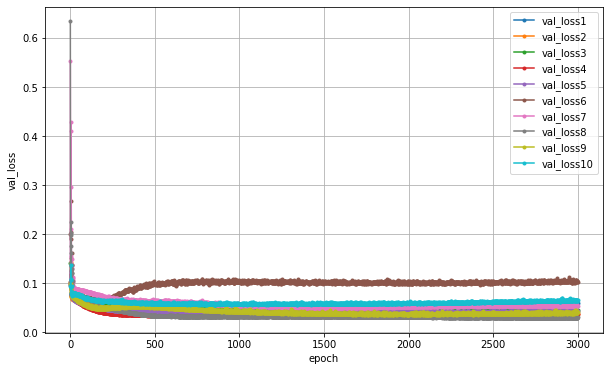

In [6]:
# 学習経過の可視化(位置)

val_loss_array = []
for i in range(len(position_history_array)):
    val_loss_array.append(position_history_array[i].history['val_loss'])
plt.figure(figsize=(10,6))
nb_epoch = len(val_loss_array[i])
for i in range(len(val_loss_array)):
    plt.plot(range(nb_epoch), val_loss_array[i], marker='.', label='val_loss%d'%(i+1))
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.show()

In [7]:
# モデルの評価(大きさ)
position_loss_array = []
for i in range(len(position_model_array)):
    position_score = position_model_array[i].evaluate(position_x_test_array[i], position_y_test_array[i], verbose=1)
    position_loss = position_score[0]
    position_loss_array.append(position_loss)

2/2 [==============================] - 0s 1ms/step - loss: 0.0653 - accuracy: 0.7800


In [8]:
stdev = np.std(np.array(position_loss_array))
mean = np.mean(np.array(position_loss_array))

print(stdev)
print(mean)

0.019622032498392124
0.051670387759804724
